Setup path


In [1]:
import sys
sys.path.append('/content/ML')

Get Dataset from Git

In [2]:
# Create a directory named "ML"
!mkdir -p ML

%cd ML

# Download the dataset
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip

# Unzip the dataset
!unzip -q Flickr8k_Dataset.zip

/content/ML


Get supported files

In [3]:
# Download
!wget -q https://github.com/User1547789/ml_Image_Caption/releases/download/mlImageToCaption/ML.zip
!unzip -q ML.zip

In [5]:
import os

# Define the path for the new directory
directory = '/content/ML/models'


os.makedirs(directory, exist_ok=True)

In [6]:
!pip install tensorflow keras pillow numpy tqdm

In [7]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load
import numpy as np

# keras

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

<ipython-input-7-1e73029b261f>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

data cleaning

In [8]:
# Loading a text file
def load_doc(fname):

    file = open(fname, 'r')
    text = file.read()
    file.close()
    return text

# get captions
def all_img_captions(fname):
    file = load_doc(fname)
    cap = file.split('\n')
    des ={}
    for caption in cap[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in des:
            des[img[:-2]] = [ caption ]
        else:
            des[img[:-2]].append(caption)
    return des

#Data cleaning
def cleaning_text(captions):
    tb = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            de = img_caption.split()


            de = [word.lower() for word in de]
            de = [word.translate(tb) for word in de]
            de = [word for word in de if(len(word)>1)]
            de = [word for word in de if(word.isalpha())]


            img_caption = ' '.join(de)
            captions[img][i]= img_caption
    return captions

def text_vocabulary(descriptions):
    # vocabulary of all unique words
    voc = set()

    for key in descriptions.keys():
        [voc.update(d.split()) for d in descriptions[key]]

    return voc

#All descriptions in one file
def save_descriptions(descriptions, filename):
    line = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            line.append(key + '\t' + desc )
    data = "\n".join(line)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [9]:
# Set Flickr8k path
textDataSet = "/content/ML/Flickr8k_text"
imagesDataSet = "/content/ML/Flicker8k_Dataset"

#we prepare our text data
filename = textDataSet + "/" + "Flickr8k.token.txt"

descriptions = all_img_captions(filename)
print("Length of descriptions =" , len(descriptions))

#clean descriptions
clean_descriptions = cleaning_text(descriptions)

#building vocab
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

#save descriptions file
save_descriptions(clean_descriptions, "/content/ML/descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


Extracting

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def extract_features(directory):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2048, activation='relu')  # Output layer with 2048 features
    ])

    ftr = {}
    for img in tqdm(os.listdir(directory)):
        filename = os.path.join(directory, img)
        image = Image.open(filename)
        image = image.resize((299, 299))
        image = np.array(image) / 255.0  # Normalize pixel values
        image = np.expand_dims(image, axis=0)  # Add batch dimension

        feature = model.predict(image)
        ftr[img] = feature.flatten()  # Flatten the feature array
    return ftr

features = extract_features(imagesDataSet)


  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 363ms/step


  0%|          | 1/8091 [00:00<1:06:42,  2.02it/s]

1/1 [==============================] - 0s 140ms/step


  0%|          | 2/8091 [00:00<44:28,  3.03it/s]  

1/1 [==============================] - 0s 181ms/step


  0%|          | 3/8091 [00:01<50:54,  2.65it/s]

1/1 [==============================] - 0s 167ms/step


  0%|          | 4/8091 [00:01<45:57,  2.93it/s]

1/1 [==============================] - 0s 164ms/step


  0%|          | 5/8091 [00:01<42:45,  3.15it/s]

1/1 [==============================] - 0s 164ms/step


  0%|          | 6/8091 [00:01<41:02,  3.28it/s]

1/1 [==============================] - 0s 174ms/step


  0%|          | 7/8091 [00:02<40:56,  3.29it/s]

1/1 [==============================] - 0s 148ms/step


  0%|          | 8/8091 [00:02<39:12,  3.44it/s]

1/1 [==============================] - 0s 158ms/step


  0%|          | 9/8091 [00:02<40:45,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


  0%|          | 10/8091 [00:03<40:34,  3.32it/s]

1/1 [==============================] - 0s 157ms/step


  0%|          | 11/8091 [00:03<40:27,  3.33it/s]

1/1 [==============================] - 0s 143ms/step


  0%|          | 12/8091 [00:03<38:56,  3.46it/s]

1/1 [==============================] - 0s 146ms/step


  0%|          | 13/8091 [00:04<38:06,  3.53it/s]

1/1 [==============================] - 0s 104ms/step


  0%|          | 14/8091 [00:04<34:12,  3.94it/s]

1/1 [==============================] - 0s 109ms/step


  0%|          | 15/8091 [00:04<31:26,  4.28it/s]

1/1 [==============================] - 0s 100ms/step


  0%|          | 16/8091 [00:04<29:05,  4.63it/s]

1/1 [==============================] - 0s 104ms/step


  0%|          | 17/8091 [00:04<27:25,  4.91it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 18/8091 [00:04<26:17,  5.12it/s]

1/1 [==============================] - 0s 96ms/step


  0%|          | 19/8091 [00:05<25:16,  5.32it/s]

1/1 [==============================] - 0s 96ms/step


  0%|          | 20/8091 [00:05<24:36,  5.47it/s]

1/1 [==============================] - 0s 105ms/step


  0%|          | 21/8091 [00:05<26:48,  5.02it/s]

1/1 [==============================] - 0s 95ms/step


  0%|          | 22/8091 [00:05<25:25,  5.29it/s]

1/1 [==============================] - 0s 97ms/step


  0%|          | 23/8091 [00:05<24:42,  5.44it/s]

1/1 [==============================] - 0s 104ms/step


  0%|          | 24/8091 [00:06<24:30,  5.48it/s]

1/1 [==============================] - 0s 104ms/step


  0%|          | 25/8091 [00:06<24:33,  5.47it/s]

1/1 [==============================] - 0s 103ms/step


  0%|          | 26/8091 [00:06<24:43,  5.44it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 27/8091 [00:06<24:34,  5.47it/s]

1/1 [==============================] - 0s 95ms/step


  0%|          | 28/8091 [00:06<24:01,  5.59it/s]

1/1 [==============================] - 0s 97ms/step


  0%|          | 29/8091 [00:06<23:48,  5.64it/s]

1/1 [==============================] - 0s 99ms/step


  0%|          | 30/8091 [00:07<23:33,  5.70it/s]

1/1 [==============================] - 0s 99ms/step


  0%|          | 31/8091 [00:07<23:33,  5.70it/s]

1/1 [==============================] - 0s 106ms/step


  0%|          | 32/8091 [00:07<23:42,  5.67it/s]

1/1 [==============================] - 0s 94ms/step


  0%|          | 33/8091 [00:07<23:21,  5.75it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 34/8091 [00:07<23:02,  5.83it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 35/8091 [00:07<23:22,  5.74it/s]

1/1 [==============================] - 0s 106ms/step


  0%|          | 36/8091 [00:08<23:27,  5.72it/s]

1/1 [==============================] - 0s 100ms/step


  0%|          | 37/8091 [00:08<23:21,  5.75it/s]

1/1 [==============================] - 0s 112ms/step


  0%|          | 38/8091 [00:08<23:40,  5.67it/s]

1/1 [==============================] - 0s 103ms/step


  0%|          | 39/8091 [00:08<23:24,  5.73it/s]

1/1 [==============================] - 0s 94ms/step


  0%|          | 40/8091 [00:08<22:59,  5.83it/s]

1/1 [==============================] - 0s 98ms/step


  1%|          | 41/8091 [00:08<22:57,  5.84it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 42/8091 [00:09<23:09,  5.79it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 43/8091 [00:09<22:51,  5.87it/s]

1/1 [==============================] - 0s 116ms/step


  1%|          | 44/8091 [00:09<23:59,  5.59it/s]

1/1 [==============================] - 0s 113ms/step


  1%|          | 45/8091 [00:09<24:42,  5.43it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 46/8091 [00:09<24:35,  5.45it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 47/8091 [00:10<24:55,  5.38it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 48/8091 [00:10<24:09,  5.55it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 49/8091 [00:10<23:58,  5.59it/s]

1/1 [==============================] - 0s 94ms/step


  1%|          | 50/8091 [00:10<24:02,  5.58it/s]

1/1 [==============================] - 0s 103ms/step


  1%|          | 51/8091 [00:10<23:42,  5.65it/s]

1/1 [==============================] - 0s 98ms/step


  1%|          | 52/8091 [00:10<23:20,  5.74it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 53/8091 [00:11<23:44,  5.64it/s]

1/1 [==============================] - 0s 98ms/step


  1%|          | 54/8091 [00:11<23:36,  5.67it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 55/8091 [00:11<23:20,  5.74it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 56/8091 [00:11<23:27,  5.71it/s]

1/1 [==============================] - 0s 94ms/step


  1%|          | 57/8091 [00:11<23:03,  5.81it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 58/8091 [00:11<23:18,  5.74it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 59/8091 [00:12<23:06,  5.79it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 60/8091 [00:12<22:42,  5.89it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 61/8091 [00:12<22:49,  5.86it/s]

1/1 [==============================] - 0s 103ms/step


  1%|          | 62/8091 [00:12<24:08,  5.54it/s]

1/1 [==============================] - 0s 104ms/step


  1%|          | 63/8091 [00:12<24:12,  5.53it/s]

1/1 [==============================] - 0s 260ms/step


  1%|          | 64/8091 [00:13<30:25,  4.40it/s]

1/1 [==============================] - 0s 119ms/step


  1%|          | 65/8091 [00:13<33:13,  4.03it/s]

1/1 [==============================] - 0s 110ms/step


  1%|          | 66/8091 [00:13<30:57,  4.32it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 67/8091 [00:13<28:29,  4.69it/s]

1/1 [==============================] - 0s 459ms/step


  1%|          | 68/8091 [00:14<44:07,  3.03it/s]

1/1 [==============================] - 0s 137ms/step


  1%|          | 69/8091 [00:14<44:36,  3.00it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 70/8091 [00:15<41:30,  3.22it/s]

1/1 [==============================] - 0s 399ms/step


  1%|          | 71/8091 [00:15<1:00:38,  2.20it/s]

1/1 [==============================] - 0s 150ms/step


  1%|          | 72/8091 [00:16<53:04,  2.52it/s]  

1/1 [==============================] - 0s 145ms/step


  1%|          | 73/8091 [00:16<47:02,  2.84it/s]

1/1 [==============================] - 0s 141ms/step


  1%|          | 74/8091 [00:16<43:07,  3.10it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 75/8091 [00:16<41:05,  3.25it/s]

1/1 [==============================] - 0s 168ms/step


  1%|          | 76/8091 [00:17<40:10,  3.33it/s]

1/1 [==============================] - 0s 153ms/step


  1%|          | 77/8091 [00:17<39:46,  3.36it/s]

1/1 [==============================] - 0s 134ms/step


  1%|          | 78/8091 [00:17<37:14,  3.59it/s]

1/1 [==============================] - 0s 99ms/step


  1%|          | 79/8091 [00:17<33:18,  4.01it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 80/8091 [00:18<30:37,  4.36it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 81/8091 [00:18<28:30,  4.68it/s]

1/1 [==============================] - 0s 160ms/step


  1%|          | 82/8091 [00:18<29:07,  4.58it/s]

1/1 [==============================] - 0s 104ms/step


  1%|          | 83/8091 [00:18<27:27,  4.86it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 84/8091 [00:18<26:09,  5.10it/s]

1/1 [==============================] - 0s 106ms/step


  1%|          | 85/8091 [00:19<26:02,  5.12it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 86/8091 [00:19<27:35,  4.83it/s]

1/1 [==============================] - 0s 113ms/step


  1%|          | 87/8091 [00:19<27:20,  4.88it/s]

1/1 [==============================] - 0s 108ms/step


  1%|          | 88/8091 [00:19<26:36,  5.01it/s]

1/1 [==============================] - 0s 105ms/step


  1%|          | 89/8091 [00:19<26:03,  5.12it/s]

1/1 [==============================] - 0s 108ms/step


  1%|          | 90/8091 [00:20<26:35,  5.01it/s]

1/1 [==============================] - 0s 108ms/step


  1%|          | 91/8091 [00:20<26:17,  5.07it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 92/8091 [00:20<25:33,  5.21it/s]

1/1 [==============================] - 0s 105ms/step


  1%|          | 93/8091 [00:20<25:02,  5.32it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 94/8091 [00:20<24:39,  5.41it/s]

1/1 [==============================] - 0s 128ms/step


  1%|          | 95/8091 [00:20<25:19,  5.26it/s]

1/1 [==============================] - 0s 109ms/step


  1%|          | 96/8091 [00:21<26:00,  5.12it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 97/8091 [00:21<25:12,  5.28it/s]

1/1 [==============================] - 0s 104ms/step


  1%|          | 98/8091 [00:21<25:45,  5.17it/s]

1/1 [==============================] - 0s 104ms/step


  1%|          | 99/8091 [00:21<25:13,  5.28it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 100/8091 [00:21<26:37,  5.00it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 101/8091 [00:22<25:34,  5.21it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 102/8091 [00:22<24:55,  5.34it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▏         | 103/8091 [00:22<24:26,  5.45it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏         | 104/8091 [00:22<24:40,  5.40it/s]

1/1 [==============================] - 0s 111ms/step


  1%|▏         | 105/8091 [00:22<24:54,  5.34it/s]

1/1 [==============================] - 0s 120ms/step


  1%|▏         | 106/8091 [00:23<27:17,  4.88it/s]

1/1 [==============================] - 0s 119ms/step


  1%|▏         | 107/8091 [00:23<27:33,  4.83it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏         | 108/8091 [00:23<27:02,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 109/8091 [00:23<25:48,  5.15it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▏         | 110/8091 [00:23<24:53,  5.34it/s]

1/1 [==============================] - 0s 109ms/step


  1%|▏         | 111/8091 [00:24<24:41,  5.39it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 112/8091 [00:24<23:48,  5.59it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▏         | 113/8091 [00:24<23:39,  5.62it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▏         | 114/8091 [00:24<23:32,  5.65it/s]

1/1 [==============================] - 0s 103ms/step


  1%|▏         | 115/8091 [00:24<23:28,  5.66it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▏         | 116/8091 [00:24<23:54,  5.56it/s]

1/1 [==============================] - 0s 112ms/step


  1%|▏         | 117/8091 [00:25<24:17,  5.47it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 118/8091 [00:25<23:37,  5.62it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▏         | 119/8091 [00:25<23:20,  5.69it/s]

1/1 [==============================] - 0s 104ms/step


  1%|▏         | 120/8091 [00:25<23:32,  5.64it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▏         | 121/8091 [00:25<23:47,  5.58it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 122/8091 [00:25<23:27,  5.66it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▏         | 123/8091 [00:26<23:30,  5.65it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 124/8091 [00:26<23:03,  5.76it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 125/8091 [00:26<23:21,  5.68it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 126/8091 [00:26<23:08,  5.74it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 127/8091 [00:26<22:55,  5.79it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 128/8091 [00:27<22:46,  5.83it/s]

1/1 [==============================] - 0s 102ms/step


  2%|▏         | 129/8091 [00:27<23:00,  5.77it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 130/8091 [00:27<22:54,  5.79it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 131/8091 [00:27<22:46,  5.83it/s]

1/1 [==============================] - 0s 111ms/step


  2%|▏         | 132/8091 [00:27<23:15,  5.70it/s]

1/1 [==============================] - 0s 128ms/step


  2%|▏         | 133/8091 [00:27<26:03,  5.09it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 134/8091 [00:28<29:40,  4.47it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 135/8091 [00:28<30:29,  4.35it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 136/8091 [00:28<30:52,  4.29it/s]

1/1 [==============================] - 0s 146ms/step


  2%|▏         | 137/8091 [00:28<30:56,  4.28it/s]

1/1 [==============================] - 0s 162ms/step


  2%|▏         | 138/8091 [00:29<31:51,  4.16it/s]

1/1 [==============================] - 0s 146ms/step


  2%|▏         | 139/8091 [00:29<32:01,  4.14it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 140/8091 [00:29<32:18,  4.10it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 141/8091 [00:29<33:13,  3.99it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 142/8091 [00:30<33:04,  4.01it/s]

1/1 [==============================] - 0s 153ms/step


  2%|▏         | 143/8091 [00:30<34:09,  3.88it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 144/8091 [00:30<33:38,  3.94it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 145/8091 [00:31<40:18,  3.29it/s]

1/1 [==============================] - 0s 119ms/step


  2%|▏         | 146/8091 [00:31<37:41,  3.51it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 147/8091 [00:31<32:57,  4.02it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 148/8091 [00:31<30:01,  4.41it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 149/8091 [00:31<27:56,  4.74it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 150/8091 [00:32<26:13,  5.05it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 151/8091 [00:32<25:18,  5.23it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 152/8091 [00:32<27:34,  4.80it/s]

1/1 [==============================] - 0s 108ms/step


  2%|▏         | 153/8091 [00:32<26:33,  4.98it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▏         | 154/8091 [00:32<25:58,  5.09it/s]

1/1 [==============================] - 0s 110ms/step


  2%|▏         | 155/8091 [00:33<25:55,  5.10it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 156/8091 [00:33<25:12,  5.25it/s]

1/1 [==============================] - 0s 111ms/step


  2%|▏         | 157/8091 [00:33<25:01,  5.28it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 158/8091 [00:33<26:20,  5.02it/s]

1/1 [==============================] - 0s 101ms/step


  2%|▏         | 159/8091 [00:33<25:09,  5.25it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 160/8091 [00:34<24:12,  5.46it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 161/8091 [00:34<24:04,  5.49it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 162/8091 [00:34<23:46,  5.56it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 163/8091 [00:34<23:36,  5.60it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 164/8091 [00:34<23:09,  5.71it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 165/8091 [00:34<22:55,  5.76it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 166/8091 [00:35<23:12,  5.69it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 167/8091 [00:35<22:43,  5.81it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 168/8091 [00:35<22:42,  5.81it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 169/8091 [00:35<22:58,  5.75it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▏         | 170/8091 [00:35<23:31,  5.61it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 171/8091 [00:35<23:26,  5.63it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 172/8091 [00:36<23:23,  5.64it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 173/8091 [00:36<22:58,  5.74it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 174/8091 [00:36<23:25,  5.63it/s]

1/1 [==============================] - 0s 102ms/step


  2%|▏         | 175/8091 [00:36<23:37,  5.59it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 176/8091 [00:36<23:32,  5.61it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 177/8091 [00:37<23:17,  5.66it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 178/8091 [00:37<23:01,  5.73it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 179/8091 [00:37<23:48,  5.54it/s]

1/1 [==============================] - 0s 101ms/step


  2%|▏         | 180/8091 [00:37<23:45,  5.55it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 181/8091 [00:37<23:19,  5.65it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 182/8091 [00:37<23:12,  5.68it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 183/8091 [00:38<23:17,  5.66it/s]

1/1 [==============================] - 0s 113ms/step


  2%|▏         | 184/8091 [00:38<23:49,  5.53it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 185/8091 [00:38<23:27,  5.62it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▏         | 186/8091 [00:38<23:48,  5.53it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 187/8091 [00:38<23:24,  5.63it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 188/8091 [00:38<23:38,  5.57it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 189/8091 [00:39<23:26,  5.62it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 190/8091 [00:39<23:16,  5.66it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 191/8091 [00:39<23:25,  5.62it/s]

1/1 [==============================] - 0s 108ms/step


  2%|▏         | 192/8091 [00:39<24:08,  5.45it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 193/8091 [00:39<23:41,  5.56it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 194/8091 [00:40<23:56,  5.50it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 195/8091 [00:40<23:26,  5.61it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 196/8091 [00:40<23:11,  5.67it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 197/8091 [00:40<23:30,  5.60it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 198/8091 [00:40<23:15,  5.66it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 199/8091 [00:40<23:22,  5.63it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 200/8091 [00:41<23:41,  5.55it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 201/8091 [00:41<24:00,  5.48it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 202/8091 [00:41<26:29,  4.96it/s]

1/1 [==============================] - 0s 133ms/step


  3%|▎         | 203/8091 [00:41<29:34,  4.44it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 204/8091 [00:42<30:48,  4.27it/s]

1/1 [==============================] - 0s 158ms/step


  3%|▎         | 205/8091 [00:42<32:21,  4.06it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 206/8091 [00:42<32:51,  4.00it/s]

1/1 [==============================] - 0s 146ms/step


  3%|▎         | 207/8091 [00:42<34:43,  3.78it/s]

1/1 [==============================] - 0s 158ms/step


  3%|▎         | 208/8091 [00:43<35:05,  3.74it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 209/8091 [00:43<34:34,  3.80it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 210/8091 [00:43<34:08,  3.85it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 211/8091 [00:43<34:31,  3.80it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 212/8091 [00:44<35:00,  3.75it/s]

1/1 [==============================] - 0s 137ms/step


  3%|▎         | 213/8091 [00:44<34:17,  3.83it/s]

1/1 [==============================] - 0s 115ms/step


  3%|▎         | 214/8091 [00:44<32:31,  4.04it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 215/8091 [00:44<30:25,  4.31it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 216/8091 [00:45<28:27,  4.61it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 217/8091 [00:45<26:42,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 218/8091 [00:45<25:15,  5.20it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 219/8091 [00:45<24:35,  5.33it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 220/8091 [00:45<23:53,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 221/8091 [00:45<24:08,  5.43it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 222/8091 [00:46<23:27,  5.59it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 223/8091 [00:46<23:24,  5.60it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 224/8091 [00:46<23:20,  5.62it/s]

1/1 [==============================] - 0s 99ms/step


  3%|▎         | 225/8091 [00:46<23:14,  5.64it/s]

1/1 [==============================] - 0s 107ms/step


  3%|▎         | 226/8091 [00:46<23:04,  5.68it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 227/8091 [00:47<23:18,  5.62it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 228/8091 [00:47<23:23,  5.60it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 229/8091 [00:47<23:02,  5.69it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 230/8091 [00:47<22:56,  5.71it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 231/8091 [00:47<22:32,  5.81it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 232/8091 [00:47<23:14,  5.64it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 233/8091 [00:48<23:25,  5.59it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 234/8091 [00:48<23:09,  5.66it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 235/8091 [00:48<22:59,  5.70it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 236/8091 [00:48<22:39,  5.78it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 237/8091 [00:48<22:28,  5.82it/s]

1/1 [==============================] - 0s 104ms/step


  3%|▎         | 238/8091 [00:48<22:37,  5.78it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 239/8091 [00:49<22:44,  5.75it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 240/8091 [00:49<22:37,  5.78it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 241/8091 [00:49<22:18,  5.87it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 242/8091 [00:49<22:46,  5.74it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 243/8091 [00:49<22:32,  5.80it/s]

1/1 [==============================] - 0s 106ms/step


  3%|▎         | 244/8091 [00:49<22:54,  5.71it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 245/8091 [00:50<23:01,  5.68it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 246/8091 [00:50<23:28,  5.57it/s]

1/1 [==============================] - 0s 99ms/step


  3%|▎         | 247/8091 [00:50<23:33,  5.55it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 248/8091 [00:50<23:15,  5.62it/s]

1/1 [==============================] - 0s 99ms/step


  3%|▎         | 249/8091 [00:50<23:08,  5.65it/s]

1/1 [==============================] - 0s 118ms/step


  3%|▎         | 250/8091 [00:51<25:29,  5.13it/s]

1/1 [==============================] - 0s 102ms/step


  3%|▎         | 251/8091 [00:51<25:49,  5.06it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 252/8091 [00:51<24:49,  5.26it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 253/8091 [00:51<24:03,  5.43it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 254/8091 [00:51<23:38,  5.52it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 255/8091 [00:51<23:19,  5.60it/s]

1/1 [==============================] - 0s 103ms/step


  3%|▎         | 256/8091 [00:52<24:12,  5.39it/s]

1/1 [==============================] - 0s 99ms/step


  3%|▎         | 257/8091 [00:52<23:43,  5.50it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 258/8091 [00:52<23:41,  5.51it/s]

1/1 [==============================] - 0s 106ms/step


  3%|▎         | 259/8091 [00:52<24:07,  5.41it/s]

1/1 [==============================] - 0s 99ms/step


  3%|▎         | 260/8091 [00:52<24:15,  5.38it/s]

1/1 [==============================] - 0s 120ms/step


  3%|▎         | 261/8091 [00:53<25:21,  5.15it/s]

1/1 [==============================] - 0s 110ms/step


  3%|▎         | 262/8091 [00:53<25:24,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 263/8091 [00:53<24:56,  5.23it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 264/8091 [00:53<24:09,  5.40it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 265/8091 [00:53<23:52,  5.46it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 266/8091 [00:54<23:47,  5.48it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 267/8091 [00:54<23:47,  5.48it/s]

1/1 [==============================] - 0s 103ms/step


  3%|▎         | 268/8091 [00:54<23:39,  5.51it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 269/8091 [00:54<24:03,  5.42it/s]

1/1 [==============================] - 0s 154ms/step


  3%|▎         | 270/8091 [00:54<26:26,  4.93it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 271/8091 [00:55<29:10,  4.47it/s]

1/1 [==============================] - 0s 145ms/step


  3%|▎         | 272/8091 [00:55<30:09,  4.32it/s]

1/1 [==============================] - 0s 157ms/step


  3%|▎         | 273/8091 [00:55<31:04,  4.19it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 274/8091 [00:55<31:51,  4.09it/s]

1/1 [==============================] - 0s 153ms/step


  3%|▎         | 275/8091 [00:56<32:39,  3.99it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 276/8091 [00:56<32:38,  3.99it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 277/8091 [00:56<32:27,  4.01it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 278/8091 [00:56<32:22,  4.02it/s]

1/1 [==============================] - 0s 152ms/step


  3%|▎         | 279/8091 [00:57<33:31,  3.88it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 280/8091 [00:57<33:59,  3.83it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 281/8091 [00:57<34:34,  3.77it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 282/8091 [00:57<34:16,  3.80it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 283/8091 [00:58<30:54,  4.21it/s]

1/1 [==============================] - 0s 107ms/step


  4%|▎         | 284/8091 [00:58<28:34,  4.55it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▎         | 285/8091 [00:58<26:42,  4.87it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▎         | 286/8091 [00:58<24:58,  5.21it/s]

1/1 [==============================] - 0s 96ms/step


  4%|▎         | 287/8091 [00:58<24:37,  5.28it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▎         | 288/8091 [00:59<23:49,  5.46it/s]

1/1 [==============================] - 0s 101ms/step


  4%|▎         | 289/8091 [00:59<23:45,  5.47it/s]

1/1 [==============================] - 0s 111ms/step


  4%|▎         | 290/8091 [00:59<23:47,  5.46it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▎         | 291/8091 [00:59<23:31,  5.52it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▎         | 292/8091 [00:59<23:22,  5.56it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▎         | 293/8091 [00:59<23:00,  5.65it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▎         | 294/8091 [01:00<23:03,  5.64it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▎         | 295/8091 [01:00<22:49,  5.69it/s]

1/1 [==============================] - 0s 106ms/step


  4%|▎         | 296/8091 [01:00<23:36,  5.50it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▎         | 297/8091 [01:00<23:37,  5.50it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▎         | 298/8091 [01:00<23:19,  5.57it/s]

1/1 [==============================] - 0s 122ms/step


  4%|▎         | 299/8091 [01:01<24:36,  5.28it/s]

1/1 [==============================] - 0s 107ms/step


  4%|▎         | 300/8091 [01:01<24:55,  5.21it/s]

1/1 [==============================] - 0s 112ms/step


  4%|▎         | 301/8091 [01:01<25:05,  5.17it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▎         | 302/8091 [01:01<24:33,  5.29it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▎         | 303/8091 [01:01<24:10,  5.37it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 304/8091 [01:01<24:14,  5.35it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 305/8091 [01:02<24:25,  5.31it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▍         | 306/8091 [01:02<24:10,  5.37it/s]

1/1 [==============================] - 0s 104ms/step


  4%|▍         | 307/8091 [01:02<24:19,  5.33it/s]

1/1 [==============================] - 0s 104ms/step


  4%|▍         | 308/8091 [01:02<24:27,  5.31it/s]

1/1 [==============================] - 0s 112ms/step


  4%|▍         | 309/8091 [01:02<24:32,  5.29it/s]

1/1 [==============================] - 0s 113ms/step


  4%|▍         | 310/8091 [01:03<25:11,  5.15it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 311/8091 [01:03<25:00,  5.18it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 312/8091 [01:03<24:32,  5.28it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 313/8091 [01:03<23:45,  5.46it/s]

1/1 [==============================] - 0s 152ms/step


  4%|▍         | 314/8091 [01:03<27:22,  4.74it/s]

1/1 [==============================] - 0s 142ms/step


  4%|▍         | 315/8091 [01:04<29:01,  4.47it/s]

1/1 [==============================] - 0s 146ms/step


  4%|▍         | 316/8091 [01:04<29:58,  4.32it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 317/8091 [01:04<31:03,  4.17it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▍         | 318/8091 [01:04<32:12,  4.02it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 319/8091 [01:05<31:55,  4.06it/s]

1/1 [==============================] - 0s 156ms/step


  4%|▍         | 320/8091 [01:05<32:13,  4.02it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▍         | 321/8091 [01:05<33:37,  3.85it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 322/8091 [01:05<33:07,  3.91it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 323/8091 [01:06<34:45,  3.72it/s]

1/1 [==============================] - 0s 155ms/step


  4%|▍         | 324/8091 [01:06<35:11,  3.68it/s]

1/1 [==============================] - 0s 156ms/step


  4%|▍         | 325/8091 [01:06<35:16,  3.67it/s]

1/1 [==============================] - 0s 146ms/step


  4%|▍         | 326/8091 [01:07<35:07,  3.68it/s]

1/1 [==============================] - 0s 157ms/step


  4%|▍         | 327/8091 [01:07<35:20,  3.66it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 328/8091 [01:07<32:45,  3.95it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 329/8091 [01:07<30:26,  4.25it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 330/8091 [01:07<28:03,  4.61it/s]

1/1 [==============================] - 0s 152ms/step


  4%|▍         | 331/8091 [01:08<29:13,  4.42it/s]

1/1 [==============================] - 0s 161ms/step


  4%|▍         | 332/8091 [01:08<32:00,  4.04it/s]

1/1 [==============================] - 0s 163ms/step


  4%|▍         | 333/8091 [01:08<32:45,  3.95it/s]

1/1 [==============================] - 0s 157ms/step


  4%|▍         | 334/8091 [01:09<33:41,  3.84it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 335/8091 [01:09<33:38,  3.84it/s]

1/1 [==============================] - 0s 157ms/step


  4%|▍         | 336/8091 [01:09<35:05,  3.68it/s]

1/1 [==============================] - 0s 168ms/step


  4%|▍         | 337/8091 [01:09<36:37,  3.53it/s]

1/1 [==============================] - 0s 161ms/step


  4%|▍         | 338/8091 [01:10<37:08,  3.48it/s]

1/1 [==============================] - 0s 155ms/step


  4%|▍         | 339/8091 [01:10<36:37,  3.53it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▍         | 340/8091 [01:10<35:27,  3.64it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 341/8091 [01:11<37:27,  3.45it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 342/8091 [01:11<50:57,  2.53it/s]

1/1 [==============================] - 0s 111ms/step


  4%|▍         | 343/8091 [01:11<42:57,  3.01it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 344/8091 [01:12<37:10,  3.47it/s]

1/1 [==============================] - 0s 108ms/step


  4%|▍         | 345/8091 [01:12<33:42,  3.83it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▍         | 346/8091 [01:12<30:16,  4.26it/s]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 347/8091 [01:12<28:32,  4.52it/s]

1/1 [==============================] - 0s 108ms/step


  4%|▍         | 348/8091 [01:12<27:47,  4.64it/s]

1/1 [==============================] - 0s 109ms/step


  4%|▍         | 349/8091 [01:13<27:21,  4.72it/s]

1/1 [==============================] - 0s 120ms/step


  4%|▍         | 350/8091 [01:13<29:26,  4.38it/s]

1/1 [==============================] - 0s 114ms/step


  4%|▍         | 351/8091 [01:13<28:51,  4.47it/s]

1/1 [==============================] - 0s 104ms/step


  4%|▍         | 352/8091 [01:13<27:28,  4.69it/s]

1/1 [==============================] - 0s 110ms/step


  4%|▍         | 353/8091 [01:13<26:35,  4.85it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 354/8091 [01:14<26:25,  4.88it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▍         | 355/8091 [01:14<25:34,  5.04it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▍         | 356/8091 [01:14<25:12,  5.11it/s]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 357/8091 [01:14<24:58,  5.16it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 358/8091 [01:14<24:20,  5.30it/s]

1/1 [==============================] - 0s 112ms/step


  4%|▍         | 359/8091 [01:15<25:05,  5.13it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 360/8091 [01:15<24:08,  5.34it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 361/8091 [01:15<23:30,  5.48it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 362/8091 [01:15<23:21,  5.52it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▍         | 363/8091 [01:15<22:56,  5.61it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 364/8091 [01:15<22:49,  5.64it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▍         | 365/8091 [01:16<23:12,  5.55it/s]

1/1 [==============================] - 0s 105ms/step


  5%|▍         | 366/8091 [01:16<23:25,  5.50it/s]

1/1 [==============================] - 0s 110ms/step


  5%|▍         | 367/8091 [01:16<23:25,  5.49it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▍         | 368/8091 [01:16<23:37,  5.45it/s]

1/1 [==============================] - 0s 102ms/step


  5%|▍         | 369/8091 [01:16<23:12,  5.54it/s]

1/1 [==============================] - 0s 115ms/step


  5%|▍         | 370/8091 [01:17<23:36,  5.45it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▍         | 371/8091 [01:17<23:42,  5.43it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▍         | 372/8091 [01:17<23:21,  5.51it/s]

1/1 [==============================] - 0s 102ms/step


  5%|▍         | 373/8091 [01:17<23:09,  5.55it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▍         | 374/8091 [01:17<23:04,  5.57it/s]

1/1 [==============================] - 0s 107ms/step


  5%|▍         | 375/8091 [01:17<23:42,  5.42it/s]

1/1 [==============================] - 0s 143ms/step


  5%|▍         | 376/8091 [01:18<27:19,  4.71it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▍         | 377/8091 [01:18<33:17,  3.86it/s]

1/1 [==============================] - 0s 163ms/step


  5%|▍         | 378/8091 [01:18<33:54,  3.79it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▍         | 379/8091 [01:19<35:46,  3.59it/s]

1/1 [==============================] - 0s 99ms/step


  5%|▍         | 380/8091 [01:19<31:31,  4.08it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▍         | 381/8091 [01:19<28:43,  4.47it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▍         | 382/8091 [01:19<27:19,  4.70it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▍         | 383/8091 [01:19<26:07,  4.92it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▍         | 384/8091 [01:20<25:47,  4.98it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▍         | 385/8091 [01:20<25:15,  5.09it/s]

1/1 [==============================] - 0s 98ms/step


  5%|▍         | 386/8091 [01:20<25:03,  5.13it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▍         | 387/8091 [01:20<23:58,  5.35it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▍         | 388/8091 [01:20<23:40,  5.42it/s]

1/1 [==============================] - 0s 105ms/step


  5%|▍         | 389/8091 [01:20<23:49,  5.39it/s]

1/1 [==============================] - 0s 108ms/step


  5%|▍         | 390/8091 [01:21<24:08,  5.32it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▍         | 391/8091 [01:21<23:31,  5.46it/s]

1/1 [==============================] - 0s 127ms/step


  5%|▍         | 392/8091 [01:21<24:26,  5.25it/s]

1/1 [==============================] - 0s 134ms/step


  5%|▍         | 393/8091 [01:21<26:15,  4.89it/s]

1/1 [==============================] - 0s 146ms/step


  5%|▍         | 394/8091 [01:22<27:57,  4.59it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 395/8091 [01:22<30:53,  4.15it/s]

1/1 [==============================] - 0s 156ms/step


  5%|▍         | 396/8091 [01:22<31:48,  4.03it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▍         | 397/8091 [01:22<33:40,  3.81it/s]

1/1 [==============================] - 0s 163ms/step


  5%|▍         | 398/8091 [01:23<34:13,  3.75it/s]

1/1 [==============================] - 0s 182ms/step


  5%|▍         | 399/8091 [01:23<36:48,  3.48it/s]

1/1 [==============================] - 0s 154ms/step


  5%|▍         | 400/8091 [01:23<36:22,  3.52it/s]

1/1 [==============================] - 0s 160ms/step


  5%|▍         | 401/8091 [01:24<36:35,  3.50it/s]

1/1 [==============================] - 0s 164ms/step


  5%|▍         | 402/8091 [01:24<36:42,  3.49it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 403/8091 [01:24<38:12,  3.35it/s]

1/1 [==============================] - 0s 155ms/step


  5%|▍         | 404/8091 [01:25<38:49,  3.30it/s]

1/1 [==============================] - 0s 158ms/step


  5%|▌         | 405/8091 [01:25<38:50,  3.30it/s]

1/1 [==============================] - 0s 111ms/step


  5%|▌         | 406/8091 [01:25<35:45,  3.58it/s]

1/1 [==============================] - 0s 110ms/step


  5%|▌         | 407/8091 [01:25<33:15,  3.85it/s]

1/1 [==============================] - 0s 112ms/step


  5%|▌         | 408/8091 [01:25<30:46,  4.16it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 409/8091 [01:26<29:02,  4.41it/s]

1/1 [==============================] - 0s 98ms/step


  5%|▌         | 410/8091 [01:26<27:15,  4.70it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 411/8091 [01:26<26:28,  4.83it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▌         | 412/8091 [01:26<27:21,  4.68it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▌         | 413/8091 [01:26<26:19,  4.86it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 414/8091 [01:27<25:20,  5.05it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 415/8091 [01:27<24:43,  5.18it/s]

1/1 [==============================] - 0s 117ms/step


  5%|▌         | 416/8091 [01:27<24:59,  5.12it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▌         | 417/8091 [01:27<24:24,  5.24it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▌         | 418/8091 [01:27<24:05,  5.31it/s]

1/1 [==============================] - 0s 98ms/step


  5%|▌         | 419/8091 [01:28<23:43,  5.39it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▌         | 420/8091 [01:28<23:31,  5.43it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 421/8091 [01:28<23:08,  5.53it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 422/8091 [01:28<23:45,  5.38it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▌         | 423/8091 [01:28<23:22,  5.47it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 424/8091 [01:28<22:50,  5.59it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 425/8091 [01:29<22:54,  5.58it/s]

1/1 [==============================] - 0s 99ms/step


  5%|▌         | 426/8091 [01:29<22:54,  5.58it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▌         | 427/8091 [01:29<22:48,  5.60it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 428/8091 [01:29<22:57,  5.56it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▌         | 429/8091 [01:29<23:01,  5.55it/s]

1/1 [==============================] - 0s 98ms/step


  5%|▌         | 430/8091 [01:30<22:54,  5.57it/s]

1/1 [==============================] - 0s 99ms/step


  5%|▌         | 431/8091 [01:30<23:18,  5.48it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 432/8091 [01:30<22:44,  5.61it/s]

1/1 [==============================] - 0s 108ms/step


  5%|▌         | 433/8091 [01:30<23:10,  5.51it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 434/8091 [01:30<23:02,  5.54it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▌         | 435/8091 [01:30<24:57,  5.11it/s]

1/1 [==============================] - 0s 121ms/step


  5%|▌         | 436/8091 [01:31<25:55,  4.92it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▌         | 437/8091 [01:31<25:49,  4.94it/s]

1/1 [==============================] - 0s 114ms/step


  5%|▌         | 438/8091 [01:31<25:30,  5.00it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▌         | 439/8091 [01:31<24:40,  5.17it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 440/8091 [01:31<24:08,  5.28it/s]

1/1 [==============================] - 0s 105ms/step


  5%|▌         | 441/8091 [01:32<23:55,  5.33it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 442/8091 [01:32<25:46,  4.95it/s]

1/1 [==============================] - 0s 101ms/step


  5%|▌         | 443/8091 [01:32<24:44,  5.15it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▌         | 444/8091 [01:32<25:21,  5.03it/s]

1/1 [==============================] - 0s 114ms/step


  5%|▌         | 445/8091 [01:32<25:24,  5.02it/s]

1/1 [==============================] - 0s 107ms/step


  6%|▌         | 446/8091 [01:33<25:19,  5.03it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 447/8091 [01:33<24:46,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 448/8091 [01:33<23:59,  5.31it/s]

1/1 [==============================] - 0s 111ms/step


  6%|▌         | 449/8091 [01:33<24:41,  5.16it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 450/8091 [01:33<24:09,  5.27it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 451/8091 [01:34<23:50,  5.34it/s]

1/1 [==============================] - 0s 99ms/step


  6%|▌         | 452/8091 [01:34<23:37,  5.39it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 453/8091 [01:34<23:22,  5.45it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 454/8091 [01:34<23:00,  5.53it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 455/8091 [01:34<23:17,  5.47it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 456/8091 [01:34<22:59,  5.54it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 457/8091 [01:35<23:04,  5.51it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 458/8091 [01:35<24:48,  5.13it/s]

1/1 [==============================] - 0s 149ms/step


  6%|▌         | 459/8091 [01:35<27:16,  4.66it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▌         | 460/8091 [01:35<28:54,  4.40it/s]

1/1 [==============================] - 0s 160ms/step


  6%|▌         | 461/8091 [01:36<31:12,  4.08it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▌         | 462/8091 [01:36<32:29,  3.91it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▌         | 463/8091 [01:36<33:09,  3.83it/s]

1/1 [==============================] - 0s 163ms/step


  6%|▌         | 464/8091 [01:37<33:33,  3.79it/s]

1/1 [==============================] - 0s 159ms/step


  6%|▌         | 465/8091 [01:37<34:22,  3.70it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▌         | 466/8091 [01:37<34:14,  3.71it/s]

1/1 [==============================] - 0s 157ms/step


  6%|▌         | 467/8091 [01:37<34:37,  3.67it/s]

1/1 [==============================] - 0s 161ms/step


  6%|▌         | 468/8091 [01:38<34:23,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 469/8091 [01:38<34:26,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


  6%|▌         | 470/8091 [01:38<34:14,  3.71it/s]

1/1 [==============================] - 0s 124ms/step


  6%|▌         | 471/8091 [01:38<32:58,  3.85it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 472/8091 [01:39<29:59,  4.23it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 473/8091 [01:39<27:42,  4.58it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 474/8091 [01:39<26:10,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


  6%|▌         | 475/8091 [01:39<25:24,  5.00it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 476/8091 [01:39<24:55,  5.09it/s]

1/1 [==============================] - 0s 111ms/step


  6%|▌         | 477/8091 [01:39<24:44,  5.13it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 478/8091 [01:40<24:21,  5.21it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 479/8091 [01:40<23:45,  5.34it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 480/8091 [01:40<23:19,  5.44it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 481/8091 [01:40<23:06,  5.49it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 482/8091 [01:40<22:39,  5.60it/s]

1/1 [==============================] - 0s 115ms/step


  6%|▌         | 483/8091 [01:41<24:17,  5.22it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 484/8091 [01:41<23:45,  5.34it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 485/8091 [01:41<23:43,  5.34it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 486/8091 [01:41<23:25,  5.41it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 487/8091 [01:41<23:00,  5.51it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 488/8091 [01:41<23:05,  5.49it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 489/8091 [01:42<22:52,  5.54it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 490/8091 [01:42<23:08,  5.48it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 491/8091 [01:42<22:57,  5.52it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 492/8091 [01:42<23:16,  5.44it/s]

1/1 [==============================] - 0s 109ms/step


  6%|▌         | 493/8091 [01:42<25:42,  4.92it/s]

1/1 [==============================] - 0s 106ms/step


  6%|▌         | 494/8091 [01:43<26:34,  4.77it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 495/8091 [01:43<26:02,  4.86it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 496/8091 [01:43<25:06,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 497/8091 [01:43<24:19,  5.20it/s]

1/1 [==============================] - 0s 99ms/step


  6%|▌         | 498/8091 [01:43<24:01,  5.27it/s]

1/1 [==============================] - 0s 110ms/step


  6%|▌         | 499/8091 [01:44<24:07,  5.24it/s]

1/1 [==============================] - 0s 102ms/step


  6%|▌         | 500/8091 [01:44<24:02,  5.26it/s]

1/1 [==============================] - 0s 99ms/step


  6%|▌         | 501/8091 [01:44<23:45,  5.33it/s]

1/1 [==============================] - 0s 104ms/step


  6%|▌         | 502/8091 [01:44<23:59,  5.27it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 503/8091 [01:44<23:57,  5.28it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 504/8091 [01:45<24:22,  5.19it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 505/8091 [01:45<23:49,  5.31it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▋         | 506/8091 [01:45<23:39,  5.34it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▋         | 507/8091 [01:45<23:11,  5.45it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▋         | 508/8091 [01:45<23:00,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 509/8091 [01:45<22:52,  5.53it/s]

1/1 [==============================] - 0s 112ms/step


  6%|▋         | 510/8091 [01:46<23:23,  5.40it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▋         | 511/8091 [01:46<25:11,  5.01it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 512/8091 [01:46<24:42,  5.11it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▋         | 513/8091 [01:46<23:42,  5.33it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 514/8091 [01:46<23:24,  5.39it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 515/8091 [01:47<23:23,  5.40it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▋         | 516/8091 [01:47<23:41,  5.33it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▋         | 517/8091 [01:47<23:08,  5.46it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▋         | 518/8091 [01:47<22:38,  5.57it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▋         | 519/8091 [01:47<22:38,  5.57it/s]

1/1 [==============================] - 0s 102ms/step


  6%|▋         | 520/8091 [01:48<23:00,  5.48it/s]

1/1 [==============================] - 0s 112ms/step


  6%|▋         | 521/8091 [01:48<23:54,  5.28it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▋         | 522/8091 [01:48<23:30,  5.37it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▋         | 523/8091 [01:48<23:02,  5.47it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▋         | 524/8091 [01:48<22:51,  5.52it/s]

1/1 [==============================] - 0s 151ms/step


  6%|▋         | 525/8091 [01:49<25:33,  4.93it/s]

1/1 [==============================] - 0s 160ms/step


  7%|▋         | 526/8091 [01:49<28:02,  4.50it/s]

1/1 [==============================] - 0s 157ms/step


  7%|▋         | 527/8091 [01:49<29:58,  4.20it/s]

1/1 [==============================] - 0s 159ms/step


  7%|▋         | 528/8091 [01:49<32:10,  3.92it/s]

1/1 [==============================] - 0s 154ms/step


  7%|▋         | 529/8091 [01:50<34:04,  3.70it/s]

1/1 [==============================] - 0s 160ms/step


  7%|▋         | 530/8091 [01:50<35:14,  3.58it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 531/8091 [01:50<35:00,  3.60it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 532/8091 [01:51<36:05,  3.49it/s]

1/1 [==============================] - 0s 155ms/step


  7%|▋         | 533/8091 [01:51<36:32,  3.45it/s]

1/1 [==============================] - 0s 156ms/step


  7%|▋         | 534/8091 [01:51<36:13,  3.48it/s]

1/1 [==============================] - 0s 147ms/step


  7%|▋         | 535/8091 [01:51<35:48,  3.52it/s]

1/1 [==============================] - 0s 146ms/step


  7%|▋         | 536/8091 [01:52<35:09,  3.58it/s]

1/1 [==============================] - 0s 156ms/step


  7%|▋         | 537/8091 [01:52<35:28,  3.55it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 538/8091 [01:52<31:18,  4.02it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 539/8091 [01:52<29:06,  4.33it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 540/8091 [01:53<27:12,  4.63it/s]

1/1 [==============================] - 0s 111ms/step


  7%|▋         | 541/8091 [01:53<26:59,  4.66it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 542/8091 [01:53<25:15,  4.98it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 543/8091 [01:53<24:57,  5.04it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 544/8091 [01:53<23:49,  5.28it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 545/8091 [01:53<23:10,  5.43it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 546/8091 [01:54<22:48,  5.51it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 547/8091 [01:54<22:31,  5.58it/s]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 548/8091 [01:54<22:52,  5.49it/s]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 549/8091 [01:54<23:23,  5.37it/s]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 550/8091 [01:54<22:58,  5.47it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 551/8091 [01:55<23:04,  5.45it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 552/8091 [01:55<22:42,  5.54it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 553/8091 [01:55<22:24,  5.61it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 554/8091 [01:55<22:31,  5.58it/s]

1/1 [==============================] - 0s 93ms/step


  7%|▋         | 555/8091 [01:55<22:11,  5.66it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 556/8091 [01:55<21:54,  5.73it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 557/8091 [01:56<22:42,  5.53it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 558/8091 [01:56<22:27,  5.59it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 559/8091 [01:56<22:26,  5.59it/s]

1/1 [==============================] - 0s 108ms/step


  7%|▋         | 560/8091 [01:56<22:39,  5.54it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 561/8091 [01:56<22:15,  5.64it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 562/8091 [01:56<22:07,  5.67it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 563/8091 [01:57<22:02,  5.69it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 564/8091 [01:57<22:23,  5.60it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 565/8091 [01:57<22:21,  5.61it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 566/8091 [01:57<23:17,  5.38it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 567/8091 [01:57<22:53,  5.48it/s]

1/1 [==============================] - 0s 102ms/step


  7%|▋         | 568/8091 [01:58<22:52,  5.48it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 569/8091 [01:58<22:42,  5.52it/s]

1/1 [==============================] - 0s 105ms/step


  7%|▋         | 570/8091 [01:58<22:48,  5.50it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 571/8091 [01:58<22:34,  5.55it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 572/8091 [01:58<22:53,  5.47it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 573/8091 [01:58<22:48,  5.50it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 574/8091 [01:59<22:56,  5.46it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 575/8091 [01:59<22:41,  5.52it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 576/8091 [01:59<22:51,  5.48it/s]

1/1 [==============================] - 0s 106ms/step


  7%|▋         | 577/8091 [01:59<22:58,  5.45it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 578/8091 [01:59<23:05,  5.42it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 579/8091 [02:00<22:44,  5.50it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 580/8091 [02:00<22:31,  5.56it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 581/8091 [02:00<22:44,  5.50it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 582/8091 [02:00<22:51,  5.48it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 583/8091 [02:00<24:18,  5.15it/s]

1/1 [==============================] - 0s 113ms/step


  7%|▋         | 584/8091 [02:01<24:42,  5.06it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 585/8091 [02:01<24:44,  5.05it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 586/8091 [02:01<24:07,  5.18it/s]

1/1 [==============================] - 0s 105ms/step


  7%|▋         | 587/8091 [02:01<23:52,  5.24it/s]

1/1 [==============================] - 0s 110ms/step


  7%|▋         | 588/8091 [02:01<25:33,  4.89it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 589/8091 [02:02<25:07,  4.98it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 590/8091 [02:02<25:11,  4.96it/s]

1/1 [==============================] - 0s 111ms/step


  7%|▋         | 591/8091 [02:02<25:11,  4.96it/s]

1/1 [==============================] - 0s 165ms/step


  7%|▋         | 592/8091 [02:02<29:14,  4.27it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 593/8091 [02:03<33:39,  3.71it/s]

1/1 [==============================] - 0s 162ms/step


  7%|▋         | 594/8091 [02:03<35:46,  3.49it/s]

1/1 [==============================] - 0s 141ms/step


  7%|▋         | 595/8091 [02:03<35:03,  3.56it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 596/8091 [02:03<33:57,  3.68it/s]

1/1 [==============================] - 0s 160ms/step


  7%|▋         | 597/8091 [02:04<34:38,  3.60it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 598/8091 [02:04<34:25,  3.63it/s]

1/1 [==============================] - 0s 147ms/step


  7%|▋         | 599/8091 [02:04<34:13,  3.65it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 600/8091 [02:05<34:51,  3.58it/s]

1/1 [==============================] - 0s 153ms/step


  7%|▋         | 601/8091 [02:05<34:43,  3.59it/s]

1/1 [==============================] - 0s 153ms/step


  7%|▋         | 602/8091 [02:05<34:58,  3.57it/s]

1/1 [==============================] - 0s 147ms/step


  7%|▋         | 603/8091 [02:05<33:53,  3.68it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 604/8091 [02:06<30:58,  4.03it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 605/8091 [02:06<28:24,  4.39it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 606/8091 [02:06<26:39,  4.68it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 607/8091 [02:06<25:28,  4.90it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 608/8091 [02:06<24:28,  5.09it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 609/8091 [02:06<24:15,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 610/8091 [02:07<24:03,  5.18it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 611/8091 [02:07<23:30,  5.30it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 612/8091 [02:07<23:02,  5.41it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 613/8091 [02:07<22:46,  5.47it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 614/8091 [02:07<22:26,  5.55it/s]

1/1 [==============================] - 0s 110ms/step


  8%|▊         | 615/8091 [02:08<22:58,  5.42it/s]

1/1 [==============================] - 0s 93ms/step


  8%|▊         | 616/8091 [02:08<22:37,  5.51it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 617/8091 [02:08<22:13,  5.61it/s]

1/1 [==============================] - 0s 109ms/step


  8%|▊         | 618/8091 [02:08<23:17,  5.35it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 619/8091 [02:08<23:17,  5.35it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 620/8091 [02:08<23:09,  5.38it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 621/8091 [02:09<23:27,  5.31it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 622/8091 [02:09<23:02,  5.40it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 623/8091 [02:09<22:58,  5.42it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 624/8091 [02:09<23:14,  5.35it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 625/8091 [02:09<23:17,  5.34it/s]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 626/8091 [02:10<23:20,  5.33it/s]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 627/8091 [02:10<23:43,  5.24it/s]

1/1 [==============================] - 0s 101ms/step


  8%|▊         | 628/8091 [02:10<23:49,  5.22it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 629/8091 [02:10<23:39,  5.26it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 630/8091 [02:10<23:21,  5.32it/s]

1/1 [==============================] - 0s 110ms/step


  8%|▊         | 631/8091 [02:11<24:50,  5.01it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 632/8091 [02:11<24:34,  5.06it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 633/8091 [02:11<24:03,  5.17it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 634/8091 [02:11<23:32,  5.28it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 635/8091 [02:11<23:05,  5.38it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 636/8091 [02:12<23:08,  5.37it/s]

1/1 [==============================] - 0s 113ms/step


  8%|▊         | 637/8091 [02:12<23:27,  5.30it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 638/8091 [02:12<23:05,  5.38it/s]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 639/8091 [02:12<23:30,  5.28it/s]

1/1 [==============================] - 0s 102ms/step


  8%|▊         | 640/8091 [02:12<24:02,  5.16it/s]

1/1 [==============================] - 0s 118ms/step


  8%|▊         | 641/8091 [02:13<25:26,  4.88it/s]

1/1 [==============================] - 0s 116ms/step


  8%|▊         | 642/8091 [02:13<25:34,  4.85it/s]

1/1 [==============================] - 0s 106ms/step


  8%|▊         | 643/8091 [02:13<25:09,  4.94it/s]

1/1 [==============================] - 0s 101ms/step


  8%|▊         | 644/8091 [02:13<24:33,  5.05it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 645/8091 [02:13<24:32,  5.06it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 646/8091 [02:13<23:58,  5.18it/s]

1/1 [==============================] - 0s 101ms/step


  8%|▊         | 647/8091 [02:14<23:50,  5.20it/s]

1/1 [==============================] - 0s 104ms/step


  8%|▊         | 648/8091 [02:14<24:05,  5.15it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 649/8091 [02:14<23:55,  5.18it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 650/8091 [02:14<23:43,  5.23it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 651/8091 [02:14<23:12,  5.34it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 652/8091 [02:15<22:57,  5.40it/s]

1/1 [==============================] - 0s 106ms/step


  8%|▊         | 653/8091 [02:15<23:08,  5.36it/s]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 654/8091 [02:15<23:23,  5.30it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 655/8091 [02:15<22:58,  5.39it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 656/8091 [02:15<22:58,  5.39it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 657/8091 [02:16<25:33,  4.85it/s]

1/1 [==============================] - 0s 143ms/step


  8%|▊         | 658/8091 [02:16<28:08,  4.40it/s]

1/1 [==============================] - 0s 155ms/step


  8%|▊         | 659/8091 [02:16<30:01,  4.13it/s]

1/1 [==============================] - 0s 153ms/step


  8%|▊         | 660/8091 [02:16<31:14,  3.96it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 661/8091 [02:17<31:30,  3.93it/s]

1/1 [==============================] - 0s 154ms/step


  8%|▊         | 662/8091 [02:17<32:53,  3.76it/s]

1/1 [==============================] - 0s 133ms/step


  8%|▊         | 663/8091 [02:17<33:02,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 664/8091 [02:18<33:09,  3.73it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 665/8091 [02:18<33:51,  3.66it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 666/8091 [02:18<33:30,  3.69it/s]

1/1 [==============================] - 0s 157ms/step


  8%|▊         | 667/8091 [02:18<33:18,  3.72it/s]

1/1 [==============================] - 0s 150ms/step


  8%|▊         | 668/8091 [02:19<33:32,  3.69it/s]

1/1 [==============================] - 0s 152ms/step


  8%|▊         | 669/8091 [02:19<34:32,  3.58it/s]

1/1 [==============================] - 0s 108ms/step


  8%|▊         | 670/8091 [02:19<32:34,  3.80it/s]

1/1 [==============================] - 0s 101ms/step


  8%|▊         | 671/8091 [02:19<29:51,  4.14it/s]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 672/8091 [02:20<28:33,  4.33it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 673/8091 [02:20<26:31,  4.66it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 674/8091 [02:20<25:18,  4.88it/s]

1/1 [==============================] - 0s 105ms/step


  8%|▊         | 675/8091 [02:20<24:31,  5.04it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 676/8091 [02:20<23:52,  5.18it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 677/8091 [02:20<23:31,  5.25it/s]

1/1 [==============================] - 0s 112ms/step


  8%|▊         | 678/8091 [02:21<24:14,  5.10it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 679/8091 [02:21<23:49,  5.19it/s]

1/1 [==============================] - 0s 108ms/step


  8%|▊         | 680/8091 [02:21<23:53,  5.17it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 681/8091 [02:21<24:22,  5.07it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 682/8091 [02:21<23:54,  5.17it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 683/8091 [02:22<23:27,  5.26it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 684/8091 [02:22<22:55,  5.38it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 685/8091 [02:22<23:00,  5.36it/s]

1/1 [==============================] - 0s 117ms/step


  8%|▊         | 686/8091 [02:22<23:51,  5.17it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 687/8091 [02:22<24:19,  5.07it/s]

1/1 [==============================] - 0s 123ms/step


  9%|▊         | 688/8091 [02:23<25:14,  4.89it/s]

1/1 [==============================] - 0s 129ms/step


  9%|▊         | 689/8091 [02:23<26:43,  4.62it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▊         | 690/8091 [02:23<26:32,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▊         | 691/8091 [02:23<26:46,  4.61it/s]

1/1 [==============================] - 0s 108ms/step


  9%|▊         | 692/8091 [02:24<26:30,  4.65it/s]

1/1 [==============================] - 0s 102ms/step


  9%|▊         | 693/8091 [02:24<25:41,  4.80it/s]

1/1 [==============================] - 0s 110ms/step


  9%|▊         | 694/8091 [02:24<25:07,  4.91it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▊         | 695/8091 [02:24<25:11,  4.89it/s]

1/1 [==============================] - 0s 106ms/step


  9%|▊         | 696/8091 [02:24<25:41,  4.80it/s]

1/1 [==============================] - 0s 109ms/step


  9%|▊         | 697/8091 [02:25<25:45,  4.79it/s]

1/1 [==============================] - 0s 96ms/step


  9%|▊         | 698/8091 [02:25<24:29,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▊         | 699/8091 [02:25<23:45,  5.19it/s]

1/1 [==============================] - 0s 98ms/step


  9%|▊         | 700/8091 [02:25<25:47,  4.77it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▊         | 701/8091 [02:25<25:23,  4.85it/s]

1/1 [==============================] - 0s 98ms/step


  9%|▊         | 702/8091 [02:26<24:21,  5.06it/s]

1/1 [==============================] - 0s 99ms/step


  9%|▊         | 703/8091 [02:26<23:46,  5.18it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▊         | 704/8091 [02:26<23:24,  5.26it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▊         | 705/8091 [02:26<22:55,  5.37it/s]

1/1 [==============================] - 0s 113ms/step


  9%|▊         | 706/8091 [02:26<23:08,  5.32it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▊         | 707/8091 [02:26<22:48,  5.40it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 708/8091 [02:27<22:19,  5.51it/s]

1/1 [==============================] - 0s 96ms/step


  9%|▉         | 709/8091 [02:27<22:47,  5.40it/s]

1/1 [==============================] - 0s 103ms/step


  9%|▉         | 710/8091 [02:27<22:43,  5.41it/s]

1/1 [==============================] - 0s 102ms/step


  9%|▉         | 711/8091 [02:27<22:40,  5.43it/s]

1/1 [==============================] - 0s 103ms/step


  9%|▉         | 712/8091 [02:27<23:06,  5.32it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 713/8091 [02:28<23:09,  5.31it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 714/8091 [02:28<23:13,  5.29it/s]

1/1 [==============================] - 0s 97ms/step


  9%|▉         | 715/8091 [02:28<22:49,  5.38it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 716/8091 [02:28<22:30,  5.46it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 717/8091 [02:28<22:32,  5.45it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 718/8091 [02:28<23:08,  5.31it/s]

1/1 [==============================] - 0s 97ms/step


  9%|▉         | 719/8091 [02:29<22:54,  5.36it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 720/8091 [02:29<22:34,  5.44it/s]

1/1 [==============================] - 0s 98ms/step


  9%|▉         | 721/8091 [02:29<22:32,  5.45it/s]

1/1 [==============================] - 0s 170ms/step


  9%|▉         | 722/8091 [02:29<25:41,  4.78it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▉         | 723/8091 [02:30<28:37,  4.29it/s]

1/1 [==============================] - 0s 140ms/step


  9%|▉         | 724/8091 [02:30<29:11,  4.21it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 725/8091 [02:30<29:21,  4.18it/s]

1/1 [==============================] - 0s 157ms/step


  9%|▉         | 726/8091 [02:30<30:02,  4.09it/s]

1/1 [==============================] - 0s 160ms/step


  9%|▉         | 727/8091 [02:31<34:24,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


  9%|▉         | 728/8091 [02:31<35:00,  3.51it/s]

1/1 [==============================] - 0s 151ms/step


  9%|▉         | 729/8091 [02:31<34:11,  3.59it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 730/8091 [02:32<34:39,  3.54it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 731/8091 [02:32<34:32,  3.55it/s]

1/1 [==============================] - 0s 136ms/step


  9%|▉         | 732/8091 [02:32<33:38,  3.65it/s]

1/1 [==============================] - 0s 163ms/step


  9%|▉         | 733/8091 [02:32<34:49,  3.52it/s]

1/1 [==============================] - 0s 159ms/step


  9%|▉         | 734/8091 [02:33<35:22,  3.47it/s]

1/1 [==============================] - 0s 108ms/step


  9%|▉         | 735/8091 [02:33<34:17,  3.58it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 736/8091 [02:33<30:43,  3.99it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 737/8091 [02:33<28:27,  4.31it/s]

1/1 [==============================] - 0s 97ms/step


  9%|▉         | 738/8091 [02:33<26:41,  4.59it/s]

1/1 [==============================] - 0s 98ms/step


  9%|▉         | 739/8091 [02:34<25:58,  4.72it/s]

1/1 [==============================] - 0s 98ms/step


  9%|▉         | 740/8091 [02:34<24:53,  4.92it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 741/8091 [02:34<24:09,  5.07it/s]

1/1 [==============================] - 0s 282ms/step


  9%|▉         | 742/8091 [02:34<31:36,  3.87it/s]

1/1 [==============================] - 0s 159ms/step


  9%|▉         | 743/8091 [02:35<37:50,  3.24it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▉         | 744/8091 [02:35<41:03,  2.98it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 745/8091 [02:36<43:49,  2.79it/s]

1/1 [==============================] - 0s 196ms/step


  9%|▉         | 746/8091 [02:36<57:49,  2.12it/s]

1/1 [==============================] - 0s 193ms/step


  9%|▉         | 747/8091 [02:37<55:00,  2.22it/s]

1/1 [==============================] - 0s 219ms/step


  9%|▉         | 748/8091 [02:37<52:35,  2.33it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 749/8091 [02:38<50:21,  2.43it/s]

1/1 [==============================] - 0s 190ms/step


  9%|▉         | 750/8091 [02:38<48:16,  2.53it/s]

1/1 [==============================] - 0s 169ms/step


  9%|▉         | 751/8091 [02:38<44:35,  2.74it/s]

1/1 [==============================] - 0s 282ms/step


  9%|▉         | 752/8091 [02:39<48:10,  2.54it/s]

1/1 [==============================] - 0s 235ms/step


  9%|▉         | 753/8091 [02:39<51:10,  2.39it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 754/8091 [02:40<49:55,  2.45it/s]

1/1 [==============================] - 0s 250ms/step


  9%|▉         | 755/8091 [02:40<51:23,  2.38it/s]

1/1 [==============================] - 0s 269ms/step


  9%|▉         | 756/8091 [02:40<51:52,  2.36it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 757/8091 [02:41<48:59,  2.49it/s]

1/1 [==============================] - 0s 230ms/step


  9%|▉         | 758/8091 [02:41<48:12,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▉         | 759/8091 [02:42<47:21,  2.58it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 760/8091 [02:42<45:36,  2.68it/s]

1/1 [==============================] - 0s 165ms/step


  9%|▉         | 761/8091 [02:42<44:13,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 762/8091 [02:43<46:37,  2.62it/s]

1/1 [==============================] - 0s 273ms/step


  9%|▉         | 763/8091 [02:43<49:23,  2.47it/s]

1/1 [==============================] - 0s 323ms/step


  9%|▉         | 764/8091 [02:44<57:21,  2.13it/s]

1/1 [==============================] - 0s 223ms/step


  9%|▉         | 765/8091 [02:44<1:00:51,  2.01it/s]

1/1 [==============================] - 0s 324ms/step


  9%|▉         | 766/8091 [02:45<1:03:27,  1.92it/s]

1/1 [==============================] - 0s 140ms/step


  9%|▉         | 767/8091 [02:45<54:24,  2.24it/s]  

1/1 [==============================] - 0s 147ms/step


  9%|▉         | 768/8091 [02:45<47:50,  2.55it/s]

1/1 [==============================] - 0s 158ms/step


 10%|▉         | 769/8091 [02:46<44:02,  2.77it/s]

1/1 [==============================] - 0s 143ms/step


 10%|▉         | 770/8091 [02:46<40:18,  3.03it/s]

1/1 [==============================] - 0s 161ms/step


 10%|▉         | 771/8091 [02:46<38:52,  3.14it/s]

1/1 [==============================] - 0s 151ms/step


 10%|▉         | 772/8091 [02:47<37:01,  3.30it/s]

1/1 [==============================] - 0s 161ms/step


 10%|▉         | 773/8091 [02:47<36:01,  3.39it/s]

1/1 [==============================] - 0s 147ms/step


 10%|▉         | 774/8091 [02:47<34:37,  3.52it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 775/8091 [02:47<30:55,  3.94it/s]

1/1 [==============================] - 0s 112ms/step


 10%|▉         | 776/8091 [02:47<29:36,  4.12it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 777/8091 [02:48<28:12,  4.32it/s]

1/1 [==============================] - 0s 102ms/step


 10%|▉         | 778/8091 [02:48<26:39,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 779/8091 [02:48<25:12,  4.83it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 780/8091 [02:48<24:21,  5.00it/s]

1/1 [==============================] - 0s 108ms/step


 10%|▉         | 781/8091 [02:48<24:19,  5.01it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 782/8091 [02:49<23:55,  5.09it/s]

1/1 [==============================] - 0s 94ms/step


 10%|▉         | 783/8091 [02:49<23:10,  5.26it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 784/8091 [02:49<22:53,  5.32it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 785/8091 [02:49<22:23,  5.44it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 786/8091 [02:49<22:10,  5.49it/s]

1/1 [==============================] - 0s 101ms/step


 10%|▉         | 787/8091 [02:49<22:39,  5.37it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 788/8091 [02:50<22:24,  5.43it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 789/8091 [02:50<22:20,  5.45it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 790/8091 [02:50<22:40,  5.37it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 791/8091 [02:50<22:23,  5.43it/s]

1/1 [==============================] - 0s 111ms/step


 10%|▉         | 792/8091 [02:50<24:22,  4.99it/s]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 793/8091 [02:51<24:06,  5.04it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 794/8091 [02:51<23:37,  5.15it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 795/8091 [02:51<22:52,  5.31it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 796/8091 [02:51<22:30,  5.40it/s]

1/1 [==============================] - 0s 94ms/step


 10%|▉         | 797/8091 [02:51<22:12,  5.47it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 798/8091 [02:52<22:37,  5.37it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 799/8091 [02:52<22:47,  5.33it/s]

1/1 [==============================] - 0s 95ms/step


 10%|▉         | 800/8091 [02:52<22:25,  5.42it/s]

1/1 [==============================] - 0s 100ms/step


 10%|▉         | 801/8091 [02:52<22:14,  5.46it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 802/8091 [02:52<22:33,  5.38it/s]

1/1 [==============================] - 0s 109ms/step


 10%|▉         | 803/8091 [02:52<22:55,  5.30it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 804/8091 [02:53<23:38,  5.14it/s]

1/1 [==============================] - 0s 94ms/step


 10%|▉         | 805/8091 [02:53<23:00,  5.28it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 806/8091 [02:53<22:38,  5.36it/s]

1/1 [==============================] - 0s 95ms/step


 10%|▉         | 807/8091 [02:53<22:17,  5.45it/s]

1/1 [==============================] - 0s 95ms/step


 10%|▉         | 808/8091 [02:53<22:37,  5.37it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 809/8091 [02:54<22:51,  5.31it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 810/8091 [02:54<22:27,  5.40it/s]

1/1 [==============================] - 0s 100ms/step


 10%|█         | 811/8091 [02:54<22:30,  5.39it/s]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 812/8091 [02:54<22:51,  5.31it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 813/8091 [02:54<22:34,  5.37it/s]

1/1 [==============================] - 0s 111ms/step


 10%|█         | 814/8091 [02:55<23:07,  5.25it/s]

1/1 [==============================] - 0s 93ms/step


 10%|█         | 815/8091 [02:55<22:38,  5.36it/s]

1/1 [==============================] - 0s 93ms/step


 10%|█         | 816/8091 [02:55<22:09,  5.47it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 817/8091 [02:55<22:29,  5.39it/s]

1/1 [==============================] - 0s 96ms/step


 10%|█         | 818/8091 [02:55<22:24,  5.41it/s]

1/1 [==============================] - 0s 100ms/step


 10%|█         | 819/8091 [02:55<22:29,  5.39it/s]

1/1 [==============================] - 0s 102ms/step


 10%|█         | 820/8091 [02:56<22:49,  5.31it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 821/8091 [02:56<22:22,  5.42it/s]

1/1 [==============================] - 0s 101ms/step


 10%|█         | 822/8091 [02:56<22:24,  5.41it/s]

1/1 [==============================] - 0s 97ms/step


 10%|█         | 823/8091 [02:56<22:26,  5.40it/s]

1/1 [==============================] - 0s 107ms/step


 10%|█         | 824/8091 [02:56<23:09,  5.23it/s]

1/1 [==============================] - 0s 112ms/step


 10%|█         | 825/8091 [02:57<23:50,  5.08it/s]

1/1 [==============================] - 0s 105ms/step


 10%|█         | 826/8091 [02:57<24:14,  4.99it/s]

1/1 [==============================] - 0s 102ms/step


 10%|█         | 827/8091 [02:57<24:27,  4.95it/s]

1/1 [==============================] - 0s 153ms/step


 10%|█         | 828/8091 [02:57<26:43,  4.53it/s]

1/1 [==============================] - 0s 160ms/step


 10%|█         | 829/8091 [02:58<29:03,  4.17it/s]

1/1 [==============================] - 0s 157ms/step


 10%|█         | 830/8091 [02:58<30:49,  3.93it/s]

1/1 [==============================] - 0s 148ms/step


 10%|█         | 831/8091 [02:58<30:47,  3.93it/s]

1/1 [==============================] - 0s 126ms/step


 10%|█         | 832/8091 [02:58<30:19,  3.99it/s]

1/1 [==============================] - 0s 159ms/step


 10%|█         | 833/8091 [02:59<31:11,  3.88it/s]

1/1 [==============================] - 0s 146ms/step


 10%|█         | 834/8091 [02:59<32:25,  3.73it/s]

1/1 [==============================] - 0s 163ms/step


 10%|█         | 835/8091 [02:59<33:27,  3.61it/s]

1/1 [==============================] - 0s 145ms/step


 10%|█         | 836/8091 [03:00<33:21,  3.63it/s]

1/1 [==============================] - 0s 163ms/step


 10%|█         | 837/8091 [03:00<33:46,  3.58it/s]

1/1 [==============================] - 0s 137ms/step


 10%|█         | 838/8091 [03:00<33:01,  3.66it/s]

1/1 [==============================] - 0s 155ms/step


 10%|█         | 839/8091 [03:00<33:25,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 10%|█         | 840/8091 [03:01<33:57,  3.56it/s]

1/1 [==============================] - 0s 158ms/step


 10%|█         | 841/8091 [03:01<34:13,  3.53it/s]

1/1 [==============================] - 0s 142ms/step


 10%|█         | 842/8091 [03:01<33:15,  3.63it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 843/8091 [03:01<30:20,  3.98it/s]

1/1 [==============================] - 0s 99ms/step


 10%|█         | 844/8091 [03:02<28:38,  4.22it/s]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 845/8091 [03:02<27:04,  4.46it/s]

1/1 [==============================] - 0s 105ms/step


 10%|█         | 846/8091 [03:02<26:14,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 10%|█         | 847/8091 [03:02<25:14,  4.78it/s]

1/1 [==============================] - 0s 124ms/step


 10%|█         | 848/8091 [03:02<27:13,  4.44it/s]

1/1 [==============================] - 0s 171ms/step


 10%|█         | 849/8091 [03:03<35:57,  3.36it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 850/8091 [03:03<32:33,  3.71it/s]

1/1 [==============================] - 0s 103ms/step


 11%|█         | 851/8091 [03:03<29:52,  4.04it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 852/8091 [03:03<27:25,  4.40it/s]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 853/8091 [03:04<26:49,  4.50it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 854/8091 [03:04<25:43,  4.69it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 855/8091 [03:04<25:25,  4.74it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 856/8091 [03:04<24:34,  4.91it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 857/8091 [03:04<24:09,  4.99it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 858/8091 [03:05<24:02,  5.01it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 859/8091 [03:05<23:28,  5.13it/s]

1/1 [==============================] - 0s 105ms/step


 11%|█         | 860/8091 [03:05<23:28,  5.13it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 861/8091 [03:05<23:06,  5.22it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 862/8091 [03:05<23:08,  5.21it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 863/8091 [03:06<23:01,  5.23it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 864/8091 [03:06<23:10,  5.20it/s]

1/1 [==============================] - 0s 106ms/step


 11%|█         | 865/8091 [03:06<22:57,  5.25it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 866/8091 [03:06<22:51,  5.27it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 867/8091 [03:06<22:35,  5.33it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 868/8091 [03:07<22:35,  5.33it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 869/8091 [03:07<22:17,  5.40it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 870/8091 [03:07<22:18,  5.40it/s]

1/1 [==============================] - 0s 106ms/step


 11%|█         | 871/8091 [03:07<22:50,  5.27it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 872/8091 [03:07<22:35,  5.32it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 873/8091 [03:07<22:18,  5.39it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 874/8091 [03:08<22:35,  5.33it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 875/8091 [03:08<22:25,  5.36it/s]

1/1 [==============================] - 0s 106ms/step


 11%|█         | 876/8091 [03:08<22:57,  5.24it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 877/8091 [03:08<23:33,  5.10it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 878/8091 [03:08<23:46,  5.06it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 879/8091 [03:09<23:34,  5.10it/s]

1/1 [==============================] - 0s 104ms/step


 11%|█         | 880/8091 [03:09<23:32,  5.11it/s]

1/1 [==============================] - 0s 104ms/step


 11%|█         | 881/8091 [03:09<23:15,  5.17it/s]

1/1 [==============================] - 0s 102ms/step


 11%|█         | 882/8091 [03:09<23:54,  5.03it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 883/8091 [03:09<23:23,  5.14it/s]

1/1 [==============================] - 0s 95ms/step


 11%|█         | 884/8091 [03:10<23:08,  5.19it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 885/8091 [03:10<22:55,  5.24it/s]

1/1 [==============================] - 0s 94ms/step


 11%|█         | 886/8091 [03:10<22:45,  5.28it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 887/8091 [03:10<22:39,  5.30it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 888/8091 [03:10<22:47,  5.27it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 889/8091 [03:11<24:08,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 890/8091 [03:11<24:09,  4.97it/s]

1/1 [==============================] - 0s 102ms/step


 11%|█         | 891/8091 [03:11<24:09,  4.97it/s]

1/1 [==============================] - 0s 104ms/step


 11%|█         | 892/8091 [03:11<24:01,  4.99it/s]

1/1 [==============================] - 0s 149ms/step


 11%|█         | 893/8091 [03:11<26:21,  4.55it/s]

1/1 [==============================] - 0s 157ms/step


 11%|█         | 894/8091 [03:12<27:24,  4.38it/s]

1/1 [==============================] - 0s 139ms/step


 11%|█         | 895/8091 [03:12<28:45,  4.17it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█         | 896/8091 [03:12<30:31,  3.93it/s]

1/1 [==============================] - 0s 165ms/step


 11%|█         | 897/8091 [03:13<32:28,  3.69it/s]

1/1 [==============================] - 0s 151ms/step


 11%|█         | 898/8091 [03:13<33:08,  3.62it/s]

1/1 [==============================] - 0s 155ms/step


 11%|█         | 899/8091 [03:13<33:22,  3.59it/s]

1/1 [==============================] - 0s 154ms/step


 11%|█         | 900/8091 [03:13<32:27,  3.69it/s]

1/1 [==============================] - 0s 154ms/step


 11%|█         | 901/8091 [03:14<32:13,  3.72it/s]

1/1 [==============================] - 0s 147ms/step


 11%|█         | 902/8091 [03:14<32:44,  3.66it/s]

1/1 [==============================] - 0s 152ms/step


 11%|█         | 903/8091 [03:14<32:39,  3.67it/s]

1/1 [==============================] - 0s 151ms/step


 11%|█         | 904/8091 [03:15<34:23,  3.48it/s]

1/1 [==============================] - 0s 160ms/step


 11%|█         | 905/8091 [03:15<34:25,  3.48it/s]

1/1 [==============================] - 0s 149ms/step


 11%|█         | 906/8091 [03:15<33:01,  3.63it/s]

1/1 [==============================] - 0s 131ms/step


 11%|█         | 907/8091 [03:15<33:14,  3.60it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 908/8091 [03:16<30:18,  3.95it/s]

1/1 [==============================] - 0s 102ms/step


 11%|█         | 909/8091 [03:16<27:49,  4.30it/s]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 910/8091 [03:16<26:25,  4.53it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 911/8091 [03:16<25:15,  4.74it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█▏        | 912/8091 [03:16<24:16,  4.93it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█▏        | 913/8091 [03:17<24:04,  4.97it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█▏        | 914/8091 [03:17<23:34,  5.07it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 915/8091 [03:17<23:14,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█▏        | 916/8091 [03:17<23:10,  5.16it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 917/8091 [03:17<22:44,  5.26it/s]

1/1 [==============================] - 0s 113ms/step


 11%|█▏        | 918/8091 [03:17<23:16,  5.14it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 919/8091 [03:18<23:52,  5.01it/s]

1/1 [==============================] - 0s 102ms/step


 11%|█▏        | 920/8091 [03:18<23:24,  5.11it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 921/8091 [03:18<22:53,  5.22it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 922/8091 [03:18<22:33,  5.30it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 923/8091 [03:18<22:23,  5.34it/s]

1/1 [==============================] - 0s 111ms/step


 11%|█▏        | 924/8091 [03:19<22:44,  5.25it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 925/8091 [03:19<23:13,  5.14it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█▏        | 926/8091 [03:19<23:05,  5.17it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 927/8091 [03:19<22:56,  5.20it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 928/8091 [03:19<22:47,  5.24it/s]

1/1 [==============================] - 0s 106ms/step


 11%|█▏        | 929/8091 [03:20<23:06,  5.16it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█▏        | 930/8091 [03:20<23:15,  5.13it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 931/8091 [03:20<23:09,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 932/8091 [03:20<22:43,  5.25it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 933/8091 [03:20<22:32,  5.29it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█▏        | 934/8091 [03:21<24:42,  4.83it/s]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 935/8091 [03:21<25:02,  4.76it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 936/8091 [03:21<24:51,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 937/8091 [03:21<23:55,  4.98it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 938/8091 [03:21<23:43,  5.03it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 939/8091 [03:22<23:13,  5.13it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 940/8091 [03:22<23:23,  5.10it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 941/8091 [03:22<23:11,  5.14it/s]

1/1 [==============================] - 0s 105ms/step


 12%|█▏        | 942/8091 [03:22<24:41,  4.82it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 943/8091 [03:22<24:50,  4.80it/s]

1/1 [==============================] - 0s 111ms/step


 12%|█▏        | 944/8091 [03:23<26:26,  4.50it/s]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 945/8091 [03:23<27:52,  4.27it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 946/8091 [03:23<26:12,  4.54it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 947/8091 [03:23<25:56,  4.59it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 948/8091 [03:24<25:12,  4.72it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 949/8091 [03:24<24:26,  4.87it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 950/8091 [03:24<24:08,  4.93it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 951/8091 [03:24<24:06,  4.94it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 952/8091 [03:24<23:57,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 953/8091 [03:25<23:30,  5.06it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 954/8091 [03:25<23:07,  5.14it/s]

1/1 [==============================] - 0s 109ms/step


 12%|█▏        | 955/8091 [03:25<23:35,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 956/8091 [03:25<22:56,  5.18it/s]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 957/8091 [03:25<23:06,  5.14it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 958/8091 [03:26<25:31,  4.66it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 959/8091 [03:26<27:07,  4.38it/s]

1/1 [==============================] - 0s 149ms/step


 12%|█▏        | 960/8091 [03:26<28:51,  4.12it/s]

1/1 [==============================] - 0s 162ms/step


 12%|█▏        | 961/8091 [03:26<31:54,  3.73it/s]

1/1 [==============================] - 0s 159ms/step


 12%|█▏        | 962/8091 [03:27<32:51,  3.62it/s]

1/1 [==============================] - 0s 161ms/step


 12%|█▏        | 963/8091 [03:27<33:07,  3.59it/s]

1/1 [==============================] - 0s 164ms/step


 12%|█▏        | 964/8091 [03:27<33:44,  3.52it/s]

1/1 [==============================] - 0s 156ms/step


 12%|█▏        | 965/8091 [03:28<33:53,  3.50it/s]

1/1 [==============================] - 0s 144ms/step


 12%|█▏        | 966/8091 [03:28<33:52,  3.51it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 967/8091 [03:28<33:43,  3.52it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 968/8091 [03:28<32:47,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 969/8091 [03:29<33:16,  3.57it/s]

1/1 [==============================] - 0s 144ms/step


 12%|█▏        | 970/8091 [03:29<32:29,  3.65it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█▏        | 971/8091 [03:29<32:57,  3.60it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 972/8091 [03:29<29:47,  3.98it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 973/8091 [03:30<27:41,  4.28it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 974/8091 [03:30<26:08,  4.54it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 975/8091 [03:30<24:48,  4.78it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 976/8091 [03:30<24:03,  4.93it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 977/8091 [03:30<23:21,  5.07it/s]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 978/8091 [03:31<24:16,  4.88it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 979/8091 [03:31<24:07,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 980/8091 [03:31<23:41,  5.00it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 981/8091 [03:31<23:35,  5.02it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 982/8091 [03:31<23:31,  5.04it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 983/8091 [03:32<23:16,  5.09it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 984/8091 [03:32<23:02,  5.14it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 985/8091 [03:32<22:56,  5.16it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 986/8091 [03:32<22:58,  5.15it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 987/8091 [03:32<23:13,  5.10it/s]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 988/8091 [03:33<23:20,  5.07it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 989/8091 [03:33<24:01,  4.93it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 990/8091 [03:33<23:50,  4.96it/s]

1/1 [==============================] - 0s 103ms/step


 12%|█▏        | 991/8091 [03:33<23:29,  5.04it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 992/8091 [03:33<23:00,  5.14it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 993/8091 [03:34<22:40,  5.22it/s]

1/1 [==============================] - 0s 103ms/step


 12%|█▏        | 994/8091 [03:34<23:03,  5.13it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 995/8091 [03:34<23:03,  5.13it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 996/8091 [03:34<22:50,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 997/8091 [03:34<23:01,  5.13it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 998/8091 [03:34<23:01,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 999/8091 [03:35<22:48,  5.18it/s]

1/1 [==============================] - 0s 111ms/step


 12%|█▏        | 1000/8091 [03:35<23:10,  5.10it/s]

1/1 [==============================] - 0s 117ms/step


 12%|█▏        | 1001/8091 [03:35<23:49,  4.96it/s]

1/1 [==============================] - 0s 103ms/step


 12%|█▏        | 1002/8091 [03:35<23:57,  4.93it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 1003/8091 [03:36<24:23,  4.84it/s]

1/1 [==============================] - 0s 103ms/step


 12%|█▏        | 1004/8091 [03:36<24:09,  4.89it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 1005/8091 [03:36<23:32,  5.02it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 1006/8091 [03:36<23:35,  5.01it/s]

1/1 [==============================] - 0s 109ms/step


 12%|█▏        | 1007/8091 [03:36<23:53,  4.94it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 1008/8091 [03:37<23:28,  5.03it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 1009/8091 [03:37<23:08,  5.10it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 1010/8091 [03:37<22:54,  5.15it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 1011/8091 [03:37<22:40,  5.20it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 1012/8091 [03:37<22:38,  5.21it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█▎        | 1013/8091 [03:37<22:46,  5.18it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 1014/8091 [03:38<22:44,  5.19it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 1015/8091 [03:38<22:38,  5.21it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 1016/8091 [03:38<22:43,  5.19it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 1017/8091 [03:38<22:27,  5.25it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 1018/8091 [03:38<23:08,  5.09it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 1019/8091 [03:39<23:08,  5.09it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 1020/8091 [03:39<22:59,  5.13it/s]

1/1 [==============================] - 0s 111ms/step


 13%|█▎        | 1021/8091 [03:39<23:45,  4.96it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 1022/8091 [03:39<25:26,  4.63it/s]

1/1 [==============================] - 0s 152ms/step


 13%|█▎        | 1023/8091 [03:40<29:02,  4.06it/s]

1/1 [==============================] - 0s 144ms/step


 13%|█▎        | 1024/8091 [03:40<30:18,  3.89it/s]

1/1 [==============================] - 0s 147ms/step


 13%|█▎        | 1025/8091 [03:40<31:03,  3.79it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1026/8091 [03:40<32:17,  3.65it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 1027/8091 [03:41<31:18,  3.76it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 1028/8091 [03:41<30:01,  3.92it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 1029/8091 [03:41<29:12,  4.03it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 1030/8091 [03:41<30:14,  3.89it/s]

1/1 [==============================] - 0s 149ms/step


 13%|█▎        | 1031/8091 [03:42<30:30,  3.86it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 1032/8091 [03:42<30:25,  3.87it/s]

1/1 [==============================] - 0s 159ms/step


 13%|█▎        | 1033/8091 [03:42<31:48,  3.70it/s]

1/1 [==============================] - 0s 199ms/step


 13%|█▎        | 1034/8091 [03:43<34:42,  3.39it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 1035/8091 [03:43<35:05,  3.35it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 1036/8091 [03:43<33:09,  3.55it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 1037/8091 [03:43<29:41,  3.96it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1038/8091 [03:44<27:31,  4.27it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 1039/8091 [03:44<26:23,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 1040/8091 [03:44<24:59,  4.70it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 1041/8091 [03:44<24:01,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 1042/8091 [03:44<23:30,  5.00it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 1043/8091 [03:45<23:29,  5.00it/s]

1/1 [==============================] - 0s 109ms/step


 13%|█▎        | 1044/8091 [03:45<23:25,  5.01it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1045/8091 [03:45<23:06,  5.08it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1046/8091 [03:45<22:52,  5.13it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 1047/8091 [03:45<23:12,  5.06it/s]

1/1 [==============================] - 0s 119ms/step


 13%|█▎        | 1048/8091 [03:46<24:16,  4.84it/s]

1/1 [==============================] - 0s 126ms/step


 13%|█▎        | 1049/8091 [03:46<24:53,  4.71it/s]

1/1 [==============================] - 0s 106ms/step


 13%|█▎        | 1050/8091 [03:46<24:43,  4.74it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 1051/8091 [03:46<24:22,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 1052/8091 [03:46<24:12,  4.85it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 1053/8091 [03:47<23:54,  4.91it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 1054/8091 [03:47<23:35,  4.97it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1055/8091 [03:47<23:13,  5.05it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 1056/8091 [03:47<22:41,  5.17it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1057/8091 [03:47<22:44,  5.15it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 1058/8091 [03:48<22:49,  5.14it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 1059/8091 [03:48<22:55,  5.11it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 1060/8091 [03:48<22:56,  5.11it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 1061/8091 [03:48<23:06,  5.07it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 1062/8091 [03:48<22:41,  5.16it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█▎        | 1063/8091 [03:48<22:33,  5.19it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 1064/8091 [03:49<22:30,  5.20it/s]

1/1 [==============================] - 0s 112ms/step


 13%|█▎        | 1065/8091 [03:49<22:43,  5.15it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 1066/8091 [03:49<22:16,  5.26it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 1067/8091 [03:49<22:17,  5.25it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1068/8091 [03:49<22:08,  5.29it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 1069/8091 [03:50<22:10,  5.28it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 1070/8091 [03:50<22:43,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 1071/8091 [03:50<22:47,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 1072/8091 [03:50<22:13,  5.26it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 1073/8091 [03:50<22:26,  5.21it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 1074/8091 [03:51<23:14,  5.03it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 1075/8091 [03:51<23:05,  5.06it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 1076/8091 [03:51<23:20,  5.01it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 1077/8091 [03:51<22:53,  5.11it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 1078/8091 [03:51<22:48,  5.13it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 1079/8091 [03:52<23:15,  5.03it/s]

1/1 [==============================] - 0s 106ms/step


 13%|█▎        | 1080/8091 [03:52<23:25,  4.99it/s]

1/1 [==============================] - 0s 112ms/step


 13%|█▎        | 1081/8091 [03:52<23:09,  5.05it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 1082/8091 [03:52<22:59,  5.08it/s]

1/1 [==============================] - 0s 107ms/step


 13%|█▎        | 1083/8091 [03:52<25:08,  4.64it/s]

1/1 [==============================] - 0s 116ms/step


 13%|█▎        | 1084/8091 [03:53<24:56,  4.68it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 1085/8091 [03:53<24:06,  4.84it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 1086/8091 [03:53<23:52,  4.89it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 1087/8091 [03:53<25:23,  4.60it/s]

1/1 [==============================] - 0s 159ms/step


 13%|█▎        | 1088/8091 [03:54<27:48,  4.20it/s]

1/1 [==============================] - 0s 142ms/step


 13%|█▎        | 1089/8091 [03:54<28:29,  4.10it/s]

1/1 [==============================] - 0s 165ms/step


 13%|█▎        | 1090/8091 [03:54<30:32,  3.82it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 1091/8091 [03:54<31:45,  3.67it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 1092/8091 [03:55<31:57,  3.65it/s]

1/1 [==============================] - 0s 156ms/step


 14%|█▎        | 1093/8091 [03:55<32:18,  3.61it/s]

1/1 [==============================] - 0s 135ms/step


 14%|█▎        | 1094/8091 [03:55<32:35,  3.58it/s]

1/1 [==============================] - 0s 154ms/step


 14%|█▎        | 1095/8091 [03:56<31:35,  3.69it/s]

1/1 [==============================] - 0s 152ms/step


 14%|█▎        | 1096/8091 [03:56<31:27,  3.71it/s]

1/1 [==============================] - 0s 148ms/step


 14%|█▎        | 1097/8091 [03:56<31:20,  3.72it/s]

1/1 [==============================] - 0s 154ms/step


 14%|█▎        | 1098/8091 [03:56<31:18,  3.72it/s]

1/1 [==============================] - 0s 159ms/step


 14%|█▎        | 1099/8091 [03:57<32:19,  3.61it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▎        | 1100/8091 [03:57<31:37,  3.68it/s]

1/1 [==============================] - 0s 115ms/step


 14%|█▎        | 1101/8091 [03:57<30:41,  3.80it/s]

1/1 [==============================] - 0s 108ms/step


 14%|█▎        | 1102/8091 [03:57<29:01,  4.01it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▎        | 1103/8091 [03:58<26:57,  4.32it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▎        | 1104/8091 [03:58<25:27,  4.57it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▎        | 1105/8091 [03:58<24:10,  4.82it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▎        | 1106/8091 [03:58<24:02,  4.84it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▎        | 1107/8091 [03:58<23:32,  4.94it/s]

1/1 [==============================] - 0s 102ms/step


 14%|█▎        | 1108/8091 [03:59<22:59,  5.06it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▎        | 1109/8091 [03:59<22:41,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▎        | 1110/8091 [03:59<22:12,  5.24it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▎        | 1111/8091 [03:59<21:58,  5.29it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▎        | 1112/8091 [03:59<21:58,  5.29it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 1113/8091 [03:59<22:09,  5.25it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 1114/8091 [04:00<21:53,  5.31it/s]

1/1 [==============================] - 0s 104ms/step


 14%|█▍        | 1115/8091 [04:00<22:26,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 1116/8091 [04:00<22:03,  5.27it/s]

1/1 [==============================] - 0s 105ms/step


 14%|█▍        | 1117/8091 [04:00<22:08,  5.25it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 1118/8091 [04:00<22:32,  5.16it/s]

1/1 [==============================] - 0s 104ms/step


 14%|█▍        | 1119/8091 [04:01<23:19,  4.98it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▍        | 1120/8091 [04:01<23:09,  5.02it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█▍        | 1121/8091 [04:01<22:35,  5.14it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 1122/8091 [04:01<22:43,  5.11it/s]

1/1 [==============================] - 0s 107ms/step


 14%|█▍        | 1123/8091 [04:01<22:42,  5.11it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 1124/8091 [04:02<23:17,  4.99it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 1125/8091 [04:02<22:52,  5.08it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▍        | 1126/8091 [04:02<22:43,  5.11it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▍        | 1127/8091 [04:02<22:50,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


 14%|█▍        | 1128/8091 [04:02<23:36,  4.92it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 1129/8091 [04:03<23:38,  4.91it/s]

1/1 [==============================] - 0s 107ms/step


 14%|█▍        | 1130/8091 [04:03<23:56,  4.85it/s]

1/1 [==============================] - 0s 104ms/step


 14%|█▍        | 1131/8091 [04:03<23:41,  4.90it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 1132/8091 [04:03<23:16,  4.98it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 1133/8091 [04:03<22:49,  5.08it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 1134/8091 [04:04<23:03,  5.03it/s]

1/1 [==============================] - 0s 98ms/step


 14%|█▍        | 1135/8091 [04:04<22:46,  5.09it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 1136/8091 [04:04<22:18,  5.20it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 1137/8091 [04:04<22:09,  5.23it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 1138/8091 [04:04<22:03,  5.25it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 1139/8091 [04:05<22:25,  5.17it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 1140/8091 [04:05<22:01,  5.26it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█▍        | 1141/8091 [04:05<21:52,  5.29it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 1142/8091 [04:05<21:46,  5.32it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 1143/8091 [04:05<22:05,  5.24it/s]

1/1 [==============================] - 0s 122ms/step


 14%|█▍        | 1144/8091 [04:06<22:52,  5.06it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 1145/8091 [04:06<22:55,  5.05it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█▍        | 1146/8091 [04:06<22:48,  5.08it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▍        | 1147/8091 [04:06<23:16,  4.97it/s]

1/1 [==============================] - 0s 105ms/step


 14%|█▍        | 1148/8091 [04:06<23:42,  4.88it/s]

1/1 [==============================] - 0s 125ms/step


 14%|█▍        | 1149/8091 [04:07<24:28,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 1150/8091 [04:07<23:56,  4.83it/s]

1/1 [==============================] - 0s 115ms/step


 14%|█▍        | 1151/8091 [04:07<24:25,  4.74it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 1152/8091 [04:07<25:52,  4.47it/s]

1/1 [==============================] - 0s 155ms/step


 14%|█▍        | 1153/8091 [04:08<27:27,  4.21it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 1154/8091 [04:08<29:20,  3.94it/s]

1/1 [==============================] - 0s 167ms/step


 14%|█▍        | 1155/8091 [04:08<30:50,  3.75it/s]

1/1 [==============================] - 0s 134ms/step


 14%|█▍        | 1156/8091 [04:08<30:51,  3.75it/s]

1/1 [==============================] - 0s 245ms/step


 14%|█▍        | 1157/8091 [04:09<34:56,  3.31it/s]

1/1 [==============================] - 0s 257ms/step


 14%|█▍        | 1158/8091 [04:09<40:50,  2.83it/s]

1/1 [==============================] - 0s 225ms/step


 14%|█▍        | 1159/8091 [04:10<43:41,  2.64it/s]

1/1 [==============================] - 0s 189ms/step


 14%|█▍        | 1160/8091 [04:10<44:27,  2.60it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1161/8091 [04:11<50:18,  2.30it/s]

1/1 [==============================] - 0s 197ms/step


 14%|█▍        | 1162/8091 [04:11<48:20,  2.39it/s]

1/1 [==============================] - 0s 185ms/step


 14%|█▍        | 1163/8091 [04:11<50:26,  2.29it/s]

1/1 [==============================] - 0s 182ms/step


 14%|█▍        | 1164/8091 [04:12<46:39,  2.47it/s]

1/1 [==============================] - 0s 130ms/step


 14%|█▍        | 1165/8091 [04:12<41:26,  2.79it/s]

1/1 [==============================] - 0s 108ms/step


 14%|█▍        | 1166/8091 [04:12<38:14,  3.02it/s]

1/1 [==============================] - 0s 115ms/step


 14%|█▍        | 1167/8091 [04:13<35:58,  3.21it/s]

1/1 [==============================] - 0s 134ms/step


 14%|█▍        | 1168/8091 [04:13<34:09,  3.38it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 1169/8091 [04:13<33:09,  3.48it/s]

1/1 [==============================] - 0s 129ms/step


 14%|█▍        | 1170/8091 [04:13<33:51,  3.41it/s]

1/1 [==============================] - 0s 122ms/step


 14%|█▍        | 1171/8091 [04:14<31:23,  3.67it/s]

1/1 [==============================] - 0s 122ms/step


 14%|█▍        | 1172/8091 [04:14<31:02,  3.71it/s]

1/1 [==============================] - 0s 124ms/step


 14%|█▍        | 1173/8091 [04:14<29:26,  3.92it/s]

1/1 [==============================] - 0s 106ms/step


 15%|█▍        | 1174/8091 [04:14<28:16,  4.08it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 1175/8091 [04:15<26:56,  4.28it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 1176/8091 [04:15<25:48,  4.47it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 1177/8091 [04:15<24:27,  4.71it/s]

1/1 [==============================] - 0s 111ms/step


 15%|█▍        | 1178/8091 [04:15<24:02,  4.79it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 1179/8091 [04:15<23:33,  4.89it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█▍        | 1180/8091 [04:16<23:26,  4.91it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1181/8091 [04:16<23:06,  4.98it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▍        | 1182/8091 [04:16<24:52,  4.63it/s]

1/1 [==============================] - 0s 106ms/step


 15%|█▍        | 1183/8091 [04:16<23:49,  4.83it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1184/8091 [04:16<23:19,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 1185/8091 [04:17<22:50,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 1186/8091 [04:17<24:46,  4.65it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 1187/8091 [04:17<23:26,  4.91it/s]

1/1 [==============================] - 0s 117ms/step


 15%|█▍        | 1188/8091 [04:17<24:04,  4.78it/s]

1/1 [==============================] - 0s 108ms/step


 15%|█▍        | 1189/8091 [04:17<23:58,  4.80it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█▍        | 1190/8091 [04:18<24:25,  4.71it/s]

1/1 [==============================] - 0s 111ms/step


 15%|█▍        | 1191/8091 [04:18<24:15,  4.74it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1192/8091 [04:18<23:35,  4.87it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▍        | 1193/8091 [04:18<23:09,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1194/8091 [04:18<22:51,  5.03it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 1195/8091 [04:19<22:42,  5.06it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1196/8091 [04:19<22:36,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 1197/8091 [04:19<22:28,  5.11it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 1198/8091 [04:19<22:15,  5.16it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▍        | 1199/8091 [04:19<22:34,  5.09it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 1200/8091 [04:20<22:23,  5.13it/s]

1/1 [==============================] - 0s 110ms/step


 15%|█▍        | 1201/8091 [04:20<22:43,  5.05it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 1202/8091 [04:20<23:23,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▍        | 1203/8091 [04:20<22:46,  5.04it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 1204/8091 [04:20<22:53,  5.01it/s]

1/1 [==============================] - 0s 116ms/step


 15%|█▍        | 1205/8091 [04:21<24:11,  4.74it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█▍        | 1206/8091 [04:21<24:46,  4.63it/s]

1/1 [==============================] - 0s 227ms/step


 15%|█▍        | 1207/8091 [04:21<28:33,  4.02it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▍        | 1208/8091 [04:22<40:31,  2.83it/s]

1/1 [==============================] - 1s 948ms/step


 15%|█▍        | 1209/8091 [04:23<1:08:30,  1.67it/s]

1/1 [==============================] - 0s 412ms/step


 15%|█▍        | 1210/8091 [04:24<1:08:18,  1.68it/s]

1/1 [==============================] - 0s 348ms/step


 15%|█▍        | 1211/8091 [04:25<1:42:15,  1.12it/s]

1/1 [==============================] - 0s 230ms/step


 15%|█▍        | 1212/8091 [04:26<1:43:51,  1.10it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 1213/8091 [04:26<1:23:17,  1.38it/s]

1/1 [==============================] - 0s 191ms/step


 15%|█▌        | 1214/8091 [04:27<1:10:59,  1.61it/s]

1/1 [==============================] - 0s 191ms/step


 15%|█▌        | 1215/8091 [04:27<1:02:00,  1.85it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▌        | 1216/8091 [04:27<55:10,  2.08it/s]  

1/1 [==============================] - 0s 265ms/step


 15%|█▌        | 1217/8091 [04:28<53:49,  2.13it/s]

1/1 [==============================] - 0s 296ms/step


 15%|█▌        | 1218/8091 [04:28<56:45,  2.02it/s]

1/1 [==============================] - 0s 165ms/step


 15%|█▌        | 1219/8091 [04:29<58:38,  1.95it/s]

1/1 [==============================] - 0s 277ms/step


 15%|█▌        | 1220/8091 [04:30<1:01:39,  1.86it/s]

1/1 [==============================] - 0s 250ms/step


 15%|█▌        | 1221/8091 [04:30<59:29,  1.92it/s]  

1/1 [==============================] - 0s 154ms/step


 15%|█▌        | 1222/8091 [04:30<56:42,  2.02it/s]

1/1 [==============================] - 0s 163ms/step


 15%|█▌        | 1223/8091 [04:31<49:32,  2.31it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▌        | 1224/8091 [04:31<44:38,  2.56it/s]

1/1 [==============================] - 0s 152ms/step


 15%|█▌        | 1225/8091 [04:31<41:53,  2.73it/s]

1/1 [==============================] - 0s 165ms/step


 15%|█▌        | 1226/8091 [04:32<40:48,  2.80it/s]

1/1 [==============================] - 0s 144ms/step


 15%|█▌        | 1227/8091 [04:32<38:21,  2.98it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█▌        | 1228/8091 [04:32<34:11,  3.35it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█▌        | 1229/8091 [04:32<30:45,  3.72it/s]

1/1 [==============================] - 0s 122ms/step


 15%|█▌        | 1230/8091 [04:33<29:00,  3.94it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▌        | 1231/8091 [04:33<27:25,  4.17it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▌        | 1232/8091 [04:33<25:29,  4.48it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▌        | 1233/8091 [04:33<24:44,  4.62it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▌        | 1234/8091 [04:33<23:51,  4.79it/s]

1/1 [==============================] - 0s 112ms/step


 15%|█▌        | 1235/8091 [04:34<23:22,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1236/8091 [04:34<22:52,  4.99it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█▌        | 1237/8091 [04:34<22:48,  5.01it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1238/8091 [04:34<22:28,  5.08it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1239/8091 [04:34<22:16,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 1240/8091 [04:35<22:02,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 1241/8091 [04:35<22:13,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1242/8091 [04:35<22:17,  5.12it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▌        | 1243/8091 [04:35<22:00,  5.18it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1244/8091 [04:35<21:55,  5.21it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▌        | 1245/8091 [04:36<22:15,  5.13it/s]

1/1 [==============================] - 0s 115ms/step


 15%|█▌        | 1246/8091 [04:36<22:35,  5.05it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▌        | 1247/8091 [04:36<22:07,  5.16it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 1248/8091 [04:36<21:46,  5.24it/s]

1/1 [==============================] - 0s 107ms/step


 15%|█▌        | 1249/8091 [04:36<21:55,  5.20it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▌        | 1250/8091 [04:36<21:36,  5.28it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▌        | 1251/8091 [04:37<21:45,  5.24it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▌        | 1252/8091 [04:37<35:31,  3.21it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 1253/8091 [04:37<31:28,  3.62it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█▌        | 1254/8091 [04:38<28:49,  3.95it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1255/8091 [04:38<27:10,  4.19it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1256/8091 [04:38<25:41,  4.43it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1257/8091 [04:38<24:34,  4.64it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1258/8091 [04:38<23:52,  4.77it/s]

1/1 [==============================] - 0s 102ms/step


 16%|█▌        | 1259/8091 [04:39<23:28,  4.85it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▌        | 1260/8091 [04:39<26:04,  4.37it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 1261/8091 [04:39<29:00,  3.92it/s]

1/1 [==============================] - 0s 149ms/step


 16%|█▌        | 1262/8091 [04:40<29:59,  3.79it/s]

1/1 [==============================] - 0s 161ms/step


 16%|█▌        | 1263/8091 [04:40<31:47,  3.58it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▌        | 1264/8091 [04:40<32:49,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 16%|█▌        | 1265/8091 [04:41<34:23,  3.31it/s]

1/1 [==============================] - 0s 167ms/step


 16%|█▌        | 1266/8091 [04:41<38:03,  2.99it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 1267/8091 [04:41<36:10,  3.14it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▌        | 1268/8091 [04:42<35:41,  3.19it/s]

1/1 [==============================] - 0s 167ms/step


 16%|█▌        | 1269/8091 [04:42<35:43,  3.18it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▌        | 1270/8091 [04:42<35:03,  3.24it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 1271/8091 [04:42<34:27,  3.30it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▌        | 1272/8091 [04:43<34:41,  3.28it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 1273/8091 [04:43<34:00,  3.34it/s]

1/1 [==============================] - 0s 120ms/step


 16%|█▌        | 1274/8091 [04:43<32:40,  3.48it/s]

1/1 [==============================] - 0s 109ms/step


 16%|█▌        | 1275/8091 [04:43<29:49,  3.81it/s]

1/1 [==============================] - 0s 105ms/step


 16%|█▌        | 1276/8091 [04:44<27:59,  4.06it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 1277/8091 [04:44<26:38,  4.26it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 1278/8091 [04:44<25:34,  4.44it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 1279/8091 [04:44<25:03,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 16%|█▌        | 1280/8091 [04:44<24:36,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1281/8091 [04:45<24:12,  4.69it/s]

1/1 [==============================] - 0s 100ms/step


 16%|█▌        | 1282/8091 [04:45<23:39,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 1283/8091 [04:45<22:52,  4.96it/s]

1/1 [==============================] - 0s 113ms/step


 16%|█▌        | 1284/8091 [04:45<23:05,  4.91it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 1285/8091 [04:45<23:06,  4.91it/s]

1/1 [==============================] - 0s 105ms/step


 16%|█▌        | 1286/8091 [04:46<23:02,  4.92it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1287/8091 [04:46<23:18,  4.87it/s]

1/1 [==============================] - 0s 108ms/step


 16%|█▌        | 1288/8091 [04:46<23:16,  4.87it/s]

1/1 [==============================] - 0s 116ms/step


 16%|█▌        | 1289/8091 [04:46<23:44,  4.77it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▌        | 1290/8091 [04:47<23:32,  4.82it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▌        | 1291/8091 [04:47<23:23,  4.85it/s]

1/1 [==============================] - 0s 102ms/step


 16%|█▌        | 1292/8091 [04:47<23:11,  4.89it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 1293/8091 [04:47<22:29,  5.04it/s]

1/1 [==============================] - 0s 115ms/step


 16%|█▌        | 1294/8091 [04:47<22:54,  4.95it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1295/8091 [04:48<22:42,  4.99it/s]

1/1 [==============================] - 0s 100ms/step


 16%|█▌        | 1296/8091 [04:48<23:03,  4.91it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▌        | 1297/8091 [04:48<22:31,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 1298/8091 [04:48<22:13,  5.09it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▌        | 1299/8091 [04:48<22:16,  5.08it/s]

1/1 [==============================] - 0s 100ms/step


 16%|█▌        | 1300/8091 [04:49<22:20,  5.06it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1301/8091 [04:49<22:14,  5.09it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1302/8091 [04:49<22:16,  5.08it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 1303/8091 [04:49<22:02,  5.13it/s]

1/1 [==============================] - 0s 103ms/step


 16%|█▌        | 1304/8091 [04:49<22:00,  5.14it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1305/8091 [04:50<23:21,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▌        | 1306/8091 [04:50<22:55,  4.93it/s]

1/1 [==============================] - 0s 102ms/step


 16%|█▌        | 1307/8091 [04:50<22:57,  4.93it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 1308/8091 [04:50<23:04,  4.90it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1309/8091 [04:50<22:40,  4.99it/s]

1/1 [==============================] - 0s 107ms/step


 16%|█▌        | 1310/8091 [04:51<23:36,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1311/8091 [04:51<23:06,  4.89it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 1312/8091 [04:51<22:56,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 1313/8091 [04:51<22:36,  5.00it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 1314/8091 [04:51<22:38,  4.99it/s]

1/1 [==============================] - 0s 116ms/step


 16%|█▋        | 1315/8091 [04:52<25:01,  4.51it/s]

1/1 [==============================] - 0s 100ms/step


 16%|█▋        | 1316/8091 [04:52<24:04,  4.69it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 1317/8091 [04:52<23:21,  4.83it/s]

1/1 [==============================] - 0s 103ms/step


 16%|█▋        | 1318/8091 [04:52<23:06,  4.88it/s]

1/1 [==============================] - 0s 105ms/step


 16%|█▋        | 1319/8091 [04:52<23:11,  4.87it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▋        | 1320/8091 [04:53<23:54,  4.72it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▋        | 1321/8091 [04:53<23:34,  4.79it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 1322/8091 [04:53<22:55,  4.92it/s]

1/1 [==============================] - 0s 128ms/step


 16%|█▋        | 1323/8091 [04:53<23:59,  4.70it/s]

1/1 [==============================] - 0s 194ms/step


 16%|█▋        | 1324/8091 [04:54<27:08,  4.16it/s]

1/1 [==============================] - 0s 154ms/step


 16%|█▋        | 1325/8091 [04:54<28:07,  4.01it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▋        | 1326/8091 [04:54<28:44,  3.92it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▋        | 1327/8091 [04:54<29:28,  3.82it/s]

1/1 [==============================] - 0s 149ms/step


 16%|█▋        | 1328/8091 [04:55<29:36,  3.81it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▋        | 1329/8091 [04:55<29:58,  3.76it/s]

1/1 [==============================] - 0s 164ms/step


 16%|█▋        | 1330/8091 [04:55<31:43,  3.55it/s]

1/1 [==============================] - 0s 158ms/step


 16%|█▋        | 1331/8091 [04:56<31:50,  3.54it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▋        | 1332/8091 [04:56<32:59,  3.41it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▋        | 1333/8091 [04:56<32:00,  3.52it/s]

1/1 [==============================] - 0s 183ms/step


 16%|█▋        | 1334/8091 [04:56<32:49,  3.43it/s]

1/1 [==============================] - 0s 155ms/step


 16%|█▋        | 1335/8091 [04:57<32:51,  3.43it/s]

1/1 [==============================] - 0s 120ms/step


 17%|█▋        | 1336/8091 [04:57<31:14,  3.60it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1337/8091 [04:57<28:29,  3.95it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 1338/8091 [04:57<27:06,  4.15it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1339/8091 [04:58<25:49,  4.36it/s]

1/1 [==============================] - 0s 117ms/step


 17%|█▋        | 1340/8091 [04:58<25:46,  4.36it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1341/8091 [04:58<25:06,  4.48it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1342/8091 [04:58<24:04,  4.67it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1343/8091 [04:58<23:21,  4.82it/s]

1/1 [==============================] - 0s 107ms/step


 17%|█▋        | 1344/8091 [04:59<23:17,  4.83it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 1345/8091 [04:59<23:09,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1346/8091 [04:59<22:53,  4.91it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 1347/8091 [04:59<22:34,  4.98it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 1348/8091 [04:59<22:37,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1349/8091 [05:00<22:21,  5.03it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 1350/8091 [05:00<22:29,  5.00it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 1351/8091 [05:00<23:08,  4.85it/s]

1/1 [==============================] - 0s 109ms/step


 17%|█▋        | 1352/8091 [05:00<23:05,  4.86it/s]

1/1 [==============================] - 0s 114ms/step


 17%|█▋        | 1353/8091 [05:00<23:23,  4.80it/s]

1/1 [==============================] - 0s 128ms/step


 17%|█▋        | 1354/8091 [05:01<25:08,  4.47it/s]

1/1 [==============================] - 0s 119ms/step


 17%|█▋        | 1355/8091 [05:01<25:01,  4.49it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 1356/8091 [05:01<24:09,  4.65it/s]

1/1 [==============================] - 0s 103ms/step


 17%|█▋        | 1357/8091 [05:01<23:44,  4.73it/s]

1/1 [==============================] - 0s 106ms/step


 17%|█▋        | 1358/8091 [05:02<23:59,  4.68it/s]

1/1 [==============================] - 0s 116ms/step


 17%|█▋        | 1359/8091 [05:02<24:28,  4.58it/s]

1/1 [==============================] - 0s 113ms/step


 17%|█▋        | 1360/8091 [05:02<24:21,  4.61it/s]

1/1 [==============================] - 0s 110ms/step


 17%|█▋        | 1361/8091 [05:02<24:36,  4.56it/s]

1/1 [==============================] - 0s 116ms/step


 17%|█▋        | 1362/8091 [05:02<24:33,  4.57it/s]

1/1 [==============================] - 0s 135ms/step


 17%|█▋        | 1363/8091 [05:03<25:40,  4.37it/s]

1/1 [==============================] - 0s 113ms/step


 17%|█▋        | 1364/8091 [05:03<26:18,  4.26it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1365/8091 [05:03<25:13,  4.44it/s]

1/1 [==============================] - 0s 101ms/step


 17%|█▋        | 1366/8091 [05:03<24:29,  4.58it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 1367/8091 [05:03<23:16,  4.82it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1368/8091 [05:04<23:15,  4.82it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 1369/8091 [05:04<23:04,  4.86it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 1370/8091 [05:04<23:14,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1371/8091 [05:04<22:48,  4.91it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1372/8091 [05:05<22:37,  4.95it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1373/8091 [05:05<22:34,  4.96it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 1374/8091 [05:05<22:22,  5.01it/s]

1/1 [==============================] - 0s 109ms/step


 17%|█▋        | 1375/8091 [05:05<22:21,  5.00it/s]

1/1 [==============================] - 0s 103ms/step


 17%|█▋        | 1376/8091 [05:05<22:21,  5.00it/s]

1/1 [==============================] - 0s 117ms/step


 17%|█▋        | 1377/8091 [05:06<23:28,  4.77it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 1378/8091 [05:06<23:25,  4.78it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 1379/8091 [05:06<23:17,  4.80it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1380/8091 [05:06<23:39,  4.73it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1381/8091 [05:06<22:54,  4.88it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 1382/8091 [05:07<22:42,  4.92it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1383/8091 [05:07<22:13,  5.03it/s]

1/1 [==============================] - 0s 136ms/step


 17%|█▋        | 1384/8091 [05:07<23:09,  4.83it/s]

1/1 [==============================] - 0s 157ms/step


 17%|█▋        | 1385/8091 [05:07<26:43,  4.18it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 1386/8091 [05:08<28:21,  3.94it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 1387/8091 [05:08<28:08,  3.97it/s]

1/1 [==============================] - 0s 150ms/step


 17%|█▋        | 1388/8091 [05:08<28:11,  3.96it/s]

1/1 [==============================] - 0s 144ms/step


 17%|█▋        | 1389/8091 [05:08<28:32,  3.91it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 1390/8091 [05:09<28:17,  3.95it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 1391/8091 [05:09<28:53,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 1392/8091 [05:09<29:50,  3.74it/s]

1/1 [==============================] - 0s 158ms/step


 17%|█▋        | 1393/8091 [05:09<31:38,  3.53it/s]

1/1 [==============================] - 0s 150ms/step


 17%|█▋        | 1394/8091 [05:10<31:56,  3.50it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 1395/8091 [05:10<31:37,  3.53it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 1396/8091 [05:10<32:21,  3.45it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 1397/8091 [05:11<32:55,  3.39it/s]

1/1 [==============================] - 0s 189ms/step


 17%|█▋        | 1398/8091 [05:11<33:44,  3.31it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 1399/8091 [05:11<32:56,  3.39it/s]

1/1 [==============================] - 0s 106ms/step


 17%|█▋        | 1400/8091 [05:12<31:36,  3.53it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1401/8091 [05:12<30:13,  3.69it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1402/8091 [05:12<27:10,  4.10it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 1403/8091 [05:12<25:26,  4.38it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1404/8091 [05:12<25:18,  4.40it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 1405/8091 [05:13<27:00,  4.13it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 1406/8091 [05:13<25:23,  4.39it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1407/8091 [05:13<24:27,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1408/8091 [05:13<23:55,  4.66it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 1409/8091 [05:13<23:25,  4.75it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 1410/8091 [05:14<23:54,  4.66it/s]

1/1 [==============================] - 0s 108ms/step


 17%|█▋        | 1411/8091 [05:14<23:35,  4.72it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1412/8091 [05:14<23:17,  4.78it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1413/8091 [05:14<23:27,  4.75it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 1414/8091 [05:14<22:51,  4.87it/s]

1/1 [==============================] - 0s 101ms/step


 17%|█▋        | 1415/8091 [05:15<22:55,  4.85it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1416/8091 [05:15<22:30,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 1417/8091 [05:15<22:11,  5.01it/s]

1/1 [==============================] - 0s 97ms/step


 18%|█▊        | 1418/8091 [05:15<21:45,  5.11it/s]

1/1 [==============================] - 0s 104ms/step


 18%|█▊        | 1419/8091 [05:15<22:12,  5.01it/s]

1/1 [==============================] - 0s 113ms/step


 18%|█▊        | 1420/8091 [05:16<22:31,  4.94it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 1421/8091 [05:16<22:23,  4.96it/s]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 1422/8091 [05:16<22:52,  4.86it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 1423/8091 [05:16<22:41,  4.90it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 1424/8091 [05:16<22:55,  4.85it/s]

1/1 [==============================] - 0s 115ms/step


 18%|█▊        | 1425/8091 [05:17<23:34,  4.71it/s]

1/1 [==============================] - 0s 110ms/step


 18%|█▊        | 1426/8091 [05:17<23:24,  4.75it/s]

1/1 [==============================] - 0s 104ms/step


 18%|█▊        | 1427/8091 [05:17<23:07,  4.80it/s]

1/1 [==============================] - 0s 110ms/step


 18%|█▊        | 1428/8091 [05:17<22:57,  4.84it/s]

1/1 [==============================] - 0s 107ms/step


 18%|█▊        | 1429/8091 [05:18<23:46,  4.67it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1430/8091 [05:18<23:55,  4.64it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 1431/8091 [05:18<24:04,  4.61it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1432/8091 [05:18<23:23,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1433/8091 [05:18<22:48,  4.87it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 1434/8091 [05:19<22:55,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 18%|█▊        | 1435/8091 [05:19<23:01,  4.82it/s]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 1436/8091 [05:19<22:48,  4.86it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1437/8091 [05:19<22:24,  4.95it/s]

1/1 [==============================] - 0s 109ms/step


 18%|█▊        | 1438/8091 [05:19<22:30,  4.92it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1439/8091 [05:20<22:14,  4.99it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 1440/8091 [05:20<22:35,  4.91it/s]

1/1 [==============================] - 0s 102ms/step


 18%|█▊        | 1441/8091 [05:20<22:44,  4.87it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 1442/8091 [05:20<22:45,  4.87it/s]

1/1 [==============================] - 0s 113ms/step


 18%|█▊        | 1443/8091 [05:20<22:59,  4.82it/s]

1/1 [==============================] - 0s 125ms/step


 18%|█▊        | 1444/8091 [05:21<25:18,  4.38it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 1445/8091 [05:21<25:05,  4.41it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 1446/8091 [05:21<24:22,  4.54it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1447/8091 [05:21<23:54,  4.63it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 1448/8091 [05:22<25:37,  4.32it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 1449/8091 [05:22<27:30,  4.02it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 1450/8091 [05:22<28:48,  3.84it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 1451/8091 [05:23<30:23,  3.64it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 1452/8091 [05:23<32:07,  3.45it/s]

1/1 [==============================] - 0s 148ms/step


 18%|█▊        | 1453/8091 [05:23<31:16,  3.54it/s]

1/1 [==============================] - 0s 151ms/step


 18%|█▊        | 1454/8091 [05:23<30:12,  3.66it/s]

1/1 [==============================] - 0s 154ms/step


 18%|█▊        | 1455/8091 [05:24<29:32,  3.74it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 1456/8091 [05:24<29:39,  3.73it/s]

1/1 [==============================] - 0s 156ms/step


 18%|█▊        | 1457/8091 [05:24<30:58,  3.57it/s]

1/1 [==============================] - 0s 157ms/step


 18%|█▊        | 1458/8091 [05:25<32:40,  3.38it/s]

1/1 [==============================] - 0s 156ms/step


 18%|█▊        | 1459/8091 [05:25<32:17,  3.42it/s]

1/1 [==============================] - 0s 161ms/step


 18%|█▊        | 1460/8091 [05:25<31:40,  3.49it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 1461/8091 [05:25<30:57,  3.57it/s]

1/1 [==============================] - 0s 151ms/step


 18%|█▊        | 1462/8091 [05:26<31:23,  3.52it/s]

1/1 [==============================] - 0s 142ms/step


 18%|█▊        | 1463/8091 [05:26<31:32,  3.50it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1464/8091 [05:26<29:09,  3.79it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 1465/8091 [05:26<26:57,  4.10it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 1466/8091 [05:27<25:31,  4.33it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1467/8091 [05:27<24:39,  4.48it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1468/8091 [05:27<23:47,  4.64it/s]

1/1 [==============================] - 0s 107ms/step


 18%|█▊        | 1469/8091 [05:27<23:35,  4.68it/s]

1/1 [==============================] - 0s 102ms/step


 18%|█▊        | 1470/8091 [05:27<23:00,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 1471/8091 [05:28<22:34,  4.89it/s]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 1472/8091 [05:28<22:06,  4.99it/s]

1/1 [==============================] - 0s 97ms/step


 18%|█▊        | 1473/8091 [05:28<21:50,  5.05it/s]

1/1 [==============================] - 0s 111ms/step


 18%|█▊        | 1474/8091 [05:28<22:12,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


 18%|█▊        | 1475/8091 [05:28<21:54,  5.03it/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 1476/8091 [05:29<22:45,  4.84it/s]

1/1 [==============================] - 0s 102ms/step


 18%|█▊        | 1477/8091 [05:29<23:09,  4.76it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 1478/8091 [05:29<23:04,  4.78it/s]

1/1 [==============================] - 0s 124ms/step


 18%|█▊        | 1479/8091 [05:29<23:27,  4.70it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1480/8091 [05:30<27:04,  4.07it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 1481/8091 [05:30<28:40,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1482/8091 [05:30<30:03,  3.67it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 1483/8091 [05:30<30:42,  3.59it/s]

1/1 [==============================] - 0s 163ms/step


 18%|█▊        | 1484/8091 [05:31<30:48,  3.58it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1485/8091 [05:31<31:49,  3.46it/s]

1/1 [==============================] - 0s 166ms/step


 18%|█▊        | 1486/8091 [05:31<32:13,  3.42it/s]

1/1 [==============================] - 0s 148ms/step


 18%|█▊        | 1487/8091 [05:32<32:38,  3.37it/s]

1/1 [==============================] - 0s 157ms/step


 18%|█▊        | 1488/8091 [05:32<31:26,  3.50it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 1489/8091 [05:32<32:22,  3.40it/s]

1/1 [==============================] - 0s 191ms/step


 18%|█▊        | 1490/8091 [05:33<35:05,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1491/8091 [05:33<36:19,  3.03it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 1492/8091 [05:33<36:22,  3.02it/s]

1/1 [==============================] - 0s 166ms/step


 18%|█▊        | 1493/8091 [05:34<35:16,  3.12it/s]

1/1 [==============================] - 0s 110ms/step


 18%|█▊        | 1494/8091 [05:34<31:47,  3.46it/s]

1/1 [==============================] - 0s 106ms/step


 18%|█▊        | 1495/8091 [05:34<29:16,  3.75it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 1496/8091 [05:34<27:15,  4.03it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▊        | 1497/8091 [05:34<25:46,  4.26it/s]

1/1 [==============================] - 0s 105ms/step


 19%|█▊        | 1498/8091 [05:35<25:36,  4.29it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▊        | 1499/8091 [05:35<24:32,  4.48it/s]

1/1 [==============================] - 0s 111ms/step


 19%|█▊        | 1500/8091 [05:35<24:10,  4.55it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▊        | 1501/8091 [05:35<23:30,  4.67it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▊        | 1502/8091 [05:35<24:50,  4.42it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▊        | 1503/8091 [05:36<24:09,  4.55it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▊        | 1504/8091 [05:36<23:38,  4.64it/s]

1/1 [==============================] - 0s 146ms/step


 19%|█▊        | 1505/8091 [05:36<25:09,  4.36it/s]

1/1 [==============================] - 0s 140ms/step


 19%|█▊        | 1506/8091 [05:36<26:44,  4.10it/s]

1/1 [==============================] - 0s 146ms/step


 19%|█▊        | 1507/8091 [05:37<28:23,  3.86it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▊        | 1508/8091 [05:37<28:55,  3.79it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▊        | 1509/8091 [05:37<29:26,  3.73it/s]

1/1 [==============================] - 0s 156ms/step


 19%|█▊        | 1510/8091 [05:38<29:00,  3.78it/s]

1/1 [==============================] - 0s 163ms/step


 19%|█▊        | 1511/8091 [05:38<29:53,  3.67it/s]

1/1 [==============================] - 0s 154ms/step


 19%|█▊        | 1512/8091 [05:38<30:39,  3.58it/s]

1/1 [==============================] - 0s 145ms/step


 19%|█▊        | 1513/8091 [05:38<31:07,  3.52it/s]

1/1 [==============================] - 0s 157ms/step


 19%|█▊        | 1514/8091 [05:39<30:36,  3.58it/s]

1/1 [==============================] - 0s 152ms/step


 19%|█▊        | 1515/8091 [05:39<30:44,  3.56it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▊        | 1516/8091 [05:39<31:33,  3.47it/s]

1/1 [==============================] - 0s 180ms/step


 19%|█▊        | 1517/8091 [05:40<33:05,  3.31it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 1518/8091 [05:40<32:17,  3.39it/s]

1/1 [==============================] - 0s 119ms/step


 19%|█▉        | 1519/8091 [05:40<31:12,  3.51it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1520/8091 [05:40<28:23,  3.86it/s]

1/1 [==============================] - 0s 119ms/step


 19%|█▉        | 1521/8091 [05:41<29:36,  3.70it/s]

1/1 [==============================] - 0s 113ms/step


 19%|█▉        | 1522/8091 [05:41<27:33,  3.97it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1523/8091 [05:41<25:50,  4.24it/s]

1/1 [==============================] - 0s 102ms/step


 19%|█▉        | 1524/8091 [05:41<24:53,  4.40it/s]

1/1 [==============================] - 0s 96ms/step


 19%|█▉        | 1525/8091 [05:41<23:39,  4.63it/s]

1/1 [==============================] - 0s 96ms/step


 19%|█▉        | 1526/8091 [05:42<23:12,  4.72it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 1527/8091 [05:42<22:47,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1528/8091 [05:42<22:15,  4.91it/s]

1/1 [==============================] - 0s 104ms/step


 19%|█▉        | 1529/8091 [05:42<22:17,  4.91it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 1530/8091 [05:42<22:40,  4.82it/s]

1/1 [==============================] - 0s 104ms/step


 19%|█▉        | 1531/8091 [05:43<22:53,  4.78it/s]

1/1 [==============================] - 0s 115ms/step


 19%|█▉        | 1532/8091 [05:43<23:07,  4.73it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1533/8091 [05:43<22:46,  4.80it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 1534/8091 [05:43<22:24,  4.88it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1535/8091 [05:43<22:12,  4.92it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 1536/8091 [05:44<22:03,  4.95it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 1537/8091 [05:44<21:51,  5.00it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 1538/8091 [05:44<21:45,  5.02it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 1539/8091 [05:44<22:07,  4.94it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 1540/8091 [05:44<21:35,  5.06it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1541/8091 [05:45<21:45,  5.02it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 1542/8091 [05:45<21:22,  5.11it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 1543/8091 [05:45<22:00,  4.96it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 1544/8091 [05:45<21:39,  5.04it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1545/8091 [05:45<21:39,  5.04it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1546/8091 [05:46<21:32,  5.06it/s]

1/1 [==============================] - 0s 105ms/step


 19%|█▉        | 1547/8091 [05:46<21:33,  5.06it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1548/8091 [05:46<22:35,  4.83it/s]

1/1 [==============================] - 0s 104ms/step


 19%|█▉        | 1549/8091 [05:46<22:36,  4.82it/s]

1/1 [==============================] - 0s 108ms/step


 19%|█▉        | 1550/8091 [05:47<22:40,  4.81it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1551/8091 [05:47<22:52,  4.77it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 1552/8091 [05:47<22:15,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1553/8091 [05:47<22:28,  4.85it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1554/8091 [05:47<22:02,  4.94it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 1555/8091 [05:48<22:19,  4.88it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1556/8091 [05:48<22:14,  4.90it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 1557/8091 [05:48<22:27,  4.85it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1558/8091 [05:48<22:28,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 1559/8091 [05:48<22:12,  4.90it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1560/8091 [05:49<21:49,  4.99it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 1561/8091 [05:49<21:45,  5.00it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 1562/8091 [05:49<21:44,  5.01it/s]

1/1 [==============================] - 0s 118ms/step


 19%|█▉        | 1563/8091 [05:49<22:27,  4.85it/s]

1/1 [==============================] - 0s 104ms/step


 19%|█▉        | 1564/8091 [05:49<22:38,  4.80it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 1565/8091 [05:50<22:58,  4.73it/s]

1/1 [==============================] - 0s 105ms/step


 19%|█▉        | 1566/8091 [05:50<23:07,  4.70it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 1567/8091 [05:50<22:36,  4.81it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▉        | 1568/8091 [05:50<24:02,  4.52it/s]

1/1 [==============================] - 0s 194ms/step


 19%|█▉        | 1569/8091 [05:51<27:40,  3.93it/s]

1/1 [==============================] - 0s 156ms/step


 19%|█▉        | 1570/8091 [05:51<29:36,  3.67it/s]

1/1 [==============================] - 0s 167ms/step


 19%|█▉        | 1571/8091 [05:51<30:14,  3.59it/s]

1/1 [==============================] - 0s 166ms/step


 19%|█▉        | 1572/8091 [05:52<31:24,  3.46it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1573/8091 [05:52<32:39,  3.33it/s]

1/1 [==============================] - 0s 164ms/step


 19%|█▉        | 1574/8091 [05:52<33:05,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


 19%|█▉        | 1575/8091 [05:53<35:07,  3.09it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1576/8091 [05:53<35:47,  3.03it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 1577/8091 [05:53<34:46,  3.12it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 1578/8091 [05:53<34:06,  3.18it/s]

1/1 [==============================] - 0s 197ms/step


 20%|█▉        | 1579/8091 [05:54<34:10,  3.18it/s]

1/1 [==============================] - 0s 152ms/step


 20%|█▉        | 1580/8091 [05:54<33:05,  3.28it/s]

1/1 [==============================] - 0s 141ms/step


 20%|█▉        | 1581/8091 [05:54<31:59,  3.39it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1582/8091 [05:55<29:19,  3.70it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 1583/8091 [05:55<27:01,  4.01it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 1584/8091 [05:55<25:12,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1585/8091 [05:55<24:03,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 1586/8091 [05:55<23:30,  4.61it/s]

1/1 [==============================] - 0s 104ms/step


 20%|█▉        | 1587/8091 [05:56<23:27,  4.62it/s]

1/1 [==============================] - 0s 97ms/step


 20%|█▉        | 1588/8091 [05:56<22:37,  4.79it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1589/8091 [05:56<22:22,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 20%|█▉        | 1590/8091 [05:56<21:47,  4.97it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1591/8091 [05:56<21:35,  5.02it/s]

1/1 [==============================] - 0s 110ms/step


 20%|█▉        | 1592/8091 [05:57<21:56,  4.94it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1593/8091 [05:57<22:24,  4.83it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1594/8091 [05:57<21:51,  4.95it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 1595/8091 [05:57<21:46,  4.97it/s]

1/1 [==============================] - 0s 101ms/step


 20%|█▉        | 1596/8091 [05:57<21:47,  4.97it/s]

1/1 [==============================] - 0s 113ms/step


 20%|█▉        | 1597/8091 [05:58<22:06,  4.90it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 1598/8091 [05:58<21:49,  4.96it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 1599/8091 [05:58<21:23,  5.06it/s]

1/1 [==============================] - 0s 97ms/step


 20%|█▉        | 1600/8091 [05:58<21:28,  5.04it/s]

1/1 [==============================] - 0s 95ms/step


 20%|█▉        | 1601/8091 [05:58<21:12,  5.10it/s]

1/1 [==============================] - 0s 111ms/step


 20%|█▉        | 1602/8091 [05:59<22:40,  4.77it/s]

1/1 [==============================] - 0s 100ms/step


 20%|█▉        | 1603/8091 [05:59<22:17,  4.85it/s]

1/1 [==============================] - 0s 97ms/step


 20%|█▉        | 1604/8091 [05:59<22:05,  4.89it/s]

1/1 [==============================] - 0s 103ms/step


 20%|█▉        | 1605/8091 [05:59<22:00,  4.91it/s]

1/1 [==============================] - 0s 101ms/step


 20%|█▉        | 1606/8091 [05:59<21:53,  4.94it/s]

1/1 [==============================] - 0s 114ms/step


 20%|█▉        | 1607/8091 [06:00<22:23,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 1608/8091 [06:00<21:54,  4.93it/s]

1/1 [==============================] - 0s 101ms/step


 20%|█▉        | 1609/8091 [06:00<21:48,  4.95it/s]

1/1 [==============================] - 0s 105ms/step


 20%|█▉        | 1610/8091 [06:00<21:57,  4.92it/s]

1/1 [==============================] - 0s 107ms/step


 20%|█▉        | 1611/8091 [06:00<22:25,  4.82it/s]

1/1 [==============================] - 0s 122ms/step


 20%|█▉        | 1612/8091 [06:01<23:34,  4.58it/s]

1/1 [==============================] - 0s 108ms/step


 20%|█▉        | 1613/8091 [06:01<23:52,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 20%|█▉        | 1614/8091 [06:01<23:51,  4.53it/s]

1/1 [==============================] - 0s 106ms/step


 20%|█▉        | 1615/8091 [06:01<25:24,  4.25it/s]

1/1 [==============================] - 0s 121ms/step


 20%|█▉        | 1616/8091 [06:02<24:47,  4.35it/s]

1/1 [==============================] - 0s 106ms/step


 20%|█▉        | 1617/8091 [06:02<24:54,  4.33it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 1618/8091 [06:02<24:09,  4.47it/s]

1/1 [==============================] - 0s 105ms/step


 20%|██        | 1619/8091 [06:02<24:12,  4.46it/s]

1/1 [==============================] - 0s 124ms/step


 20%|██        | 1620/8091 [06:02<24:57,  4.32it/s]

1/1 [==============================] - 0s 125ms/step


 20%|██        | 1621/8091 [06:03<25:31,  4.22it/s]

1/1 [==============================] - 0s 108ms/step


 20%|██        | 1622/8091 [06:03<24:49,  4.34it/s]

1/1 [==============================] - 0s 103ms/step


 20%|██        | 1623/8091 [06:03<24:07,  4.47it/s]

1/1 [==============================] - 0s 101ms/step


 20%|██        | 1624/8091 [06:03<23:24,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 20%|██        | 1625/8091 [06:04<23:00,  4.68it/s]

1/1 [==============================] - 0s 109ms/step


 20%|██        | 1626/8091 [06:04<23:03,  4.67it/s]

1/1 [==============================] - 0s 98ms/step


 20%|██        | 1627/8091 [06:04<22:20,  4.82it/s]

1/1 [==============================] - 0s 102ms/step


 20%|██        | 1628/8091 [06:04<22:32,  4.78it/s]

1/1 [==============================] - 0s 145ms/step


 20%|██        | 1629/8091 [06:04<25:02,  4.30it/s]

1/1 [==============================] - 0s 161ms/step


 20%|██        | 1630/8091 [06:05<27:39,  3.89it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 1631/8091 [06:05<27:38,  3.89it/s]

1/1 [==============================] - 0s 176ms/step


 20%|██        | 1632/8091 [06:05<29:04,  3.70it/s]

1/1 [==============================] - 0s 161ms/step


 20%|██        | 1633/8091 [06:06<30:57,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 20%|██        | 1634/8091 [06:06<31:34,  3.41it/s]

1/1 [==============================] - 0s 162ms/step


 20%|██        | 1635/8091 [06:06<31:58,  3.37it/s]

1/1 [==============================] - 0s 149ms/step


 20%|██        | 1636/8091 [06:07<31:44,  3.39it/s]

1/1 [==============================] - 0s 167ms/step


 20%|██        | 1637/8091 [06:07<31:32,  3.41it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 1638/8091 [06:07<32:05,  3.35it/s]

1/1 [==============================] - 0s 162ms/step


 20%|██        | 1639/8091 [06:07<32:23,  3.32it/s]

1/1 [==============================] - 0s 165ms/step


 20%|██        | 1640/8091 [06:08<32:22,  3.32it/s]

1/1 [==============================] - 0s 167ms/step


 20%|██        | 1641/8091 [06:08<31:06,  3.46it/s]

1/1 [==============================] - 0s 160ms/step


 20%|██        | 1642/8091 [06:08<30:38,  3.51it/s]

1/1 [==============================] - 0s 158ms/step


 20%|██        | 1643/8091 [06:09<30:53,  3.48it/s]

1/1 [==============================] - 0s 125ms/step


 20%|██        | 1644/8091 [06:09<29:16,  3.67it/s]

1/1 [==============================] - 0s 108ms/step


 20%|██        | 1645/8091 [06:09<28:38,  3.75it/s]

1/1 [==============================] - 0s 108ms/step


 20%|██        | 1646/8091 [06:09<28:18,  3.79it/s]

1/1 [==============================] - 0s 102ms/step


 20%|██        | 1647/8091 [06:10<26:55,  3.99it/s]

1/1 [==============================] - 0s 107ms/step


 20%|██        | 1648/8091 [06:10<26:06,  4.11it/s]

1/1 [==============================] - 0s 99ms/step


 20%|██        | 1649/8091 [06:10<24:45,  4.34it/s]

1/1 [==============================] - 0s 106ms/step


 20%|██        | 1650/8091 [06:10<24:01,  4.47it/s]

1/1 [==============================] - 0s 100ms/step


 20%|██        | 1651/8091 [06:10<23:14,  4.62it/s]

1/1 [==============================] - 0s 109ms/step


 20%|██        | 1652/8091 [06:11<23:25,  4.58it/s]

1/1 [==============================] - 0s 96ms/step


 20%|██        | 1653/8091 [06:11<23:00,  4.66it/s]

1/1 [==============================] - 0s 103ms/step


 20%|██        | 1654/8091 [06:11<22:24,  4.79it/s]

1/1 [==============================] - 0s 101ms/step


 20%|██        | 1655/8091 [06:11<22:13,  4.82it/s]

1/1 [==============================] - 0s 100ms/step


 20%|██        | 1656/8091 [06:11<21:48,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 20%|██        | 1657/8091 [06:12<21:57,  4.88it/s]

1/1 [==============================] - 0s 96ms/step


 20%|██        | 1658/8091 [06:12<21:33,  4.97it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1659/8091 [06:12<21:21,  5.02it/s]

1/1 [==============================] - 0s 123ms/step


 21%|██        | 1660/8091 [06:12<22:10,  4.83it/s]

1/1 [==============================] - 0s 102ms/step


 21%|██        | 1661/8091 [06:12<22:07,  4.85it/s]

1/1 [==============================] - 0s 107ms/step


 21%|██        | 1662/8091 [06:13<22:32,  4.76it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1663/8091 [06:13<22:22,  4.79it/s]

1/1 [==============================] - 0s 110ms/step


 21%|██        | 1664/8091 [06:13<22:32,  4.75it/s]

1/1 [==============================] - 0s 108ms/step


 21%|██        | 1665/8091 [06:13<23:00,  4.66it/s]

1/1 [==============================] - 0s 109ms/step


 21%|██        | 1666/8091 [06:14<23:13,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1667/8091 [06:14<23:00,  4.65it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██        | 1668/8091 [06:14<22:37,  4.73it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 1669/8091 [06:14<22:41,  4.72it/s]

1/1 [==============================] - 0s 103ms/step


 21%|██        | 1670/8091 [06:14<22:59,  4.66it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1671/8091 [06:15<22:25,  4.77it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1672/8091 [06:15<22:07,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 1673/8091 [06:15<21:33,  4.96it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1674/8091 [06:15<21:28,  4.98it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1675/8091 [06:15<21:29,  4.98it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 1676/8091 [06:16<21:26,  4.99it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1677/8091 [06:16<21:35,  4.95it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 1678/8091 [06:16<21:15,  5.03it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 1679/8091 [06:16<21:11,  5.04it/s]

1/1 [==============================] - 0s 109ms/step


 21%|██        | 1680/8091 [06:16<21:24,  4.99it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 1681/8091 [06:17<21:31,  4.96it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 1682/8091 [06:17<21:39,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 1683/8091 [06:17<21:18,  5.01it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1684/8091 [06:17<21:32,  4.96it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 1685/8091 [06:17<21:48,  4.90it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1686/8091 [06:18<21:30,  4.96it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 1687/8091 [06:18<21:29,  4.97it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 1688/8091 [06:18<21:02,  5.07it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 1689/8091 [06:18<21:11,  5.03it/s]

1/1 [==============================] - 0s 106ms/step


 21%|██        | 1690/8091 [06:18<21:12,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 1691/8091 [06:19<21:00,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 1692/8091 [06:19<21:08,  5.04it/s]

1/1 [==============================] - 0s 137ms/step


 21%|██        | 1693/8091 [06:19<23:30,  4.54it/s]

1/1 [==============================] - 0s 142ms/step


 21%|██        | 1694/8091 [06:19<25:11,  4.23it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 1695/8091 [06:20<27:21,  3.90it/s]

1/1 [==============================] - 0s 166ms/step


 21%|██        | 1696/8091 [06:20<29:08,  3.66it/s]

1/1 [==============================] - 0s 158ms/step


 21%|██        | 1697/8091 [06:20<29:06,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


 21%|██        | 1698/8091 [06:21<31:12,  3.41it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 1699/8091 [06:21<31:27,  3.39it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 1700/8091 [06:21<32:05,  3.32it/s]

1/1 [==============================] - 0s 159ms/step


 21%|██        | 1701/8091 [06:21<31:03,  3.43it/s]

1/1 [==============================] - 0s 159ms/step


 21%|██        | 1702/8091 [06:22<30:52,  3.45it/s]

1/1 [==============================] - 0s 133ms/step


 21%|██        | 1703/8091 [06:22<30:40,  3.47it/s]

1/1 [==============================] - 0s 164ms/step


 21%|██        | 1704/8091 [06:22<31:39,  3.36it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 1705/8091 [06:23<33:20,  3.19it/s]

1/1 [==============================] - 0s 165ms/step


 21%|██        | 1706/8091 [06:23<33:18,  3.20it/s]

1/1 [==============================] - 0s 133ms/step


 21%|██        | 1707/8091 [06:23<32:33,  3.27it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 1708/8091 [06:23<29:00,  3.67it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 1709/8091 [06:24<26:54,  3.95it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 1710/8091 [06:24<25:32,  4.16it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██        | 1711/8091 [06:24<24:57,  4.26it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 1712/8091 [06:24<23:56,  4.44it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██        | 1713/8091 [06:25<23:28,  4.53it/s]

1/1 [==============================] - 0s 102ms/step


 21%|██        | 1714/8091 [06:25<22:46,  4.67it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 1715/8091 [06:25<23:12,  4.58it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 1716/8091 [06:25<22:33,  4.71it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 1717/8091 [06:25<22:12,  4.78it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██        | 1718/8091 [06:26<22:21,  4.75it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██        | 1719/8091 [06:26<22:08,  4.80it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██▏       | 1720/8091 [06:26<22:40,  4.68it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██▏       | 1721/8091 [06:26<22:09,  4.79it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██▏       | 1722/8091 [06:26<21:51,  4.86it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██▏       | 1723/8091 [06:27<21:28,  4.94it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██▏       | 1724/8091 [06:27<21:35,  4.92it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██▏       | 1725/8091 [06:27<22:06,  4.80it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██▏       | 1726/8091 [06:27<21:42,  4.89it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██▏       | 1727/8091 [06:27<21:27,  4.94it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██▏       | 1728/8091 [06:28<21:07,  5.02it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██▏       | 1729/8091 [06:28<21:19,  4.97it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██▏       | 1730/8091 [06:28<21:30,  4.93it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██▏       | 1731/8091 [06:28<23:07,  4.59it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██▏       | 1732/8091 [06:28<21:46,  4.87it/s]

1/1 [==============================] - 0s 113ms/step


 21%|██▏       | 1733/8091 [06:29<22:03,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██▏       | 1734/8091 [06:29<21:35,  4.91it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██▏       | 1735/8091 [06:29<21:44,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██▏       | 1736/8091 [06:29<21:24,  4.95it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██▏       | 1737/8091 [06:29<21:17,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██▏       | 1738/8091 [06:30<21:27,  4.94it/s]

1/1 [==============================] - 0s 97ms/step


 21%|██▏       | 1739/8091 [06:30<21:23,  4.95it/s]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 1740/8091 [06:30<21:37,  4.89it/s]

1/1 [==============================] - 0s 106ms/step


 22%|██▏       | 1741/8091 [06:30<21:26,  4.93it/s]

1/1 [==============================] - 0s 109ms/step


 22%|██▏       | 1742/8091 [06:31<23:05,  4.58it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 1743/8091 [06:31<22:14,  4.76it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1744/8091 [06:31<21:51,  4.84it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1745/8091 [06:31<21:59,  4.81it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 1746/8091 [06:31<21:41,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1747/8091 [06:32<22:00,  4.81it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 1748/8091 [06:32<21:35,  4.89it/s]

1/1 [==============================] - 0s 94ms/step


 22%|██▏       | 1749/8091 [06:32<21:05,  5.01it/s]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 1750/8091 [06:32<21:53,  4.83it/s]

1/1 [==============================] - 0s 106ms/step


 22%|██▏       | 1751/8091 [06:32<22:05,  4.78it/s]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 1752/8091 [06:33<22:49,  4.63it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 1753/8091 [06:33<22:29,  4.70it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 1754/8091 [06:33<22:00,  4.80it/s]

1/1 [==============================] - 0s 103ms/step


 22%|██▏       | 1755/8091 [06:33<22:05,  4.78it/s]

1/1 [==============================] - 0s 142ms/step


 22%|██▏       | 1756/8091 [06:33<24:26,  4.32it/s]

1/1 [==============================] - 0s 147ms/step


 22%|██▏       | 1757/8091 [06:34<24:54,  4.24it/s]

1/1 [==============================] - 0s 144ms/step


 22%|██▏       | 1758/8091 [06:34<24:45,  4.26it/s]

1/1 [==============================] - 0s 160ms/step


 22%|██▏       | 1759/8091 [06:34<25:50,  4.08it/s]

1/1 [==============================] - 0s 153ms/step


 22%|██▏       | 1760/8091 [06:34<25:44,  4.10it/s]

1/1 [==============================] - 0s 146ms/step


 22%|██▏       | 1761/8091 [06:35<25:32,  4.13it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 1762/8091 [06:35<26:05,  4.04it/s]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 1763/8091 [06:35<27:54,  3.78it/s]

1/1 [==============================] - 0s 159ms/step


 22%|██▏       | 1764/8091 [06:36<28:44,  3.67it/s]

1/1 [==============================] - 0s 157ms/step


 22%|██▏       | 1765/8091 [06:36<29:42,  3.55it/s]

1/1 [==============================] - 0s 141ms/step


 22%|██▏       | 1766/8091 [06:36<29:00,  3.63it/s]

1/1 [==============================] - 0s 165ms/step


 22%|██▏       | 1767/8091 [06:36<28:57,  3.64it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1768/8091 [06:37<30:05,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 22%|██▏       | 1769/8091 [06:37<30:25,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1770/8091 [06:37<30:17,  3.48it/s]

1/1 [==============================] - 0s 156ms/step


 22%|██▏       | 1771/8091 [06:38<30:24,  3.46it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1772/8091 [06:38<27:22,  3.85it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 1773/8091 [06:38<25:21,  4.15it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 1774/8091 [06:38<24:11,  4.35it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1775/8091 [06:38<23:03,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 1776/8091 [06:39<22:43,  4.63it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 1777/8091 [06:39<22:14,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1778/8091 [06:39<23:47,  4.42it/s]

1/1 [==============================] - 0s 115ms/step


 22%|██▏       | 1779/8091 [06:39<23:18,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 1780/8091 [06:39<22:42,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1781/8091 [06:40<22:18,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 22%|██▏       | 1782/8091 [06:40<21:52,  4.81it/s]

1/1 [==============================] - 0s 114ms/step


 22%|██▏       | 1783/8091 [06:40<22:50,  4.60it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1784/8091 [06:40<22:59,  4.57it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 1785/8091 [06:41<24:28,  4.29it/s]

1/1 [==============================] - 0s 116ms/step


 22%|██▏       | 1786/8091 [06:41<25:11,  4.17it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 1787/8091 [06:41<24:13,  4.34it/s]

1/1 [==============================] - 0s 111ms/step


 22%|██▏       | 1788/8091 [06:41<23:47,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 22%|██▏       | 1789/8091 [06:41<23:10,  4.53it/s]

1/1 [==============================] - 0s 113ms/step


 22%|██▏       | 1790/8091 [06:42<23:13,  4.52it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 1791/8091 [06:42<22:35,  4.65it/s]

1/1 [==============================] - 0s 108ms/step


 22%|██▏       | 1792/8091 [06:42<22:38,  4.64it/s]

1/1 [==============================] - 0s 111ms/step


 22%|██▏       | 1793/8091 [06:42<22:45,  4.61it/s]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 1794/8091 [06:43<23:07,  4.54it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 1795/8091 [06:43<22:56,  4.57it/s]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 1796/8091 [06:43<23:17,  4.50it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 1797/8091 [06:43<22:43,  4.62it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 1798/8091 [06:43<22:25,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 22%|██▏       | 1799/8091 [06:44<22:02,  4.76it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1800/8091 [06:44<21:45,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 22%|██▏       | 1801/8091 [06:44<21:26,  4.89it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 1802/8091 [06:44<21:31,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1803/8091 [06:44<21:17,  4.92it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1804/8091 [06:45<20:52,  5.02it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1805/8091 [06:45<21:31,  4.87it/s]

1/1 [==============================] - 0s 95ms/step


 22%|██▏       | 1806/8091 [06:45<20:59,  4.99it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 1807/8091 [06:45<21:06,  4.96it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 1808/8091 [06:45<21:30,  4.87it/s]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 1809/8091 [06:46<21:30,  4.87it/s]

1/1 [==============================] - 0s 103ms/step


 22%|██▏       | 1810/8091 [06:46<22:42,  4.61it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1811/8091 [06:46<22:08,  4.73it/s]

1/1 [==============================] - 0s 101ms/step


 22%|██▏       | 1812/8091 [06:46<21:58,  4.76it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 1813/8091 [06:47<21:48,  4.80it/s]

1/1 [==============================] - 0s 103ms/step


 22%|██▏       | 1814/8091 [06:47<21:53,  4.78it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 1815/8091 [06:47<22:11,  4.71it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 1816/8091 [06:47<21:36,  4.84it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 1817/8091 [06:47<21:25,  4.88it/s]

1/1 [==============================] - 0s 113ms/step


 22%|██▏       | 1818/8091 [06:48<22:08,  4.72it/s]

1/1 [==============================] - 0s 142ms/step


 22%|██▏       | 1819/8091 [06:48<24:08,  4.33it/s]

1/1 [==============================] - 0s 151ms/step


 22%|██▏       | 1820/8091 [06:48<26:20,  3.97it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 1821/8091 [06:48<26:51,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1822/8091 [06:49<27:26,  3.81it/s]

1/1 [==============================] - 0s 152ms/step


 23%|██▎       | 1823/8091 [06:49<26:40,  3.92it/s]

1/1 [==============================] - 0s 160ms/step


 23%|██▎       | 1824/8091 [06:49<27:10,  3.84it/s]

1/1 [==============================] - 0s 149ms/step


 23%|██▎       | 1825/8091 [06:49<27:01,  3.87it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 1826/8091 [06:50<27:15,  3.83it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 1827/8091 [06:50<28:17,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 1828/8091 [06:50<29:24,  3.55it/s]

1/1 [==============================] - 0s 162ms/step


 23%|██▎       | 1829/8091 [06:51<30:24,  3.43it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 1830/8091 [06:51<30:27,  3.43it/s]

1/1 [==============================] - 0s 156ms/step


 23%|██▎       | 1831/8091 [06:51<29:41,  3.51it/s]

1/1 [==============================] - 0s 160ms/step


 23%|██▎       | 1832/8091 [06:51<29:20,  3.56it/s]

1/1 [==============================] - 0s 156ms/step


 23%|██▎       | 1833/8091 [06:52<28:30,  3.66it/s]

1/1 [==============================] - 0s 158ms/step


 23%|██▎       | 1834/8091 [06:52<27:47,  3.75it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1835/8091 [06:52<28:22,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1836/8091 [06:53<29:49,  3.50it/s]

1/1 [==============================] - 0s 129ms/step


 23%|██▎       | 1837/8091 [06:53<30:08,  3.46it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 1838/8091 [06:53<27:22,  3.81it/s]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 1839/8091 [06:53<25:44,  4.05it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 1840/8091 [06:53<24:38,  4.23it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1841/8091 [06:54<23:42,  4.40it/s]

1/1 [==============================] - 0s 115ms/step


 23%|██▎       | 1842/8091 [06:54<23:42,  4.39it/s]

1/1 [==============================] - 0s 118ms/step


 23%|██▎       | 1843/8091 [06:54<23:51,  4.36it/s]

1/1 [==============================] - 0s 111ms/step


 23%|██▎       | 1844/8091 [06:54<25:07,  4.14it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1845/8091 [06:55<23:50,  4.36it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 1846/8091 [06:55<23:45,  4.38it/s]

1/1 [==============================] - 0s 109ms/step


 23%|██▎       | 1847/8091 [06:55<23:13,  4.48it/s]

1/1 [==============================] - 0s 104ms/step


 23%|██▎       | 1848/8091 [06:55<22:45,  4.57it/s]

1/1 [==============================] - 0s 110ms/step


 23%|██▎       | 1849/8091 [06:55<22:34,  4.61it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1850/8091 [06:56<22:20,  4.65it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 1851/8091 [06:56<22:01,  4.72it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 1852/8091 [06:56<21:40,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1853/8091 [06:56<21:13,  4.90it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 1854/8091 [06:57<21:28,  4.84it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1855/8091 [06:57<21:41,  4.79it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1856/8091 [06:57<21:12,  4.90it/s]

1/1 [==============================] - 0s 96ms/step


 23%|██▎       | 1857/8091 [06:57<21:09,  4.91it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 1858/8091 [06:57<21:08,  4.91it/s]

1/1 [==============================] - 0s 105ms/step


 23%|██▎       | 1859/8091 [06:58<21:46,  4.77it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1860/8091 [06:58<21:11,  4.90it/s]

1/1 [==============================] - 0s 104ms/step


 23%|██▎       | 1861/8091 [06:58<21:00,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 23%|██▎       | 1862/8091 [06:58<20:53,  4.97it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1863/8091 [06:58<20:42,  5.01it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1864/8091 [06:59<21:25,  4.84it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 1865/8091 [06:59<21:11,  4.90it/s]

1/1 [==============================] - 0s 95ms/step


 23%|██▎       | 1866/8091 [06:59<21:01,  4.93it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1867/8091 [06:59<20:38,  5.03it/s]

1/1 [==============================] - 0s 102ms/step


 23%|██▎       | 1868/8091 [06:59<20:51,  4.97it/s]

1/1 [==============================] - 0s 108ms/step


 23%|██▎       | 1869/8091 [07:00<20:58,  4.94it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 1870/8091 [07:00<20:48,  4.98it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1871/8091 [07:00<20:42,  5.00it/s]

1/1 [==============================] - 0s 108ms/step


 23%|██▎       | 1872/8091 [07:00<20:51,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1873/8091 [07:00<21:04,  4.92it/s]

1/1 [==============================] - 0s 115ms/step


 23%|██▎       | 1874/8091 [07:01<22:16,  4.65it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1875/8091 [07:01<22:05,  4.69it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 1876/8091 [07:01<21:49,  4.75it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 1877/8091 [07:01<21:34,  4.80it/s]

1/1 [==============================] - 0s 102ms/step


 23%|██▎       | 1878/8091 [07:01<21:24,  4.84it/s]

1/1 [==============================] - 0s 103ms/step


 23%|██▎       | 1879/8091 [07:02<21:43,  4.77it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 1880/8091 [07:02<21:15,  4.87it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 1881/8091 [07:02<21:19,  4.85it/s]

1/1 [==============================] - 0s 119ms/step


 23%|██▎       | 1882/8091 [07:02<22:40,  4.56it/s]

1/1 [==============================] - 0s 109ms/step


 23%|██▎       | 1883/8091 [07:03<23:02,  4.49it/s]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 1884/8091 [07:03<24:08,  4.28it/s]

1/1 [==============================] - 0s 151ms/step


 23%|██▎       | 1885/8091 [07:03<25:41,  4.03it/s]

1/1 [==============================] - 0s 159ms/step


 23%|██▎       | 1886/8091 [07:03<27:18,  3.79it/s]

1/1 [==============================] - 0s 191ms/step


 23%|██▎       | 1887/8091 [07:04<28:51,  3.58it/s]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 1888/8091 [07:04<30:02,  3.44it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 1889/8091 [07:04<29:50,  3.46it/s]

1/1 [==============================] - 0s 162ms/step


 23%|██▎       | 1890/8091 [07:05<30:24,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 1891/8091 [07:05<31:07,  3.32it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 1892/8091 [07:05<31:07,  3.32it/s]

1/1 [==============================] - 0s 153ms/step


 23%|██▎       | 1893/8091 [07:05<30:19,  3.41it/s]

1/1 [==============================] - 0s 164ms/step


 23%|██▎       | 1894/8091 [07:06<30:39,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1895/8091 [07:06<31:03,  3.33it/s]

1/1 [==============================] - 0s 159ms/step


 23%|██▎       | 1896/8091 [07:06<31:31,  3.28it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 1897/8091 [07:07<30:27,  3.39it/s]

1/1 [==============================] - 0s 159ms/step


 23%|██▎       | 1898/8091 [07:07<29:09,  3.54it/s]

1/1 [==============================] - 0s 160ms/step


 23%|██▎       | 1899/8091 [07:07<29:22,  3.51it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 1900/8091 [07:08<29:15,  3.53it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 1901/8091 [07:08<26:43,  3.86it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 1902/8091 [07:08<25:00,  4.12it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▎       | 1903/8091 [07:08<24:16,  4.25it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▎       | 1904/8091 [07:08<23:04,  4.47it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▎       | 1905/8091 [07:09<22:09,  4.65it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 1906/8091 [07:09<21:33,  4.78it/s]

1/1 [==============================] - 0s 104ms/step


 24%|██▎       | 1907/8091 [07:09<21:17,  4.84it/s]

1/1 [==============================] - 0s 107ms/step


 24%|██▎       | 1908/8091 [07:09<22:03,  4.67it/s]

1/1 [==============================] - 0s 124ms/step


 24%|██▎       | 1909/8091 [07:09<23:21,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 24%|██▎       | 1910/8091 [07:10<22:52,  4.50it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 1911/8091 [07:10<22:31,  4.57it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▎       | 1912/8091 [07:10<22:25,  4.59it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▎       | 1913/8091 [07:10<22:32,  4.57it/s]

1/1 [==============================] - 0s 115ms/step


 24%|██▎       | 1914/8091 [07:11<23:50,  4.32it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▎       | 1915/8091 [07:11<22:44,  4.53it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 1916/8091 [07:11<22:19,  4.61it/s]

1/1 [==============================] - 0s 112ms/step


 24%|██▎       | 1917/8091 [07:11<22:09,  4.64it/s]

1/1 [==============================] - 0s 111ms/step


 24%|██▎       | 1918/8091 [07:11<22:58,  4.48it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▎       | 1919/8091 [07:12<23:12,  4.43it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 1920/8091 [07:12<23:04,  4.46it/s]

1/1 [==============================] - 0s 115ms/step


 24%|██▎       | 1921/8091 [07:12<23:06,  4.45it/s]

1/1 [==============================] - 0s 112ms/step


 24%|██▍       | 1922/8091 [07:12<24:07,  4.26it/s]

1/1 [==============================] - 0s 116ms/step


 24%|██▍       | 1923/8091 [07:13<23:54,  4.30it/s]

1/1 [==============================] - 0s 106ms/step


 24%|██▍       | 1924/8091 [07:13<23:31,  4.37it/s]

1/1 [==============================] - 0s 111ms/step


 24%|██▍       | 1925/8091 [07:13<23:06,  4.45it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 1926/8091 [07:13<22:38,  4.54it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1927/8091 [07:13<22:55,  4.48it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1928/8091 [07:14<22:22,  4.59it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 1929/8091 [07:14<21:52,  4.69it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 1930/8091 [07:14<21:27,  4.78it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 1931/8091 [07:14<21:05,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▍       | 1932/8091 [07:14<21:13,  4.84it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▍       | 1933/8091 [07:15<20:54,  4.91it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▍       | 1934/8091 [07:15<21:11,  4.84it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 1935/8091 [07:15<20:56,  4.90it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 1936/8091 [07:15<20:54,  4.91it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 1937/8091 [07:15<21:19,  4.81it/s]

1/1 [==============================] - 0s 103ms/step


 24%|██▍       | 1938/8091 [07:16<21:20,  4.81it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 1939/8091 [07:16<21:05,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 1940/8091 [07:16<20:32,  4.99it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 1941/8091 [07:16<20:26,  5.01it/s]

1/1 [==============================] - 0s 104ms/step


 24%|██▍       | 1942/8091 [07:16<20:43,  4.94it/s]

1/1 [==============================] - 0s 104ms/step


 24%|██▍       | 1943/8091 [07:17<20:33,  4.98it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1944/8091 [07:17<20:45,  4.94it/s]

1/1 [==============================] - 0s 99ms/step


 24%|██▍       | 1945/8091 [07:17<20:56,  4.89it/s]

1/1 [==============================] - 0s 99ms/step


 24%|██▍       | 1946/8091 [07:17<20:36,  4.97it/s]

1/1 [==============================] - 0s 148ms/step


 24%|██▍       | 1947/8091 [07:18<22:50,  4.48it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▍       | 1948/8091 [07:18<24:50,  4.12it/s]

1/1 [==============================] - 0s 146ms/step


 24%|██▍       | 1949/8091 [07:18<26:02,  3.93it/s]

1/1 [==============================] - 0s 150ms/step


 24%|██▍       | 1950/8091 [07:18<26:32,  3.86it/s]

1/1 [==============================] - 0s 167ms/step


 24%|██▍       | 1951/8091 [07:19<27:41,  3.70it/s]

1/1 [==============================] - 0s 155ms/step


 24%|██▍       | 1952/8091 [07:19<28:41,  3.57it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██▍       | 1953/8091 [07:19<28:58,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 1954/8091 [07:20<30:24,  3.36it/s]

1/1 [==============================] - 0s 159ms/step


 24%|██▍       | 1955/8091 [07:20<30:01,  3.41it/s]

1/1 [==============================] - 0s 145ms/step


 24%|██▍       | 1956/8091 [07:20<28:54,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 1957/8091 [07:20<29:18,  3.49it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 1958/8091 [07:21<30:40,  3.33it/s]

1/1 [==============================] - 0s 157ms/step


 24%|██▍       | 1959/8091 [07:21<29:41,  3.44it/s]

1/1 [==============================] - 0s 163ms/step


 24%|██▍       | 1960/8091 [07:21<30:05,  3.40it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▍       | 1961/8091 [07:22<30:02,  3.40it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██▍       | 1962/8091 [07:22<29:46,  3.43it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 1963/8091 [07:22<27:20,  3.74it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 1964/8091 [07:22<25:24,  4.02it/s]

1/1 [==============================] - 0s 106ms/step


 24%|██▍       | 1965/8091 [07:23<25:42,  3.97it/s]

1/1 [==============================] - 0s 112ms/step


 24%|██▍       | 1966/8091 [07:23<24:37,  4.14it/s]

1/1 [==============================] - 0s 112ms/step


 24%|██▍       | 1967/8091 [07:23<24:26,  4.18it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1968/8091 [07:23<23:13,  4.40it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▍       | 1969/8091 [07:23<22:12,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 1970/8091 [07:24<21:30,  4.74it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 1971/8091 [07:24<21:28,  4.75it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1972/8091 [07:24<21:41,  4.70it/s]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 1973/8091 [07:24<21:20,  4.78it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 1974/8091 [07:24<21:03,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 1975/8091 [07:25<20:41,  4.93it/s]

1/1 [==============================] - 0s 102ms/step


 24%|██▍       | 1976/8091 [07:25<20:53,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 1977/8091 [07:25<20:42,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 1978/8091 [07:25<20:25,  4.99it/s]

1/1 [==============================] - 0s 102ms/step


 24%|██▍       | 1979/8091 [07:25<20:17,  5.02it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 1980/8091 [07:26<20:07,  5.06it/s]

1/1 [==============================] - 0s 107ms/step


 24%|██▍       | 1981/8091 [07:26<20:33,  4.95it/s]

1/1 [==============================] - 0s 102ms/step


 24%|██▍       | 1982/8091 [07:26<20:35,  4.94it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▍       | 1983/8091 [07:26<20:26,  4.98it/s]

1/1 [==============================] - 0s 110ms/step


 25%|██▍       | 1984/8091 [07:26<20:42,  4.91it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▍       | 1985/8091 [07:27<20:45,  4.90it/s]

1/1 [==============================] - 0s 117ms/step


 25%|██▍       | 1986/8091 [07:27<21:05,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▍       | 1987/8091 [07:27<20:56,  4.86it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▍       | 1988/8091 [07:27<20:54,  4.87it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▍       | 1989/8091 [07:28<20:37,  4.93it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▍       | 1990/8091 [07:28<20:44,  4.90it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▍       | 1991/8091 [07:28<20:51,  4.87it/s]

1/1 [==============================] - 0s 105ms/step


 25%|██▍       | 1992/8091 [07:28<20:57,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▍       | 1993/8091 [07:28<20:42,  4.91it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▍       | 1994/8091 [07:29<20:48,  4.88it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▍       | 1995/8091 [07:29<21:03,  4.82it/s]

1/1 [==============================] - 0s 111ms/step


 25%|██▍       | 1996/8091 [07:29<21:13,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▍       | 1997/8091 [07:29<21:00,  4.83it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▍       | 1998/8091 [07:29<20:42,  4.90it/s]

1/1 [==============================] - 0s 97ms/step


 25%|██▍       | 1999/8091 [07:30<20:56,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▍       | 2000/8091 [07:30<20:48,  4.88it/s]

1/1 [==============================] - 0s 111ms/step


 25%|██▍       | 2001/8091 [07:30<20:54,  4.85it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▍       | 2002/8091 [07:30<20:55,  4.85it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▍       | 2003/8091 [07:30<20:57,  4.84it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▍       | 2004/8091 [07:31<21:10,  4.79it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▍       | 2005/8091 [07:31<20:54,  4.85it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▍       | 2006/8091 [07:31<21:06,  4.81it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▍       | 2007/8091 [07:31<20:53,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▍       | 2008/8091 [07:31<20:51,  4.86it/s]

1/1 [==============================] - 0s 106ms/step


 25%|██▍       | 2009/8091 [07:32<21:01,  4.82it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▍       | 2010/8091 [07:32<20:54,  4.85it/s]

1/1 [==============================] - 0s 163ms/step


 25%|██▍       | 2011/8091 [07:32<23:23,  4.33it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▍       | 2012/8091 [07:32<24:20,  4.16it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▍       | 2013/8091 [07:33<25:16,  4.01it/s]

1/1 [==============================] - 0s 143ms/step


 25%|██▍       | 2014/8091 [07:33<25:06,  4.03it/s]

1/1 [==============================] - 0s 163ms/step


 25%|██▍       | 2015/8091 [07:33<26:13,  3.86it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▍       | 2016/8091 [07:33<27:03,  3.74it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▍       | 2017/8091 [07:34<27:13,  3.72it/s]

1/1 [==============================] - 0s 163ms/step


 25%|██▍       | 2018/8091 [07:34<28:13,  3.59it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▍       | 2019/8091 [07:34<28:52,  3.50it/s]

1/1 [==============================] - 0s 164ms/step


 25%|██▍       | 2020/8091 [07:35<29:18,  3.45it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▍       | 2021/8091 [07:35<29:07,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 25%|██▍       | 2022/8091 [07:35<29:39,  3.41it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 2023/8091 [07:36<30:41,  3.29it/s]

1/1 [==============================] - 0s 178ms/step


 25%|██▌       | 2024/8091 [07:36<30:35,  3.31it/s]

1/1 [==============================] - 0s 134ms/step


 25%|██▌       | 2025/8091 [07:36<30:12,  3.35it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▌       | 2026/8091 [07:36<28:06,  3.60it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 2027/8091 [07:37<25:33,  3.95it/s]

1/1 [==============================] - 0s 97ms/step


 25%|██▌       | 2028/8091 [07:37<23:57,  4.22it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 2029/8091 [07:37<22:38,  4.46it/s]

1/1 [==============================] - 0s 104ms/step


 25%|██▌       | 2030/8091 [07:37<21:44,  4.64it/s]

1/1 [==============================] - 0s 104ms/step


 25%|██▌       | 2031/8091 [07:37<21:39,  4.66it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▌       | 2032/8091 [07:38<21:14,  4.75it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▌       | 2033/8091 [07:38<20:49,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 2034/8091 [07:38<20:39,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 2035/8091 [07:38<20:49,  4.85it/s]

1/1 [==============================] - 0s 112ms/step


 25%|██▌       | 2036/8091 [07:38<22:24,  4.50it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 2037/8091 [07:39<21:16,  4.74it/s]

1/1 [==============================] - 0s 97ms/step


 25%|██▌       | 2038/8091 [07:39<20:49,  4.85it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▌       | 2039/8091 [07:39<20:46,  4.86it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 2040/8091 [07:39<20:29,  4.92it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▌       | 2041/8091 [07:39<20:33,  4.90it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▌       | 2042/8091 [07:40<20:37,  4.89it/s]

1/1 [==============================] - 0s 99ms/step


 25%|██▌       | 2043/8091 [07:40<20:22,  4.95it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 2044/8091 [07:40<20:08,  5.00it/s]

1/1 [==============================] - 0s 109ms/step


 25%|██▌       | 2045/8091 [07:40<20:01,  5.03it/s]

1/1 [==============================] - 0s 126ms/step


 25%|██▌       | 2046/8091 [07:40<21:08,  4.76it/s]

1/1 [==============================] - 0s 106ms/step


 25%|██▌       | 2047/8091 [07:41<21:29,  4.69it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 2048/8091 [07:41<20:47,  4.85it/s]

1/1 [==============================] - 0s 108ms/step


 25%|██▌       | 2049/8091 [07:41<20:54,  4.82it/s]

1/1 [==============================] - 0s 97ms/step


 25%|██▌       | 2050/8091 [07:41<20:34,  4.89it/s]

1/1 [==============================] - 0s 113ms/step


 25%|██▌       | 2051/8091 [07:42<20:52,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 2052/8091 [07:42<20:28,  4.92it/s]

1/1 [==============================] - 0s 102ms/step


 25%|██▌       | 2053/8091 [07:42<20:47,  4.84it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▌       | 2054/8091 [07:42<20:39,  4.87it/s]

1/1 [==============================] - 0s 117ms/step


 25%|██▌       | 2055/8091 [07:42<21:11,  4.75it/s]

1/1 [==============================] - 0s 122ms/step


 25%|██▌       | 2056/8091 [07:43<22:05,  4.55it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 2057/8091 [07:43<21:44,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 2058/8091 [07:43<21:19,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▌       | 2059/8091 [07:43<21:11,  4.74it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▌       | 2060/8091 [07:43<20:51,  4.82it/s]

1/1 [==============================] - 0s 116ms/step


 25%|██▌       | 2061/8091 [07:44<20:58,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 2062/8091 [07:44<21:27,  4.68it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▌       | 2063/8091 [07:44<21:07,  4.75it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 2064/8091 [07:44<20:50,  4.82it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██▌       | 2065/8091 [07:44<20:31,  4.89it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▌       | 2066/8091 [07:45<20:58,  4.79it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 2067/8091 [07:45<20:48,  4.82it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 2068/8091 [07:45<20:34,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 2069/8091 [07:45<20:02,  5.01it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▌       | 2070/8091 [07:45<20:20,  4.93it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 2071/8091 [07:46<20:46,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 2072/8091 [07:46<20:37,  4.86it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▌       | 2073/8091 [07:46<20:17,  4.94it/s]

1/1 [==============================] - 0s 140ms/step


 26%|██▌       | 2074/8091 [07:46<22:12,  4.52it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▌       | 2075/8091 [07:47<23:24,  4.28it/s]

1/1 [==============================] - 0s 147ms/step


 26%|██▌       | 2076/8091 [07:47<24:54,  4.02it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▌       | 2077/8091 [07:47<27:45,  3.61it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 2078/8091 [07:48<28:38,  3.50it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 2079/8091 [07:48<29:25,  3.41it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 2080/8091 [07:48<29:30,  3.40it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 2081/8091 [07:48<28:54,  3.46it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 2082/8091 [07:49<28:56,  3.46it/s]

1/1 [==============================] - 0s 158ms/step


 26%|██▌       | 2083/8091 [07:49<29:02,  3.45it/s]

1/1 [==============================] - 0s 164ms/step


 26%|██▌       | 2084/8091 [07:49<29:19,  3.41it/s]

1/1 [==============================] - 0s 160ms/step


 26%|██▌       | 2085/8091 [07:50<29:02,  3.45it/s]

1/1 [==============================] - 0s 164ms/step


 26%|██▌       | 2086/8091 [07:50<28:58,  3.45it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▌       | 2087/8091 [07:50<29:54,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 2088/8091 [07:51<30:12,  3.31it/s]

1/1 [==============================] - 0s 123ms/step


 26%|██▌       | 2089/8091 [07:51<29:01,  3.45it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 2090/8091 [07:51<26:38,  3.75it/s]

1/1 [==============================] - 0s 105ms/step


 26%|██▌       | 2091/8091 [07:51<24:33,  4.07it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2092/8091 [07:51<22:58,  4.35it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██▌       | 2093/8091 [07:52<22:09,  4.51it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2094/8091 [07:52<21:33,  4.64it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 2095/8091 [07:52<21:11,  4.72it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 2096/8091 [07:52<21:23,  4.67it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██▌       | 2097/8091 [07:52<21:17,  4.69it/s]

1/1 [==============================] - 0s 115ms/step


 26%|██▌       | 2098/8091 [07:53<22:02,  4.53it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 2099/8091 [07:53<21:42,  4.60it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 2100/8091 [07:53<21:26,  4.66it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2101/8091 [07:53<21:07,  4.72it/s]

1/1 [==============================] - 0s 105ms/step


 26%|██▌       | 2102/8091 [07:53<20:56,  4.76it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2103/8091 [07:54<21:05,  4.73it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 2104/8091 [07:54<20:37,  4.84it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 2105/8091 [07:54<20:42,  4.82it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 2106/8091 [07:54<20:36,  4.84it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2107/8091 [07:55<20:58,  4.76it/s]

1/1 [==============================] - 0s 112ms/step


 26%|██▌       | 2108/8091 [07:55<20:54,  4.77it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 2109/8091 [07:55<20:31,  4.86it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▌       | 2110/8091 [07:55<20:29,  4.87it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 2111/8091 [07:55<20:05,  4.96it/s]

1/1 [==============================] - 0s 112ms/step


 26%|██▌       | 2112/8091 [07:56<20:26,  4.88it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 2113/8091 [07:56<20:04,  4.96it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 2114/8091 [07:56<19:44,  5.05it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▌       | 2115/8091 [07:56<19:28,  5.12it/s]

1/1 [==============================] - 0s 105ms/step


 26%|██▌       | 2116/8091 [07:56<20:16,  4.91it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██▌       | 2117/8091 [07:57<20:00,  4.98it/s]

1/1 [==============================] - 0s 112ms/step


 26%|██▌       | 2118/8091 [07:57<20:26,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▌       | 2119/8091 [07:57<20:01,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 2120/8091 [07:57<19:58,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 2121/8091 [07:57<20:12,  4.93it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 2122/8091 [07:58<20:17,  4.90it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 2123/8091 [07:58<19:58,  4.98it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██▋       | 2124/8091 [07:58<19:36,  5.07it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▋       | 2125/8091 [07:58<19:51,  5.01it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▋       | 2126/8091 [07:58<20:19,  4.89it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██▋       | 2127/8091 [07:59<20:17,  4.90it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██▋       | 2128/8091 [07:59<20:26,  4.86it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▋       | 2129/8091 [07:59<20:34,  4.83it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▋       | 2130/8091 [07:59<20:24,  4.87it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▋       | 2131/8091 [07:59<20:52,  4.76it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▋       | 2132/8091 [08:00<20:56,  4.74it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▋       | 2133/8091 [08:00<20:51,  4.76it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▋       | 2134/8091 [08:00<20:57,  4.74it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██▋       | 2135/8091 [08:00<21:05,  4.71it/s]

1/1 [==============================] - 0s 116ms/step


 26%|██▋       | 2136/8091 [08:00<21:42,  4.57it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▋       | 2137/8091 [08:01<23:24,  4.24it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 2138/8091 [08:01<24:19,  4.08it/s]

1/1 [==============================] - 0s 152ms/step


 26%|██▋       | 2139/8091 [08:01<24:27,  4.06it/s]

1/1 [==============================] - 0s 161ms/step


 26%|██▋       | 2140/8091 [08:02<25:11,  3.94it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▋       | 2141/8091 [08:02<26:33,  3.73it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▋       | 2142/8091 [08:02<27:09,  3.65it/s]

1/1 [==============================] - 0s 213ms/step


 26%|██▋       | 2143/8091 [08:03<30:21,  3.26it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▋       | 2144/8091 [08:03<31:48,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 2145/8091 [08:03<30:23,  3.26it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 2146/8091 [08:03<29:18,  3.38it/s]

1/1 [==============================] - 0s 156ms/step


 27%|██▋       | 2147/8091 [08:04<30:20,  3.26it/s]

1/1 [==============================] - 0s 162ms/step


 27%|██▋       | 2148/8091 [08:04<29:31,  3.35it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 2149/8091 [08:04<28:59,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 2150/8091 [08:05<28:54,  3.42it/s]

1/1 [==============================] - 0s 165ms/step


 27%|██▋       | 2151/8091 [08:05<29:49,  3.32it/s]

1/1 [==============================] - 0s 127ms/step


 27%|██▋       | 2152/8091 [08:05<29:50,  3.32it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 2153/8091 [08:05<27:17,  3.63it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 2154/8091 [08:06<26:01,  3.80it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2155/8091 [08:06<24:31,  4.03it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 2156/8091 [08:06<23:03,  4.29it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 2157/8091 [08:06<22:02,  4.49it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2158/8091 [08:06<21:24,  4.62it/s]

1/1 [==============================] - 0s 114ms/step


 27%|██▋       | 2159/8091 [08:07<21:20,  4.63it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██▋       | 2160/8091 [08:07<21:02,  4.70it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2161/8091 [08:07<21:04,  4.69it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 2162/8091 [08:07<20:53,  4.73it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 2163/8091 [08:08<20:42,  4.77it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 2164/8091 [08:08<20:48,  4.75it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2165/8091 [08:08<20:47,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 2166/8091 [08:08<20:23,  4.84it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 2167/8091 [08:08<20:10,  4.90it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 2168/8091 [08:09<20:13,  4.88it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 2169/8091 [08:09<20:10,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 2170/8091 [08:09<20:59,  4.70it/s]

1/1 [==============================] - 0s 107ms/step


 27%|██▋       | 2171/8091 [08:10<36:43,  2.69it/s]

1/1 [==============================] - 0s 110ms/step


 27%|██▋       | 2172/8091 [08:10<32:01,  3.08it/s]

1/1 [==============================] - 0s 107ms/step


 27%|██▋       | 2173/8091 [08:10<28:38,  3.44it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 2174/8091 [08:10<26:16,  3.75it/s]

1/1 [==============================] - 0s 128ms/step


 27%|██▋       | 2175/8091 [08:11<26:16,  3.75it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 2176/8091 [08:11<25:13,  3.91it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 2177/8091 [08:11<23:44,  4.15it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 2178/8091 [08:11<23:21,  4.22it/s]

1/1 [==============================] - 0s 95ms/step


 27%|██▋       | 2179/8091 [08:12<22:26,  4.39it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██▋       | 2180/8091 [08:12<22:01,  4.47it/s]

1/1 [==============================] - 0s 123ms/step


 27%|██▋       | 2181/8091 [08:12<22:16,  4.42it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 2182/8091 [08:12<23:22,  4.21it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 2183/8091 [08:12<22:38,  4.35it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 2184/8091 [08:13<22:51,  4.31it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 2185/8091 [08:13<22:28,  4.38it/s]

1/1 [==============================] - 0s 117ms/step


 27%|██▋       | 2186/8091 [08:13<24:01,  4.10it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██▋       | 2187/8091 [08:13<22:25,  4.39it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 2188/8091 [08:14<22:06,  4.45it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██▋       | 2189/8091 [08:14<22:08,  4.44it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 2190/8091 [08:14<21:56,  4.48it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2191/8091 [08:14<21:30,  4.57it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 2192/8091 [08:14<21:22,  4.60it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 2193/8091 [08:15<20:59,  4.68it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 2194/8091 [08:15<20:38,  4.76it/s]

1/1 [==============================] - 0s 125ms/step


 27%|██▋       | 2195/8091 [08:15<21:08,  4.65it/s]

1/1 [==============================] - 0s 146ms/step


 27%|██▋       | 2196/8091 [08:15<22:32,  4.36it/s]

1/1 [==============================] - 0s 156ms/step


 27%|██▋       | 2197/8091 [08:16<23:37,  4.16it/s]

1/1 [==============================] - 0s 157ms/step


 27%|██▋       | 2198/8091 [08:16<26:46,  3.67it/s]

1/1 [==============================] - 0s 158ms/step


 27%|██▋       | 2199/8091 [08:16<27:02,  3.63it/s]

1/1 [==============================] - 0s 156ms/step


 27%|██▋       | 2200/8091 [08:17<27:02,  3.63it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2201/8091 [08:17<27:35,  3.56it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 2202/8091 [08:17<29:32,  3.32it/s]

1/1 [==============================] - 0s 223ms/step


 27%|██▋       | 2203/8091 [08:17<30:17,  3.24it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 2204/8091 [08:18<30:04,  3.26it/s]

1/1 [==============================] - 0s 162ms/step


 27%|██▋       | 2205/8091 [08:18<30:00,  3.27it/s]

1/1 [==============================] - 0s 147ms/step


 27%|██▋       | 2206/8091 [08:18<29:08,  3.37it/s]

1/1 [==============================] - 0s 148ms/step


 27%|██▋       | 2207/8091 [08:19<29:31,  3.32it/s]

1/1 [==============================] - 0s 157ms/step


 27%|██▋       | 2208/8091 [08:19<29:16,  3.35it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2209/8091 [08:19<29:35,  3.31it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 2210/8091 [08:20<29:52,  3.28it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 2211/8091 [08:20<27:29,  3.56it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██▋       | 2212/8091 [08:20<25:28,  3.85it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 2213/8091 [08:20<23:53,  4.10it/s]

1/1 [==============================] - 0s 137ms/step


 27%|██▋       | 2214/8091 [08:20<24:01,  4.08it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 2215/8091 [08:21<25:05,  3.90it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 2216/8091 [08:21<25:07,  3.90it/s]

1/1 [==============================] - 0s 114ms/step


 27%|██▋       | 2217/8091 [08:21<24:03,  4.07it/s]

1/1 [==============================] - 0s 121ms/step


 27%|██▋       | 2218/8091 [08:21<23:29,  4.17it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 2219/8091 [08:22<22:43,  4.31it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 2220/8091 [08:22<21:47,  4.49it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 2221/8091 [08:22<21:29,  4.55it/s]

1/1 [==============================] - 0s 114ms/step


 27%|██▋       | 2222/8091 [08:22<22:05,  4.43it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██▋       | 2223/8091 [08:23<24:26,  4.00it/s]

1/1 [==============================] - 0s 129ms/step


 27%|██▋       | 2224/8091 [08:23<25:22,  3.85it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 2225/8091 [08:23<24:48,  3.94it/s]

1/1 [==============================] - 0s 118ms/step


 28%|██▊       | 2226/8091 [08:23<23:59,  4.08it/s]

1/1 [==============================] - 0s 114ms/step


 28%|██▊       | 2227/8091 [08:24<23:18,  4.19it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 2228/8091 [08:24<22:43,  4.30it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 2229/8091 [08:24<22:37,  4.32it/s]

1/1 [==============================] - 0s 118ms/step


 28%|██▊       | 2230/8091 [08:24<22:29,  4.34it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2231/8091 [08:24<21:40,  4.51it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2232/8091 [08:25<22:08,  4.41it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 2233/8091 [08:25<21:43,  4.49it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 2234/8091 [08:25<21:31,  4.53it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2235/8091 [08:25<22:03,  4.43it/s]

1/1 [==============================] - 0s 131ms/step


 28%|██▊       | 2236/8091 [08:26<23:09,  4.21it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2237/8091 [08:26<22:36,  4.32it/s]

1/1 [==============================] - 0s 111ms/step


 28%|██▊       | 2238/8091 [08:26<22:26,  4.35it/s]

1/1 [==============================] - 0s 121ms/step


 28%|██▊       | 2239/8091 [08:26<22:36,  4.31it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 2240/8091 [08:27<22:15,  4.38it/s]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 2241/8091 [08:27<22:30,  4.33it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 2242/8091 [08:27<22:29,  4.33it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 2243/8091 [08:27<22:09,  4.40it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 2244/8091 [08:28<23:41,  4.11it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 2245/8091 [08:28<22:14,  4.38it/s]

1/1 [==============================] - 0s 114ms/step


 28%|██▊       | 2246/8091 [08:28<22:04,  4.41it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2247/8091 [08:28<22:03,  4.41it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 2248/8091 [08:28<21:46,  4.47it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 2249/8091 [08:29<21:31,  4.52it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 2250/8091 [08:29<21:39,  4.50it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 2251/8091 [08:29<21:33,  4.51it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2252/8091 [08:29<21:27,  4.54it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2253/8091 [08:29<21:25,  4.54it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██▊       | 2254/8091 [08:30<22:18,  4.36it/s]

1/1 [==============================] - 0s 152ms/step


 28%|██▊       | 2255/8091 [08:30<24:26,  3.98it/s]

1/1 [==============================] - 0s 149ms/step


 28%|██▊       | 2256/8091 [08:30<26:10,  3.71it/s]

1/1 [==============================] - 0s 239ms/step


 28%|██▊       | 2257/8091 [08:31<30:00,  3.24it/s]

1/1 [==============================] - 0s 231ms/step


 28%|██▊       | 2258/8091 [08:31<31:24,  3.09it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 2259/8091 [08:31<32:24,  3.00it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 2260/8091 [08:32<34:08,  2.85it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██▊       | 2261/8091 [08:32<34:09,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██▊       | 2262/8091 [08:33<33:18,  2.92it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 2263/8091 [08:33<32:34,  2.98it/s]

1/1 [==============================] - 0s 162ms/step


 28%|██▊       | 2264/8091 [08:33<31:45,  3.06it/s]

1/1 [==============================] - 0s 160ms/step


 28%|██▊       | 2265/8091 [08:33<30:53,  3.14it/s]

1/1 [==============================] - 0s 172ms/step


 28%|██▊       | 2266/8091 [08:34<30:10,  3.22it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 2267/8091 [08:34<29:06,  3.34it/s]

1/1 [==============================] - 0s 157ms/step


 28%|██▊       | 2268/8091 [08:34<29:21,  3.31it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 2269/8091 [08:35<27:04,  3.58it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2270/8091 [08:35<24:51,  3.90it/s]

1/1 [==============================] - 0s 111ms/step


 28%|██▊       | 2271/8091 [08:35<23:23,  4.15it/s]

1/1 [==============================] - 0s 120ms/step


 28%|██▊       | 2272/8091 [08:35<22:55,  4.23it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 2273/8091 [08:35<22:10,  4.37it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 2274/8091 [08:36<21:30,  4.51it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2275/8091 [08:36<21:10,  4.58it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 2276/8091 [08:36<20:47,  4.66it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2277/8091 [08:36<21:13,  4.57it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██▊       | 2278/8091 [08:36<21:03,  4.60it/s]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 2279/8091 [08:37<20:50,  4.65it/s]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 2280/8091 [08:37<20:49,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██▊       | 2281/8091 [08:37<20:39,  4.69it/s]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 2282/8091 [08:37<20:47,  4.66it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 2283/8091 [08:38<20:41,  4.68it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2284/8091 [08:38<20:24,  4.74it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 2285/8091 [08:38<20:23,  4.74it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2286/8091 [08:38<20:11,  4.79it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██▊       | 2287/8091 [08:38<21:06,  4.58it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2288/8091 [08:39<21:01,  4.60it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 2289/8091 [08:39<20:49,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2290/8091 [08:39<20:55,  4.62it/s]

1/1 [==============================] - 0s 117ms/step


 28%|██▊       | 2291/8091 [08:39<21:18,  4.54it/s]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 2292/8091 [08:39<21:02,  4.59it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2293/8091 [08:40<20:41,  4.67it/s]

1/1 [==============================] - 0s 119ms/step


 28%|██▊       | 2294/8091 [08:40<20:54,  4.62it/s]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 2295/8091 [08:40<20:49,  4.64it/s]

1/1 [==============================] - 0s 116ms/step


 28%|██▊       | 2296/8091 [08:40<21:23,  4.51it/s]

1/1 [==============================] - 0s 126ms/step


 28%|██▊       | 2297/8091 [08:41<22:19,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2298/8091 [08:41<22:11,  4.35it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 2299/8091 [08:41<21:19,  4.53it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██▊       | 2300/8091 [08:41<20:47,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2301/8091 [08:41<21:03,  4.58it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 2302/8091 [08:42<20:40,  4.67it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 2303/8091 [08:42<20:09,  4.78it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 2304/8091 [08:42<20:26,  4.72it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 2305/8091 [08:42<21:31,  4.48it/s]

1/1 [==============================] - 0s 113ms/step


 29%|██▊       | 2306/8091 [08:43<22:57,  4.20it/s]

1/1 [==============================] - 0s 123ms/step


 29%|██▊       | 2307/8091 [08:43<24:23,  3.95it/s]

1/1 [==============================] - 0s 103ms/step


 29%|██▊       | 2308/8091 [08:43<22:47,  4.23it/s]

1/1 [==============================] - 0s 108ms/step


 29%|██▊       | 2309/8091 [08:43<22:17,  4.32it/s]

1/1 [==============================] - 0s 128ms/step


 29%|██▊       | 2310/8091 [08:44<22:18,  4.32it/s]

1/1 [==============================] - 0s 110ms/step


 29%|██▊       | 2311/8091 [08:44<22:04,  4.36it/s]

1/1 [==============================] - 0s 101ms/step


 29%|██▊       | 2312/8091 [08:44<21:33,  4.47it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▊       | 2313/8091 [08:44<21:10,  4.55it/s]

1/1 [==============================] - 0s 160ms/step


 29%|██▊       | 2314/8091 [08:44<23:13,  4.15it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▊       | 2315/8091 [08:45<25:24,  3.79it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██▊       | 2316/8091 [08:45<26:21,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▊       | 2317/8091 [08:45<27:14,  3.53it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▊       | 2318/8091 [08:46<27:12,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▊       | 2319/8091 [08:46<27:28,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▊       | 2320/8091 [08:46<28:40,  3.35it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██▊       | 2321/8091 [08:47<29:12,  3.29it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▊       | 2322/8091 [08:47<29:55,  3.21it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▊       | 2323/8091 [08:47<29:26,  3.26it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██▊       | 2324/8091 [08:48<29:52,  3.22it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██▊       | 2325/8091 [08:48<31:29,  3.05it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██▊       | 2326/8091 [08:48<32:26,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 2327/8091 [08:49<33:12,  2.89it/s]

1/1 [==============================] - 0s 155ms/step


 29%|██▉       | 2328/8091 [08:49<32:16,  2.98it/s]

1/1 [==============================] - 0s 136ms/step


 29%|██▉       | 2329/8091 [08:49<30:40,  3.13it/s]

1/1 [==============================] - 0s 129ms/step


 29%|██▉       | 2330/8091 [08:50<30:40,  3.13it/s]

1/1 [==============================] - 0s 128ms/step


 29%|██▉       | 2331/8091 [08:50<29:08,  3.29it/s]

1/1 [==============================] - 0s 131ms/step


 29%|██▉       | 2332/8091 [08:50<29:35,  3.24it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▉       | 2333/8091 [08:50<30:02,  3.19it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▉       | 2334/8091 [08:51<31:13,  3.07it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 2335/8091 [08:51<32:12,  2.98it/s]

1/1 [==============================] - 0s 134ms/step


 29%|██▉       | 2336/8091 [08:51<30:35,  3.14it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 2337/8091 [08:52<30:25,  3.15it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 2338/8091 [08:52<31:07,  3.08it/s]

1/1 [==============================] - 0s 163ms/step


 29%|██▉       | 2339/8091 [08:52<31:22,  3.05it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 2340/8091 [08:53<32:47,  2.92it/s]

1/1 [==============================] - 0s 137ms/step


 29%|██▉       | 2341/8091 [08:53<33:31,  2.86it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 2342/8091 [08:53<32:01,  2.99it/s]

1/1 [==============================] - 0s 154ms/step


 29%|██▉       | 2343/8091 [08:54<32:01,  2.99it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 2344/8091 [08:54<36:40,  2.61it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 2345/8091 [08:55<34:00,  2.82it/s]

1/1 [==============================] - 0s 135ms/step


 29%|██▉       | 2346/8091 [08:55<33:31,  2.86it/s]

1/1 [==============================] - 0s 154ms/step


 29%|██▉       | 2347/8091 [08:55<31:19,  3.06it/s]

1/1 [==============================] - 0s 147ms/step


 29%|██▉       | 2348/8091 [08:55<30:03,  3.18it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 2349/8091 [08:56<30:13,  3.17it/s]

1/1 [==============================] - 0s 130ms/step


 29%|██▉       | 2350/8091 [08:56<29:14,  3.27it/s]

1/1 [==============================] - 0s 160ms/step


 29%|██▉       | 2351/8091 [08:56<30:24,  3.15it/s]

1/1 [==============================] - 0s 135ms/step


 29%|██▉       | 2352/8091 [08:57<29:58,  3.19it/s]

1/1 [==============================] - 0s 127ms/step


 29%|██▉       | 2353/8091 [08:57<28:49,  3.32it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 2354/8091 [08:57<29:11,  3.28it/s]

1/1 [==============================] - 0s 144ms/step


 29%|██▉       | 2355/8091 [08:58<29:51,  3.20it/s]

1/1 [==============================] - 0s 158ms/step


 29%|██▉       | 2356/8091 [08:58<31:26,  3.04it/s]

1/1 [==============================] - 0s 159ms/step


 29%|██▉       | 2357/8091 [08:58<32:11,  2.97it/s]

1/1 [==============================] - 0s 121ms/step


 29%|██▉       | 2358/8091 [08:59<30:01,  3.18it/s]

1/1 [==============================] - 0s 122ms/step


 29%|██▉       | 2359/8091 [08:59<28:18,  3.37it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2360/8091 [08:59<33:54,  2.82it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▉       | 2361/8091 [09:00<32:45,  2.92it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██▉       | 2362/8091 [09:00<33:18,  2.87it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 2363/8091 [09:00<33:23,  2.86it/s]

1/1 [==============================] - 0s 224ms/step


 29%|██▉       | 2364/8091 [09:01<35:33,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 2365/8091 [09:01<35:07,  2.72it/s]

1/1 [==============================] - 0s 195ms/step


 29%|██▉       | 2366/8091 [09:02<34:09,  2.79it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 2367/8091 [09:02<32:49,  2.91it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██▉       | 2368/8091 [09:02<33:30,  2.85it/s]

1/1 [==============================] - 0s 229ms/step


 29%|██▉       | 2369/8091 [09:03<36:00,  2.65it/s]

1/1 [==============================] - 0s 202ms/step


 29%|██▉       | 2370/8091 [09:03<36:00,  2.65it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 2371/8091 [09:03<34:09,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 2372/8091 [09:04<33:18,  2.86it/s]

1/1 [==============================] - 0s 155ms/step


 29%|██▉       | 2373/8091 [09:04<32:19,  2.95it/s]

1/1 [==============================] - 0s 123ms/step


 29%|██▉       | 2374/8091 [09:04<29:25,  3.24it/s]

1/1 [==============================] - 0s 124ms/step


 29%|██▉       | 2375/8091 [09:04<28:01,  3.40it/s]

1/1 [==============================] - 0s 125ms/step


 29%|██▉       | 2376/8091 [09:05<26:19,  3.62it/s]

1/1 [==============================] - 0s 113ms/step


 29%|██▉       | 2377/8091 [09:05<25:19,  3.76it/s]

1/1 [==============================] - 0s 120ms/step


 29%|██▉       | 2378/8091 [09:05<25:41,  3.71it/s]

1/1 [==============================] - 0s 118ms/step


 29%|██▉       | 2379/8091 [09:05<24:25,  3.90it/s]

1/1 [==============================] - 0s 151ms/step


 29%|██▉       | 2380/8091 [09:06<25:14,  3.77it/s]

1/1 [==============================] - 0s 106ms/step


 29%|██▉       | 2381/8091 [09:06<23:51,  3.99it/s]

1/1 [==============================] - 0s 113ms/step


 29%|██▉       | 2382/8091 [09:06<22:43,  4.19it/s]

1/1 [==============================] - 0s 103ms/step


 29%|██▉       | 2383/8091 [09:06<21:51,  4.35it/s]

1/1 [==============================] - 0s 106ms/step


 29%|██▉       | 2384/8091 [09:07<21:20,  4.46it/s]

1/1 [==============================] - 0s 109ms/step


 29%|██▉       | 2385/8091 [09:07<21:21,  4.45it/s]

1/1 [==============================] - 0s 98ms/step


 29%|██▉       | 2386/8091 [09:07<21:21,  4.45it/s]

1/1 [==============================] - 0s 100ms/step


 30%|██▉       | 2387/8091 [09:07<20:26,  4.65it/s]

1/1 [==============================] - 0s 111ms/step


 30%|██▉       | 2388/8091 [09:07<20:24,  4.66it/s]

1/1 [==============================] - 0s 103ms/step


 30%|██▉       | 2389/8091 [09:08<20:23,  4.66it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2390/8091 [09:08<20:45,  4.58it/s]

1/1 [==============================] - 0s 103ms/step


 30%|██▉       | 2391/8091 [09:08<20:24,  4.66it/s]

1/1 [==============================] - 0s 100ms/step


 30%|██▉       | 2392/8091 [09:08<20:18,  4.68it/s]

1/1 [==============================] - 0s 99ms/step


 30%|██▉       | 2393/8091 [09:09<20:15,  4.69it/s]

1/1 [==============================] - 0s 102ms/step


 30%|██▉       | 2394/8091 [09:09<20:06,  4.72it/s]

1/1 [==============================] - 0s 103ms/step


 30%|██▉       | 2395/8091 [09:09<21:06,  4.50it/s]

1/1 [==============================] - 0s 107ms/step


 30%|██▉       | 2396/8091 [09:09<20:49,  4.56it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2397/8091 [09:09<20:35,  4.61it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2398/8091 [09:10<20:21,  4.66it/s]

1/1 [==============================] - 0s 104ms/step


 30%|██▉       | 2399/8091 [09:10<20:19,  4.67it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2400/8091 [09:10<21:07,  4.49it/s]

1/1 [==============================] - 0s 103ms/step


 30%|██▉       | 2401/8091 [09:10<20:44,  4.57it/s]

1/1 [==============================] - 0s 121ms/step


 30%|██▉       | 2402/8091 [09:11<22:20,  4.24it/s]

1/1 [==============================] - 0s 100ms/step


 30%|██▉       | 2403/8091 [09:11<21:34,  4.40it/s]

1/1 [==============================] - 0s 117ms/step


 30%|██▉       | 2404/8091 [09:11<21:50,  4.34it/s]

1/1 [==============================] - 0s 120ms/step


 30%|██▉       | 2405/8091 [09:11<21:34,  4.39it/s]

1/1 [==============================] - 0s 101ms/step


 30%|██▉       | 2406/8091 [09:11<21:08,  4.48it/s]

1/1 [==============================] - 0s 119ms/step


 30%|██▉       | 2407/8091 [09:12<20:57,  4.52it/s]

1/1 [==============================] - 0s 108ms/step


 30%|██▉       | 2408/8091 [09:12<20:41,  4.58it/s]

1/1 [==============================] - 0s 107ms/step


 30%|██▉       | 2409/8091 [09:12<20:57,  4.52it/s]

1/1 [==============================] - 0s 116ms/step


 30%|██▉       | 2410/8091 [09:12<21:14,  4.46it/s]

1/1 [==============================] - 0s 117ms/step


 30%|██▉       | 2411/8091 [09:13<21:40,  4.37it/s]

1/1 [==============================] - 0s 122ms/step


 30%|██▉       | 2412/8091 [09:13<21:59,  4.30it/s]

1/1 [==============================] - 0s 116ms/step


 30%|██▉       | 2413/8091 [09:13<21:58,  4.31it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2414/8091 [09:13<21:30,  4.40it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2415/8091 [09:13<21:07,  4.48it/s]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 2416/8091 [09:14<20:33,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 30%|██▉       | 2417/8091 [09:14<20:22,  4.64it/s]

1/1 [==============================] - 0s 182ms/step


 30%|██▉       | 2418/8091 [09:14<22:38,  4.17it/s]

1/1 [==============================] - 0s 163ms/step


 30%|██▉       | 2419/8091 [09:14<24:09,  3.91it/s]

1/1 [==============================] - 0s 152ms/step


 30%|██▉       | 2420/8091 [09:15<24:23,  3.88it/s]

1/1 [==============================] - 0s 196ms/step


 30%|██▉       | 2421/8091 [09:15<25:27,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 30%|██▉       | 2422/8091 [09:15<27:42,  3.41it/s]

1/1 [==============================] - 0s 190ms/step


 30%|██▉       | 2423/8091 [09:16<28:31,  3.31it/s]

1/1 [==============================] - 0s 171ms/step


 30%|██▉       | 2424/8091 [09:16<28:38,  3.30it/s]

1/1 [==============================] - 0s 193ms/step


 30%|██▉       | 2425/8091 [09:16<30:37,  3.08it/s]

1/1 [==============================] - 0s 172ms/step


 30%|██▉       | 2426/8091 [09:17<30:33,  3.09it/s]

1/1 [==============================] - 0s 143ms/step


 30%|██▉       | 2427/8091 [09:17<29:32,  3.20it/s]

1/1 [==============================] - 0s 162ms/step


 30%|███       | 2428/8091 [09:17<28:14,  3.34it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███       | 2429/8091 [09:18<29:11,  3.23it/s]

1/1 [==============================] - 0s 192ms/step


 30%|███       | 2430/8091 [09:18<29:21,  3.21it/s]

1/1 [==============================] - 0s 155ms/step


 30%|███       | 2431/8091 [09:18<29:06,  3.24it/s]

1/1 [==============================] - 0s 156ms/step


 30%|███       | 2432/8091 [09:19<28:33,  3.30it/s]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 2433/8091 [09:19<26:08,  3.61it/s]

1/1 [==============================] - 0s 107ms/step


 30%|███       | 2434/8091 [09:19<24:09,  3.90it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███       | 2435/8091 [09:19<22:38,  4.16it/s]

1/1 [==============================] - 0s 100ms/step


 30%|███       | 2436/8091 [09:19<21:54,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███       | 2437/8091 [09:20<22:09,  4.25it/s]

1/1 [==============================] - 0s 107ms/step


 30%|███       | 2438/8091 [09:20<23:14,  4.05it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███       | 2439/8091 [09:20<21:47,  4.32it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 2440/8091 [09:20<21:16,  4.43it/s]

1/1 [==============================] - 0s 157ms/step


 30%|███       | 2441/8091 [09:21<23:16,  4.04it/s]

1/1 [==============================] - 0s 116ms/step


 30%|███       | 2442/8091 [09:21<23:37,  3.98it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███       | 2443/8091 [09:21<22:43,  4.14it/s]

1/1 [==============================] - 0s 114ms/step


 30%|███       | 2444/8091 [09:21<22:21,  4.21it/s]

1/1 [==============================] - 0s 116ms/step


 30%|███       | 2445/8091 [09:22<22:08,  4.25it/s]

1/1 [==============================] - 0s 116ms/step


 30%|███       | 2446/8091 [09:22<22:15,  4.23it/s]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 2447/8091 [09:22<21:46,  4.32it/s]

1/1 [==============================] - 0s 119ms/step


 30%|███       | 2448/8091 [09:22<21:31,  4.37it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███       | 2449/8091 [09:22<21:21,  4.40it/s]

1/1 [==============================] - 0s 134ms/step


 30%|███       | 2450/8091 [09:23<22:46,  4.13it/s]

1/1 [==============================] - 0s 114ms/step


 30%|███       | 2451/8091 [09:23<22:25,  4.19it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 2452/8091 [09:23<21:53,  4.29it/s]

1/1 [==============================] - 0s 106ms/step


 30%|███       | 2453/8091 [09:23<21:27,  4.38it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 2454/8091 [09:24<21:16,  4.42it/s]

1/1 [==============================] - 0s 106ms/step


 30%|███       | 2455/8091 [09:24<21:05,  4.45it/s]

1/1 [==============================] - 0s 117ms/step


 30%|███       | 2456/8091 [09:24<21:05,  4.45it/s]

1/1 [==============================] - 0s 114ms/step


 30%|███       | 2457/8091 [09:24<21:17,  4.41it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 2458/8091 [09:24<21:31,  4.36it/s]

1/1 [==============================] - 0s 120ms/step


 30%|███       | 2459/8091 [09:25<21:51,  4.30it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███       | 2460/8091 [09:25<21:36,  4.34it/s]

1/1 [==============================] - 0s 112ms/step


 30%|███       | 2461/8091 [09:25<22:30,  4.17it/s]

1/1 [==============================] - 0s 103ms/step


 30%|███       | 2462/8091 [09:25<21:30,  4.36it/s]

1/1 [==============================] - 0s 102ms/step


 30%|███       | 2463/8091 [09:26<21:42,  4.32it/s]

1/1 [==============================] - 0s 116ms/step


 30%|███       | 2464/8091 [09:26<21:49,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███       | 2465/8091 [09:26<21:10,  4.43it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███       | 2466/8091 [09:26<20:53,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███       | 2467/8091 [09:27<20:43,  4.52it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███       | 2468/8091 [09:27<20:42,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 31%|███       | 2469/8091 [09:27<21:22,  4.38it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 2470/8091 [09:27<20:41,  4.53it/s]

1/1 [==============================] - 0s 108ms/step


 31%|███       | 2471/8091 [09:27<20:47,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███       | 2472/8091 [09:28<20:31,  4.56it/s]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 2473/8091 [09:28<20:38,  4.54it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 2474/8091 [09:28<20:14,  4.63it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 2475/8091 [09:28<19:53,  4.70it/s]

1/1 [==============================] - 0s 116ms/step


 31%|███       | 2476/8091 [09:29<20:15,  4.62it/s]

1/1 [==============================] - 0s 158ms/step


 31%|███       | 2477/8091 [09:29<22:59,  4.07it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2478/8091 [09:29<24:59,  3.74it/s]

1/1 [==============================] - 0s 154ms/step


 31%|███       | 2479/8091 [09:29<24:39,  3.79it/s]

1/1 [==============================] - 0s 147ms/step


 31%|███       | 2480/8091 [09:30<24:03,  3.89it/s]

1/1 [==============================] - 0s 147ms/step


 31%|███       | 2481/8091 [09:30<23:53,  3.91it/s]

1/1 [==============================] - 0s 192ms/step


 31%|███       | 2482/8091 [09:30<25:10,  3.71it/s]

1/1 [==============================] - 0s 221ms/step


 31%|███       | 2483/8091 [09:31<27:31,  3.40it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███       | 2484/8091 [09:31<28:00,  3.34it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 2485/8091 [09:31<27:43,  3.37it/s]

1/1 [==============================] - 0s 154ms/step


 31%|███       | 2486/8091 [09:31<28:27,  3.28it/s]

1/1 [==============================] - 0s 163ms/step


 31%|███       | 2487/8091 [09:32<27:25,  3.41it/s]

1/1 [==============================] - 0s 166ms/step


 31%|███       | 2488/8091 [09:32<27:22,  3.41it/s]

1/1 [==============================] - 0s 150ms/step


 31%|███       | 2489/8091 [09:32<27:54,  3.35it/s]

1/1 [==============================] - 0s 198ms/step


 31%|███       | 2490/8091 [09:33<29:44,  3.14it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 2491/8091 [09:33<30:37,  3.05it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 2492/8091 [09:33<30:11,  3.09it/s]

1/1 [==============================] - 0s 107ms/step


 31%|███       | 2493/8091 [09:34<26:59,  3.46it/s]

1/1 [==============================] - 0s 96ms/step


 31%|███       | 2494/8091 [09:34<24:50,  3.76it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 2495/8091 [09:34<23:25,  3.98it/s]

1/1 [==============================] - 0s 109ms/step


 31%|███       | 2496/8091 [09:34<22:23,  4.16it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2497/8091 [09:34<21:47,  4.28it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 2498/8091 [09:35<21:06,  4.42it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2499/8091 [09:35<20:31,  4.54it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 2500/8091 [09:35<20:08,  4.63it/s]

1/1 [==============================] - 0s 118ms/step


 31%|███       | 2501/8091 [09:35<19:50,  4.69it/s]

1/1 [==============================] - 0s 115ms/step


 31%|███       | 2502/8091 [09:35<19:52,  4.69it/s]

1/1 [==============================] - 0s 116ms/step


 31%|███       | 2503/8091 [09:36<20:05,  4.63it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███       | 2504/8091 [09:36<19:48,  4.70it/s]

1/1 [==============================] - 0s 110ms/step


 31%|███       | 2505/8091 [09:36<19:47,  4.70it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2506/8091 [09:36<19:42,  4.72it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███       | 2507/8091 [09:37<20:13,  4.60it/s]

1/1 [==============================] - 0s 112ms/step


 31%|███       | 2508/8091 [09:37<19:50,  4.69it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2509/8091 [09:37<19:57,  4.66it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2510/8091 [09:37<19:54,  4.67it/s]

1/1 [==============================] - 0s 120ms/step


 31%|███       | 2511/8091 [09:37<20:13,  4.60it/s]

1/1 [==============================] - 0s 115ms/step


 31%|███       | 2512/8091 [09:38<20:07,  4.62it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 2513/8091 [09:38<20:37,  4.51it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███       | 2514/8091 [09:38<20:07,  4.62it/s]

1/1 [==============================] - 0s 108ms/step


 31%|███       | 2515/8091 [09:38<19:44,  4.71it/s]

1/1 [==============================] - 0s 124ms/step


 31%|███       | 2516/8091 [09:39<20:09,  4.61it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███       | 2517/8091 [09:39<19:52,  4.68it/s]

1/1 [==============================] - 0s 120ms/step


 31%|███       | 2518/8091 [09:39<20:08,  4.61it/s]

1/1 [==============================] - 0s 107ms/step


 31%|███       | 2519/8091 [09:39<20:34,  4.51it/s]

1/1 [==============================] - 0s 107ms/step


 31%|███       | 2520/8091 [09:39<20:41,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 2521/8091 [09:40<20:48,  4.46it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███       | 2522/8091 [09:40<20:49,  4.46it/s]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 2523/8091 [09:40<20:36,  4.50it/s]

1/1 [==============================] - 0s 110ms/step


 31%|███       | 2524/8091 [09:40<20:17,  4.57it/s]

1/1 [==============================] - 0s 119ms/step


 31%|███       | 2525/8091 [09:40<20:17,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 2526/8091 [09:41<20:55,  4.43it/s]

1/1 [==============================] - 0s 110ms/step


 31%|███       | 2527/8091 [09:41<20:33,  4.51it/s]

1/1 [==============================] - 0s 107ms/step


 31%|███       | 2528/8091 [09:41<20:19,  4.56it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███▏      | 2529/8091 [09:41<19:48,  4.68it/s]

1/1 [==============================] - 0s 117ms/step


 31%|███▏      | 2530/8091 [09:42<20:25,  4.54it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███▏      | 2531/8091 [09:42<20:42,  4.47it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███▏      | 2532/8091 [09:42<20:25,  4.54it/s]

1/1 [==============================] - 0s 121ms/step


 31%|███▏      | 2533/8091 [09:42<20:37,  4.49it/s]

1/1 [==============================] - 0s 135ms/step


 31%|███▏      | 2534/8091 [09:43<22:01,  4.20it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███▏      | 2535/8091 [09:43<22:32,  4.11it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███▏      | 2536/8091 [09:43<21:59,  4.21it/s]

1/1 [==============================] - 0s 108ms/step


 31%|███▏      | 2537/8091 [09:43<21:19,  4.34it/s]

1/1 [==============================] - 0s 134ms/step


 31%|███▏      | 2538/8091 [09:43<21:21,  4.33it/s]

1/1 [==============================] - 0s 179ms/step


 31%|███▏      | 2539/8091 [09:44<23:11,  3.99it/s]

1/1 [==============================] - 0s 152ms/step


 31%|███▏      | 2540/8091 [09:44<24:56,  3.71it/s]

1/1 [==============================] - 0s 160ms/step


 31%|███▏      | 2541/8091 [09:44<25:52,  3.57it/s]

1/1 [==============================] - 0s 165ms/step


 31%|███▏      | 2542/8091 [09:45<26:12,  3.53it/s]

1/1 [==============================] - 0s 150ms/step


 31%|███▏      | 2543/8091 [09:45<25:42,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 31%|███▏      | 2544/8091 [09:45<26:14,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███▏      | 2545/8091 [09:46<26:26,  3.49it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███▏      | 2546/8091 [09:46<26:47,  3.45it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███▏      | 2547/8091 [09:46<27:31,  3.36it/s]

1/1 [==============================] - 0s 158ms/step


 31%|███▏      | 2548/8091 [09:46<27:04,  3.41it/s]

1/1 [==============================] - 0s 161ms/step


 32%|███▏      | 2549/8091 [09:47<27:26,  3.37it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 2550/8091 [09:47<27:42,  3.33it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2551/8091 [09:47<28:44,  3.21it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 2552/8091 [09:48<30:09,  3.06it/s]

1/1 [==============================] - 0s 145ms/step


 32%|███▏      | 2553/8091 [09:48<29:52,  3.09it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 2554/8091 [09:48<26:44,  3.45it/s]

1/1 [==============================] - 0s 120ms/step


 32%|███▏      | 2555/8091 [09:48<24:52,  3.71it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 2556/8091 [09:49<23:11,  3.98it/s]

1/1 [==============================] - 0s 107ms/step


 32%|███▏      | 2557/8091 [09:49<22:01,  4.19it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▏      | 2558/8091 [09:49<21:25,  4.30it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 2559/8091 [09:49<21:01,  4.38it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 2560/8091 [09:50<20:21,  4.53it/s]

1/1 [==============================] - 0s 107ms/step


 32%|███▏      | 2561/8091 [09:50<19:47,  4.66it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▏      | 2562/8091 [09:50<19:53,  4.63it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 2563/8091 [09:50<19:55,  4.62it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 2564/8091 [09:50<19:48,  4.65it/s]

1/1 [==============================] - 0s 130ms/step


 32%|███▏      | 2565/8091 [09:51<21:57,  4.19it/s]

1/1 [==============================] - 0s 104ms/step


 32%|███▏      | 2566/8091 [09:51<21:36,  4.26it/s]

1/1 [==============================] - 0s 122ms/step


 32%|███▏      | 2567/8091 [09:51<21:26,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 2568/8091 [09:51<20:55,  4.40it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 2569/8091 [09:52<20:37,  4.46it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 2570/8091 [09:52<20:24,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 2571/8091 [09:52<19:54,  4.62it/s]

1/1 [==============================] - 0s 124ms/step


 32%|███▏      | 2572/8091 [09:52<20:13,  4.55it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▏      | 2573/8091 [09:52<19:57,  4.61it/s]

1/1 [==============================] - 0s 125ms/step


 32%|███▏      | 2574/8091 [09:53<20:25,  4.50it/s]

1/1 [==============================] - 0s 132ms/step


 32%|███▏      | 2575/8091 [09:53<20:44,  4.43it/s]

1/1 [==============================] - 0s 108ms/step


 32%|███▏      | 2576/8091 [09:53<20:25,  4.50it/s]

1/1 [==============================] - 0s 104ms/step


 32%|███▏      | 2577/8091 [09:53<20:57,  4.39it/s]

1/1 [==============================] - 0s 104ms/step


 32%|███▏      | 2578/8091 [09:54<21:11,  4.34it/s]

1/1 [==============================] - 0s 100ms/step


 32%|███▏      | 2579/8091 [09:54<20:40,  4.44it/s]

1/1 [==============================] - 0s 125ms/step


 32%|███▏      | 2580/8091 [09:54<21:24,  4.29it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 2581/8091 [09:54<22:21,  4.11it/s]

1/1 [==============================] - 0s 113ms/step


 32%|███▏      | 2582/8091 [09:55<22:15,  4.13it/s]

1/1 [==============================] - 0s 114ms/step


 32%|███▏      | 2583/8091 [09:55<21:41,  4.23it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 2584/8091 [09:55<21:06,  4.35it/s]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 2585/8091 [09:55<20:33,  4.46it/s]

1/1 [==============================] - 0s 156ms/step


 32%|███▏      | 2586/8091 [09:56<22:46,  4.03it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 2587/8091 [09:56<24:12,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 2588/8091 [09:56<24:26,  3.75it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 2589/8091 [09:56<25:07,  3.65it/s]

1/1 [==============================] - 0s 146ms/step


 32%|███▏      | 2590/8091 [09:57<24:39,  3.72it/s]

1/1 [==============================] - 0s 153ms/step


 32%|███▏      | 2591/8091 [09:57<23:57,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


 32%|███▏      | 2592/8091 [09:57<23:31,  3.90it/s]

1/1 [==============================] - 0s 148ms/step


 32%|███▏      | 2593/8091 [09:57<22:58,  3.99it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 2594/8091 [09:58<24:40,  3.71it/s]

1/1 [==============================] - 0s 152ms/step


 32%|███▏      | 2595/8091 [09:58<24:34,  3.73it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2596/8091 [09:58<25:56,  3.53it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 2597/8091 [09:59<27:56,  3.28it/s]

1/1 [==============================] - 0s 194ms/step


 32%|███▏      | 2598/8091 [09:59<28:43,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 2599/8091 [09:59<28:21,  3.23it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 2600/8091 [10:00<29:31,  3.10it/s]

1/1 [==============================] - 0s 237ms/step


 32%|███▏      | 2601/8091 [10:00<31:11,  2.93it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 2602/8091 [10:00<29:41,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2603/8091 [10:01<29:06,  3.14it/s]

1/1 [==============================] - 0s 184ms/step


 32%|███▏      | 2604/8091 [10:01<29:00,  3.15it/s]

1/1 [==============================] - 0s 158ms/step


 32%|███▏      | 2605/8091 [10:01<27:41,  3.30it/s]

1/1 [==============================] - 0s 189ms/step


 32%|███▏      | 2606/8091 [10:01<28:04,  3.26it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 2607/8091 [10:02<30:29,  3.00it/s]

1/1 [==============================] - 0s 243ms/step


 32%|███▏      | 2608/8091 [10:02<34:05,  2.68it/s]

1/1 [==============================] - 0s 261ms/step


 32%|███▏      | 2609/8091 [10:03<35:41,  2.56it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 2610/8091 [10:03<34:26,  2.65it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 2611/8091 [10:03<31:02,  2.94it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2612/8091 [10:04<30:53,  2.96it/s]

1/1 [==============================] - 0s 156ms/step


 32%|███▏      | 2613/8091 [10:04<29:42,  3.07it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 2614/8091 [10:04<29:34,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 2615/8091 [10:05<30:35,  2.98it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 2616/8091 [10:05<30:06,  3.03it/s]

1/1 [==============================] - 0s 119ms/step


 32%|███▏      | 2617/8091 [10:05<27:14,  3.35it/s]

1/1 [==============================] - 0s 108ms/step


 32%|███▏      | 2618/8091 [10:05<24:52,  3.67it/s]

1/1 [==============================] - 0s 108ms/step


 32%|███▏      | 2619/8091 [10:06<23:18,  3.91it/s]

1/1 [==============================] - 0s 105ms/step


 32%|███▏      | 2620/8091 [10:06<21:45,  4.19it/s]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 2621/8091 [10:06<21:07,  4.31it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 2622/8091 [10:06<21:19,  4.27it/s]

1/1 [==============================] - 0s 111ms/step


 32%|███▏      | 2623/8091 [10:07<20:35,  4.42it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 2624/8091 [10:07<20:10,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 32%|███▏      | 2625/8091 [10:07<19:42,  4.62it/s]

1/1 [==============================] - 0s 120ms/step


 32%|███▏      | 2626/8091 [10:07<19:36,  4.65it/s]

1/1 [==============================] - 0s 115ms/step


 32%|███▏      | 2627/8091 [10:07<19:45,  4.61it/s]

1/1 [==============================] - 0s 113ms/step


 32%|███▏      | 2628/8091 [10:08<19:40,  4.63it/s]

1/1 [==============================] - 0s 108ms/step


 32%|███▏      | 2629/8091 [10:08<19:39,  4.63it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 2630/8091 [10:08<19:33,  4.65it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 2631/8091 [10:08<19:54,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 33%|███▎      | 2632/8091 [10:08<20:15,  4.49it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2633/8091 [10:09<20:11,  4.50it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2634/8091 [10:09<19:58,  4.55it/s]

1/1 [==============================] - 0s 122ms/step


 33%|███▎      | 2635/8091 [10:09<20:05,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2636/8091 [10:09<20:16,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2637/8091 [10:10<20:14,  4.49it/s]

1/1 [==============================] - 0s 113ms/step


 33%|███▎      | 2638/8091 [10:10<20:00,  4.54it/s]

1/1 [==============================] - 0s 113ms/step


 33%|███▎      | 2639/8091 [10:10<19:42,  4.61it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 2640/8091 [10:10<19:54,  4.56it/s]

1/1 [==============================] - 0s 157ms/step


 33%|███▎      | 2641/8091 [10:10<20:58,  4.33it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 2642/8091 [10:11<21:22,  4.25it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 2643/8091 [10:11<20:44,  4.38it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2644/8091 [10:11<20:15,  4.48it/s]

1/1 [==============================] - 0s 102ms/step


 33%|███▎      | 2645/8091 [10:11<19:47,  4.59it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2646/8091 [10:12<20:04,  4.52it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2647/8091 [10:12<19:56,  4.55it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2648/8091 [10:12<19:52,  4.56it/s]

1/1 [==============================] - 0s 132ms/step


 33%|███▎      | 2649/8091 [10:12<21:03,  4.31it/s]

1/1 [==============================] - 0s 139ms/step


 33%|███▎      | 2650/8091 [10:13<21:53,  4.14it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2651/8091 [10:13<23:20,  3.88it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 2652/8091 [10:13<21:58,  4.13it/s]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 2653/8091 [10:13<21:47,  4.16it/s]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 2654/8091 [10:13<21:08,  4.29it/s]

1/1 [==============================] - 0s 116ms/step


 33%|███▎      | 2655/8091 [10:14<21:19,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 2656/8091 [10:14<20:46,  4.36it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 2657/8091 [10:14<20:17,  4.46it/s]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 2658/8091 [10:14<20:20,  4.45it/s]

1/1 [==============================] - 0s 124ms/step


 33%|███▎      | 2659/8091 [10:15<20:52,  4.34it/s]

1/1 [==============================] - 0s 138ms/step


 33%|███▎      | 2660/8091 [10:15<21:27,  4.22it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 2661/8091 [10:15<22:19,  4.06it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 2662/8091 [10:15<23:38,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 33%|███▎      | 2663/8091 [10:16<24:56,  3.63it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 2664/8091 [10:16<26:35,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 2665/8091 [10:16<27:17,  3.31it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 2666/8091 [10:17<27:13,  3.32it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 2667/8091 [10:17<27:36,  3.27it/s]

1/1 [==============================] - 0s 160ms/step


 33%|███▎      | 2668/8091 [10:17<26:56,  3.35it/s]

1/1 [==============================] - 0s 187ms/step


 33%|███▎      | 2669/8091 [10:18<27:53,  3.24it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 2670/8091 [10:18<28:10,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 33%|███▎      | 2671/8091 [10:18<28:05,  3.21it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 2672/8091 [10:19<28:07,  3.21it/s]

1/1 [==============================] - 0s 196ms/step


 33%|███▎      | 2673/8091 [10:19<28:47,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 2674/8091 [10:19<28:21,  3.18it/s]

1/1 [==============================] - 0s 164ms/step


 33%|███▎      | 2675/8091 [10:20<29:06,  3.10it/s]

1/1 [==============================] - 0s 122ms/step


 33%|███▎      | 2676/8091 [10:20<26:50,  3.36it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 2677/8091 [10:20<25:57,  3.48it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 2678/8091 [10:20<24:06,  3.74it/s]

1/1 [==============================] - 0s 144ms/step


 33%|███▎      | 2679/8091 [10:21<24:41,  3.65it/s]

1/1 [==============================] - 0s 126ms/step


 33%|███▎      | 2680/8091 [10:21<23:55,  3.77it/s]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 2681/8091 [10:21<23:20,  3.86it/s]

1/1 [==============================] - 0s 160ms/step


 33%|███▎      | 2682/8091 [10:21<24:06,  3.74it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2683/8091 [10:22<22:57,  3.93it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2684/8091 [10:22<22:05,  4.08it/s]

1/1 [==============================] - 0s 127ms/step


 33%|███▎      | 2685/8091 [10:22<22:07,  4.07it/s]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 2686/8091 [10:22<22:23,  4.02it/s]

1/1 [==============================] - 0s 115ms/step


 33%|███▎      | 2687/8091 [10:23<21:47,  4.13it/s]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 2688/8091 [10:23<21:52,  4.12it/s]

1/1 [==============================] - 0s 116ms/step


 33%|███▎      | 2689/8091 [10:23<21:17,  4.23it/s]

1/1 [==============================] - 0s 121ms/step


 33%|███▎      | 2690/8091 [10:23<21:15,  4.24it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2691/8091 [10:23<20:18,  4.43it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 2692/8091 [10:24<20:03,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 2693/8091 [10:24<19:45,  4.55it/s]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 2694/8091 [10:24<19:50,  4.53it/s]

1/1 [==============================] - 0s 125ms/step


 33%|███▎      | 2695/8091 [10:24<20:04,  4.48it/s]

1/1 [==============================] - 0s 123ms/step


 33%|███▎      | 2696/8091 [10:25<20:10,  4.46it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2697/8091 [10:25<19:28,  4.62it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 2698/8091 [10:25<19:20,  4.65it/s]

1/1 [==============================] - 0s 132ms/step


 33%|███▎      | 2699/8091 [10:25<19:34,  4.59it/s]

1/1 [==============================] - 0s 113ms/step


 33%|███▎      | 2700/8091 [10:25<19:30,  4.60it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2701/8091 [10:26<19:32,  4.60it/s]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 2702/8091 [10:26<19:18,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 33%|███▎      | 2703/8091 [10:26<19:23,  4.63it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 2704/8091 [10:26<19:44,  4.55it/s]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 2705/8091 [10:26<19:53,  4.51it/s]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 2706/8091 [10:27<20:09,  4.45it/s]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 2707/8091 [10:27<19:49,  4.53it/s]

1/1 [==============================] - 0s 104ms/step


 33%|███▎      | 2708/8091 [10:27<19:37,  4.57it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2709/8091 [10:27<20:13,  4.44it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2710/8091 [10:28<19:49,  4.52it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▎      | 2711/8091 [10:28<19:34,  4.58it/s]

1/1 [==============================] - 0s 106ms/step


 34%|███▎      | 2712/8091 [10:28<19:34,  4.58it/s]

1/1 [==============================] - 0s 125ms/step


 34%|███▎      | 2713/8091 [10:28<19:37,  4.57it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▎      | 2714/8091 [10:28<20:02,  4.47it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▎      | 2715/8091 [10:29<19:56,  4.49it/s]

1/1 [==============================] - 0s 120ms/step


 34%|███▎      | 2716/8091 [10:29<19:49,  4.52it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▎      | 2717/8091 [10:29<19:35,  4.57it/s]

1/1 [==============================] - 0s 115ms/step


 34%|███▎      | 2718/8091 [10:29<19:48,  4.52it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▎      | 2719/8091 [10:30<19:48,  4.52it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▎      | 2720/8091 [10:30<21:37,  4.14it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▎      | 2721/8091 [10:30<23:48,  3.76it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▎      | 2722/8091 [10:31<25:14,  3.54it/s]

1/1 [==============================] - 0s 164ms/step


 34%|███▎      | 2723/8091 [10:31<26:08,  3.42it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▎      | 2724/8091 [10:31<26:33,  3.37it/s]

1/1 [==============================] - 0s 166ms/step


 34%|███▎      | 2725/8091 [10:31<26:32,  3.37it/s]

1/1 [==============================] - 0s 159ms/step


 34%|███▎      | 2726/8091 [10:32<26:22,  3.39it/s]

1/1 [==============================] - 0s 160ms/step


 34%|███▎      | 2727/8091 [10:32<25:22,  3.52it/s]

1/1 [==============================] - 0s 159ms/step


 34%|███▎      | 2728/8091 [10:32<24:52,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███▎      | 2729/8091 [10:33<25:26,  3.51it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▎      | 2730/8091 [10:33<27:11,  3.29it/s]

1/1 [==============================] - 0s 166ms/step


 34%|███▍      | 2731/8091 [10:33<27:15,  3.28it/s]

1/1 [==============================] - 0s 162ms/step


 34%|███▍      | 2732/8091 [10:34<27:05,  3.30it/s]

1/1 [==============================] - 0s 184ms/step


 34%|███▍      | 2733/8091 [10:34<27:23,  3.26it/s]

1/1 [==============================] - 0s 186ms/step


 34%|███▍      | 2734/8091 [10:34<28:16,  3.16it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▍      | 2735/8091 [10:35<28:56,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▍      | 2736/8091 [10:35<28:04,  3.18it/s]

1/1 [==============================] - 0s 166ms/step


 34%|███▍      | 2737/8091 [10:35<27:44,  3.22it/s]

1/1 [==============================] - 0s 129ms/step


 34%|███▍      | 2738/8091 [10:35<26:58,  3.31it/s]

1/1 [==============================] - 0s 103ms/step


 34%|███▍      | 2739/8091 [10:36<25:23,  3.51it/s]

1/1 [==============================] - 0s 116ms/step


 34%|███▍      | 2740/8091 [10:36<23:46,  3.75it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 2741/8091 [10:36<22:13,  4.01it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 2742/8091 [10:36<21:50,  4.08it/s]

1/1 [==============================] - 0s 109ms/step


 34%|███▍      | 2743/8091 [10:37<21:10,  4.21it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 2744/8091 [10:37<20:20,  4.38it/s]

1/1 [==============================] - 0s 121ms/step


 34%|███▍      | 2745/8091 [10:37<20:10,  4.42it/s]

1/1 [==============================] - 0s 102ms/step


 34%|███▍      | 2746/8091 [10:37<19:39,  4.53it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 2747/8091 [10:37<19:30,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 2748/8091 [10:38<19:58,  4.46it/s]

1/1 [==============================] - 0s 114ms/step


 34%|███▍      | 2749/8091 [10:38<19:48,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


 34%|███▍      | 2750/8091 [10:38<20:09,  4.42it/s]

1/1 [==============================] - 0s 114ms/step


 34%|███▍      | 2751/8091 [10:38<19:59,  4.45it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 2752/8091 [10:38<19:41,  4.52it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 2753/8091 [10:39<19:21,  4.59it/s]

1/1 [==============================] - 0s 112ms/step


 34%|███▍      | 2754/8091 [10:39<19:21,  4.59it/s]

1/1 [==============================] - 0s 154ms/step


 34%|███▍      | 2755/8091 [10:39<24:45,  3.59it/s]

1/1 [==============================] - 0s 112ms/step


 34%|███▍      | 2756/8091 [10:40<23:09,  3.84it/s]

1/1 [==============================] - 0s 119ms/step


 34%|███▍      | 2757/8091 [10:40<21:45,  4.09it/s]

1/1 [==============================] - 0s 114ms/step


 34%|███▍      | 2758/8091 [10:40<21:21,  4.16it/s]

1/1 [==============================] - 0s 100ms/step


 34%|███▍      | 2759/8091 [10:40<20:51,  4.26it/s]

1/1 [==============================] - 0s 113ms/step


 34%|███▍      | 2760/8091 [10:40<20:24,  4.35it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▍      | 2761/8091 [10:41<22:23,  3.97it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 2762/8091 [10:41<21:08,  4.20it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▍      | 2763/8091 [10:41<20:51,  4.26it/s]

1/1 [==============================] - 0s 116ms/step


 34%|███▍      | 2764/8091 [10:41<20:44,  4.28it/s]

1/1 [==============================] - 0s 103ms/step


 34%|███▍      | 2765/8091 [10:42<20:25,  4.35it/s]

1/1 [==============================] - 0s 106ms/step


 34%|███▍      | 2766/8091 [10:42<19:55,  4.45it/s]

1/1 [==============================] - 0s 100ms/step


 34%|███▍      | 2767/8091 [10:42<19:35,  4.53it/s]

1/1 [==============================] - 0s 124ms/step


 34%|███▍      | 2768/8091 [10:42<20:58,  4.23it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▍      | 2769/8091 [10:43<21:40,  4.09it/s]

1/1 [==============================] - 0s 154ms/step


 34%|███▍      | 2770/8091 [10:43<22:36,  3.92it/s]

1/1 [==============================] - 0s 118ms/step


 34%|███▍      | 2771/8091 [10:43<22:39,  3.91it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▍      | 2772/8091 [10:43<22:06,  4.01it/s]

1/1 [==============================] - 0s 122ms/step


 34%|███▍      | 2773/8091 [10:44<21:20,  4.15it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 2774/8091 [10:44<20:38,  4.29it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 2775/8091 [10:44<20:00,  4.43it/s]

1/1 [==============================] - 0s 113ms/step


 34%|███▍      | 2776/8091 [10:44<20:02,  4.42it/s]

1/1 [==============================] - 0s 115ms/step


 34%|███▍      | 2777/8091 [10:44<19:43,  4.49it/s]

1/1 [==============================] - 0s 115ms/step


 34%|███▍      | 2778/8091 [10:45<19:35,  4.52it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 2779/8091 [10:45<19:31,  4.53it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 2780/8091 [10:45<18:59,  4.66it/s]

1/1 [==============================] - 0s 120ms/step


 34%|███▍      | 2781/8091 [10:45<19:02,  4.65it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 2782/8091 [10:46<21:31,  4.11it/s]

1/1 [==============================] - 0s 159ms/step


 34%|███▍      | 2783/8091 [10:46<21:54,  4.04it/s]

1/1 [==============================] - 0s 156ms/step


 34%|███▍      | 2784/8091 [10:46<21:53,  4.04it/s]

1/1 [==============================] - 0s 190ms/step


 34%|███▍      | 2785/8091 [10:46<23:23,  3.78it/s]

1/1 [==============================] - 0s 154ms/step


 34%|███▍      | 2786/8091 [10:47<23:03,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▍      | 2787/8091 [10:47<22:40,  3.90it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 2788/8091 [10:47<22:50,  3.87it/s]

1/1 [==============================] - 0s 194ms/step


 34%|███▍      | 2789/8091 [10:48<25:02,  3.53it/s]

1/1 [==============================] - 0s 194ms/step


 34%|███▍      | 2790/8091 [10:48<26:36,  3.32it/s]

1/1 [==============================] - 0s 178ms/step


 34%|███▍      | 2791/8091 [10:48<27:17,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▍      | 2792/8091 [10:49<28:17,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 2793/8091 [10:49<27:59,  3.15it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▍      | 2794/8091 [10:49<27:31,  3.21it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▍      | 2795/8091 [10:49<26:58,  3.27it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▍      | 2796/8091 [10:50<27:44,  3.18it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 2797/8091 [10:50<32:30,  2.71it/s]

1/1 [==============================] - 0s 126ms/step


 35%|███▍      | 2798/8091 [10:51<29:15,  3.02it/s]

1/1 [==============================] - 0s 125ms/step


 35%|███▍      | 2799/8091 [10:51<26:51,  3.28it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▍      | 2800/8091 [10:51<24:15,  3.64it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▍      | 2801/8091 [10:51<22:58,  3.84it/s]

1/1 [==============================] - 0s 123ms/step


 35%|███▍      | 2802/8091 [10:51<21:56,  4.02it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▍      | 2803/8091 [10:52<21:36,  4.08it/s]

1/1 [==============================] - 0s 126ms/step


 35%|███▍      | 2804/8091 [10:52<21:33,  4.09it/s]

1/1 [==============================] - 0s 110ms/step


 35%|███▍      | 2805/8091 [10:52<20:38,  4.27it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▍      | 2806/8091 [10:52<20:14,  4.35it/s]

1/1 [==============================] - 0s 127ms/step


 35%|███▍      | 2807/8091 [10:53<20:15,  4.35it/s]

1/1 [==============================] - 0s 118ms/step


 35%|███▍      | 2808/8091 [10:53<20:22,  4.32it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▍      | 2809/8091 [10:53<19:41,  4.47it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▍      | 2810/8091 [10:53<19:25,  4.53it/s]

1/1 [==============================] - 0s 110ms/step


 35%|███▍      | 2811/8091 [10:53<19:20,  4.55it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▍      | 2812/8091 [10:54<19:14,  4.57it/s]

1/1 [==============================] - 0s 126ms/step


 35%|███▍      | 2813/8091 [10:54<19:12,  4.58it/s]

1/1 [==============================] - 0s 124ms/step


 35%|███▍      | 2814/8091 [10:54<19:01,  4.62it/s]

1/1 [==============================] - 0s 110ms/step


 35%|███▍      | 2815/8091 [10:54<18:48,  4.67it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▍      | 2816/8091 [10:54<18:47,  4.68it/s]

1/1 [==============================] - 0s 124ms/step


 35%|███▍      | 2817/8091 [10:55<19:04,  4.61it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▍      | 2818/8091 [10:55<19:10,  4.58it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▍      | 2819/8091 [10:55<18:40,  4.70it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▍      | 2820/8091 [10:55<18:39,  4.71it/s]

1/1 [==============================] - 0s 111ms/step


 35%|███▍      | 2821/8091 [10:56<19:02,  4.61it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▍      | 2822/8091 [10:56<18:39,  4.71it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▍      | 2823/8091 [10:56<18:46,  4.68it/s]

1/1 [==============================] - 0s 101ms/step


 35%|███▍      | 2824/8091 [10:56<18:29,  4.75it/s]

1/1 [==============================] - 0s 119ms/step


 35%|███▍      | 2825/8091 [10:56<18:43,  4.69it/s]

1/1 [==============================] - 0s 114ms/step


 35%|███▍      | 2826/8091 [10:57<18:46,  4.68it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▍      | 2827/8091 [10:57<18:41,  4.70it/s]

1/1 [==============================] - 0s 116ms/step


 35%|███▍      | 2828/8091 [10:57<18:53,  4.64it/s]

1/1 [==============================] - 0s 121ms/step


 35%|███▍      | 2829/8091 [10:57<18:57,  4.63it/s]

1/1 [==============================] - 0s 103ms/step


 35%|███▍      | 2830/8091 [10:58<19:34,  4.48it/s]

1/1 [==============================] - 0s 116ms/step


 35%|███▍      | 2831/8091 [10:58<19:24,  4.52it/s]

1/1 [==============================] - 0s 120ms/step


 35%|███▌      | 2832/8091 [10:58<19:06,  4.59it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▌      | 2833/8091 [10:58<19:35,  4.47it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▌      | 2834/8091 [10:58<19:04,  4.59it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▌      | 2835/8091 [10:59<19:13,  4.56it/s]

1/1 [==============================] - 0s 102ms/step


 35%|███▌      | 2836/8091 [10:59<18:57,  4.62it/s]

1/1 [==============================] - 0s 115ms/step


 35%|███▌      | 2837/8091 [10:59<19:00,  4.61it/s]

1/1 [==============================] - 0s 125ms/step


 35%|███▌      | 2838/8091 [10:59<19:03,  4.59it/s]

1/1 [==============================] - 0s 100ms/step


 35%|███▌      | 2839/8091 [10:59<19:07,  4.58it/s]

1/1 [==============================] - 0s 106ms/step


 35%|███▌      | 2840/8091 [11:00<18:58,  4.61it/s]

1/1 [==============================] - 0s 106ms/step


 35%|███▌      | 2841/8091 [11:00<18:51,  4.64it/s]

1/1 [==============================] - 0s 120ms/step


 35%|███▌      | 2842/8091 [11:00<18:53,  4.63it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▌      | 2843/8091 [11:00<18:50,  4.64it/s]

1/1 [==============================] - 0s 165ms/step


 35%|███▌      | 2844/8091 [11:01<21:21,  4.10it/s]

1/1 [==============================] - 0s 181ms/step


 35%|███▌      | 2845/8091 [11:01<22:40,  3.86it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▌      | 2846/8091 [11:01<24:09,  3.62it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███▌      | 2847/8091 [11:02<26:29,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 2848/8091 [11:02<27:05,  3.23it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▌      | 2849/8091 [11:02<27:21,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 2850/8091 [11:03<28:05,  3.11it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███▌      | 2851/8091 [11:03<29:10,  2.99it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 2852/8091 [11:03<28:03,  3.11it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▌      | 2853/8091 [11:04<27:46,  3.14it/s]

1/1 [==============================] - 0s 160ms/step


 35%|███▌      | 2854/8091 [11:04<27:25,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▌      | 2855/8091 [11:04<26:39,  3.27it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▌      | 2856/8091 [11:05<28:17,  3.08it/s]

1/1 [==============================] - 0s 170ms/step


 35%|███▌      | 2857/8091 [11:05<28:27,  3.06it/s]

1/1 [==============================] - 0s 140ms/step


 35%|███▌      | 2858/8091 [11:05<27:32,  3.17it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▌      | 2859/8091 [11:05<24:43,  3.53it/s]

1/1 [==============================] - 0s 135ms/step


 35%|███▌      | 2860/8091 [11:06<24:08,  3.61it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▌      | 2861/8091 [11:06<22:30,  3.87it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▌      | 2862/8091 [11:06<21:16,  4.10it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▌      | 2863/8091 [11:06<20:19,  4.29it/s]

1/1 [==============================] - 0s 125ms/step


 35%|███▌      | 2864/8091 [11:06<20:10,  4.32it/s]

1/1 [==============================] - 0s 125ms/step


 35%|███▌      | 2865/8091 [11:07<20:08,  4.32it/s]

1/1 [==============================] - 0s 118ms/step


 35%|███▌      | 2866/8091 [11:07<19:50,  4.39it/s]

1/1 [==============================] - 0s 109ms/step


 35%|███▌      | 2867/8091 [11:07<19:35,  4.44it/s]

1/1 [==============================] - 0s 122ms/step


 35%|███▌      | 2868/8091 [11:07<19:28,  4.47it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▌      | 2869/8091 [11:08<19:42,  4.41it/s]

1/1 [==============================] - 0s 123ms/step


 35%|███▌      | 2870/8091 [11:08<20:58,  4.15it/s]

1/1 [==============================] - 0s 98ms/step


 35%|███▌      | 2871/8091 [11:08<19:30,  4.46it/s]

1/1 [==============================] - 0s 102ms/step


 35%|███▌      | 2872/8091 [11:08<19:05,  4.55it/s]

1/1 [==============================] - 0s 106ms/step


 36%|███▌      | 2873/8091 [11:08<19:13,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 2874/8091 [11:09<19:19,  4.50it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 2875/8091 [11:09<19:30,  4.45it/s]

1/1 [==============================] - 0s 108ms/step


 36%|███▌      | 2876/8091 [11:09<19:40,  4.42it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 2877/8091 [11:09<19:34,  4.44it/s]

1/1 [==============================] - 0s 129ms/step


 36%|███▌      | 2878/8091 [11:10<19:39,  4.42it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 2879/8091 [11:10<19:54,  4.36it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 2880/8091 [11:10<19:27,  4.46it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 2881/8091 [11:10<18:57,  4.58it/s]

1/1 [==============================] - 0s 133ms/step


 36%|███▌      | 2882/8091 [11:11<19:20,  4.49it/s]

1/1 [==============================] - 0s 117ms/step


 36%|███▌      | 2883/8091 [11:11<20:11,  4.30it/s]

1/1 [==============================] - 0s 101ms/step


 36%|███▌      | 2884/8091 [11:11<19:39,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▌      | 2885/8091 [11:11<19:22,  4.48it/s]

1/1 [==============================] - 0s 119ms/step


 36%|███▌      | 2886/8091 [11:11<20:21,  4.26it/s]

1/1 [==============================] - 0s 104ms/step


 36%|███▌      | 2887/8091 [11:12<19:16,  4.50it/s]

1/1 [==============================] - 0s 133ms/step


 36%|███▌      | 2888/8091 [11:12<19:28,  4.45it/s]

1/1 [==============================] - 0s 119ms/step


 36%|███▌      | 2889/8091 [11:12<19:24,  4.47it/s]

1/1 [==============================] - 0s 120ms/step


 36%|███▌      | 2890/8091 [11:12<19:53,  4.36it/s]

1/1 [==============================] - 0s 119ms/step


 36%|███▌      | 2891/8091 [11:13<20:15,  4.28it/s]

1/1 [==============================] - 0s 134ms/step


 36%|███▌      | 2892/8091 [11:13<20:45,  4.18it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 2893/8091 [11:13<20:04,  4.32it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 2894/8091 [11:13<20:01,  4.32it/s]

1/1 [==============================] - 0s 121ms/step


 36%|███▌      | 2895/8091 [11:14<19:40,  4.40it/s]

1/1 [==============================] - 0s 113ms/step


 36%|███▌      | 2896/8091 [11:14<19:26,  4.45it/s]

1/1 [==============================] - 0s 113ms/step


 36%|███▌      | 2897/8091 [11:14<19:24,  4.46it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 2898/8091 [11:14<19:17,  4.49it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 2899/8091 [11:14<18:56,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▌      | 2900/8091 [11:15<18:43,  4.62it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 2901/8091 [11:15<18:43,  4.62it/s]

1/1 [==============================] - 0s 120ms/step


 36%|███▌      | 2902/8091 [11:15<18:43,  4.62it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 2903/8091 [11:15<19:56,  4.33it/s]

1/1 [==============================] - 0s 190ms/step


 36%|███▌      | 2904/8091 [11:16<22:17,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 2905/8091 [11:16<23:50,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 36%|███▌      | 2906/8091 [11:16<24:23,  3.54it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▌      | 2907/8091 [11:17<24:36,  3.51it/s]

1/1 [==============================] - 0s 152ms/step


 36%|███▌      | 2908/8091 [11:17<23:44,  3.64it/s]

1/1 [==============================] - 0s 164ms/step


 36%|███▌      | 2909/8091 [11:17<23:24,  3.69it/s]

1/1 [==============================] - 0s 145ms/step


 36%|███▌      | 2910/8091 [11:17<22:30,  3.84it/s]

1/1 [==============================] - 0s 160ms/step


 36%|███▌      | 2911/8091 [11:18<22:43,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███▌      | 2912/8091 [11:18<23:23,  3.69it/s]

1/1 [==============================] - 0s 165ms/step


 36%|███▌      | 2913/8091 [11:18<23:32,  3.67it/s]

1/1 [==============================] - 0s 155ms/step


 36%|███▌      | 2914/8091 [11:18<23:19,  3.70it/s]

1/1 [==============================] - 0s 194ms/step


 36%|███▌      | 2915/8091 [11:19<24:33,  3.51it/s]

1/1 [==============================] - 0s 219ms/step


 36%|███▌      | 2916/8091 [11:19<25:48,  3.34it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▌      | 2917/8091 [11:19<26:43,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 36%|███▌      | 2918/8091 [11:20<27:37,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███▌      | 2919/8091 [11:20<28:41,  3.00it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███▌      | 2920/8091 [11:21<32:52,  2.62it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 2921/8091 [11:21<31:41,  2.72it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 2922/8091 [11:21<28:38,  3.01it/s]

1/1 [==============================] - 0s 130ms/step


 36%|███▌      | 2923/8091 [11:21<26:43,  3.22it/s]

1/1 [==============================] - 0s 118ms/step


 36%|███▌      | 2924/8091 [11:22<24:16,  3.55it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 2925/8091 [11:22<22:35,  3.81it/s]

1/1 [==============================] - 0s 110ms/step


 36%|███▌      | 2926/8091 [11:22<21:19,  4.04it/s]

1/1 [==============================] - 0s 118ms/step


 36%|███▌      | 2927/8091 [11:22<20:51,  4.13it/s]

1/1 [==============================] - 0s 130ms/step


 36%|███▌      | 2928/8091 [11:23<21:07,  4.07it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 2929/8091 [11:23<22:08,  3.88it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 2930/8091 [11:23<21:31,  4.00it/s]

1/1 [==============================] - 0s 120ms/step


 36%|███▌      | 2931/8091 [11:23<22:30,  3.82it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▌      | 2932/8091 [11:24<21:23,  4.02it/s]

1/1 [==============================] - 0s 118ms/step


 36%|███▋      | 2933/8091 [11:24<20:59,  4.09it/s]

1/1 [==============================] - 0s 129ms/step


 36%|███▋      | 2934/8091 [11:24<20:57,  4.10it/s]

1/1 [==============================] - 0s 122ms/step


 36%|███▋      | 2935/8091 [11:24<21:07,  4.07it/s]

1/1 [==============================] - 0s 132ms/step


 36%|███▋      | 2936/8091 [11:25<21:05,  4.07it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▋      | 2937/8091 [11:25<20:27,  4.20it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▋      | 2938/8091 [11:25<19:45,  4.35it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▋      | 2939/8091 [11:25<19:31,  4.40it/s]

1/1 [==============================] - 0s 113ms/step


 36%|███▋      | 2940/8091 [11:25<19:16,  4.46it/s]

1/1 [==============================] - 0s 124ms/step


 36%|███▋      | 2941/8091 [11:26<19:27,  4.41it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▋      | 2942/8091 [11:26<19:16,  4.45it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▋      | 2943/8091 [11:26<18:49,  4.56it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▋      | 2944/8091 [11:26<18:31,  4.63it/s]

1/1 [==============================] - 0s 111ms/step


 36%|███▋      | 2945/8091 [11:26<18:29,  4.64it/s]

1/1 [==============================] - 0s 120ms/step


 36%|███▋      | 2946/8091 [11:27<18:40,  4.59it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▋      | 2947/8091 [11:27<18:29,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 36%|███▋      | 2948/8091 [11:27<18:34,  4.61it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▋      | 2949/8091 [11:27<18:21,  4.67it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▋      | 2950/8091 [11:28<18:38,  4.60it/s]

1/1 [==============================] - 0s 108ms/step


 36%|███▋      | 2951/8091 [11:28<18:33,  4.62it/s]

1/1 [==============================] - 0s 116ms/step


 36%|███▋      | 2952/8091 [11:28<18:24,  4.65it/s]

1/1 [==============================] - 0s 119ms/step


 36%|███▋      | 2953/8091 [11:28<18:22,  4.66it/s]

1/1 [==============================] - 0s 115ms/step


 37%|███▋      | 2954/8091 [11:28<18:15,  4.69it/s]

1/1 [==============================] - 0s 127ms/step


 37%|███▋      | 2955/8091 [11:29<18:30,  4.62it/s]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 2956/8091 [11:29<18:24,  4.65it/s]

1/1 [==============================] - 0s 105ms/step


 37%|███▋      | 2957/8091 [11:29<18:42,  4.57it/s]

1/1 [==============================] - 0s 109ms/step


 37%|███▋      | 2958/8091 [11:29<18:31,  4.62it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 2959/8091 [11:30<18:36,  4.60it/s]

1/1 [==============================] - 0s 128ms/step


 37%|███▋      | 2960/8091 [11:30<18:55,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 2961/8091 [11:30<18:45,  4.56it/s]

1/1 [==============================] - 0s 119ms/step


 37%|███▋      | 2962/8091 [11:30<18:45,  4.56it/s]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 2963/8091 [11:30<18:45,  4.56it/s]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 2964/8091 [11:31<20:13,  4.22it/s]

1/1 [==============================] - 0s 152ms/step


 37%|███▋      | 2965/8091 [11:31<20:36,  4.15it/s]

1/1 [==============================] - 0s 165ms/step


 37%|███▋      | 2966/8091 [11:31<22:01,  3.88it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2967/8091 [11:32<23:42,  3.60it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 2968/8091 [11:32<25:45,  3.31it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 2969/8091 [11:32<26:46,  3.19it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 2970/8091 [11:33<27:54,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 2971/8091 [11:33<28:38,  2.98it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 2972/8091 [11:33<27:43,  3.08it/s]

1/1 [==============================] - 0s 183ms/step


 37%|███▋      | 2973/8091 [11:34<26:56,  3.17it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 2974/8091 [11:34<26:54,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 37%|███▋      | 2975/8091 [11:34<27:12,  3.13it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 2976/8091 [11:35<27:41,  3.08it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 2977/8091 [11:35<27:21,  3.12it/s]

1/1 [==============================] - 0s 147ms/step


 37%|███▋      | 2978/8091 [11:35<25:28,  3.35it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 2979/8091 [11:35<23:26,  3.64it/s]

1/1 [==============================] - 0s 125ms/step


 37%|███▋      | 2980/8091 [11:36<22:36,  3.77it/s]

1/1 [==============================] - 0s 118ms/step


 37%|███▋      | 2981/8091 [11:36<21:21,  3.99it/s]

1/1 [==============================] - 0s 110ms/step


 37%|███▋      | 2982/8091 [11:36<20:38,  4.12it/s]

1/1 [==============================] - 0s 124ms/step


 37%|███▋      | 2983/8091 [11:36<20:44,  4.10it/s]

1/1 [==============================] - 0s 127ms/step


 37%|███▋      | 2984/8091 [11:37<21:58,  3.87it/s]

1/1 [==============================] - 0s 134ms/step


 37%|███▋      | 2985/8091 [11:37<21:39,  3.93it/s]

1/1 [==============================] - 0s 135ms/step


 37%|███▋      | 2986/8091 [11:37<21:39,  3.93it/s]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 2987/8091 [11:37<21:16,  4.00it/s]

1/1 [==============================] - 0s 115ms/step


 37%|███▋      | 2988/8091 [11:37<20:37,  4.13it/s]

1/1 [==============================] - 0s 120ms/step


 37%|███▋      | 2989/8091 [11:38<20:07,  4.23it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 2990/8091 [11:38<19:42,  4.31it/s]

1/1 [==============================] - 0s 126ms/step


 37%|███▋      | 2991/8091 [11:38<19:22,  4.39it/s]

1/1 [==============================] - 0s 125ms/step


 37%|███▋      | 2992/8091 [11:38<19:23,  4.38it/s]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 2993/8091 [11:39<19:17,  4.40it/s]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 2994/8091 [11:39<19:00,  4.47it/s]

1/1 [==============================] - 0s 107ms/step


 37%|███▋      | 2995/8091 [11:39<18:39,  4.55it/s]

1/1 [==============================] - 0s 129ms/step


 37%|███▋      | 2996/8091 [11:39<18:58,  4.48it/s]

1/1 [==============================] - 0s 124ms/step


 37%|███▋      | 2997/8091 [11:39<19:03,  4.46it/s]

1/1 [==============================] - 0s 110ms/step


 37%|███▋      | 2998/8091 [11:40<18:54,  4.49it/s]

1/1 [==============================] - 0s 104ms/step


 37%|███▋      | 2999/8091 [11:40<18:28,  4.59it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 3000/8091 [11:40<18:15,  4.65it/s]

1/1 [==============================] - 0s 128ms/step


 37%|███▋      | 3001/8091 [11:40<18:50,  4.50it/s]

1/1 [==============================] - 0s 117ms/step


 37%|███▋      | 3002/8091 [11:41<19:44,  4.30it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 3003/8091 [11:41<19:31,  4.34it/s]

1/1 [==============================] - 0s 125ms/step


 37%|███▋      | 3004/8091 [11:41<19:51,  4.27it/s]

1/1 [==============================] - 0s 119ms/step


 37%|███▋      | 3005/8091 [11:41<19:31,  4.34it/s]

1/1 [==============================] - 0s 126ms/step


 37%|███▋      | 3006/8091 [11:42<19:22,  4.37it/s]

1/1 [==============================] - 0s 117ms/step


 37%|███▋      | 3007/8091 [11:42<19:02,  4.45it/s]

1/1 [==============================] - 0s 115ms/step


 37%|███▋      | 3008/8091 [11:42<18:52,  4.49it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 3009/8091 [11:42<19:57,  4.24it/s]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 3010/8091 [11:42<19:22,  4.37it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 3011/8091 [11:43<20:05,  4.22it/s]

1/1 [==============================] - 0s 128ms/step


 37%|███▋      | 3012/8091 [11:43<20:07,  4.20it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 3013/8091 [11:43<19:38,  4.31it/s]

1/1 [==============================] - 0s 126ms/step


 37%|███▋      | 3014/8091 [11:43<19:31,  4.33it/s]

1/1 [==============================] - 0s 119ms/step


 37%|███▋      | 3015/8091 [11:44<19:10,  4.41it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 3016/8091 [11:44<18:55,  4.47it/s]

1/1 [==============================] - 0s 118ms/step


 37%|███▋      | 3017/8091 [11:44<18:47,  4.50it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 3018/8091 [11:44<18:39,  4.53it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 3019/8091 [11:45<19:13,  4.40it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 3020/8091 [11:45<19:10,  4.41it/s]

1/1 [==============================] - 0s 141ms/step


 37%|███▋      | 3021/8091 [11:45<19:29,  4.33it/s]

1/1 [==============================] - 0s 155ms/step


 37%|███▋      | 3022/8091 [11:45<20:58,  4.03it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3023/8091 [11:46<22:14,  3.80it/s]

1/1 [==============================] - 0s 191ms/step


 37%|███▋      | 3024/8091 [11:46<23:12,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 37%|███▋      | 3025/8091 [11:46<23:37,  3.57it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 3026/8091 [11:46<24:52,  3.39it/s]

1/1 [==============================] - 0s 194ms/step


 37%|███▋      | 3027/8091 [11:47<25:39,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 37%|███▋      | 3028/8091 [11:47<25:24,  3.32it/s]

1/1 [==============================] - 0s 189ms/step


 37%|███▋      | 3029/8091 [11:47<25:55,  3.25it/s]

1/1 [==============================] - 0s 283ms/step


 37%|███▋      | 3030/8091 [11:48<31:00,  2.72it/s]

1/1 [==============================] - 0s 163ms/step


 37%|███▋      | 3031/8091 [11:48<29:25,  2.87it/s]

1/1 [==============================] - 0s 196ms/step


 37%|███▋      | 3032/8091 [11:49<28:42,  2.94it/s]

1/1 [==============================] - 0s 153ms/step


 37%|███▋      | 3033/8091 [11:49<28:19,  2.98it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3034/8091 [11:49<28:00,  3.01it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 3035/8091 [11:50<28:19,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 3036/8091 [11:50<28:06,  3.00it/s]

1/1 [==============================] - 0s 119ms/step


 38%|███▊      | 3037/8091 [11:50<25:36,  3.29it/s]

1/1 [==============================] - 0s 112ms/step


 38%|███▊      | 3038/8091 [11:50<23:28,  3.59it/s]

1/1 [==============================] - 0s 124ms/step


 38%|███▊      | 3039/8091 [11:51<22:50,  3.69it/s]

1/1 [==============================] - 0s 116ms/step


 38%|███▊      | 3040/8091 [11:51<21:35,  3.90it/s]

1/1 [==============================] - 0s 106ms/step


 38%|███▊      | 3041/8091 [11:51<21:03,  4.00it/s]

1/1 [==============================] - 0s 113ms/step


 38%|███▊      | 3042/8091 [11:51<20:05,  4.19it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 3043/8091 [11:51<19:33,  4.30it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 3044/8091 [11:52<19:23,  4.34it/s]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 3045/8091 [11:52<19:01,  4.42it/s]

1/1 [==============================] - 0s 123ms/step


 38%|███▊      | 3046/8091 [11:52<18:51,  4.46it/s]

1/1 [==============================] - 0s 112ms/step


 38%|███▊      | 3047/8091 [11:52<19:27,  4.32it/s]

1/1 [==============================] - 0s 129ms/step


 38%|███▊      | 3048/8091 [11:53<19:51,  4.23it/s]

1/1 [==============================] - 0s 119ms/step


 38%|███▊      | 3049/8091 [11:53<20:11,  4.16it/s]

1/1 [==============================] - 0s 112ms/step


 38%|███▊      | 3050/8091 [11:53<20:00,  4.20it/s]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 3051/8091 [11:53<19:27,  4.32it/s]

1/1 [==============================] - 0s 129ms/step


 38%|███▊      | 3052/8091 [11:54<19:59,  4.20it/s]

1/1 [==============================] - 0s 113ms/step


 38%|███▊      | 3053/8091 [11:54<19:30,  4.31it/s]

1/1 [==============================] - 0s 135ms/step


 38%|███▊      | 3054/8091 [11:54<19:22,  4.33it/s]

1/1 [==============================] - 0s 123ms/step


 38%|███▊      | 3055/8091 [11:54<19:37,  4.28it/s]

1/1 [==============================] - 0s 115ms/step


 38%|███▊      | 3056/8091 [11:55<21:00,  3.99it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███▊      | 3057/8091 [11:55<19:35,  4.28it/s]

1/1 [==============================] - 0s 115ms/step


 38%|███▊      | 3058/8091 [11:55<19:08,  4.38it/s]

1/1 [==============================] - 0s 114ms/step


 38%|███▊      | 3059/8091 [11:55<19:21,  4.33it/s]

1/1 [==============================] - 0s 125ms/step


 38%|███▊      | 3060/8091 [11:55<19:04,  4.40it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 3061/8091 [11:56<19:02,  4.40it/s]

1/1 [==============================] - 0s 115ms/step


 38%|███▊      | 3062/8091 [11:56<18:48,  4.46it/s]

1/1 [==============================] - 0s 123ms/step


 38%|███▊      | 3063/8091 [11:56<19:02,  4.40it/s]

1/1 [==============================] - 0s 116ms/step


 38%|███▊      | 3064/8091 [11:56<18:54,  4.43it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 3065/8091 [11:57<19:19,  4.33it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 3066/8091 [11:57<19:03,  4.40it/s]

1/1 [==============================] - 0s 119ms/step


 38%|███▊      | 3067/8091 [11:57<18:56,  4.42it/s]

1/1 [==============================] - 0s 113ms/step


 38%|███▊      | 3068/8091 [11:57<19:22,  4.32it/s]

1/1 [==============================] - 0s 128ms/step


 38%|███▊      | 3069/8091 [11:57<19:14,  4.35it/s]

1/1 [==============================] - 0s 127ms/step


 38%|███▊      | 3070/8091 [11:58<19:37,  4.26it/s]

1/1 [==============================] - 0s 119ms/step


 38%|███▊      | 3071/8091 [11:58<20:26,  4.09it/s]

1/1 [==============================] - 0s 108ms/step


 38%|███▊      | 3072/8091 [11:58<19:19,  4.33it/s]

1/1 [==============================] - 0s 130ms/step


 38%|███▊      | 3073/8091 [11:58<19:09,  4.37it/s]

1/1 [==============================] - 0s 125ms/step


 38%|███▊      | 3074/8091 [11:59<19:46,  4.23it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 3075/8091 [11:59<19:46,  4.23it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 3076/8091 [11:59<19:02,  4.39it/s]

1/1 [==============================] - 0s 132ms/step


 38%|███▊      | 3077/8091 [11:59<19:28,  4.29it/s]

1/1 [==============================] - 0s 111ms/step


 38%|███▊      | 3078/8091 [12:00<20:12,  4.13it/s]

1/1 [==============================] - 0s 117ms/step


 38%|███▊      | 3079/8091 [12:00<19:49,  4.21it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 3080/8091 [12:00<21:14,  3.93it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 3081/8091 [12:00<23:32,  3.55it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 3082/8091 [12:01<26:18,  3.17it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 3083/8091 [12:01<26:17,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 3084/8091 [12:02<26:43,  3.12it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3085/8091 [12:02<26:55,  3.10it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 3086/8091 [12:02<26:57,  3.09it/s]

1/1 [==============================] - 0s 227ms/step


 38%|███▊      | 3087/8091 [12:03<28:20,  2.94it/s]

1/1 [==============================] - 0s 204ms/step


 38%|███▊      | 3088/8091 [12:03<28:56,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 38%|███▊      | 3089/8091 [12:03<26:59,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 38%|███▊      | 3090/8091 [12:03<25:51,  3.22it/s]

1/1 [==============================] - 0s 184ms/step


 38%|███▊      | 3091/8091 [12:04<25:57,  3.21it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 3092/8091 [12:04<26:28,  3.15it/s]

1/1 [==============================] - 0s 162ms/step


 38%|███▊      | 3093/8091 [12:05<41:04,  2.03it/s]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 3094/8091 [12:05<34:33,  2.41it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3095/8091 [12:05<29:56,  2.78it/s]

1/1 [==============================] - 0s 134ms/step


 38%|███▊      | 3096/8091 [12:06<28:28,  2.92it/s]

1/1 [==============================] - 0s 112ms/step


 38%|███▊      | 3097/8091 [12:06<25:23,  3.28it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3098/8091 [12:06<23:59,  3.47it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 3099/8091 [12:07<22:53,  3.63it/s]

1/1 [==============================] - 0s 135ms/step


 38%|███▊      | 3100/8091 [12:07<22:24,  3.71it/s]

1/1 [==============================] - 0s 122ms/step


 38%|███▊      | 3101/8091 [12:07<21:29,  3.87it/s]

1/1 [==============================] - 0s 115ms/step


 38%|███▊      | 3102/8091 [12:07<21:47,  3.82it/s]

1/1 [==============================] - 0s 129ms/step


 38%|███▊      | 3103/8091 [12:08<21:28,  3.87it/s]

1/1 [==============================] - 0s 136ms/step


 38%|███▊      | 3104/8091 [12:08<21:40,  3.83it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3105/8091 [12:08<21:40,  3.83it/s]

1/1 [==============================] - 0s 129ms/step


 38%|███▊      | 3106/8091 [12:08<21:18,  3.90it/s]

1/1 [==============================] - 0s 122ms/step


 38%|███▊      | 3107/8091 [12:09<21:59,  3.78it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 3108/8091 [12:09<21:22,  3.89it/s]

1/1 [==============================] - 0s 134ms/step


 38%|███▊      | 3109/8091 [12:09<22:21,  3.71it/s]

1/1 [==============================] - 0s 128ms/step


 38%|███▊      | 3110/8091 [12:09<22:28,  3.69it/s]

1/1 [==============================] - 0s 127ms/step


 38%|███▊      | 3111/8091 [12:10<24:25,  3.40it/s]

1/1 [==============================] - 0s 122ms/step


 38%|███▊      | 3112/8091 [12:10<24:19,  3.41it/s]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 3113/8091 [12:10<22:50,  3.63it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 3114/8091 [12:11<22:39,  3.66it/s]

1/1 [==============================] - 0s 128ms/step


 38%|███▊      | 3115/8091 [12:11<22:08,  3.75it/s]

1/1 [==============================] - 0s 110ms/step


 39%|███▊      | 3116/8091 [12:11<21:35,  3.84it/s]

1/1 [==============================] - 0s 117ms/step


 39%|███▊      | 3117/8091 [12:11<20:33,  4.03it/s]

1/1 [==============================] - 0s 124ms/step


 39%|███▊      | 3118/8091 [12:11<20:27,  4.05it/s]

1/1 [==============================] - 0s 128ms/step


 39%|███▊      | 3119/8091 [12:12<20:54,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


 39%|███▊      | 3120/8091 [12:12<22:19,  3.71it/s]

1/1 [==============================] - 0s 131ms/step


 39%|███▊      | 3121/8091 [12:12<22:14,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▊      | 3122/8091 [12:13<24:06,  3.43it/s]

1/1 [==============================] - 0s 134ms/step


 39%|███▊      | 3123/8091 [12:13<23:50,  3.47it/s]

1/1 [==============================] - 0s 125ms/step


 39%|███▊      | 3124/8091 [12:13<23:09,  3.57it/s]

1/1 [==============================] - 0s 118ms/step


 39%|███▊      | 3125/8091 [12:13<22:15,  3.72it/s]

1/1 [==============================] - 0s 122ms/step


 39%|███▊      | 3126/8091 [12:14<21:19,  3.88it/s]

1/1 [==============================] - 0s 114ms/step


 39%|███▊      | 3127/8091 [12:14<20:44,  3.99it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███▊      | 3128/8091 [12:14<20:52,  3.96it/s]

1/1 [==============================] - 0s 118ms/step


 39%|███▊      | 3129/8091 [12:14<20:14,  4.09it/s]

1/1 [==============================] - 0s 121ms/step


 39%|███▊      | 3130/8091 [12:15<19:45,  4.18it/s]

1/1 [==============================] - 0s 121ms/step


 39%|███▊      | 3131/8091 [12:15<19:25,  4.25it/s]

1/1 [==============================] - 0s 163ms/step


 39%|███▊      | 3132/8091 [12:15<20:19,  4.07it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▊      | 3133/8091 [12:15<21:40,  3.81it/s]

1/1 [==============================] - 0s 157ms/step


 39%|███▊      | 3134/8091 [12:16<23:01,  3.59it/s]

1/1 [==============================] - 0s 202ms/step


 39%|███▊      | 3135/8091 [12:16<24:36,  3.36it/s]

1/1 [==============================] - 0s 196ms/step


 39%|███▉      | 3136/8091 [12:16<24:44,  3.34it/s]

1/1 [==============================] - 0s 187ms/step


 39%|███▉      | 3137/8091 [12:17<26:35,  3.11it/s]

1/1 [==============================] - 0s 162ms/step


 39%|███▉      | 3138/8091 [12:17<25:56,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 3139/8091 [12:17<24:58,  3.31it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▉      | 3140/8091 [12:18<25:41,  3.21it/s]

1/1 [==============================] - 0s 184ms/step


 39%|███▉      | 3141/8091 [12:18<26:10,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 3142/8091 [12:18<25:54,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


 39%|███▉      | 3143/8091 [12:19<26:21,  3.13it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▉      | 3144/8091 [12:19<26:23,  3.12it/s]

1/1 [==============================] - 0s 166ms/step


 39%|███▉      | 3145/8091 [12:19<25:24,  3.24it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 3146/8091 [12:20<26:56,  3.06it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▉      | 3147/8091 [12:20<27:23,  3.01it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 3148/8091 [12:20<27:03,  3.05it/s]

1/1 [==============================] - 0s 155ms/step


 39%|███▉      | 3149/8091 [12:21<25:54,  3.18it/s]

1/1 [==============================] - 0s 128ms/step


 39%|███▉      | 3150/8091 [12:21<24:44,  3.33it/s]

1/1 [==============================] - 0s 119ms/step


 39%|███▉      | 3151/8091 [12:21<22:59,  3.58it/s]

1/1 [==============================] - 0s 121ms/step


 39%|███▉      | 3152/8091 [12:21<21:50,  3.77it/s]

1/1 [==============================] - 0s 123ms/step


 39%|███▉      | 3153/8091 [12:22<21:12,  3.88it/s]

1/1 [==============================] - 0s 128ms/step


 39%|███▉      | 3154/8091 [12:22<20:44,  3.97it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███▉      | 3155/8091 [12:22<20:30,  4.01it/s]

1/1 [==============================] - 0s 126ms/step


 39%|███▉      | 3156/8091 [12:22<20:06,  4.09it/s]

1/1 [==============================] - 0s 121ms/step


 39%|███▉      | 3157/8091 [12:22<20:03,  4.10it/s]

1/1 [==============================] - 0s 144ms/step


 39%|███▉      | 3158/8091 [12:23<21:36,  3.80it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███▉      | 3159/8091 [12:23<20:51,  3.94it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 3160/8091 [12:23<20:01,  4.10it/s]

1/1 [==============================] - 0s 117ms/step


 39%|███▉      | 3161/8091 [12:24<21:02,  3.90it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███▉      | 3162/8091 [12:24<20:17,  4.05it/s]

1/1 [==============================] - 0s 123ms/step


 39%|███▉      | 3163/8091 [12:24<20:29,  4.01it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 3164/8091 [12:24<20:34,  3.99it/s]

1/1 [==============================] - 0s 114ms/step


 39%|███▉      | 3165/8091 [12:24<20:11,  4.07it/s]

1/1 [==============================] - 0s 142ms/step


 39%|███▉      | 3166/8091 [12:25<20:23,  4.03it/s]

1/1 [==============================] - 0s 119ms/step


 39%|███▉      | 3167/8091 [12:25<19:48,  4.14it/s]

1/1 [==============================] - 0s 115ms/step


 39%|███▉      | 3168/8091 [12:25<19:26,  4.22it/s]

1/1 [==============================] - 0s 125ms/step


 39%|███▉      | 3169/8091 [12:25<20:12,  4.06it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███▉      | 3170/8091 [12:26<19:41,  4.16it/s]

1/1 [==============================] - 0s 127ms/step


 39%|███▉      | 3171/8091 [12:26<19:56,  4.11it/s]

1/1 [==============================] - 0s 114ms/step


 39%|███▉      | 3172/8091 [12:26<19:24,  4.22it/s]

1/1 [==============================] - 0s 125ms/step


 39%|███▉      | 3173/8091 [12:26<20:12,  4.06it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 3174/8091 [12:27<20:02,  4.09it/s]

1/1 [==============================] - 0s 129ms/step


 39%|███▉      | 3175/8091 [12:27<20:20,  4.03it/s]

1/1 [==============================] - 0s 117ms/step


 39%|███▉      | 3176/8091 [12:27<19:40,  4.16it/s]

1/1 [==============================] - 0s 123ms/step


 39%|███▉      | 3177/8091 [12:27<19:43,  4.15it/s]

1/1 [==============================] - 0s 126ms/step


 39%|███▉      | 3178/8091 [12:28<19:24,  4.22it/s]

1/1 [==============================] - 0s 134ms/step


 39%|███▉      | 3179/8091 [12:28<19:25,  4.21it/s]

1/1 [==============================] - 0s 125ms/step


 39%|███▉      | 3180/8091 [12:28<19:11,  4.27it/s]

1/1 [==============================] - 0s 116ms/step


 39%|███▉      | 3181/8091 [12:28<18:48,  4.35it/s]

1/1 [==============================] - 0s 124ms/step


 39%|███▉      | 3182/8091 [12:29<19:01,  4.30it/s]

1/1 [==============================] - 0s 123ms/step


 39%|███▉      | 3183/8091 [12:29<19:04,  4.29it/s]

1/1 [==============================] - 0s 115ms/step


 39%|███▉      | 3184/8091 [12:29<19:19,  4.23it/s]

1/1 [==============================] - 0s 112ms/step


 39%|███▉      | 3185/8091 [12:29<18:51,  4.33it/s]

1/1 [==============================] - 0s 127ms/step


 39%|███▉      | 3186/8091 [12:29<18:59,  4.31it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 3187/8091 [12:30<18:52,  4.33it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 3188/8091 [12:30<19:07,  4.27it/s]

1/1 [==============================] - 0s 118ms/step


 39%|███▉      | 3189/8091 [12:30<18:54,  4.32it/s]

1/1 [==============================] - 0s 164ms/step


 39%|███▉      | 3190/8091 [12:30<20:23,  4.00it/s]

1/1 [==============================] - 0s 247ms/step


 39%|███▉      | 3191/8091 [12:31<26:04,  3.13it/s]

1/1 [==============================] - 0s 168ms/step


 39%|███▉      | 3192/8091 [12:31<25:31,  3.20it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3193/8091 [12:32<26:01,  3.14it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 3194/8091 [12:32<26:44,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 3195/8091 [12:32<25:24,  3.21it/s]

1/1 [==============================] - 0s 244ms/step


 40%|███▉      | 3196/8091 [12:33<27:20,  2.98it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 3197/8091 [12:33<28:03,  2.91it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 3198/8091 [12:33<27:05,  3.01it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███▉      | 3199/8091 [12:34<26:08,  3.12it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███▉      | 3200/8091 [12:34<26:23,  3.09it/s]

1/1 [==============================] - 0s 185ms/step


 40%|███▉      | 3201/8091 [12:34<25:54,  3.14it/s]

1/1 [==============================] - 0s 209ms/step


 40%|███▉      | 3202/8091 [12:35<26:35,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███▉      | 3203/8091 [12:35<27:09,  3.00it/s]

1/1 [==============================] - 0s 147ms/step


 40%|███▉      | 3204/8091 [12:35<26:28,  3.08it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███▉      | 3205/8091 [12:35<24:30,  3.32it/s]

1/1 [==============================] - 0s 127ms/step


 40%|███▉      | 3206/8091 [12:36<22:55,  3.55it/s]

1/1 [==============================] - 0s 110ms/step


 40%|███▉      | 3207/8091 [12:36<21:34,  3.77it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███▉      | 3208/8091 [12:36<20:58,  3.88it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███▉      | 3209/8091 [12:36<20:25,  3.98it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███▉      | 3210/8091 [12:37<20:01,  4.06it/s]

1/1 [==============================] - 0s 131ms/step


 40%|███▉      | 3211/8091 [12:37<19:57,  4.08it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███▉      | 3212/8091 [12:37<19:36,  4.15it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███▉      | 3213/8091 [12:37<19:10,  4.24it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3214/8091 [12:38<19:28,  4.18it/s]

1/1 [==============================] - 0s 123ms/step


 40%|███▉      | 3215/8091 [12:38<19:06,  4.25it/s]

1/1 [==============================] - 0s 119ms/step


 40%|███▉      | 3216/8091 [12:38<18:49,  4.32it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3217/8091 [12:38<18:20,  4.43it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███▉      | 3218/8091 [12:38<18:31,  4.38it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███▉      | 3219/8091 [12:39<18:44,  4.33it/s]

1/1 [==============================] - 0s 130ms/step


 40%|███▉      | 3220/8091 [12:39<18:46,  4.33it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3221/8091 [12:39<18:35,  4.36it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███▉      | 3222/8091 [12:39<18:28,  4.39it/s]

1/1 [==============================] - 0s 122ms/step


 40%|███▉      | 3223/8091 [12:40<18:50,  4.30it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███▉      | 3224/8091 [12:40<18:40,  4.34it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███▉      | 3225/8091 [12:40<18:24,  4.41it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███▉      | 3226/8091 [12:40<18:12,  4.45it/s]

1/1 [==============================] - 0s 129ms/step


 40%|███▉      | 3227/8091 [12:41<18:55,  4.29it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███▉      | 3228/8091 [12:41<19:06,  4.24it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3229/8091 [12:41<18:47,  4.31it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3230/8091 [12:41<18:35,  4.36it/s]

1/1 [==============================] - 0s 137ms/step


 40%|███▉      | 3231/8091 [12:41<19:00,  4.26it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███▉      | 3232/8091 [12:42<18:58,  4.27it/s]

1/1 [==============================] - 0s 123ms/step


 40%|███▉      | 3233/8091 [12:42<18:23,  4.40it/s]

1/1 [==============================] - 0s 136ms/step


 40%|███▉      | 3234/8091 [12:42<18:38,  4.34it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███▉      | 3235/8091 [12:42<18:51,  4.29it/s]

1/1 [==============================] - 0s 132ms/step


 40%|███▉      | 3236/8091 [12:43<20:15,  3.99it/s]

1/1 [==============================] - 0s 120ms/step


 40%|████      | 3237/8091 [12:43<19:59,  4.05it/s]

1/1 [==============================] - 0s 112ms/step


 40%|████      | 3238/8091 [12:43<19:47,  4.09it/s]

1/1 [==============================] - 0s 125ms/step


 40%|████      | 3239/8091 [12:43<19:19,  4.18it/s]

1/1 [==============================] - 0s 128ms/step


 40%|████      | 3240/8091 [12:44<19:03,  4.24it/s]

1/1 [==============================] - 0s 126ms/step


 40%|████      | 3241/8091 [12:44<19:20,  4.18it/s]

1/1 [==============================] - 0s 129ms/step


 40%|████      | 3242/8091 [12:44<19:07,  4.23it/s]

1/1 [==============================] - 0s 127ms/step


 40%|████      | 3243/8091 [12:44<18:54,  4.27it/s]

1/1 [==============================] - 0s 126ms/step


 40%|████      | 3244/8091 [12:45<18:46,  4.30it/s]

1/1 [==============================] - 0s 125ms/step


 40%|████      | 3245/8091 [12:45<19:08,  4.22it/s]

1/1 [==============================] - 0s 120ms/step


 40%|████      | 3246/8091 [12:45<18:45,  4.30it/s]

1/1 [==============================] - 0s 124ms/step


 40%|████      | 3247/8091 [12:45<18:40,  4.32it/s]

1/1 [==============================] - 0s 166ms/step


 40%|████      | 3248/8091 [12:46<20:23,  3.96it/s]

1/1 [==============================] - 0s 186ms/step


 40%|████      | 3249/8091 [12:46<21:40,  3.72it/s]

1/1 [==============================] - 0s 159ms/step


 40%|████      | 3250/8091 [12:46<22:33,  3.58it/s]

1/1 [==============================] - 0s 157ms/step


 40%|████      | 3251/8091 [12:46<22:37,  3.57it/s]

1/1 [==============================] - 0s 194ms/step


 40%|████      | 3252/8091 [12:47<23:12,  3.47it/s]

1/1 [==============================] - 0s 208ms/step


 40%|████      | 3253/8091 [12:47<24:40,  3.27it/s]

1/1 [==============================] - 0s 211ms/step


 40%|████      | 3254/8091 [12:47<25:51,  3.12it/s]

1/1 [==============================] - 0s 185ms/step


 40%|████      | 3255/8091 [12:48<25:20,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 40%|████      | 3256/8091 [12:48<25:58,  3.10it/s]

1/1 [==============================] - 0s 166ms/step


 40%|████      | 3257/8091 [12:48<25:11,  3.20it/s]

1/1 [==============================] - 0s 168ms/step


 40%|████      | 3258/8091 [12:49<24:56,  3.23it/s]

1/1 [==============================] - 0s 185ms/step


 40%|████      | 3259/8091 [12:49<25:12,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 3260/8091 [12:49<25:24,  3.17it/s]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 3261/8091 [12:50<25:15,  3.19it/s]

1/1 [==============================] - 0s 161ms/step


 40%|████      | 3262/8091 [12:50<24:39,  3.26it/s]

1/1 [==============================] - 0s 205ms/step


 40%|████      | 3263/8091 [12:50<25:18,  3.18it/s]

1/1 [==============================] - 0s 222ms/step


 40%|████      | 3264/8091 [12:51<25:52,  3.11it/s]

1/1 [==============================] - 0s 158ms/step


 40%|████      | 3265/8091 [12:51<25:43,  3.13it/s]

1/1 [==============================] - 0s 127ms/step


 40%|████      | 3266/8091 [12:51<23:22,  3.44it/s]

1/1 [==============================] - 0s 126ms/step


 40%|████      | 3267/8091 [12:51<22:19,  3.60it/s]

1/1 [==============================] - 0s 122ms/step


 40%|████      | 3268/8091 [12:52<20:56,  3.84it/s]

1/1 [==============================] - 0s 120ms/step


 40%|████      | 3269/8091 [12:52<19:58,  4.02it/s]

1/1 [==============================] - 0s 125ms/step


 40%|████      | 3270/8091 [12:52<19:37,  4.09it/s]

1/1 [==============================] - 0s 128ms/step


 40%|████      | 3271/8091 [12:52<19:25,  4.14it/s]

1/1 [==============================] - 0s 119ms/step


 40%|████      | 3272/8091 [12:53<19:34,  4.10it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 3273/8091 [12:53<19:25,  4.13it/s]

1/1 [==============================] - 0s 130ms/step


 40%|████      | 3274/8091 [12:53<19:29,  4.12it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 3275/8091 [12:53<19:21,  4.15it/s]

1/1 [==============================] - 0s 125ms/step


 40%|████      | 3276/8091 [12:53<19:05,  4.20it/s]

1/1 [==============================] - 0s 114ms/step


 41%|████      | 3277/8091 [12:54<18:48,  4.27it/s]

1/1 [==============================] - 0s 108ms/step


 41%|████      | 3278/8091 [12:54<18:17,  4.39it/s]

1/1 [==============================] - 0s 115ms/step


 41%|████      | 3279/8091 [12:54<18:16,  4.39it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████      | 3280/8091 [12:54<18:26,  4.35it/s]

1/1 [==============================] - 0s 110ms/step


 41%|████      | 3281/8091 [12:55<18:52,  4.25it/s]

1/1 [==============================] - 0s 127ms/step


 41%|████      | 3282/8091 [12:55<18:42,  4.28it/s]

1/1 [==============================] - 0s 114ms/step


 41%|████      | 3283/8091 [12:55<18:26,  4.35it/s]

1/1 [==============================] - 0s 122ms/step


 41%|████      | 3284/8091 [12:55<18:28,  4.34it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████      | 3285/8091 [12:56<18:40,  4.29it/s]

1/1 [==============================] - 0s 124ms/step


 41%|████      | 3286/8091 [12:56<18:29,  4.33it/s]

1/1 [==============================] - 0s 124ms/step


 41%|████      | 3287/8091 [12:56<18:26,  4.34it/s]

1/1 [==============================] - 0s 114ms/step


 41%|████      | 3288/8091 [12:56<18:01,  4.44it/s]

1/1 [==============================] - 0s 126ms/step


 41%|████      | 3289/8091 [12:56<18:03,  4.43it/s]

1/1 [==============================] - 0s 112ms/step


 41%|████      | 3290/8091 [12:57<18:15,  4.38it/s]

1/1 [==============================] - 0s 126ms/step


 41%|████      | 3291/8091 [12:57<18:10,  4.40it/s]

1/1 [==============================] - 0s 125ms/step


 41%|████      | 3292/8091 [12:57<18:16,  4.38it/s]

1/1 [==============================] - 0s 124ms/step


 41%|████      | 3293/8091 [12:57<18:14,  4.38it/s]

1/1 [==============================] - 0s 115ms/step


 41%|████      | 3294/8091 [12:58<18:33,  4.31it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████      | 3295/8091 [12:58<18:36,  4.29it/s]

1/1 [==============================] - 0s 139ms/step


 41%|████      | 3296/8091 [12:58<18:46,  4.26it/s]

1/1 [==============================] - 0s 128ms/step


 41%|████      | 3297/8091 [12:58<18:58,  4.21it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 3298/8091 [12:59<19:24,  4.12it/s]

1/1 [==============================] - 0s 125ms/step


 41%|████      | 3299/8091 [12:59<19:23,  4.12it/s]

1/1 [==============================] - 0s 130ms/step


 41%|████      | 3300/8091 [12:59<19:15,  4.15it/s]

1/1 [==============================] - 0s 130ms/step


 41%|████      | 3301/8091 [12:59<19:06,  4.18it/s]

1/1 [==============================] - 0s 128ms/step


 41%|████      | 3302/8091 [13:00<18:58,  4.21it/s]

1/1 [==============================] - 0s 135ms/step


 41%|████      | 3303/8091 [13:00<19:07,  4.17it/s]

1/1 [==============================] - 0s 128ms/step


 41%|████      | 3304/8091 [13:00<19:00,  4.20it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████      | 3305/8091 [13:00<19:46,  4.03it/s]

1/1 [==============================] - 0s 159ms/step


 41%|████      | 3306/8091 [13:01<20:12,  3.95it/s]

1/1 [==============================] - 0s 119ms/step


 41%|████      | 3307/8091 [13:01<21:05,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 3308/8091 [13:01<22:18,  3.57it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████      | 3309/8091 [13:01<23:10,  3.44it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████      | 3310/8091 [13:02<23:25,  3.40it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████      | 3311/8091 [13:02<24:58,  3.19it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████      | 3312/8091 [13:02<25:38,  3.11it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████      | 3313/8091 [13:03<26:36,  2.99it/s]

1/1 [==============================] - 0s 159ms/step


 41%|████      | 3314/8091 [13:03<25:30,  3.12it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████      | 3315/8091 [13:03<25:54,  3.07it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 3316/8091 [13:04<26:03,  3.05it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 3317/8091 [13:04<26:30,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 3318/8091 [13:04<25:57,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 3319/8091 [13:05<25:43,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


 41%|████      | 3320/8091 [13:05<25:55,  3.07it/s]

1/1 [==============================] - 0s 162ms/step


 41%|████      | 3321/8091 [13:05<24:15,  3.28it/s]

1/1 [==============================] - 0s 159ms/step


 41%|████      | 3322/8091 [13:06<23:32,  3.38it/s]

1/1 [==============================] - 0s 163ms/step


 41%|████      | 3323/8091 [13:06<22:41,  3.50it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 3324/8091 [13:06<23:56,  3.32it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████      | 3325/8091 [13:07<26:22,  3.01it/s]

1/1 [==============================] - 0s 144ms/step


 41%|████      | 3326/8091 [13:07<26:05,  3.04it/s]

1/1 [==============================] - 0s 116ms/step


 41%|████      | 3327/8091 [13:07<24:06,  3.29it/s]

1/1 [==============================] - 0s 120ms/step


 41%|████      | 3328/8091 [13:07<22:19,  3.55it/s]

1/1 [==============================] - 0s 124ms/step


 41%|████      | 3329/8091 [13:08<20:58,  3.78it/s]

1/1 [==============================] - 0s 140ms/step


 41%|████      | 3330/8091 [13:08<21:03,  3.77it/s]

1/1 [==============================] - 0s 116ms/step


 41%|████      | 3331/8091 [13:08<20:00,  3.97it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████      | 3332/8091 [13:08<19:11,  4.13it/s]

1/1 [==============================] - 0s 132ms/step


 41%|████      | 3333/8091 [13:09<19:10,  4.14it/s]

1/1 [==============================] - 0s 128ms/step


 41%|████      | 3334/8091 [13:09<19:05,  4.15it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████      | 3335/8091 [13:09<19:55,  3.98it/s]

1/1 [==============================] - 0s 115ms/step


 41%|████      | 3336/8091 [13:09<20:20,  3.90it/s]

1/1 [==============================] - 0s 123ms/step


 41%|████      | 3337/8091 [13:10<20:10,  3.93it/s]

1/1 [==============================] - 0s 125ms/step


 41%|████▏     | 3338/8091 [13:10<19:44,  4.01it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████▏     | 3339/8091 [13:10<19:31,  4.06it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████▏     | 3340/8091 [13:10<19:34,  4.04it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████▏     | 3341/8091 [13:11<21:15,  3.72it/s]

1/1 [==============================] - 0s 125ms/step


 41%|████▏     | 3342/8091 [13:11<21:02,  3.76it/s]

1/1 [==============================] - 0s 128ms/step


 41%|████▏     | 3343/8091 [13:11<20:04,  3.94it/s]

1/1 [==============================] - 0s 139ms/step


 41%|████▏     | 3344/8091 [13:11<20:27,  3.87it/s]

1/1 [==============================] - 0s 136ms/step


 41%|████▏     | 3345/8091 [13:12<19:53,  3.98it/s]

1/1 [==============================] - 0s 117ms/step


 41%|████▏     | 3346/8091 [13:12<19:32,  4.05it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████▏     | 3347/8091 [13:12<19:05,  4.14it/s]

1/1 [==============================] - 0s 142ms/step


 41%|████▏     | 3348/8091 [13:12<19:19,  4.09it/s]

1/1 [==============================] - 0s 136ms/step


 41%|████▏     | 3349/8091 [13:13<19:32,  4.05it/s]

1/1 [==============================] - 0s 135ms/step


 41%|████▏     | 3350/8091 [13:13<19:26,  4.06it/s]

1/1 [==============================] - 0s 127ms/step


 41%|████▏     | 3351/8091 [13:13<18:59,  4.16it/s]

1/1 [==============================] - 0s 116ms/step


 41%|████▏     | 3352/8091 [13:13<19:51,  3.98it/s]

1/1 [==============================] - 0s 106ms/step


 41%|████▏     | 3353/8091 [13:14<19:15,  4.10it/s]

1/1 [==============================] - 0s 118ms/step


 41%|████▏     | 3354/8091 [13:14<18:50,  4.19it/s]

1/1 [==============================] - 0s 115ms/step


 41%|████▏     | 3355/8091 [13:14<18:23,  4.29it/s]

1/1 [==============================] - 0s 126ms/step


 41%|████▏     | 3356/8091 [13:14<18:13,  4.33it/s]

1/1 [==============================] - 0s 115ms/step


 41%|████▏     | 3357/8091 [13:15<19:02,  4.14it/s]

1/1 [==============================] - 0s 126ms/step


 42%|████▏     | 3358/8091 [13:15<18:45,  4.21it/s]

1/1 [==============================] - 0s 121ms/step


 42%|████▏     | 3359/8091 [13:15<18:19,  4.30it/s]

1/1 [==============================] - 0s 122ms/step


 42%|████▏     | 3360/8091 [13:15<17:58,  4.39it/s]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 3361/8091 [13:15<18:15,  4.32it/s]

1/1 [==============================] - 0s 121ms/step


 42%|████▏     | 3362/8091 [13:16<18:22,  4.29it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████▏     | 3363/8091 [13:16<18:10,  4.33it/s]

1/1 [==============================] - 0s 135ms/step


 42%|████▏     | 3364/8091 [13:16<18:15,  4.31it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████▏     | 3365/8091 [13:16<18:00,  4.37it/s]

1/1 [==============================] - 0s 143ms/step


 42%|████▏     | 3366/8091 [13:17<18:44,  4.20it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 3367/8091 [13:17<19:38,  4.01it/s]

1/1 [==============================] - 0s 139ms/step


 42%|████▏     | 3368/8091 [13:17<20:16,  3.88it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 3369/8091 [13:18<22:03,  3.57it/s]

1/1 [==============================] - 0s 211ms/step


 42%|████▏     | 3370/8091 [13:18<23:08,  3.40it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 3371/8091 [13:18<22:50,  3.44it/s]

1/1 [==============================] - 0s 163ms/step


 42%|████▏     | 3372/8091 [13:18<22:38,  3.47it/s]

1/1 [==============================] - 0s 157ms/step


 42%|████▏     | 3373/8091 [13:19<23:30,  3.35it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 3374/8091 [13:19<22:23,  3.51it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 3375/8091 [13:19<21:23,  3.67it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 3376/8091 [13:19<20:45,  3.79it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 3377/8091 [13:20<21:16,  3.69it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 3378/8091 [13:20<23:42,  3.31it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▏     | 3379/8091 [13:21<28:13,  2.78it/s]

1/1 [==============================] - 0s 160ms/step


 42%|████▏     | 3380/8091 [13:21<26:51,  2.92it/s]

1/1 [==============================] - 0s 220ms/step


 42%|████▏     | 3381/8091 [13:21<27:08,  2.89it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 3382/8091 [13:22<25:45,  3.05it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 3383/8091 [13:22<25:08,  3.12it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████▏     | 3384/8091 [13:22<28:52,  2.72it/s]

1/1 [==============================] - 0s 122ms/step


 42%|████▏     | 3385/8091 [13:23<26:27,  2.96it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 3386/8091 [13:23<25:09,  3.12it/s]

1/1 [==============================] - 0s 121ms/step


 42%|████▏     | 3387/8091 [13:23<23:52,  3.28it/s]

1/1 [==============================] - 0s 123ms/step


 42%|████▏     | 3388/8091 [13:23<22:11,  3.53it/s]

1/1 [==============================] - 0s 119ms/step


 42%|████▏     | 3389/8091 [13:24<21:23,  3.66it/s]

1/1 [==============================] - 0s 119ms/step


 42%|████▏     | 3390/8091 [13:24<20:29,  3.82it/s]

1/1 [==============================] - 0s 132ms/step


 42%|████▏     | 3391/8091 [13:24<20:13,  3.87it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████▏     | 3392/8091 [13:24<19:28,  4.02it/s]

1/1 [==============================] - 0s 136ms/step


 42%|████▏     | 3393/8091 [13:25<19:02,  4.11it/s]

1/1 [==============================] - 0s 127ms/step


 42%|████▏     | 3394/8091 [13:25<18:41,  4.19it/s]

1/1 [==============================] - 0s 138ms/step


 42%|████▏     | 3395/8091 [13:25<18:35,  4.21it/s]

1/1 [==============================] - 0s 141ms/step


 42%|████▏     | 3396/8091 [13:25<19:00,  4.12it/s]

1/1 [==============================] - 0s 134ms/step


 42%|████▏     | 3397/8091 [13:26<18:54,  4.14it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 3398/8091 [13:26<18:54,  4.14it/s]

1/1 [==============================] - 0s 122ms/step


 42%|████▏     | 3399/8091 [13:26<18:46,  4.16it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████▏     | 3400/8091 [13:26<18:55,  4.13it/s]

1/1 [==============================] - 0s 134ms/step


 42%|████▏     | 3401/8091 [13:27<18:50,  4.15it/s]

1/1 [==============================] - 0s 116ms/step


 42%|████▏     | 3402/8091 [13:27<19:07,  4.09it/s]

1/1 [==============================] - 0s 134ms/step


 42%|████▏     | 3403/8091 [13:27<19:01,  4.11it/s]

1/1 [==============================] - 0s 138ms/step


 42%|████▏     | 3404/8091 [13:27<19:13,  4.06it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▏     | 3405/8091 [13:27<18:51,  4.14it/s]

1/1 [==============================] - 0s 126ms/step


 42%|████▏     | 3406/8091 [13:28<18:21,  4.25it/s]

1/1 [==============================] - 0s 125ms/step


 42%|████▏     | 3407/8091 [13:28<18:20,  4.26it/s]

1/1 [==============================] - 0s 136ms/step


 42%|████▏     | 3408/8091 [13:28<18:17,  4.27it/s]

1/1 [==============================] - 0s 113ms/step


 42%|████▏     | 3409/8091 [13:28<18:04,  4.32it/s]

1/1 [==============================] - 0s 127ms/step


 42%|████▏     | 3410/8091 [13:29<17:55,  4.35it/s]

1/1 [==============================] - 0s 127ms/step


 42%|████▏     | 3411/8091 [13:29<17:57,  4.34it/s]

1/1 [==============================] - 0s 126ms/step


 42%|████▏     | 3412/8091 [13:29<17:52,  4.36it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▏     | 3413/8091 [13:29<18:18,  4.26it/s]

1/1 [==============================] - 0s 116ms/step


 42%|████▏     | 3414/8091 [13:30<18:26,  4.23it/s]

1/1 [==============================] - 0s 118ms/step


 42%|████▏     | 3415/8091 [13:30<18:20,  4.25it/s]

1/1 [==============================] - 0s 122ms/step


 42%|████▏     | 3416/8091 [13:30<19:01,  4.10it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 3417/8091 [13:30<19:27,  4.00it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 3418/8091 [13:31<21:54,  3.55it/s]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 3419/8091 [13:31<23:05,  3.37it/s]

1/1 [==============================] - 0s 114ms/step


 42%|████▏     | 3420/8091 [13:31<21:21,  3.65it/s]

1/1 [==============================] - 0s 139ms/step


 42%|████▏     | 3421/8091 [13:32<20:46,  3.75it/s]

1/1 [==============================] - 0s 127ms/step


 42%|████▏     | 3422/8091 [13:32<20:08,  3.86it/s]

1/1 [==============================] - 0s 131ms/step


 42%|████▏     | 3423/8091 [13:32<19:23,  4.01it/s]

1/1 [==============================] - 0s 144ms/step


 42%|████▏     | 3424/8091 [13:32<19:25,  4.01it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 3425/8091 [13:33<20:45,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 3426/8091 [13:33<21:59,  3.53it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 3427/8091 [13:33<21:40,  3.59it/s]

1/1 [==============================] - 0s 159ms/step


 42%|████▏     | 3428/8091 [13:33<21:17,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▏     | 3429/8091 [13:34<22:18,  3.48it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 3430/8091 [13:34<22:37,  3.43it/s]

1/1 [==============================] - 0s 226ms/step


 42%|████▏     | 3431/8091 [13:34<24:33,  3.16it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████▏     | 3432/8091 [13:35<25:45,  3.02it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████▏     | 3433/8091 [13:35<25:57,  2.99it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 3434/8091 [13:35<25:42,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 3435/8091 [13:36<25:10,  3.08it/s]

1/1 [==============================] - 0s 189ms/step


 42%|████▏     | 3436/8091 [13:36<25:13,  3.08it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████▏     | 3437/8091 [13:36<25:36,  3.03it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 3438/8091 [13:37<26:25,  2.93it/s]

1/1 [==============================] - 0s 165ms/step


 43%|████▎     | 3439/8091 [13:37<25:48,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 3440/8091 [13:37<25:48,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 3441/8091 [13:38<25:50,  3.00it/s]

1/1 [==============================] - 0s 135ms/step


 43%|████▎     | 3442/8091 [13:38<23:46,  3.26it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 3443/8091 [13:38<22:21,  3.46it/s]

1/1 [==============================] - 0s 121ms/step


 43%|████▎     | 3444/8091 [13:38<20:53,  3.71it/s]

1/1 [==============================] - 0s 132ms/step


 43%|████▎     | 3445/8091 [13:39<20:03,  3.86it/s]

1/1 [==============================] - 0s 143ms/step


 43%|████▎     | 3446/8091 [13:39<19:54,  3.89it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 3447/8091 [13:39<19:25,  3.98it/s]

1/1 [==============================] - 0s 125ms/step


 43%|████▎     | 3448/8091 [13:39<19:03,  4.06it/s]

1/1 [==============================] - 0s 114ms/step


 43%|████▎     | 3449/8091 [13:40<18:34,  4.17it/s]

1/1 [==============================] - 0s 141ms/step


 43%|████▎     | 3450/8091 [13:40<18:24,  4.20it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 3451/8091 [13:40<18:11,  4.25it/s]

1/1 [==============================] - 0s 114ms/step


 43%|████▎     | 3452/8091 [13:40<18:04,  4.28it/s]

1/1 [==============================] - 0s 124ms/step


 43%|████▎     | 3453/8091 [13:41<18:03,  4.28it/s]

1/1 [==============================] - 0s 131ms/step


 43%|████▎     | 3454/8091 [13:41<18:03,  4.28it/s]

1/1 [==============================] - 0s 138ms/step


 43%|████▎     | 3455/8091 [13:41<18:23,  4.20it/s]

1/1 [==============================] - 0s 112ms/step


 43%|████▎     | 3456/8091 [13:41<17:59,  4.29it/s]

1/1 [==============================] - 0s 134ms/step


 43%|████▎     | 3457/8091 [13:41<17:51,  4.33it/s]

1/1 [==============================] - 0s 134ms/step


 43%|████▎     | 3458/8091 [13:42<17:50,  4.33it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 3459/8091 [13:42<18:19,  4.21it/s]

1/1 [==============================] - 0s 132ms/step


 43%|████▎     | 3460/8091 [13:42<18:14,  4.23it/s]

1/1 [==============================] - 0s 114ms/step


 43%|████▎     | 3461/8091 [13:42<18:30,  4.17it/s]

1/1 [==============================] - 0s 130ms/step


 43%|████▎     | 3462/8091 [13:43<18:47,  4.10it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 3463/8091 [13:43<18:31,  4.16it/s]

1/1 [==============================] - 0s 130ms/step


 43%|████▎     | 3464/8091 [13:43<18:38,  4.14it/s]

1/1 [==============================] - 0s 120ms/step


 43%|████▎     | 3465/8091 [13:43<18:15,  4.22it/s]

1/1 [==============================] - 0s 127ms/step


 43%|████▎     | 3466/8091 [13:44<17:54,  4.30it/s]

1/1 [==============================] - 0s 132ms/step


 43%|████▎     | 3467/8091 [13:44<17:42,  4.35it/s]

1/1 [==============================] - 0s 141ms/step


 43%|████▎     | 3468/8091 [13:44<18:09,  4.24it/s]

1/1 [==============================] - 0s 128ms/step


 43%|████▎     | 3469/8091 [13:44<17:52,  4.31it/s]

1/1 [==============================] - 0s 134ms/step


 43%|████▎     | 3470/8091 [13:45<18:09,  4.24it/s]

1/1 [==============================] - 0s 121ms/step


 43%|████▎     | 3471/8091 [13:45<17:56,  4.29it/s]

1/1 [==============================] - 0s 127ms/step


 43%|████▎     | 3472/8091 [13:45<17:50,  4.31it/s]

1/1 [==============================] - 0s 129ms/step


 43%|████▎     | 3473/8091 [13:45<18:04,  4.26it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 3474/8091 [13:45<17:47,  4.33it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 3475/8091 [13:46<17:42,  4.34it/s]

1/1 [==============================] - 0s 121ms/step


 43%|████▎     | 3476/8091 [13:46<17:29,  4.40it/s]

1/1 [==============================] - 0s 143ms/step


 43%|████▎     | 3477/8091 [13:46<17:56,  4.29it/s]

1/1 [==============================] - 0s 125ms/step


 43%|████▎     | 3478/8091 [13:46<17:37,  4.36it/s]

1/1 [==============================] - 0s 124ms/step


 43%|████▎     | 3479/8091 [13:47<18:08,  4.24it/s]

1/1 [==============================] - 0s 131ms/step


 43%|████▎     | 3480/8091 [13:47<18:16,  4.21it/s]

1/1 [==============================] - 0s 143ms/step


 43%|████▎     | 3481/8091 [13:47<18:23,  4.18it/s]

1/1 [==============================] - 0s 138ms/step


 43%|████▎     | 3482/8091 [13:47<18:27,  4.16it/s]

1/1 [==============================] - 0s 137ms/step


 43%|████▎     | 3483/8091 [13:48<18:31,  4.15it/s]

1/1 [==============================] - 0s 159ms/step


 43%|████▎     | 3484/8091 [13:48<18:53,  4.07it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 3485/8091 [13:48<20:36,  3.72it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 3486/8091 [13:49<21:32,  3.56it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 3487/8091 [13:49<21:52,  3.51it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 3488/8091 [13:49<23:38,  3.25it/s]

1/1 [==============================] - 0s 242ms/step


 43%|████▎     | 3489/8091 [13:50<25:54,  2.96it/s]

1/1 [==============================] - 0s 194ms/step


 43%|████▎     | 3490/8091 [13:50<25:49,  2.97it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 3491/8091 [13:50<26:06,  2.94it/s]

1/1 [==============================] - 0s 226ms/step


 43%|████▎     | 3492/8091 [13:51<27:37,  2.77it/s]

1/1 [==============================] - 0s 201ms/step


 43%|████▎     | 3493/8091 [13:51<27:24,  2.80it/s]

1/1 [==============================] - 0s 192ms/step


 43%|████▎     | 3494/8091 [13:51<26:43,  2.87it/s]

1/1 [==============================] - 0s 216ms/step


 43%|████▎     | 3495/8091 [13:52<27:07,  2.82it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 3496/8091 [13:52<27:05,  2.83it/s]

1/1 [==============================] - 0s 186ms/step


 43%|████▎     | 3497/8091 [13:52<27:30,  2.78it/s]

1/1 [==============================] - 0s 196ms/step


 43%|████▎     | 3498/8091 [13:53<28:28,  2.69it/s]

1/1 [==============================] - 0s 126ms/step


 43%|████▎     | 3499/8091 [13:53<25:19,  3.02it/s]

1/1 [==============================] - 0s 126ms/step


 43%|████▎     | 3500/8091 [13:53<23:07,  3.31it/s]

1/1 [==============================] - 0s 132ms/step


 43%|████▎     | 3501/8091 [13:54<21:41,  3.53it/s]

1/1 [==============================] - 0s 119ms/step


 43%|████▎     | 3502/8091 [13:54<20:33,  3.72it/s]

1/1 [==============================] - 0s 136ms/step


 43%|████▎     | 3503/8091 [13:54<19:56,  3.84it/s]

1/1 [==============================] - 0s 135ms/step


 43%|████▎     | 3504/8091 [13:54<19:38,  3.89it/s]

1/1 [==============================] - 0s 118ms/step


 43%|████▎     | 3505/8091 [13:55<18:59,  4.02it/s]

1/1 [==============================] - 0s 132ms/step


 43%|████▎     | 3506/8091 [13:55<18:53,  4.05it/s]

1/1 [==============================] - 0s 133ms/step


 43%|████▎     | 3507/8091 [13:55<18:28,  4.14it/s]

1/1 [==============================] - 0s 137ms/step


 43%|████▎     | 3508/8091 [13:55<18:15,  4.18it/s]

1/1 [==============================] - 0s 129ms/step


 43%|████▎     | 3509/8091 [13:55<18:03,  4.23it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 3510/8091 [13:56<17:53,  4.27it/s]

1/1 [==============================] - 0s 129ms/step


 43%|████▎     | 3511/8091 [13:56<18:08,  4.21it/s]

1/1 [==============================] - 0s 136ms/step


 43%|████▎     | 3512/8091 [13:56<17:53,  4.27it/s]

1/1 [==============================] - 0s 139ms/step


 43%|████▎     | 3513/8091 [13:56<17:43,  4.31it/s]

1/1 [==============================] - 0s 119ms/step


 43%|████▎     | 3514/8091 [13:57<17:29,  4.36it/s]

1/1 [==============================] - 0s 128ms/step


 43%|████▎     | 3515/8091 [13:57<17:50,  4.27it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████▎     | 3516/8091 [13:57<17:34,  4.34it/s]

1/1 [==============================] - 0s 125ms/step


 43%|████▎     | 3517/8091 [13:57<17:32,  4.35it/s]

1/1 [==============================] - 0s 121ms/step


 43%|████▎     | 3518/8091 [13:58<17:24,  4.38it/s]

1/1 [==============================] - 0s 135ms/step


 43%|████▎     | 3519/8091 [13:58<17:35,  4.33it/s]

1/1 [==============================] - 0s 132ms/step


 44%|████▎     | 3520/8091 [13:58<18:30,  4.12it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▎     | 3521/8091 [13:58<18:21,  4.15it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▎     | 3522/8091 [13:58<17:54,  4.25it/s]

1/1 [==============================] - 0s 131ms/step


 44%|████▎     | 3523/8091 [13:59<18:09,  4.19it/s]

1/1 [==============================] - 0s 149ms/step


 44%|████▎     | 3524/8091 [13:59<18:18,  4.16it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▎     | 3525/8091 [13:59<18:06,  4.20it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▎     | 3526/8091 [13:59<17:57,  4.24it/s]

1/1 [==============================] - 0s 134ms/step


 44%|████▎     | 3527/8091 [14:00<17:55,  4.24it/s]

1/1 [==============================] - 0s 127ms/step


 44%|████▎     | 3528/8091 [14:00<17:43,  4.29it/s]

1/1 [==============================] - 0s 134ms/step


 44%|████▎     | 3529/8091 [14:00<17:50,  4.26it/s]

1/1 [==============================] - 0s 143ms/step


 44%|████▎     | 3530/8091 [14:00<18:00,  4.22it/s]

1/1 [==============================] - 0s 118ms/step


 44%|████▎     | 3531/8091 [14:01<18:45,  4.05it/s]

1/1 [==============================] - 0s 121ms/step


 44%|████▎     | 3532/8091 [14:01<18:45,  4.05it/s]

1/1 [==============================] - 0s 116ms/step


 44%|████▎     | 3533/8091 [14:01<18:52,  4.02it/s]

1/1 [==============================] - 0s 126ms/step


 44%|████▎     | 3534/8091 [14:01<18:34,  4.09it/s]

1/1 [==============================] - 0s 115ms/step


 44%|████▎     | 3535/8091 [14:02<18:10,  4.18it/s]

1/1 [==============================] - 0s 121ms/step


 44%|████▎     | 3536/8091 [14:02<18:01,  4.21it/s]

1/1 [==============================] - 0s 130ms/step


 44%|████▎     | 3537/8091 [14:02<17:48,  4.26it/s]

1/1 [==============================] - 0s 139ms/step


 44%|████▎     | 3538/8091 [14:02<18:11,  4.17it/s]

1/1 [==============================] - 0s 127ms/step


 44%|████▎     | 3539/8091 [14:03<18:47,  4.04it/s]

1/1 [==============================] - 0s 154ms/step


 44%|████▍     | 3540/8091 [14:03<19:23,  3.91it/s]

1/1 [==============================] - 0s 156ms/step


 44%|████▍     | 3541/8091 [14:03<20:34,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 3542/8091 [14:03<21:42,  3.49it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 3543/8091 [14:04<22:28,  3.37it/s]

1/1 [==============================] - 0s 228ms/step


 44%|████▍     | 3544/8091 [14:04<24:22,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 3545/8091 [14:05<24:21,  3.11it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 3546/8091 [14:05<24:27,  3.10it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▍     | 3547/8091 [14:05<25:20,  2.99it/s]

1/1 [==============================] - 0s 229ms/step


 44%|████▍     | 3548/8091 [14:06<26:25,  2.86it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 3549/8091 [14:06<24:58,  3.03it/s]

1/1 [==============================] - 0s 207ms/step


 44%|████▍     | 3550/8091 [14:06<25:19,  2.99it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 3551/8091 [14:07<25:37,  2.95it/s]

1/1 [==============================] - 0s 196ms/step


 44%|████▍     | 3552/8091 [14:07<25:15,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 3553/8091 [14:07<25:16,  2.99it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 3554/8091 [14:08<25:29,  2.97it/s]

1/1 [==============================] - 0s 107ms/step


 44%|████▍     | 3555/8091 [14:08<24:02,  3.14it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▍     | 3556/8091 [14:08<21:51,  3.46it/s]

1/1 [==============================] - 0s 116ms/step


 44%|████▍     | 3557/8091 [14:08<20:23,  3.71it/s]

1/1 [==============================] - 0s 156ms/step


 44%|████▍     | 3558/8091 [14:09<20:25,  3.70it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▍     | 3559/8091 [14:09<21:30,  3.51it/s]

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 3560/8091 [14:09<27:00,  2.80it/s]

1/1 [==============================] - 0s 161ms/step


 44%|████▍     | 3561/8091 [14:10<28:09,  2.68it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 3562/8091 [14:10<27:41,  2.73it/s]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 3563/8091 [14:10<26:45,  2.82it/s]

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 3564/8091 [14:11<28:16,  2.67it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▍     | 3565/8091 [14:11<27:04,  2.79it/s]

1/1 [==============================] - 0s 112ms/step


 44%|████▍     | 3566/8091 [14:11<24:10,  3.12it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 3567/8091 [14:12<22:45,  3.31it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 3568/8091 [14:12<21:39,  3.48it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 3569/8091 [14:12<21:36,  3.49it/s]

1/1 [==============================] - 0s 141ms/step


 44%|████▍     | 3570/8091 [14:13<21:34,  3.49it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 3571/8091 [14:13<21:48,  3.45it/s]

1/1 [==============================] - 0s 142ms/step


 44%|████▍     | 3572/8091 [14:13<20:45,  3.63it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▍     | 3573/8091 [14:13<19:45,  3.81it/s]

1/1 [==============================] - 0s 137ms/step


 44%|████▍     | 3574/8091 [14:14<19:54,  3.78it/s]

1/1 [==============================] - 0s 112ms/step


 44%|████▍     | 3575/8091 [14:14<18:55,  3.98it/s]

1/1 [==============================] - 0s 142ms/step


 44%|████▍     | 3576/8091 [14:14<18:47,  4.00it/s]

1/1 [==============================] - 0s 119ms/step


 44%|████▍     | 3577/8091 [14:14<18:45,  4.01it/s]

1/1 [==============================] - 0s 130ms/step


 44%|████▍     | 3578/8091 [14:15<18:26,  4.08it/s]

1/1 [==============================] - 0s 137ms/step


 44%|████▍     | 3579/8091 [14:15<18:22,  4.09it/s]

1/1 [==============================] - 0s 127ms/step


 44%|████▍     | 3580/8091 [14:15<18:17,  4.11it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 3581/8091 [14:15<18:01,  4.17it/s]

1/1 [==============================] - 0s 131ms/step


 44%|████▍     | 3582/8091 [14:15<17:45,  4.23it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 3583/8091 [14:16<17:39,  4.25it/s]

1/1 [==============================] - 0s 141ms/step


 44%|████▍     | 3584/8091 [14:16<17:56,  4.19it/s]

1/1 [==============================] - 0s 131ms/step


 44%|████▍     | 3585/8091 [14:16<18:03,  4.16it/s]

1/1 [==============================] - 0s 121ms/step


 44%|████▍     | 3586/8091 [14:16<18:21,  4.09it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▍     | 3587/8091 [14:17<18:12,  4.12it/s]

1/1 [==============================] - 0s 152ms/step


 44%|████▍     | 3588/8091 [14:17<18:29,  4.06it/s]

1/1 [==============================] - 0s 138ms/step


 44%|████▍     | 3589/8091 [14:17<18:21,  4.09it/s]

1/1 [==============================] - 0s 141ms/step


 44%|████▍     | 3590/8091 [14:17<18:18,  4.10it/s]

1/1 [==============================] - 0s 112ms/step


 44%|████▍     | 3591/8091 [14:18<18:10,  4.13it/s]

1/1 [==============================] - 0s 192ms/step


 44%|████▍     | 3592/8091 [14:18<19:36,  3.82it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 3593/8091 [14:18<20:14,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 3594/8091 [14:19<21:04,  3.56it/s]

1/1 [==============================] - 0s 234ms/step


 44%|████▍     | 3595/8091 [14:19<23:52,  3.14it/s]

1/1 [==============================] - 0s 235ms/step


 44%|████▍     | 3596/8091 [14:19<24:46,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 3597/8091 [14:20<24:35,  3.04it/s]

1/1 [==============================] - 0s 162ms/step


 44%|████▍     | 3598/8091 [14:20<23:11,  3.23it/s]

1/1 [==============================] - 0s 224ms/step


 44%|████▍     | 3599/8091 [14:20<23:53,  3.13it/s]

1/1 [==============================] - 0s 269ms/step


 44%|████▍     | 3600/8091 [14:21<26:32,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


 45%|████▍     | 3601/8091 [14:21<27:34,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▍     | 3602/8091 [14:21<27:51,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 45%|████▍     | 3603/8091 [14:22<29:06,  2.57it/s]

1/1 [==============================] - 0s 278ms/step


 45%|████▍     | 3604/8091 [14:22<30:45,  2.43it/s]

1/1 [==============================] - 0s 248ms/step


 45%|████▍     | 3605/8091 [14:23<31:24,  2.38it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▍     | 3606/8091 [14:23<31:49,  2.35it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 3607/8091 [14:24<30:53,  2.42it/s]

1/1 [==============================] - 0s 216ms/step


 45%|████▍     | 3608/8091 [14:24<29:43,  2.51it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▍     | 3609/8091 [14:24<28:55,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 3610/8091 [14:25<29:10,  2.56it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▍     | 3611/8091 [14:25<29:18,  2.55it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▍     | 3612/8091 [14:26<28:57,  2.58it/s]

1/1 [==============================] - 0s 248ms/step


 45%|████▍     | 3613/8091 [14:26<30:12,  2.47it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▍     | 3614/8091 [14:26<29:17,  2.55it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▍     | 3615/8091 [14:27<28:23,  2.63it/s]

1/1 [==============================] - 0s 156ms/step


 45%|████▍     | 3616/8091 [14:27<25:44,  2.90it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▍     | 3617/8091 [14:27<23:40,  3.15it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 3618/8091 [14:28<22:50,  3.26it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▍     | 3619/8091 [14:28<21:59,  3.39it/s]

1/1 [==============================] - 0s 154ms/step


 45%|████▍     | 3620/8091 [14:28<21:11,  3.52it/s]

1/1 [==============================] - 0s 148ms/step


 45%|████▍     | 3621/8091 [14:28<20:19,  3.67it/s]

1/1 [==============================] - 0s 160ms/step


 45%|████▍     | 3622/8091 [14:29<20:10,  3.69it/s]

1/1 [==============================] - 0s 158ms/step


 45%|████▍     | 3623/8091 [14:29<19:48,  3.76it/s]

1/1 [==============================] - 0s 140ms/step


 45%|████▍     | 3624/8091 [14:29<19:26,  3.83it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▍     | 3625/8091 [14:29<19:10,  3.88it/s]

1/1 [==============================] - 0s 145ms/step


 45%|████▍     | 3626/8091 [14:30<18:53,  3.94it/s]

1/1 [==============================] - 0s 158ms/step


 45%|████▍     | 3627/8091 [14:30<18:59,  3.92it/s]

1/1 [==============================] - 0s 137ms/step


 45%|████▍     | 3628/8091 [14:30<18:46,  3.96it/s]

1/1 [==============================] - 0s 128ms/step


 45%|████▍     | 3629/8091 [14:30<18:16,  4.07it/s]

1/1 [==============================] - 0s 137ms/step


 45%|████▍     | 3630/8091 [14:31<18:10,  4.09it/s]

1/1 [==============================] - 0s 123ms/step


 45%|████▍     | 3631/8091 [14:31<18:26,  4.03it/s]

1/1 [==============================] - 0s 142ms/step


 45%|████▍     | 3632/8091 [14:31<18:38,  3.99it/s]

1/1 [==============================] - 0s 140ms/step


 45%|████▍     | 3633/8091 [14:31<18:21,  4.05it/s]

1/1 [==============================] - 0s 132ms/step


 45%|████▍     | 3634/8091 [14:32<18:17,  4.06it/s]

1/1 [==============================] - 0s 136ms/step


 45%|████▍     | 3635/8091 [14:32<18:10,  4.09it/s]

1/1 [==============================] - 0s 142ms/step


 45%|████▍     | 3636/8091 [14:32<18:02,  4.12it/s]

1/1 [==============================] - 0s 135ms/step


 45%|████▍     | 3637/8091 [14:32<20:11,  3.68it/s]

1/1 [==============================] - 0s 143ms/step


 45%|████▍     | 3638/8091 [14:33<19:48,  3.75it/s]

1/1 [==============================] - 0s 154ms/step


 45%|████▍     | 3639/8091 [14:33<20:11,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 3640/8091 [14:33<20:56,  3.54it/s]

1/1 [==============================] - 0s 123ms/step


 45%|████▌     | 3641/8091 [14:33<20:29,  3.62it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▌     | 3642/8091 [14:34<20:34,  3.60it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▌     | 3643/8091 [14:34<20:02,  3.70it/s]

1/1 [==============================] - 0s 156ms/step


 45%|████▌     | 3644/8091 [14:34<19:56,  3.72it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▌     | 3645/8091 [14:35<19:46,  3.75it/s]

1/1 [==============================] - 0s 161ms/step


 45%|████▌     | 3646/8091 [14:35<19:40,  3.77it/s]

1/1 [==============================] - 0s 163ms/step


 45%|████▌     | 3647/8091 [14:35<19:36,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▌     | 3648/8091 [14:35<20:01,  3.70it/s]

1/1 [==============================] - 0s 163ms/step


 45%|████▌     | 3649/8091 [14:36<20:24,  3.63it/s]

1/1 [==============================] - 0s 156ms/step


 45%|████▌     | 3650/8091 [14:36<20:14,  3.66it/s]

1/1 [==============================] - 0s 183ms/step


 45%|████▌     | 3651/8091 [14:36<20:41,  3.58it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▌     | 3652/8091 [14:37<23:27,  3.15it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▌     | 3653/8091 [14:37<25:13,  2.93it/s]

1/1 [==============================] - 0s 273ms/step


 45%|████▌     | 3654/8091 [14:37<26:58,  2.74it/s]

1/1 [==============================] - 0s 255ms/step


 45%|████▌     | 3655/8091 [14:38<27:35,  2.68it/s]

1/1 [==============================] - 0s 316ms/step


 45%|████▌     | 3656/8091 [14:38<30:12,  2.45it/s]

1/1 [==============================] - 0s 332ms/step


 45%|████▌     | 3657/8091 [14:39<32:47,  2.25it/s]

1/1 [==============================] - 0s 336ms/step


 45%|████▌     | 3658/8091 [14:39<36:54,  2.00it/s]

1/1 [==============================] - 0s 384ms/step


 45%|████▌     | 3659/8091 [14:40<39:09,  1.89it/s]

1/1 [==============================] - 0s 360ms/step


 45%|████▌     | 3660/8091 [14:41<41:15,  1.79it/s]

1/1 [==============================] - 0s 289ms/step


 45%|████▌     | 3661/8091 [14:41<39:03,  1.89it/s]

1/1 [==============================] - 0s 252ms/step


 45%|████▌     | 3662/8091 [14:42<37:20,  1.98it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▌     | 3663/8091 [14:42<36:50,  2.00it/s]

1/1 [==============================] - 0s 314ms/step


 45%|████▌     | 3664/8091 [14:43<39:49,  1.85it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 3665/8091 [14:43<35:30,  2.08it/s]

1/1 [==============================] - 0s 200ms/step


 45%|████▌     | 3666/8091 [14:43<32:28,  2.27it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▌     | 3667/8091 [14:44<29:30,  2.50it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▌     | 3668/8091 [14:44<28:04,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 45%|████▌     | 3669/8091 [14:45<31:11,  2.36it/s]

1/1 [==============================] - 0s 100ms/step


 45%|████▌     | 3670/8091 [14:45<26:01,  2.83it/s]

1/1 [==============================] - 0s 138ms/step


 45%|████▌     | 3671/8091 [14:45<23:33,  3.13it/s]

1/1 [==============================] - 0s 128ms/step


 45%|████▌     | 3672/8091 [14:45<21:27,  3.43it/s]

1/1 [==============================] - 0s 146ms/step


 45%|████▌     | 3673/8091 [14:45<20:45,  3.55it/s]

1/1 [==============================] - 0s 126ms/step


 45%|████▌     | 3674/8091 [14:46<19:40,  3.74it/s]

1/1 [==============================] - 0s 130ms/step


 45%|████▌     | 3675/8091 [14:46<18:56,  3.89it/s]

1/1 [==============================] - 0s 129ms/step


 45%|████▌     | 3676/8091 [14:46<18:37,  3.95it/s]

1/1 [==============================] - 0s 139ms/step


 45%|████▌     | 3677/8091 [14:46<18:31,  3.97it/s]

1/1 [==============================] - 0s 133ms/step


 45%|████▌     | 3678/8091 [14:47<18:15,  4.03it/s]

1/1 [==============================] - 0s 125ms/step


 45%|████▌     | 3679/8091 [14:47<18:04,  4.07it/s]

1/1 [==============================] - 0s 133ms/step


 45%|████▌     | 3680/8091 [14:47<17:54,  4.11it/s]

1/1 [==============================] - 0s 135ms/step


 45%|████▌     | 3681/8091 [14:47<17:40,  4.16it/s]

1/1 [==============================] - 0s 122ms/step


 46%|████▌     | 3682/8091 [14:48<18:13,  4.03it/s]

1/1 [==============================] - 0s 136ms/step


 46%|████▌     | 3683/8091 [14:48<17:48,  4.12it/s]

1/1 [==============================] - 0s 133ms/step


 46%|████▌     | 3684/8091 [14:48<17:51,  4.11it/s]

1/1 [==============================] - 0s 123ms/step


 46%|████▌     | 3685/8091 [14:48<17:41,  4.15it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▌     | 3686/8091 [14:49<18:00,  4.08it/s]

1/1 [==============================] - 0s 109ms/step


 46%|████▌     | 3687/8091 [14:49<17:35,  4.17it/s]

1/1 [==============================] - 0s 124ms/step


 46%|████▌     | 3688/8091 [14:49<17:15,  4.25it/s]

1/1 [==============================] - 0s 137ms/step


 46%|████▌     | 3689/8091 [14:49<17:10,  4.27it/s]

1/1 [==============================] - 0s 132ms/step


 46%|████▌     | 3690/8091 [14:50<17:25,  4.21it/s]

1/1 [==============================] - 0s 138ms/step


 46%|████▌     | 3691/8091 [14:50<17:29,  4.19it/s]

1/1 [==============================] - 0s 142ms/step


 46%|████▌     | 3692/8091 [14:50<17:37,  4.16it/s]

1/1 [==============================] - 0s 128ms/step


 46%|████▌     | 3693/8091 [14:50<17:32,  4.18it/s]

1/1 [==============================] - 0s 144ms/step


 46%|████▌     | 3694/8091 [14:51<18:11,  4.03it/s]

1/1 [==============================] - 0s 141ms/step


 46%|████▌     | 3695/8091 [14:51<18:37,  3.93it/s]

1/1 [==============================] - 0s 129ms/step


 46%|████▌     | 3696/8091 [14:51<18:13,  4.02it/s]

1/1 [==============================] - 0s 134ms/step


 46%|████▌     | 3697/8091 [14:51<17:56,  4.08it/s]

1/1 [==============================] - 0s 136ms/step


 46%|████▌     | 3698/8091 [14:52<18:04,  4.05it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▌     | 3699/8091 [14:52<18:19,  3.99it/s]

1/1 [==============================] - 0s 131ms/step


 46%|████▌     | 3700/8091 [14:52<17:51,  4.10it/s]

1/1 [==============================] - 0s 142ms/step


 46%|████▌     | 3701/8091 [14:52<18:21,  3.99it/s]

1/1 [==============================] - 0s 136ms/step


 46%|████▌     | 3702/8091 [14:53<19:01,  3.85it/s]

1/1 [==============================] - 0s 138ms/step


 46%|████▌     | 3703/8091 [14:53<20:46,  3.52it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 3704/8091 [14:53<19:28,  3.75it/s]

1/1 [==============================] - 0s 118ms/step


 46%|████▌     | 3705/8091 [14:53<19:01,  3.84it/s]

1/1 [==============================] - 0s 139ms/step


 46%|████▌     | 3706/8091 [14:54<18:47,  3.89it/s]

1/1 [==============================] - 0s 142ms/step


 46%|████▌     | 3707/8091 [14:54<18:30,  3.95it/s]

1/1 [==============================] - 0s 136ms/step


 46%|████▌     | 3708/8091 [14:54<18:01,  4.05it/s]

1/1 [==============================] - 0s 143ms/step


 46%|████▌     | 3709/8091 [14:54<18:41,  3.91it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 3710/8091 [14:55<18:51,  3.87it/s]

1/1 [==============================] - 0s 195ms/step


 46%|████▌     | 3711/8091 [14:55<20:03,  3.64it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▌     | 3712/8091 [14:55<21:48,  3.35it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▌     | 3713/8091 [14:56<23:03,  3.16it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▌     | 3714/8091 [14:56<23:54,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


 46%|████▌     | 3715/8091 [14:56<23:22,  3.12it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▌     | 3716/8091 [14:57<23:14,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 3717/8091 [14:57<22:47,  3.20it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▌     | 3718/8091 [14:57<22:51,  3.19it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 3719/8091 [14:58<23:35,  3.09it/s]

1/1 [==============================] - 0s 223ms/step


 46%|████▌     | 3720/8091 [14:58<24:48,  2.94it/s]

1/1 [==============================] - 0s 178ms/step


 46%|████▌     | 3721/8091 [14:58<24:41,  2.95it/s]

1/1 [==============================] - 0s 227ms/step


 46%|████▌     | 3722/8091 [14:59<24:51,  2.93it/s]

1/1 [==============================] - 0s 214ms/step


 46%|████▌     | 3723/8091 [14:59<25:13,  2.89it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 3724/8091 [14:59<25:04,  2.90it/s]

1/1 [==============================] - 0s 157ms/step


 46%|████▌     | 3725/8091 [15:00<23:49,  3.05it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▌     | 3726/8091 [15:00<22:28,  3.24it/s]

1/1 [==============================] - 0s 154ms/step


 46%|████▌     | 3727/8091 [15:00<21:26,  3.39it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▌     | 3728/8091 [15:00<20:19,  3.58it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▌     | 3729/8091 [15:01<20:22,  3.57it/s]

1/1 [==============================] - 0s 118ms/step


 46%|████▌     | 3730/8091 [15:01<19:36,  3.71it/s]

1/1 [==============================] - 0s 126ms/step


 46%|████▌     | 3731/8091 [15:01<19:04,  3.81it/s]

1/1 [==============================] - 0s 129ms/step


 46%|████▌     | 3732/8091 [15:01<18:41,  3.89it/s]

1/1 [==============================] - 0s 133ms/step


 46%|████▌     | 3733/8091 [15:02<18:17,  3.97it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▌     | 3734/8091 [15:02<17:57,  4.04it/s]

1/1 [==============================] - 0s 121ms/step


 46%|████▌     | 3735/8091 [15:02<17:41,  4.10it/s]

1/1 [==============================] - 0s 135ms/step


 46%|████▌     | 3736/8091 [15:02<19:02,  3.81it/s]

1/1 [==============================] - 0s 120ms/step


 46%|████▌     | 3737/8091 [15:03<18:54,  3.84it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▌     | 3738/8091 [15:03<18:56,  3.83it/s]

1/1 [==============================] - 0s 126ms/step


 46%|████▌     | 3739/8091 [15:03<18:40,  3.88it/s]

1/1 [==============================] - 0s 123ms/step


 46%|████▌     | 3740/8091 [15:03<18:45,  3.87it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▌     | 3741/8091 [15:04<18:14,  3.97it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▌     | 3742/8091 [15:04<18:30,  3.91it/s]

1/1 [==============================] - 0s 120ms/step


 46%|████▋     | 3743/8091 [15:04<17:36,  4.12it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▋     | 3744/8091 [15:04<17:58,  4.03it/s]

1/1 [==============================] - 0s 121ms/step


 46%|████▋     | 3745/8091 [15:05<17:32,  4.13it/s]

1/1 [==============================] - 0s 124ms/step


 46%|████▋     | 3746/8091 [15:05<17:06,  4.23it/s]

1/1 [==============================] - 0s 131ms/step


 46%|████▋     | 3747/8091 [15:05<16:57,  4.27it/s]

1/1 [==============================] - 0s 110ms/step


 46%|████▋     | 3748/8091 [15:05<16:51,  4.29it/s]

1/1 [==============================] - 0s 144ms/step


 46%|████▋     | 3749/8091 [15:06<17:21,  4.17it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▋     | 3750/8091 [15:06<17:10,  4.21it/s]

1/1 [==============================] - 0s 117ms/step


 46%|████▋     | 3751/8091 [15:06<16:48,  4.30it/s]

1/1 [==============================] - 0s 134ms/step


 46%|████▋     | 3752/8091 [15:06<16:52,  4.29it/s]

1/1 [==============================] - 0s 141ms/step


 46%|████▋     | 3753/8091 [15:07<17:18,  4.18it/s]

1/1 [==============================] - 0s 123ms/step


 46%|████▋     | 3754/8091 [15:07<16:48,  4.30it/s]

1/1 [==============================] - 0s 125ms/step


 46%|████▋     | 3755/8091 [15:07<17:03,  4.24it/s]

1/1 [==============================] - 0s 125ms/step


 46%|████▋     | 3756/8091 [15:07<16:43,  4.32it/s]

1/1 [==============================] - 0s 115ms/step


 46%|████▋     | 3757/8091 [15:07<16:43,  4.32it/s]

1/1 [==============================] - 0s 120ms/step


 46%|████▋     | 3758/8091 [15:08<17:04,  4.23it/s]

1/1 [==============================] - 0s 128ms/step


 46%|████▋     | 3759/8091 [15:08<16:58,  4.26it/s]

1/1 [==============================] - 0s 125ms/step


 46%|████▋     | 3760/8091 [15:08<16:45,  4.31it/s]

1/1 [==============================] - 0s 131ms/step


 46%|████▋     | 3761/8091 [15:08<16:40,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 46%|████▋     | 3762/8091 [15:09<17:01,  4.24it/s]

1/1 [==============================] - 0s 138ms/step


 47%|████▋     | 3763/8091 [15:09<17:06,  4.22it/s]

1/1 [==============================] - 0s 134ms/step


 47%|████▋     | 3764/8091 [15:09<17:17,  4.17it/s]

1/1 [==============================] - 0s 134ms/step


 47%|████▋     | 3765/8091 [15:09<17:26,  4.14it/s]

1/1 [==============================] - 0s 179ms/step


 47%|████▋     | 3766/8091 [15:10<19:05,  3.78it/s]

1/1 [==============================] - 0s 163ms/step


 47%|████▋     | 3767/8091 [15:10<19:46,  3.64it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 3768/8091 [15:10<21:04,  3.42it/s]

1/1 [==============================] - 0s 183ms/step


 47%|████▋     | 3769/8091 [15:11<21:33,  3.34it/s]

1/1 [==============================] - 0s 152ms/step


 47%|████▋     | 3770/8091 [15:11<20:47,  3.46it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 3771/8091 [15:11<21:09,  3.40it/s]

1/1 [==============================] - 0s 212ms/step


 47%|████▋     | 3772/8091 [15:12<22:35,  3.19it/s]

1/1 [==============================] - 0s 236ms/step


 47%|████▋     | 3773/8091 [15:12<23:58,  3.00it/s]

1/1 [==============================] - 0s 201ms/step


 47%|████▋     | 3774/8091 [15:12<23:45,  3.03it/s]

1/1 [==============================] - 0s 264ms/step


 47%|████▋     | 3775/8091 [15:13<25:11,  2.86it/s]

1/1 [==============================] - 0s 192ms/step


 47%|████▋     | 3776/8091 [15:13<25:53,  2.78it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 3777/8091 [15:13<25:44,  2.79it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 3778/8091 [15:14<25:38,  2.80it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████▋     | 3779/8091 [15:14<25:55,  2.77it/s]

1/1 [==============================] - 0s 179ms/step


 47%|████▋     | 3780/8091 [15:14<25:09,  2.86it/s]

1/1 [==============================] - 0s 159ms/step


 47%|████▋     | 3781/8091 [15:15<24:07,  2.98it/s]

1/1 [==============================] - 0s 151ms/step


 47%|████▋     | 3782/8091 [15:15<23:13,  3.09it/s]

1/1 [==============================] - 0s 127ms/step


 47%|████▋     | 3783/8091 [15:15<21:03,  3.41it/s]

1/1 [==============================] - 0s 136ms/step


 47%|████▋     | 3784/8091 [15:16<20:00,  3.59it/s]

1/1 [==============================] - 0s 127ms/step


 47%|████▋     | 3785/8091 [15:16<19:14,  3.73it/s]

1/1 [==============================] - 0s 130ms/step


 47%|████▋     | 3786/8091 [15:16<18:41,  3.84it/s]

1/1 [==============================] - 0s 131ms/step


 47%|████▋     | 3787/8091 [15:16<18:12,  3.94it/s]

1/1 [==============================] - 0s 127ms/step


 47%|████▋     | 3788/8091 [15:16<17:50,  4.02it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 3789/8091 [15:17<17:48,  4.03it/s]

1/1 [==============================] - 0s 141ms/step


 47%|████▋     | 3790/8091 [15:17<17:44,  4.04it/s]

1/1 [==============================] - 0s 128ms/step


 47%|████▋     | 3791/8091 [15:17<18:46,  3.82it/s]

1/1 [==============================] - 0s 116ms/step


 47%|████▋     | 3792/8091 [15:17<17:49,  4.02it/s]

1/1 [==============================] - 0s 129ms/step


 47%|████▋     | 3793/8091 [15:18<17:40,  4.05it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 3794/8091 [15:18<17:35,  4.07it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 3795/8091 [15:18<17:54,  4.00it/s]

1/1 [==============================] - 0s 128ms/step


 47%|████▋     | 3796/8091 [15:18<17:20,  4.13it/s]

1/1 [==============================] - 0s 130ms/step


 47%|████▋     | 3797/8091 [15:19<17:16,  4.14it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 3798/8091 [15:19<18:15,  3.92it/s]

1/1 [==============================] - 0s 145ms/step


 47%|████▋     | 3799/8091 [15:19<18:06,  3.95it/s]

1/1 [==============================] - 0s 140ms/step


 47%|████▋     | 3800/8091 [15:19<18:00,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 3801/8091 [15:20<17:48,  4.02it/s]

1/1 [==============================] - 0s 140ms/step


 47%|████▋     | 3802/8091 [15:20<17:34,  4.07it/s]

1/1 [==============================] - 0s 130ms/step


 47%|████▋     | 3803/8091 [15:20<17:36,  4.06it/s]

1/1 [==============================] - 0s 133ms/step


 47%|████▋     | 3804/8091 [15:20<17:19,  4.12it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 3805/8091 [15:21<18:05,  3.95it/s]

1/1 [==============================] - 0s 138ms/step


 47%|████▋     | 3806/8091 [15:21<17:43,  4.03it/s]

1/1 [==============================] - 0s 144ms/step


 47%|████▋     | 3807/8091 [15:21<17:44,  4.02it/s]

1/1 [==============================] - 0s 136ms/step


 47%|████▋     | 3808/8091 [15:21<17:49,  4.00it/s]

1/1 [==============================] - 0s 125ms/step


 47%|████▋     | 3809/8091 [15:22<17:33,  4.07it/s]

1/1 [==============================] - 0s 136ms/step


 47%|████▋     | 3810/8091 [15:22<17:16,  4.13it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 3811/8091 [15:22<17:16,  4.13it/s]

1/1 [==============================] - 0s 131ms/step


 47%|████▋     | 3812/8091 [15:22<18:04,  3.95it/s]

1/1 [==============================] - 0s 153ms/step


 47%|████▋     | 3813/8091 [15:23<18:27,  3.86it/s]

1/1 [==============================] - 0s 141ms/step


 47%|████▋     | 3814/8091 [15:23<18:17,  3.90it/s]

1/1 [==============================] - 0s 120ms/step


 47%|████▋     | 3815/8091 [15:23<17:43,  4.02it/s]

1/1 [==============================] - 0s 151ms/step


 47%|████▋     | 3816/8091 [15:23<17:49,  4.00it/s]

1/1 [==============================] - 0s 119ms/step


 47%|████▋     | 3817/8091 [15:24<17:30,  4.07it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 3818/8091 [15:24<17:31,  4.06it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 3819/8091 [15:24<17:32,  4.06it/s]

1/1 [==============================] - 0s 138ms/step


 47%|████▋     | 3820/8091 [15:24<17:24,  4.09it/s]

1/1 [==============================] - 0s 117ms/step


 47%|████▋     | 3821/8091 [15:25<17:16,  4.12it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 3822/8091 [15:25<17:04,  4.17it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 3823/8091 [15:25<21:29,  3.31it/s]

1/1 [==============================] - 0s 145ms/step


 47%|████▋     | 3824/8091 [15:26<21:40,  3.28it/s]

1/1 [==============================] - 0s 190ms/step


 47%|████▋     | 3825/8091 [15:26<22:13,  3.20it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 3826/8091 [15:26<22:56,  3.10it/s]

1/1 [==============================] - 0s 167ms/step


 47%|████▋     | 3827/8091 [15:27<22:53,  3.11it/s]

1/1 [==============================] - 0s 189ms/step


 47%|████▋     | 3828/8091 [15:27<22:28,  3.16it/s]

1/1 [==============================] - 0s 159ms/step


 47%|████▋     | 3829/8091 [15:27<22:46,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 3830/8091 [15:28<23:15,  3.05it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 3831/8091 [15:28<23:27,  3.03it/s]

1/1 [==============================] - 0s 214ms/step


 47%|████▋     | 3832/8091 [15:28<23:55,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 3833/8091 [15:29<24:29,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 3834/8091 [15:29<25:24,  2.79it/s]

1/1 [==============================] - 0s 164ms/step


 47%|████▋     | 3835/8091 [15:29<23:51,  2.97it/s]

1/1 [==============================] - 0s 156ms/step


 47%|████▋     | 3836/8091 [15:30<22:31,  3.15it/s]

1/1 [==============================] - 0s 201ms/step


 47%|████▋     | 3837/8091 [15:30<22:26,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 47%|████▋     | 3838/8091 [15:30<22:32,  3.14it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 3839/8091 [15:31<23:49,  2.97it/s]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 3840/8091 [15:31<22:41,  3.12it/s]

1/1 [==============================] - 0s 149ms/step


 47%|████▋     | 3841/8091 [15:31<21:20,  3.32it/s]

1/1 [==============================] - 0s 144ms/step


 47%|████▋     | 3842/8091 [15:31<20:11,  3.51it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 3843/8091 [15:32<19:30,  3.63it/s]

1/1 [==============================] - 0s 144ms/step


 48%|████▊     | 3844/8091 [15:32<18:43,  3.78it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3845/8091 [15:32<18:10,  3.89it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 3846/8091 [15:32<18:06,  3.91it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 3847/8091 [15:33<18:00,  3.93it/s]

1/1 [==============================] - 0s 131ms/step


 48%|████▊     | 3848/8091 [15:33<17:54,  3.95it/s]

1/1 [==============================] - 0s 126ms/step


 48%|████▊     | 3849/8091 [15:33<17:26,  4.05it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 3850/8091 [15:33<17:12,  4.11it/s]

1/1 [==============================] - 0s 124ms/step


 48%|████▊     | 3851/8091 [15:34<17:06,  4.13it/s]

1/1 [==============================] - 0s 124ms/step


 48%|████▊     | 3852/8091 [15:34<16:45,  4.22it/s]

1/1 [==============================] - 0s 125ms/step


 48%|████▊     | 3853/8091 [15:34<16:56,  4.17it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3854/8091 [15:34<16:45,  4.21it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 3855/8091 [15:35<16:41,  4.23it/s]

1/1 [==============================] - 0s 132ms/step


 48%|████▊     | 3856/8091 [15:35<16:37,  4.25it/s]

1/1 [==============================] - 0s 147ms/step


 48%|████▊     | 3857/8091 [15:35<16:54,  4.17it/s]

1/1 [==============================] - 0s 134ms/step


 48%|████▊     | 3858/8091 [15:35<16:39,  4.24it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3859/8091 [15:36<16:53,  4.17it/s]

1/1 [==============================] - 0s 126ms/step


 48%|████▊     | 3860/8091 [15:36<16:35,  4.25it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3861/8091 [15:36<16:30,  4.27it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3862/8091 [15:36<16:48,  4.19it/s]

1/1 [==============================] - 0s 119ms/step


 48%|████▊     | 3863/8091 [15:36<16:45,  4.20it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3864/8091 [15:37<16:58,  4.15it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 3865/8091 [15:37<16:52,  4.18it/s]

1/1 [==============================] - 0s 144ms/step


 48%|████▊     | 3866/8091 [15:37<17:20,  4.06it/s]

1/1 [==============================] - 0s 145ms/step


 48%|████▊     | 3867/8091 [15:37<17:12,  4.09it/s]

1/1 [==============================] - 0s 117ms/step


 48%|████▊     | 3868/8091 [15:38<17:31,  4.01it/s]

1/1 [==============================] - 0s 125ms/step


 48%|████▊     | 3869/8091 [15:38<17:12,  4.09it/s]

1/1 [==============================] - 0s 133ms/step


 48%|████▊     | 3870/8091 [15:38<16:51,  4.17it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3871/8091 [15:38<16:40,  4.22it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3872/8091 [15:39<16:38,  4.23it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3873/8091 [15:39<17:03,  4.12it/s]

1/1 [==============================] - 0s 114ms/step


 48%|████▊     | 3874/8091 [15:39<16:38,  4.23it/s]

1/1 [==============================] - 0s 116ms/step


 48%|████▊     | 3875/8091 [15:39<16:58,  4.14it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 3876/8091 [15:40<16:57,  4.14it/s]

1/1 [==============================] - 0s 134ms/step


 48%|████▊     | 3877/8091 [15:40<16:43,  4.20it/s]

1/1 [==============================] - 0s 129ms/step


 48%|████▊     | 3878/8091 [15:40<16:40,  4.21it/s]

1/1 [==============================] - 0s 157ms/step


 48%|████▊     | 3879/8091 [15:40<17:08,  4.10it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 3880/8091 [15:41<17:03,  4.11it/s]

1/1 [==============================] - 0s 162ms/step


 48%|████▊     | 3881/8091 [15:41<18:10,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 48%|████▊     | 3882/8091 [15:41<19:05,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 48%|████▊     | 3883/8091 [15:41<20:15,  3.46it/s]

1/1 [==============================] - 0s 190ms/step


 48%|████▊     | 3884/8091 [15:42<21:37,  3.24it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 3885/8091 [15:42<21:25,  3.27it/s]

1/1 [==============================] - 0s 237ms/step


 48%|████▊     | 3886/8091 [15:43<23:33,  2.98it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 3887/8091 [15:43<24:04,  2.91it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 3888/8091 [15:43<22:41,  3.09it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 3889/8091 [15:44<23:06,  3.03it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 3890/8091 [15:44<23:16,  3.01it/s]

1/1 [==============================] - 0s 194ms/step


 48%|████▊     | 3891/8091 [15:44<23:12,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


 48%|████▊     | 3892/8091 [15:44<22:12,  3.15it/s]

1/1 [==============================] - 0s 188ms/step


 48%|████▊     | 3893/8091 [15:45<23:24,  2.99it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 3894/8091 [15:45<22:52,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 3895/8091 [15:46<24:01,  2.91it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 3896/8091 [15:46<27:20,  2.56it/s]

1/1 [==============================] - 0s 99ms/step


 48%|████▊     | 3897/8091 [15:46<23:14,  3.01it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 3898/8091 [15:47<21:48,  3.20it/s]

1/1 [==============================] - 0s 134ms/step


 48%|████▊     | 3899/8091 [15:47<20:29,  3.41it/s]

1/1 [==============================] - 0s 132ms/step


 48%|████▊     | 3900/8091 [15:47<19:16,  3.62it/s]

1/1 [==============================] - 0s 131ms/step


 48%|████▊     | 3901/8091 [15:47<18:30,  3.77it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 3902/8091 [15:48<18:14,  3.83it/s]

1/1 [==============================] - 0s 156ms/step


 48%|████▊     | 3903/8091 [15:48<18:10,  3.84it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 3904/8091 [15:48<17:57,  3.89it/s]

1/1 [==============================] - 0s 130ms/step


 48%|████▊     | 3905/8091 [15:48<17:21,  4.02it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3906/8091 [15:48<17:01,  4.10it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 3907/8091 [15:49<16:57,  4.11it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3908/8091 [15:49<17:23,  4.01it/s]

1/1 [==============================] - 0s 133ms/step


 48%|████▊     | 3909/8091 [15:49<17:01,  4.09it/s]

1/1 [==============================] - 0s 137ms/step


 48%|████▊     | 3910/8091 [15:49<16:56,  4.11it/s]

1/1 [==============================] - 0s 127ms/step


 48%|████▊     | 3911/8091 [15:50<16:47,  4.15it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 3912/8091 [15:50<16:52,  4.13it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 3913/8091 [15:50<16:50,  4.14it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 3914/8091 [15:50<16:36,  4.19it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 3915/8091 [15:51<16:46,  4.15it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 3916/8091 [15:51<17:05,  4.07it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 3917/8091 [15:51<17:10,  4.05it/s]

1/1 [==============================] - 0s 134ms/step


 48%|████▊     | 3918/8091 [15:51<16:51,  4.13it/s]

1/1 [==============================] - 0s 133ms/step


 48%|████▊     | 3919/8091 [15:52<16:41,  4.17it/s]

1/1 [==============================] - 0s 127ms/step


 48%|████▊     | 3920/8091 [15:52<16:56,  4.11it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 3921/8091 [15:52<16:53,  4.12it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 3922/8091 [15:52<17:10,  4.04it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 3923/8091 [15:53<17:04,  4.07it/s]

1/1 [==============================] - 0s 137ms/step


 48%|████▊     | 3924/8091 [15:53<17:17,  4.02it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 3925/8091 [15:53<17:34,  3.95it/s]

1/1 [==============================] - 0s 124ms/step


 49%|████▊     | 3926/8091 [15:53<17:30,  3.97it/s]

1/1 [==============================] - 0s 134ms/step


 49%|████▊     | 3927/8091 [15:54<17:03,  4.07it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▊     | 3928/8091 [15:54<16:50,  4.12it/s]

1/1 [==============================] - 0s 156ms/step


 49%|████▊     | 3929/8091 [15:54<17:13,  4.03it/s]

1/1 [==============================] - 0s 126ms/step


 49%|████▊     | 3930/8091 [15:54<17:05,  4.06it/s]

1/1 [==============================] - 0s 128ms/step


 49%|████▊     | 3931/8091 [15:55<16:50,  4.12it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▊     | 3932/8091 [15:55<17:09,  4.04it/s]

1/1 [==============================] - 0s 122ms/step


 49%|████▊     | 3933/8091 [15:55<16:46,  4.13it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▊     | 3934/8091 [15:55<16:36,  4.17it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▊     | 3935/8091 [15:56<16:26,  4.21it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▊     | 3936/8091 [15:56<16:23,  4.23it/s]

1/1 [==============================] - 0s 147ms/step


 49%|████▊     | 3937/8091 [15:56<16:29,  4.20it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▊     | 3938/8091 [15:56<17:46,  3.90it/s]

1/1 [==============================] - 0s 218ms/step


 49%|████▊     | 3939/8091 [15:57<20:49,  3.32it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▊     | 3940/8091 [15:57<21:19,  3.24it/s]

1/1 [==============================] - 0s 229ms/step


 49%|████▊     | 3941/8091 [15:57<22:57,  3.01it/s]

1/1 [==============================] - 0s 220ms/step


 49%|████▊     | 3942/8091 [15:58<22:57,  3.01it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▊     | 3943/8091 [15:58<22:27,  3.08it/s]

1/1 [==============================] - 0s 233ms/step


 49%|████▊     | 3944/8091 [15:58<23:47,  2.91it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 3945/8091 [15:59<23:47,  2.91it/s]

1/1 [==============================] - 0s 201ms/step


 49%|████▉     | 3946/8091 [15:59<22:50,  3.03it/s]

1/1 [==============================] - 0s 208ms/step


 49%|████▉     | 3947/8091 [15:59<23:21,  2.96it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▉     | 3948/8091 [16:00<23:31,  2.93it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▉     | 3949/8091 [16:00<23:09,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▉     | 3950/8091 [16:00<22:36,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


 49%|████▉     | 3951/8091 [16:01<23:05,  2.99it/s]

1/1 [==============================] - 0s 198ms/step


 49%|████▉     | 3952/8091 [16:01<23:12,  2.97it/s]

1/1 [==============================] - 0s 157ms/step


 49%|████▉     | 3953/8091 [16:01<22:11,  3.11it/s]

1/1 [==============================] - 0s 163ms/step


 49%|████▉     | 3954/8091 [16:02<21:29,  3.21it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▉     | 3955/8091 [16:02<20:12,  3.41it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 3956/8091 [16:02<19:12,  3.59it/s]

1/1 [==============================] - 0s 157ms/step


 49%|████▉     | 3957/8091 [16:02<19:25,  3.55it/s]

1/1 [==============================] - 0s 156ms/step


 49%|████▉     | 3958/8091 [16:03<19:14,  3.58it/s]

1/1 [==============================] - 0s 134ms/step


 49%|████▉     | 3959/8091 [16:03<18:24,  3.74it/s]

1/1 [==============================] - 0s 130ms/step


 49%|████▉     | 3960/8091 [16:03<17:58,  3.83it/s]

1/1 [==============================] - 0s 129ms/step


 49%|████▉     | 3961/8091 [16:03<17:22,  3.96it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 3962/8091 [16:04<17:21,  3.97it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 3963/8091 [16:04<17:06,  4.02it/s]

1/1 [==============================] - 0s 128ms/step


 49%|████▉     | 3964/8091 [16:04<16:53,  4.07it/s]

1/1 [==============================] - 0s 145ms/step


 49%|████▉     | 3965/8091 [16:04<16:46,  4.10it/s]

1/1 [==============================] - 0s 133ms/step


 49%|████▉     | 3966/8091 [16:05<17:09,  4.01it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 3967/8091 [16:05<16:50,  4.08it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 3968/8091 [16:05<16:50,  4.08it/s]

1/1 [==============================] - 0s 126ms/step


 49%|████▉     | 3969/8091 [16:05<16:36,  4.14it/s]

1/1 [==============================] - 0s 145ms/step


 49%|████▉     | 3970/8091 [16:06<16:40,  4.12it/s]

1/1 [==============================] - 0s 129ms/step


 49%|████▉     | 3971/8091 [16:06<16:34,  4.14it/s]

1/1 [==============================] - 0s 127ms/step


 49%|████▉     | 3972/8091 [16:06<16:14,  4.23it/s]

1/1 [==============================] - 0s 132ms/step


 49%|████▉     | 3973/8091 [16:06<16:04,  4.27it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 3974/8091 [16:07<16:14,  4.23it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 3975/8091 [16:07<16:44,  4.10it/s]

1/1 [==============================] - 0s 134ms/step


 49%|████▉     | 3976/8091 [16:07<16:20,  4.20it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 3977/8091 [16:07<16:21,  4.19it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 3978/8091 [16:08<16:34,  4.14it/s]

1/1 [==============================] - 0s 154ms/step


 49%|████▉     | 3979/8091 [16:08<17:02,  4.02it/s]

1/1 [==============================] - 0s 133ms/step


 49%|████▉     | 3980/8091 [16:08<16:41,  4.11it/s]

1/1 [==============================] - 0s 136ms/step


 49%|████▉     | 3981/8091 [16:08<17:01,  4.02it/s]

1/1 [==============================] - 0s 127ms/step


 49%|████▉     | 3982/8091 [16:09<16:40,  4.11it/s]

1/1 [==============================] - 0s 149ms/step


 49%|████▉     | 3983/8091 [16:09<17:09,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 3984/8091 [16:09<18:12,  3.76it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 3985/8091 [16:09<18:38,  3.67it/s]

1/1 [==============================] - 0s 147ms/step


 49%|████▉     | 3986/8091 [16:10<18:34,  3.68it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 3987/8091 [16:10<18:14,  3.75it/s]

1/1 [==============================] - 0s 133ms/step


 49%|████▉     | 3988/8091 [16:10<17:35,  3.89it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 3989/8091 [16:10<17:26,  3.92it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 3990/8091 [16:11<17:22,  3.94it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▉     | 3991/8091 [16:11<17:09,  3.98it/s]

1/1 [==============================] - 0s 134ms/step


 49%|████▉     | 3992/8091 [16:11<16:41,  4.09it/s]

1/1 [==============================] - 0s 216ms/step


 49%|████▉     | 3993/8091 [16:12<18:43,  3.65it/s]

1/1 [==============================] - 0s 173ms/step


 49%|████▉     | 3994/8091 [16:12<18:53,  3.61it/s]

1/1 [==============================] - 0s 202ms/step


 49%|████▉     | 3995/8091 [16:12<22:03,  3.09it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 3996/8091 [16:13<21:39,  3.15it/s]

1/1 [==============================] - 0s 222ms/step


 49%|████▉     | 3997/8091 [16:13<22:18,  3.06it/s]

1/1 [==============================] - 0s 147ms/step


 49%|████▉     | 3998/8091 [16:13<21:26,  3.18it/s]

1/1 [==============================] - 0s 149ms/step


 49%|████▉     | 3999/8091 [16:13<19:47,  3.45it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 4000/8091 [16:14<18:50,  3.62it/s]

1/1 [==============================] - 0s 152ms/step


 49%|████▉     | 4001/8091 [16:14<18:15,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▉     | 4002/8091 [16:14<19:04,  3.57it/s]

1/1 [==============================] - 0s 158ms/step


 49%|████▉     | 4003/8091 [16:14<18:37,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 4004/8091 [16:15<18:57,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 49%|████▉     | 4005/8091 [16:15<19:35,  3.47it/s]

1/1 [==============================] - 0s 225ms/step


 50%|████▉     | 4006/8091 [16:15<20:41,  3.29it/s]

1/1 [==============================] - 0s 195ms/step


 50%|████▉     | 4007/8091 [16:16<20:51,  3.26it/s]

1/1 [==============================] - 0s 188ms/step


 50%|████▉     | 4008/8091 [16:16<21:27,  3.17it/s]

1/1 [==============================] - 0s 242ms/step


 50%|████▉     | 4009/8091 [16:16<23:02,  2.95it/s]

1/1 [==============================] - 0s 161ms/step


 50%|████▉     | 4010/8091 [16:17<21:48,  3.12it/s]

1/1 [==============================] - 0s 147ms/step


 50%|████▉     | 4011/8091 [16:17<20:36,  3.30it/s]

1/1 [==============================] - 0s 108ms/step


 50%|████▉     | 4012/8091 [16:18<29:27,  2.31it/s]

1/1 [==============================] - 0s 124ms/step


 50%|████▉     | 4013/8091 [16:18<25:32,  2.66it/s]

1/1 [==============================] - 0s 133ms/step


 50%|████▉     | 4014/8091 [16:18<22:54,  2.97it/s]

1/1 [==============================] - 0s 163ms/step


 50%|████▉     | 4015/8091 [16:18<21:27,  3.17it/s]

1/1 [==============================] - 0s 144ms/step


 50%|████▉     | 4016/8091 [16:19<20:16,  3.35it/s]

1/1 [==============================] - 0s 132ms/step


 50%|████▉     | 4017/8091 [16:19<19:13,  3.53it/s]

1/1 [==============================] - 0s 144ms/step


 50%|████▉     | 4018/8091 [16:19<18:37,  3.64it/s]

1/1 [==============================] - 0s 163ms/step


 50%|████▉     | 4019/8091 [16:20<18:56,  3.58it/s]

1/1 [==============================] - 0s 138ms/step


 50%|████▉     | 4020/8091 [16:20<18:27,  3.68it/s]

1/1 [==============================] - 0s 123ms/step


 50%|████▉     | 4021/8091 [16:20<18:11,  3.73it/s]

1/1 [==============================] - 0s 150ms/step


 50%|████▉     | 4022/8091 [16:20<17:59,  3.77it/s]

1/1 [==============================] - 0s 193ms/step


 50%|████▉     | 4023/8091 [16:21<19:46,  3.43it/s]

1/1 [==============================] - 0s 136ms/step


 50%|████▉     | 4024/8091 [16:21<19:22,  3.50it/s]

1/1 [==============================] - 0s 129ms/step


 50%|████▉     | 4025/8091 [16:21<19:09,  3.54it/s]

1/1 [==============================] - 0s 126ms/step


 50%|████▉     | 4026/8091 [16:21<18:24,  3.68it/s]

1/1 [==============================] - 0s 163ms/step


 50%|████▉     | 4027/8091 [16:22<18:17,  3.70it/s]

1/1 [==============================] - 0s 131ms/step


 50%|████▉     | 4028/8091 [16:22<17:44,  3.82it/s]

1/1 [==============================] - 0s 136ms/step


 50%|████▉     | 4029/8091 [16:22<17:13,  3.93it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████▉     | 4030/8091 [16:22<17:26,  3.88it/s]

1/1 [==============================] - 0s 162ms/step


 50%|████▉     | 4031/8091 [16:23<18:09,  3.73it/s]

1/1 [==============================] - 0s 130ms/step


 50%|████▉     | 4032/8091 [16:23<17:37,  3.84it/s]

1/1 [==============================] - 0s 135ms/step


 50%|████▉     | 4033/8091 [16:23<17:17,  3.91it/s]

1/1 [==============================] - 0s 145ms/step


 50%|████▉     | 4034/8091 [16:23<17:04,  3.96it/s]

1/1 [==============================] - 0s 136ms/step


 50%|████▉     | 4035/8091 [16:24<16:53,  4.00it/s]

1/1 [==============================] - 0s 136ms/step


 50%|████▉     | 4036/8091 [16:24<16:48,  4.02it/s]

1/1 [==============================] - 0s 128ms/step


 50%|████▉     | 4037/8091 [16:24<16:43,  4.04it/s]

1/1 [==============================] - 0s 128ms/step


 50%|████▉     | 4038/8091 [16:24<16:25,  4.11it/s]

1/1 [==============================] - 0s 129ms/step


 50%|████▉     | 4039/8091 [16:25<16:41,  4.05it/s]

1/1 [==============================] - 0s 147ms/step


 50%|████▉     | 4040/8091 [16:25<16:48,  4.02it/s]

1/1 [==============================] - 0s 137ms/step


 50%|████▉     | 4041/8091 [16:25<16:33,  4.08it/s]

1/1 [==============================] - 0s 140ms/step


 50%|████▉     | 4042/8091 [16:25<16:47,  4.02it/s]

1/1 [==============================] - 0s 131ms/step


 50%|████▉     | 4043/8091 [16:26<16:32,  4.08it/s]

1/1 [==============================] - 0s 125ms/step


 50%|████▉     | 4044/8091 [16:26<16:52,  4.00it/s]

1/1 [==============================] - 0s 135ms/step


 50%|████▉     | 4045/8091 [16:26<16:37,  4.06it/s]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 4046/8091 [16:26<16:18,  4.13it/s]

1/1 [==============================] - 0s 146ms/step


 50%|█████     | 4047/8091 [16:27<16:23,  4.11it/s]

1/1 [==============================] - 0s 187ms/step


 50%|█████     | 4048/8091 [16:27<18:52,  3.57it/s]

1/1 [==============================] - 0s 203ms/step


 50%|█████     | 4049/8091 [16:27<20:37,  3.27it/s]

1/1 [==============================] - 0s 210ms/step


 50%|█████     | 4050/8091 [16:28<21:53,  3.08it/s]

1/1 [==============================] - 0s 210ms/step


 50%|█████     | 4051/8091 [16:28<22:10,  3.04it/s]

1/1 [==============================] - 0s 206ms/step


 50%|█████     | 4052/8091 [16:28<21:46,  3.09it/s]

1/1 [==============================] - 0s 217ms/step


 50%|█████     | 4053/8091 [16:29<22:42,  2.96it/s]

1/1 [==============================] - 0s 191ms/step


 50%|█████     | 4054/8091 [16:29<21:49,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 50%|█████     | 4055/8091 [16:29<21:54,  3.07it/s]

1/1 [==============================] - 0s 193ms/step


 50%|█████     | 4056/8091 [16:30<22:23,  3.00it/s]

1/1 [==============================] - 0s 192ms/step


 50%|█████     | 4057/8091 [16:30<23:10,  2.90it/s]

1/1 [==============================] - 0s 181ms/step


 50%|█████     | 4058/8091 [16:30<22:51,  2.94it/s]

1/1 [==============================] - 0s 196ms/step


 50%|█████     | 4059/8091 [16:31<23:24,  2.87it/s]

1/1 [==============================] - 0s 240ms/step


 50%|█████     | 4060/8091 [16:31<23:42,  2.83it/s]

1/1 [==============================] - 0s 213ms/step


 50%|█████     | 4061/8091 [16:32<23:47,  2.82it/s]

1/1 [==============================] - 0s 145ms/step


 50%|█████     | 4062/8091 [16:32<22:20,  3.01it/s]

1/1 [==============================] - 0s 140ms/step


 50%|█████     | 4063/8091 [16:32<20:36,  3.26it/s]

1/1 [==============================] - 0s 144ms/step


 50%|█████     | 4064/8091 [16:32<19:51,  3.38it/s]

1/1 [==============================] - 0s 149ms/step


 50%|█████     | 4065/8091 [16:33<19:29,  3.44it/s]

1/1 [==============================] - 0s 136ms/step


 50%|█████     | 4066/8091 [16:33<19:04,  3.52it/s]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 4067/8091 [16:33<18:15,  3.67it/s]

1/1 [==============================] - 0s 136ms/step


 50%|█████     | 4068/8091 [16:33<18:05,  3.70it/s]

1/1 [==============================] - 0s 132ms/step


 50%|█████     | 4069/8091 [16:34<17:25,  3.85it/s]

1/1 [==============================] - 0s 140ms/step


 50%|█████     | 4070/8091 [16:34<17:14,  3.89it/s]

1/1 [==============================] - 0s 136ms/step


 50%|█████     | 4071/8091 [16:34<17:01,  3.94it/s]

1/1 [==============================] - 0s 145ms/step


 50%|█████     | 4072/8091 [16:34<17:00,  3.94it/s]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 4073/8091 [16:35<16:48,  3.98it/s]

1/1 [==============================] - 0s 140ms/step


 50%|█████     | 4074/8091 [16:35<16:42,  4.01it/s]

1/1 [==============================] - 0s 130ms/step


 50%|█████     | 4075/8091 [16:35<16:46,  3.99it/s]

1/1 [==============================] - 0s 156ms/step


 50%|█████     | 4076/8091 [16:35<17:30,  3.82it/s]

1/1 [==============================] - 0s 116ms/step


 50%|█████     | 4077/8091 [16:36<16:53,  3.96it/s]

1/1 [==============================] - 0s 147ms/step


 50%|█████     | 4078/8091 [16:36<16:51,  3.97it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 4079/8091 [16:36<16:44,  3.99it/s]

1/1 [==============================] - 0s 142ms/step


 50%|█████     | 4080/8091 [16:36<16:37,  4.02it/s]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 4081/8091 [16:37<16:48,  3.97it/s]

1/1 [==============================] - 0s 136ms/step


 50%|█████     | 4082/8091 [16:37<16:32,  4.04it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 4083/8091 [16:37<16:17,  4.10it/s]

1/1 [==============================] - 0s 123ms/step


 50%|█████     | 4084/8091 [16:37<16:14,  4.11it/s]

1/1 [==============================] - 0s 127ms/step


 50%|█████     | 4085/8091 [16:38<16:41,  4.00it/s]

1/1 [==============================] - 0s 134ms/step


 51%|█████     | 4086/8091 [16:38<16:42,  3.99it/s]

1/1 [==============================] - 0s 135ms/step


 51%|█████     | 4087/8091 [16:38<16:23,  4.07it/s]

1/1 [==============================] - 0s 145ms/step


 51%|█████     | 4088/8091 [16:38<16:31,  4.04it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 4089/8091 [16:39<16:39,  4.01it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 4090/8091 [16:39<16:28,  4.05it/s]

1/1 [==============================] - 0s 136ms/step


 51%|█████     | 4091/8091 [16:39<16:34,  4.02it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4092/8091 [16:39<16:29,  4.04it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4093/8091 [16:40<17:00,  3.92it/s]

1/1 [==============================] - 0s 128ms/step


 51%|█████     | 4094/8091 [16:40<16:39,  4.00it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 4095/8091 [16:40<16:40,  3.99it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4096/8091 [16:40<16:29,  4.04it/s]

1/1 [==============================] - 0s 154ms/step


 51%|█████     | 4097/8091 [16:41<17:13,  3.86it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 4098/8091 [16:41<16:49,  3.95it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 4099/8091 [16:41<16:36,  4.00it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4100/8091 [16:41<16:22,  4.06it/s]

1/1 [==============================] - 0s 129ms/step


 51%|█████     | 4101/8091 [16:42<16:28,  4.04it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████     | 4102/8091 [16:42<18:38,  3.57it/s]

1/1 [==============================] - 0s 221ms/step


 51%|█████     | 4103/8091 [16:42<20:17,  3.28it/s]

1/1 [==============================] - 0s 217ms/step


 51%|█████     | 4104/8091 [16:43<22:05,  3.01it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████     | 4105/8091 [16:43<22:55,  2.90it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 4106/8091 [16:43<22:52,  2.90it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 4107/8091 [16:44<22:32,  2.95it/s]

1/1 [==============================] - 0s 160ms/step


 51%|█████     | 4108/8091 [16:44<21:28,  3.09it/s]

1/1 [==============================] - 0s 223ms/step


 51%|█████     | 4109/8091 [16:44<21:56,  3.03it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 4110/8091 [16:45<22:20,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


 51%|█████     | 4111/8091 [16:45<22:40,  2.93it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 4112/8091 [16:45<22:27,  2.95it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 4113/8091 [16:46<22:47,  2.91it/s]

1/1 [==============================] - 0s 161ms/step


 51%|█████     | 4114/8091 [16:46<21:45,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


 51%|█████     | 4115/8091 [16:46<21:52,  3.03it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 4116/8091 [16:47<21:57,  3.02it/s]

1/1 [==============================] - 0s 227ms/step


 51%|█████     | 4117/8091 [16:47<22:40,  2.92it/s]

1/1 [==============================] - 0s 146ms/step


 51%|█████     | 4118/8091 [16:47<20:44,  3.19it/s]

1/1 [==============================] - 0s 155ms/step


 51%|█████     | 4119/8091 [16:48<19:40,  3.36it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 4120/8091 [16:48<18:56,  3.49it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4121/8091 [16:48<18:23,  3.60it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 4122/8091 [16:48<18:12,  3.63it/s]

1/1 [==============================] - 0s 122ms/step


 51%|█████     | 4123/8091 [16:49<17:17,  3.82it/s]

1/1 [==============================] - 0s 137ms/step


 51%|█████     | 4124/8091 [16:49<16:41,  3.96it/s]

1/1 [==============================] - 0s 156ms/step


 51%|█████     | 4125/8091 [16:49<16:49,  3.93it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 4126/8091 [16:49<16:36,  3.98it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 4127/8091 [16:50<16:46,  3.94it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 4128/8091 [16:50<16:34,  3.99it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 4129/8091 [16:50<16:50,  3.92it/s]

1/1 [==============================] - 0s 156ms/step


 51%|█████     | 4130/8091 [16:50<16:52,  3.91it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 4131/8091 [16:51<17:38,  3.74it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████     | 4132/8091 [16:51<17:17,  3.81it/s]

1/1 [==============================] - 0s 162ms/step


 51%|█████     | 4133/8091 [16:51<17:23,  3.79it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 4134/8091 [16:51<17:02,  3.87it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████     | 4135/8091 [16:52<16:46,  3.93it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 4136/8091 [16:52<16:23,  4.02it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 4137/8091 [16:52<16:46,  3.93it/s]

1/1 [==============================] - 0s 135ms/step


 51%|█████     | 4138/8091 [16:52<17:02,  3.86it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 4139/8091 [16:53<17:05,  3.85it/s]

1/1 [==============================] - 0s 136ms/step


 51%|█████     | 4140/8091 [16:53<16:41,  3.94it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 4141/8091 [16:53<16:43,  3.94it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 4142/8091 [16:54<17:04,  3.85it/s]

1/1 [==============================] - 0s 120ms/step


 51%|█████     | 4143/8091 [16:54<16:26,  4.00it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████     | 4144/8091 [16:54<16:26,  4.00it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 4145/8091 [16:54<16:35,  3.96it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 4146/8091 [16:55<16:32,  3.97it/s]

1/1 [==============================] - 0s 134ms/step


 51%|█████▏    | 4147/8091 [16:55<16:39,  3.95it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████▏    | 4148/8091 [16:55<16:21,  4.02it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████▏    | 4149/8091 [16:55<16:14,  4.05it/s]

1/1 [==============================] - 0s 136ms/step


 51%|█████▏    | 4150/8091 [16:56<16:29,  3.98it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████▏    | 4151/8091 [16:56<16:10,  4.06it/s]

1/1 [==============================] - 0s 131ms/step


 51%|█████▏    | 4152/8091 [16:56<15:47,  4.16it/s]

1/1 [==============================] - 0s 135ms/step


 51%|█████▏    | 4153/8091 [16:56<15:38,  4.20it/s]

1/1 [==============================] - 0s 152ms/step


 51%|█████▏    | 4154/8091 [16:56<16:00,  4.10it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████▏    | 4155/8091 [16:57<15:54,  4.12it/s]

1/1 [==============================] - 0s 133ms/step


 51%|█████▏    | 4156/8091 [16:57<16:01,  4.09it/s]

1/1 [==============================] - 0s 154ms/step


 51%|█████▏    | 4157/8091 [16:57<16:06,  4.07it/s]

1/1 [==============================] - 0s 186ms/step


 51%|█████▏    | 4158/8091 [16:58<17:28,  3.75it/s]

1/1 [==============================] - 0s 198ms/step


 51%|█████▏    | 4159/8091 [16:58<18:31,  3.54it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████▏    | 4160/8091 [16:58<17:50,  3.67it/s]

1/1 [==============================] - 0s 239ms/step


 51%|█████▏    | 4161/8091 [16:58<19:36,  3.34it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████▏    | 4162/8091 [16:59<20:21,  3.22it/s]

1/1 [==============================] - 0s 203ms/step


 51%|█████▏    | 4163/8091 [16:59<21:05,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 51%|█████▏    | 4164/8091 [16:59<21:17,  3.07it/s]

1/1 [==============================] - 0s 188ms/step


 51%|█████▏    | 4165/8091 [17:00<21:38,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 51%|█████▏    | 4166/8091 [17:00<21:36,  3.03it/s]

1/1 [==============================] - 0s 192ms/step


 52%|█████▏    | 4167/8091 [17:00<21:03,  3.11it/s]

1/1 [==============================] - 0s 234ms/step


 52%|█████▏    | 4168/8091 [17:01<21:36,  3.03it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 4169/8091 [17:01<21:12,  3.08it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4170/8091 [17:01<21:33,  3.03it/s]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 4171/8091 [17:02<21:37,  3.02it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 4172/8091 [17:02<22:09,  2.95it/s]

1/1 [==============================] - 0s 256ms/step


 52%|█████▏    | 4173/8091 [17:03<23:41,  2.76it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 4174/8091 [17:03<24:48,  2.63it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 4175/8091 [17:03<22:25,  2.91it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 4176/8091 [17:04<21:10,  3.08it/s]

1/1 [==============================] - 0s 154ms/step


 52%|█████▏    | 4177/8091 [17:04<19:48,  3.29it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 4178/8091 [17:04<19:06,  3.41it/s]

1/1 [==============================] - 0s 138ms/step


 52%|█████▏    | 4179/8091 [17:04<18:07,  3.60it/s]

1/1 [==============================] - 0s 132ms/step


 52%|█████▏    | 4180/8091 [17:05<17:23,  3.75it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 4181/8091 [17:05<16:48,  3.88it/s]

1/1 [==============================] - 0s 156ms/step


 52%|█████▏    | 4182/8091 [17:05<16:52,  3.86it/s]

1/1 [==============================] - 0s 120ms/step


 52%|█████▏    | 4183/8091 [17:05<16:34,  3.93it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 4184/8091 [17:06<16:18,  3.99it/s]

1/1 [==============================] - 0s 137ms/step


 52%|█████▏    | 4185/8091 [17:06<16:14,  4.01it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 4186/8091 [17:06<16:14,  4.01it/s]

1/1 [==============================] - 0s 132ms/step


 52%|█████▏    | 4187/8091 [17:06<15:50,  4.11it/s]

1/1 [==============================] - 0s 157ms/step


 52%|█████▏    | 4188/8091 [17:06<16:01,  4.06it/s]

1/1 [==============================] - 0s 137ms/step


 52%|█████▏    | 4189/8091 [17:07<15:41,  4.14it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 4190/8091 [17:07<15:55,  4.08it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 4191/8091 [17:07<16:23,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 4192/8091 [17:08<16:47,  3.87it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▏    | 4193/8091 [17:08<16:56,  3.84it/s]

1/1 [==============================] - 0s 158ms/step


 52%|█████▏    | 4194/8091 [17:08<17:14,  3.77it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 4195/8091 [17:08<17:14,  3.77it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 4196/8091 [17:09<16:58,  3.82it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 4197/8091 [17:09<16:42,  3.88it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 4198/8091 [17:09<16:45,  3.87it/s]

1/1 [==============================] - 0s 141ms/step


 52%|█████▏    | 4199/8091 [17:09<17:33,  3.70it/s]

1/1 [==============================] - 0s 115ms/step


 52%|█████▏    | 4200/8091 [17:10<17:09,  3.78it/s]

1/1 [==============================] - 0s 127ms/step


 52%|█████▏    | 4201/8091 [17:10<17:03,  3.80it/s]

1/1 [==============================] - 0s 133ms/step


 52%|█████▏    | 4202/8091 [17:10<16:40,  3.89it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 4203/8091 [17:10<16:41,  3.88it/s]

1/1 [==============================] - 0s 153ms/step


 52%|█████▏    | 4204/8091 [17:11<16:54,  3.83it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 4205/8091 [17:11<17:04,  3.79it/s]

1/1 [==============================] - 0s 119ms/step


 52%|█████▏    | 4206/8091 [17:11<16:23,  3.95it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 4207/8091 [17:11<16:33,  3.91it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 4208/8091 [17:12<16:19,  3.96it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 4209/8091 [17:12<16:03,  4.03it/s]

1/1 [==============================] - 0s 152ms/step


 52%|█████▏    | 4210/8091 [17:12<16:45,  3.86it/s]

1/1 [==============================] - 0s 129ms/step


 52%|█████▏    | 4211/8091 [17:12<16:52,  3.83it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 4212/8091 [17:13<16:57,  3.81it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 4213/8091 [17:13<17:46,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 4214/8091 [17:13<18:33,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 52%|█████▏    | 4215/8091 [17:14<19:34,  3.30it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 4216/8091 [17:14<20:38,  3.13it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 4217/8091 [17:14<20:14,  3.19it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 4218/8091 [17:15<20:39,  3.12it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 4219/8091 [17:15<21:59,  2.93it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4220/8091 [17:15<21:41,  2.97it/s]

1/1 [==============================] - 0s 162ms/step


 52%|█████▏    | 4221/8091 [17:16<20:48,  3.10it/s]

1/1 [==============================] - 0s 216ms/step


 52%|█████▏    | 4222/8091 [17:16<20:43,  3.11it/s]

1/1 [==============================] - 0s 191ms/step


 52%|█████▏    | 4223/8091 [17:16<20:35,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 52%|█████▏    | 4224/8091 [17:17<21:11,  3.04it/s]

1/1 [==============================] - 0s 202ms/step


 52%|█████▏    | 4225/8091 [17:17<21:08,  3.05it/s]

1/1 [==============================] - 0s 205ms/step


 52%|█████▏    | 4226/8091 [17:17<21:03,  3.06it/s]

1/1 [==============================] - 0s 194ms/step


 52%|█████▏    | 4227/8091 [17:18<20:54,  3.08it/s]

1/1 [==============================] - 0s 236ms/step


 52%|█████▏    | 4228/8091 [17:18<22:19,  2.88it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 4229/8091 [17:18<21:39,  2.97it/s]

1/1 [==============================] - 0s 152ms/step


 52%|█████▏    | 4230/8091 [17:19<20:48,  3.09it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 4231/8091 [17:19<19:32,  3.29it/s]

1/1 [==============================] - 0s 153ms/step


 52%|█████▏    | 4232/8091 [17:19<18:31,  3.47it/s]

1/1 [==============================] - 0s 156ms/step


 52%|█████▏    | 4233/8091 [17:19<18:00,  3.57it/s]

1/1 [==============================] - 0s 153ms/step


 52%|█████▏    | 4234/8091 [17:20<17:50,  3.60it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 4235/8091 [17:20<17:43,  3.63it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 4236/8091 [17:20<17:10,  3.74it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 4237/8091 [17:20<17:01,  3.77it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 4238/8091 [17:21<18:06,  3.55it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 4239/8091 [17:21<18:04,  3.55it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 4240/8091 [17:21<17:26,  3.68it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 4241/8091 [17:22<16:52,  3.80it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 4242/8091 [17:22<16:21,  3.92it/s]

1/1 [==============================] - 0s 133ms/step


 52%|█████▏    | 4243/8091 [17:22<16:30,  3.89it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 4244/8091 [17:22<16:34,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 4245/8091 [17:23<16:37,  3.86it/s]

1/1 [==============================] - 0s 136ms/step


 52%|█████▏    | 4246/8091 [17:23<17:00,  3.77it/s]

1/1 [==============================] - 0s 128ms/step


 52%|█████▏    | 4247/8091 [17:23<17:09,  3.73it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4248/8091 [17:23<16:45,  3.82it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 4249/8091 [17:24<16:22,  3.91it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4250/8091 [17:24<16:17,  3.93it/s]

1/1 [==============================] - 0s 159ms/step


 53%|█████▎    | 4251/8091 [17:24<16:50,  3.80it/s]

1/1 [==============================] - 0s 137ms/step


 53%|█████▎    | 4252/8091 [17:24<17:19,  3.69it/s]

1/1 [==============================] - 0s 106ms/step


 53%|█████▎    | 4253/8091 [17:25<16:24,  3.90it/s]

1/1 [==============================] - 0s 137ms/step


 53%|█████▎    | 4254/8091 [17:25<16:10,  3.95it/s]

1/1 [==============================] - 0s 167ms/step


 53%|█████▎    | 4255/8091 [17:25<16:52,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 53%|█████▎    | 4256/8091 [17:25<16:44,  3.82it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 4257/8091 [17:26<16:26,  3.89it/s]

1/1 [==============================] - 0s 134ms/step


 53%|█████▎    | 4258/8091 [17:26<16:01,  3.99it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 4259/8091 [17:26<16:25,  3.89it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 4260/8091 [17:26<16:52,  3.78it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 4261/8091 [17:27<16:31,  3.86it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 4262/8091 [17:27<16:12,  3.94it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 4263/8091 [17:27<16:26,  3.88it/s]

1/1 [==============================] - 0s 130ms/step


 53%|█████▎    | 4264/8091 [17:27<16:18,  3.91it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 4265/8091 [17:28<16:15,  3.92it/s]

1/1 [==============================] - 0s 136ms/step


 53%|█████▎    | 4266/8091 [17:28<16:01,  3.98it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4267/8091 [17:28<15:54,  4.01it/s]

1/1 [==============================] - 0s 165ms/step


 53%|█████▎    | 4268/8091 [17:28<16:05,  3.96it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████▎    | 4269/8091 [17:29<17:04,  3.73it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 4270/8091 [17:29<17:35,  3.62it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████▎    | 4271/8091 [17:29<18:26,  3.45it/s]

1/1 [==============================] - 0s 356ms/step


 53%|█████▎    | 4272/8091 [17:30<25:32,  2.49it/s]

1/1 [==============================] - 0s 464ms/step


 53%|█████▎    | 4273/8091 [17:31<35:13,  1.81it/s]

1/1 [==============================] - 0s 307ms/step


 53%|█████▎    | 4274/8091 [17:32<35:46,  1.78it/s]

1/1 [==============================] - 0s 340ms/step


 53%|█████▎    | 4275/8091 [17:32<36:59,  1.72it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 4276/8091 [17:32<31:36,  2.01it/s]

1/1 [==============================] - 0s 209ms/step


 53%|█████▎    | 4277/8091 [17:33<28:50,  2.20it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 4278/8091 [17:33<26:38,  2.39it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 4279/8091 [17:33<24:25,  2.60it/s]

1/1 [==============================] - 0s 209ms/step


 53%|█████▎    | 4280/8091 [17:34<23:35,  2.69it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 4281/8091 [17:34<22:07,  2.87it/s]

1/1 [==============================] - 0s 149ms/step


 53%|█████▎    | 4282/8091 [17:34<21:00,  3.02it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 4283/8091 [17:35<19:14,  3.30it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4284/8091 [17:35<18:21,  3.46it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 4285/8091 [17:35<17:58,  3.53it/s]

1/1 [==============================] - 0s 126ms/step


 53%|█████▎    | 4286/8091 [17:35<16:52,  3.76it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 4287/8091 [17:36<16:35,  3.82it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 4288/8091 [17:36<16:18,  3.88it/s]

1/1 [==============================] - 0s 133ms/step


 53%|█████▎    | 4289/8091 [17:36<15:56,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4290/8091 [17:36<15:37,  4.05it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 4291/8091 [17:37<16:00,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 4292/8091 [17:37<16:01,  3.95it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 4293/8091 [17:37<15:38,  4.05it/s]

1/1 [==============================] - 0s 132ms/step


 53%|█████▎    | 4294/8091 [17:37<15:30,  4.08it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 4295/8091 [17:38<15:21,  4.12it/s]

1/1 [==============================] - 0s 155ms/step


 53%|█████▎    | 4296/8091 [17:38<15:35,  4.06it/s]

1/1 [==============================] - 0s 136ms/step


 53%|█████▎    | 4297/8091 [17:38<15:34,  4.06it/s]

1/1 [==============================] - 0s 128ms/step


 53%|█████▎    | 4298/8091 [17:38<15:18,  4.13it/s]

1/1 [==============================] - 0s 145ms/step


 53%|█████▎    | 4299/8091 [17:39<15:24,  4.10it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 4300/8091 [17:39<15:44,  4.02it/s]

1/1 [==============================] - 0s 151ms/step


 53%|█████▎    | 4301/8091 [17:39<15:53,  3.98it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 4302/8091 [17:39<15:46,  4.00it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 4303/8091 [17:40<15:46,  4.00it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 4304/8091 [17:40<15:45,  4.01it/s]

1/1 [==============================] - 0s 137ms/step


 53%|█████▎    | 4305/8091 [17:40<15:51,  3.98it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 4306/8091 [17:40<15:37,  4.04it/s]

1/1 [==============================] - 0s 148ms/step


 53%|█████▎    | 4307/8091 [17:41<15:44,  4.01it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 4308/8091 [17:41<15:37,  4.04it/s]

1/1 [==============================] - 0s 131ms/step


 53%|█████▎    | 4309/8091 [17:41<16:03,  3.93it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 4310/8091 [17:41<15:43,  4.01it/s]

1/1 [==============================] - 0s 135ms/step


 53%|█████▎    | 4311/8091 [17:42<15:36,  4.04it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 4312/8091 [17:42<15:36,  4.04it/s]

1/1 [==============================] - 0s 154ms/step


 53%|█████▎    | 4313/8091 [17:42<15:55,  3.95it/s]

1/1 [==============================] - 0s 136ms/step


 53%|█████▎    | 4314/8091 [17:42<15:43,  4.00it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 4315/8091 [17:43<15:43,  4.00it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 4316/8091 [17:43<16:01,  3.92it/s]

1/1 [==============================] - 0s 161ms/step


 53%|█████▎    | 4317/8091 [17:43<16:06,  3.90it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 4318/8091 [17:43<15:51,  3.96it/s]

1/1 [==============================] - 0s 137ms/step


 53%|█████▎    | 4319/8091 [17:44<15:49,  3.97it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 4320/8091 [17:44<15:38,  4.02it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████▎    | 4321/8091 [17:44<16:20,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 4322/8091 [17:44<17:13,  3.65it/s]

1/1 [==============================] - 0s 210ms/step


 53%|█████▎    | 4323/8091 [17:45<18:30,  3.39it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████▎    | 4324/8091 [17:45<19:09,  3.28it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 4325/8091 [17:45<19:59,  3.14it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 4326/8091 [17:46<21:06,  2.97it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 4327/8091 [17:46<20:32,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████▎    | 4328/8091 [17:47<21:20,  2.94it/s]

1/1 [==============================] - 0s 207ms/step


 54%|█████▎    | 4329/8091 [17:47<21:39,  2.89it/s]

1/1 [==============================] - 0s 221ms/step


 54%|█████▎    | 4330/8091 [17:47<22:01,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


 54%|█████▎    | 4331/8091 [17:48<21:53,  2.86it/s]

1/1 [==============================] - 0s 228ms/step


 54%|█████▎    | 4332/8091 [17:48<22:26,  2.79it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▎    | 4333/8091 [17:48<22:05,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▎    | 4334/8091 [17:49<21:33,  2.91it/s]

1/1 [==============================] - 0s 184ms/step


 54%|█████▎    | 4335/8091 [17:49<21:13,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▎    | 4336/8091 [17:49<20:37,  3.03it/s]

1/1 [==============================] - 0s 155ms/step


 54%|█████▎    | 4337/8091 [17:50<19:31,  3.20it/s]

1/1 [==============================] - 0s 154ms/step


 54%|█████▎    | 4338/8091 [17:50<18:30,  3.38it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▎    | 4339/8091 [17:50<17:36,  3.55it/s]

1/1 [==============================] - 0s 142ms/step


 54%|█████▎    | 4340/8091 [17:50<16:47,  3.72it/s]

1/1 [==============================] - 0s 160ms/step


 54%|█████▎    | 4341/8091 [17:51<16:39,  3.75it/s]

1/1 [==============================] - 0s 135ms/step


 54%|█████▎    | 4342/8091 [17:51<16:08,  3.87it/s]

1/1 [==============================] - 0s 196ms/step


 54%|█████▎    | 4343/8091 [17:51<20:14,  3.09it/s]

1/1 [==============================] - 0s 166ms/step


 54%|█████▎    | 4344/8091 [17:52<23:36,  2.65it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▎    | 4345/8091 [17:52<24:55,  2.50it/s]

1/1 [==============================] - 0s 131ms/step


 54%|█████▎    | 4346/8091 [17:52<22:13,  2.81it/s]

1/1 [==============================] - 0s 153ms/step


 54%|█████▎    | 4347/8091 [17:53<20:35,  3.03it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▎    | 4348/8091 [17:53<18:54,  3.30it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▍    | 4349/8091 [17:53<17:49,  3.50it/s]

1/1 [==============================] - 0s 142ms/step


 54%|█████▍    | 4350/8091 [17:53<16:58,  3.67it/s]

1/1 [==============================] - 0s 146ms/step


 54%|█████▍    | 4351/8091 [17:54<16:38,  3.74it/s]

1/1 [==============================] - 0s 142ms/step


 54%|█████▍    | 4352/8091 [17:54<16:06,  3.87it/s]

1/1 [==============================] - 0s 152ms/step


 54%|█████▍    | 4353/8091 [17:54<16:16,  3.83it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▍    | 4354/8091 [17:54<16:08,  3.86it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 4355/8091 [17:55<16:21,  3.81it/s]

1/1 [==============================] - 0s 138ms/step


 54%|█████▍    | 4356/8091 [17:55<15:55,  3.91it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 4357/8091 [17:55<15:48,  3.94it/s]

1/1 [==============================] - 0s 135ms/step


 54%|█████▍    | 4358/8091 [17:55<15:36,  3.98it/s]

1/1 [==============================] - 0s 137ms/step


 54%|█████▍    | 4359/8091 [17:56<15:19,  4.06it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 4360/8091 [17:56<15:20,  4.05it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 4361/8091 [17:56<15:07,  4.11it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 4362/8091 [17:56<15:08,  4.10it/s]

1/1 [==============================] - 0s 132ms/step


 54%|█████▍    | 4363/8091 [17:57<15:02,  4.13it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 4364/8091 [17:57<15:24,  4.03it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 4365/8091 [17:57<15:28,  4.01it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 4366/8091 [17:57<15:47,  3.93it/s]

1/1 [==============================] - 0s 156ms/step


 54%|█████▍    | 4367/8091 [17:58<16:00,  3.88it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 4368/8091 [17:58<16:09,  3.84it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 4369/8091 [17:58<16:00,  3.88it/s]

1/1 [==============================] - 0s 129ms/step


 54%|█████▍    | 4370/8091 [17:58<15:39,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


 54%|█████▍    | 4371/8091 [17:59<15:47,  3.93it/s]

1/1 [==============================] - 0s 156ms/step


 54%|█████▍    | 4372/8091 [17:59<15:50,  3.91it/s]

1/1 [==============================] - 0s 163ms/step


 54%|█████▍    | 4373/8091 [17:59<16:24,  3.78it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 4374/8091 [18:00<17:34,  3.53it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 4375/8091 [18:00<18:46,  3.30it/s]

1/1 [==============================] - 0s 153ms/step


 54%|█████▍    | 4376/8091 [18:00<18:17,  3.39it/s]

1/1 [==============================] - 0s 248ms/step


 54%|█████▍    | 4377/8091 [18:01<19:49,  3.12it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▍    | 4378/8091 [18:01<20:21,  3.04it/s]

1/1 [==============================] - 0s 245ms/step


 54%|█████▍    | 4379/8091 [18:01<21:12,  2.92it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 4380/8091 [18:02<20:10,  3.07it/s]

1/1 [==============================] - 0s 164ms/step


 54%|█████▍    | 4381/8091 [18:02<18:49,  3.28it/s]

1/1 [==============================] - 0s 215ms/step


 54%|█████▍    | 4382/8091 [18:02<19:46,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


 54%|█████▍    | 4383/8091 [18:03<20:42,  2.98it/s]

1/1 [==============================] - 0s 156ms/step


 54%|█████▍    | 4384/8091 [18:03<20:11,  3.06it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▍    | 4385/8091 [18:03<20:01,  3.08it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 4386/8091 [18:04<19:18,  3.20it/s]

1/1 [==============================] - 0s 160ms/step


 54%|█████▍    | 4387/8091 [18:04<18:14,  3.38it/s]

1/1 [==============================] - 0s 216ms/step


 54%|█████▍    | 4388/8091 [18:04<19:10,  3.22it/s]

1/1 [==============================] - 0s 242ms/step


 54%|█████▍    | 4389/8091 [18:05<20:40,  2.98it/s]

1/1 [==============================] - 0s 161ms/step


 54%|█████▍    | 4390/8091 [18:05<19:16,  3.20it/s]

1/1 [==============================] - 0s 150ms/step


 54%|█████▍    | 4391/8091 [18:05<18:24,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 4392/8091 [18:05<17:55,  3.44it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 4393/8091 [18:06<17:23,  3.54it/s]

1/1 [==============================] - 0s 161ms/step


 54%|█████▍    | 4394/8091 [18:06<17:06,  3.60it/s]

1/1 [==============================] - 0s 166ms/step


 54%|█████▍    | 4395/8091 [18:06<16:51,  3.65it/s]

1/1 [==============================] - 0s 163ms/step


 54%|█████▍    | 4396/8091 [18:06<16:39,  3.70it/s]

1/1 [==============================] - 0s 152ms/step


 54%|█████▍    | 4397/8091 [18:07<16:30,  3.73it/s]

1/1 [==============================] - 0s 154ms/step


 54%|█████▍    | 4398/8091 [18:07<16:24,  3.75it/s]

1/1 [==============================] - 0s 154ms/step


 54%|█████▍    | 4399/8091 [18:07<16:16,  3.78it/s]

1/1 [==============================] - 0s 146ms/step


 54%|█████▍    | 4400/8091 [18:07<16:07,  3.82it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 4401/8091 [18:08<15:48,  3.89it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 4402/8091 [18:08<15:31,  3.96it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 4403/8091 [18:08<15:27,  3.98it/s]

1/1 [==============================] - 0s 137ms/step


 54%|█████▍    | 4404/8091 [18:08<15:15,  4.03it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 4405/8091 [18:09<15:41,  3.91it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 4406/8091 [18:09<15:37,  3.93it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 4407/8091 [18:09<15:38,  3.93it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 4408/8091 [18:09<15:47,  3.89it/s]

1/1 [==============================] - 0s 138ms/step


 54%|█████▍    | 4409/8091 [18:10<16:30,  3.72it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▍    | 4410/8091 [18:10<16:07,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 55%|█████▍    | 4411/8091 [18:10<15:56,  3.85it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 4412/8091 [18:11<16:20,  3.75it/s]

1/1 [==============================] - 0s 145ms/step


 55%|█████▍    | 4413/8091 [18:11<16:29,  3.72it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▍    | 4414/8091 [18:11<16:06,  3.81it/s]

1/1 [==============================] - 0s 138ms/step


 55%|█████▍    | 4415/8091 [18:11<15:47,  3.88it/s]

1/1 [==============================] - 0s 138ms/step


 55%|█████▍    | 4416/8091 [18:12<15:35,  3.93it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▍    | 4417/8091 [18:12<15:49,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


 55%|█████▍    | 4418/8091 [18:12<16:24,  3.73it/s]

1/1 [==============================] - 0s 135ms/step


 55%|█████▍    | 4419/8091 [18:12<16:10,  3.78it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▍    | 4420/8091 [18:13<16:09,  3.79it/s]

1/1 [==============================] - 0s 152ms/step


 55%|█████▍    | 4421/8091 [18:13<16:41,  3.66it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▍    | 4422/8091 [18:13<16:14,  3.77it/s]

1/1 [==============================] - 0s 143ms/step


 55%|█████▍    | 4423/8091 [18:13<15:59,  3.82it/s]

1/1 [==============================] - 0s 152ms/step


 55%|█████▍    | 4424/8091 [18:14<16:11,  3.78it/s]

1/1 [==============================] - 0s 145ms/step


 55%|█████▍    | 4425/8091 [18:14<15:58,  3.82it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▍    | 4426/8091 [18:14<15:38,  3.90it/s]

1/1 [==============================] - 0s 136ms/step


 55%|█████▍    | 4427/8091 [18:14<15:53,  3.84it/s]

1/1 [==============================] - 0s 213ms/step


 55%|█████▍    | 4428/8091 [18:15<17:20,  3.52it/s]

1/1 [==============================] - 0s 182ms/step


 55%|█████▍    | 4429/8091 [18:15<17:34,  3.47it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▍    | 4430/8091 [18:15<17:43,  3.44it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 4431/8091 [18:16<19:14,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 55%|█████▍    | 4432/8091 [18:16<19:48,  3.08it/s]

1/1 [==============================] - 0s 154ms/step


 55%|█████▍    | 4433/8091 [18:16<18:53,  3.23it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▍    | 4434/8091 [18:17<19:34,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▍    | 4435/8091 [18:17<19:46,  3.08it/s]

1/1 [==============================] - 0s 194ms/step


 55%|█████▍    | 4436/8091 [18:17<19:44,  3.09it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▍    | 4437/8091 [18:18<20:04,  3.03it/s]

1/1 [==============================] - 0s 207ms/step


 55%|█████▍    | 4438/8091 [18:18<20:28,  2.97it/s]

1/1 [==============================] - 0s 162ms/step


 55%|█████▍    | 4439/8091 [18:18<19:37,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


 55%|█████▍    | 4440/8091 [18:19<20:51,  2.92it/s]

1/1 [==============================] - 0s 223ms/step


 55%|█████▍    | 4441/8091 [18:19<21:20,  2.85it/s]

1/1 [==============================] - 0s 192ms/step


 55%|█████▍    | 4442/8091 [18:19<21:01,  2.89it/s]

1/1 [==============================] - 0s 153ms/step


 55%|█████▍    | 4443/8091 [18:20<19:31,  3.11it/s]

1/1 [==============================] - 0s 152ms/step


 55%|█████▍    | 4444/8091 [18:20<18:31,  3.28it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 4445/8091 [18:20<18:10,  3.34it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 4446/8091 [18:21<17:41,  3.43it/s]

1/1 [==============================] - 0s 162ms/step


 55%|█████▍    | 4447/8091 [18:21<17:32,  3.46it/s]

1/1 [==============================] - 0s 155ms/step


 55%|█████▍    | 4448/8091 [18:21<17:06,  3.55it/s]

1/1 [==============================] - 0s 162ms/step


 55%|█████▍    | 4449/8091 [18:21<16:54,  3.59it/s]

1/1 [==============================] - 0s 145ms/step


 55%|█████▍    | 4450/8091 [18:22<16:18,  3.72it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▌    | 4451/8091 [18:22<15:41,  3.87it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▌    | 4452/8091 [18:22<15:22,  3.95it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▌    | 4453/8091 [18:22<15:46,  3.84it/s]

1/1 [==============================] - 0s 162ms/step


 55%|█████▌    | 4454/8091 [18:23<16:15,  3.73it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 4455/8091 [18:23<16:09,  3.75it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 4456/8091 [18:23<15:44,  3.85it/s]

1/1 [==============================] - 0s 158ms/step


 55%|█████▌    | 4457/8091 [18:23<15:39,  3.87it/s]

1/1 [==============================] - 0s 151ms/step


 55%|█████▌    | 4458/8091 [18:24<15:30,  3.91it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▌    | 4459/8091 [18:24<15:13,  3.98it/s]

1/1 [==============================] - 0s 135ms/step


 55%|█████▌    | 4460/8091 [18:24<15:05,  4.01it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▌    | 4461/8091 [18:24<15:22,  3.93it/s]

1/1 [==============================] - 0s 137ms/step


 55%|█████▌    | 4462/8091 [18:25<15:17,  3.96it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 4463/8091 [18:25<15:25,  3.92it/s]

1/1 [==============================] - 0s 136ms/step


 55%|█████▌    | 4464/8091 [18:25<15:14,  3.96it/s]

1/1 [==============================] - 0s 160ms/step


 55%|█████▌    | 4465/8091 [18:25<15:29,  3.90it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▌    | 4466/8091 [18:26<15:12,  3.97it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 4467/8091 [18:26<15:05,  4.00it/s]

1/1 [==============================] - 0s 136ms/step


 55%|█████▌    | 4468/8091 [18:26<14:56,  4.04it/s]

1/1 [==============================] - 0s 143ms/step


 55%|█████▌    | 4469/8091 [18:26<14:50,  4.07it/s]

1/1 [==============================] - 0s 138ms/step


 55%|█████▌    | 4470/8091 [18:27<15:21,  3.93it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 4471/8091 [18:27<15:11,  3.97it/s]

1/1 [==============================] - 0s 133ms/step


 55%|█████▌    | 4472/8091 [18:27<15:11,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 4473/8091 [18:27<15:07,  3.99it/s]

1/1 [==============================] - 0s 154ms/step


 55%|█████▌    | 4474/8091 [18:28<15:11,  3.97it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▌    | 4475/8091 [18:28<15:11,  3.97it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 4476/8091 [18:28<15:02,  4.01it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▌    | 4477/8091 [18:28<15:20,  3.93it/s]

1/1 [==============================] - 0s 150ms/step


 55%|█████▌    | 4478/8091 [18:29<15:11,  3.96it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▌    | 4479/8091 [18:29<15:20,  3.92it/s]

1/1 [==============================] - 0s 127ms/step


 55%|█████▌    | 4480/8091 [18:29<14:55,  4.03it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 4481/8091 [18:29<15:20,  3.92it/s]

1/1 [==============================] - 0s 208ms/step


 55%|█████▌    | 4482/8091 [18:30<16:31,  3.64it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 4483/8091 [18:30<17:24,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▌    | 4484/8091 [18:30<17:26,  3.45it/s]

1/1 [==============================] - 0s 221ms/step


 55%|█████▌    | 4485/8091 [18:31<18:55,  3.18it/s]

1/1 [==============================] - 0s 202ms/step


 55%|█████▌    | 4486/8091 [18:31<19:31,  3.08it/s]

1/1 [==============================] - 0s 213ms/step


 55%|█████▌    | 4487/8091 [18:31<19:40,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


 55%|█████▌    | 4488/8091 [18:32<19:59,  3.00it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▌    | 4489/8091 [18:32<20:18,  2.96it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▌    | 4490/8091 [18:33<21:49,  2.75it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▌    | 4491/8091 [18:33<22:08,  2.71it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▌    | 4492/8091 [18:33<20:37,  2.91it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 4493/8091 [18:34<20:50,  2.88it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 4494/8091 [18:34<20:18,  2.95it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 4495/8091 [18:34<19:18,  3.10it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 4496/8091 [18:35<19:39,  3.05it/s]

1/1 [==============================] - 0s 229ms/step


 56%|█████▌    | 4497/8091 [18:35<20:34,  2.91it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▌    | 4498/8091 [18:35<19:26,  3.08it/s]

1/1 [==============================] - 0s 151ms/step


 56%|█████▌    | 4499/8091 [18:35<18:24,  3.25it/s]

1/1 [==============================] - 0s 152ms/step


 56%|█████▌    | 4500/8091 [18:36<17:15,  3.47it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▌    | 4501/8091 [18:36<16:23,  3.65it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 4502/8091 [18:36<16:03,  3.72it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 4503/8091 [18:36<15:50,  3.78it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 4504/8091 [18:37<15:34,  3.84it/s]

1/1 [==============================] - 0s 151ms/step


 56%|█████▌    | 4505/8091 [18:37<15:20,  3.89it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 4506/8091 [18:37<15:13,  3.92it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 4507/8091 [18:37<15:09,  3.94it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▌    | 4508/8091 [18:38<15:25,  3.87it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▌    | 4509/8091 [18:38<15:02,  3.97it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 4510/8091 [18:38<15:17,  3.90it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▌    | 4511/8091 [18:38<15:08,  3.94it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▌    | 4512/8091 [18:39<14:57,  3.99it/s]

1/1 [==============================] - 0s 152ms/step


 56%|█████▌    | 4513/8091 [18:39<14:59,  3.98it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 4514/8091 [18:39<15:21,  3.88it/s]

1/1 [==============================] - 0s 145ms/step


 56%|█████▌    | 4515/8091 [18:40<15:15,  3.91it/s]

1/1 [==============================] - 0s 138ms/step


 56%|█████▌    | 4516/8091 [18:40<15:22,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▌    | 4517/8091 [18:40<15:28,  3.85it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 4518/8091 [18:40<15:10,  3.93it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 4519/8091 [18:41<16:41,  3.57it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 4520/8091 [18:41<17:43,  3.36it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▌    | 4521/8091 [18:41<18:48,  3.16it/s]

1/1 [==============================] - 0s 196ms/step


 56%|█████▌    | 4522/8091 [18:42<18:57,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 4523/8091 [18:42<19:31,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▌    | 4524/8091 [18:42<19:33,  3.04it/s]

1/1 [==============================] - 0s 172ms/step


 56%|█████▌    | 4525/8091 [18:43<19:43,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 56%|█████▌    | 4526/8091 [18:43<20:10,  2.95it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4527/8091 [18:43<19:55,  2.98it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 4528/8091 [18:44<19:24,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


 56%|█████▌    | 4529/8091 [18:44<19:12,  3.09it/s]

1/1 [==============================] - 0s 231ms/step


 56%|█████▌    | 4530/8091 [18:44<19:59,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▌    | 4531/8091 [18:45<19:30,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 56%|█████▌    | 4532/8091 [18:45<19:02,  3.12it/s]

1/1 [==============================] - 0s 228ms/step


 56%|█████▌    | 4533/8091 [18:45<21:38,  2.74it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 4534/8091 [18:46<21:39,  2.74it/s]

1/1 [==============================] - 0s 219ms/step


 56%|█████▌    | 4535/8091 [18:46<21:16,  2.79it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 4536/8091 [18:46<21:22,  2.77it/s]

1/1 [==============================] - 0s 236ms/step


 56%|█████▌    | 4537/8091 [18:47<22:04,  2.68it/s]

1/1 [==============================] - 0s 210ms/step


 56%|█████▌    | 4538/8091 [18:47<21:55,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


 56%|█████▌    | 4539/8091 [18:48<21:50,  2.71it/s]

1/1 [==============================] - 0s 183ms/step


 56%|█████▌    | 4540/8091 [18:48<21:12,  2.79it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4541/8091 [18:48<20:52,  2.84it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▌    | 4542/8091 [18:49<20:02,  2.95it/s]

1/1 [==============================] - 0s 197ms/step


 56%|█████▌    | 4543/8091 [18:49<20:00,  2.96it/s]

1/1 [==============================] - 0s 213ms/step


 56%|█████▌    | 4544/8091 [18:49<19:52,  2.97it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 4545/8091 [18:50<19:06,  3.09it/s]

1/1 [==============================] - 0s 242ms/step


 56%|█████▌    | 4546/8091 [18:50<19:37,  3.01it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▌    | 4547/8091 [18:50<19:23,  3.05it/s]

1/1 [==============================] - 0s 220ms/step


 56%|█████▌    | 4548/8091 [18:51<19:49,  2.98it/s]

1/1 [==============================] - 0s 194ms/step


 56%|█████▌    | 4549/8091 [18:51<19:35,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 4550/8091 [18:51<19:48,  2.98it/s]

1/1 [==============================] - 0s 191ms/step


 56%|█████▌    | 4551/8091 [18:52<19:28,  3.03it/s]

1/1 [==============================] - 0s 153ms/step


 56%|█████▋    | 4552/8091 [18:52<18:50,  3.13it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▋    | 4553/8091 [18:52<18:18,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▋    | 4554/8091 [18:52<18:17,  3.22it/s]

1/1 [==============================] - 0s 183ms/step


 56%|█████▋    | 4555/8091 [18:53<18:40,  3.15it/s]

1/1 [==============================] - 0s 165ms/step


 56%|█████▋    | 4556/8091 [18:53<18:36,  3.17it/s]

1/1 [==============================] - 0s 164ms/step


 56%|█████▋    | 4557/8091 [18:53<18:06,  3.25it/s]

1/1 [==============================] - 0s 155ms/step


 56%|█████▋    | 4558/8091 [18:54<17:27,  3.37it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▋    | 4559/8091 [18:54<16:44,  3.52it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▋    | 4560/8091 [18:54<16:08,  3.65it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▋    | 4561/8091 [18:54<16:07,  3.65it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 4562/8091 [18:55<15:25,  3.81it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▋    | 4563/8091 [18:55<15:00,  3.92it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▋    | 4564/8091 [18:55<14:47,  3.97it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▋    | 4565/8091 [18:55<15:05,  3.90it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▋    | 4566/8091 [18:56<14:58,  3.92it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▋    | 4567/8091 [18:56<14:40,  4.00it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▋    | 4568/8091 [18:56<14:31,  4.04it/s]

1/1 [==============================] - 0s 157ms/step


 56%|█████▋    | 4569/8091 [18:56<14:29,  4.05it/s]

1/1 [==============================] - 0s 153ms/step


 56%|█████▋    | 4570/8091 [18:57<14:59,  3.91it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▋    | 4571/8091 [18:57<14:51,  3.95it/s]

1/1 [==============================] - 0s 153ms/step


 57%|█████▋    | 4572/8091 [18:57<15:09,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 57%|█████▋    | 4573/8091 [18:57<15:48,  3.71it/s]

1/1 [==============================] - 0s 155ms/step


 57%|█████▋    | 4574/8091 [18:58<15:42,  3.73it/s]

1/1 [==============================] - 0s 157ms/step


 57%|█████▋    | 4575/8091 [18:58<15:28,  3.79it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 4576/8091 [18:58<15:01,  3.90it/s]

1/1 [==============================] - 0s 177ms/step


 57%|█████▋    | 4577/8091 [18:59<15:31,  3.77it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 4578/8091 [18:59<15:23,  3.80it/s]

1/1 [==============================] - 0s 136ms/step


 57%|█████▋    | 4579/8091 [18:59<15:12,  3.85it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 4580/8091 [18:59<14:52,  3.94it/s]

1/1 [==============================] - 0s 158ms/step


 57%|█████▋    | 4581/8091 [19:00<14:59,  3.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4582/8091 [19:00<14:46,  3.96it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 4583/8091 [19:00<14:34,  4.01it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 4584/8091 [19:00<14:34,  4.01it/s]

1/1 [==============================] - 0s 188ms/step


 57%|█████▋    | 4585/8091 [19:01<15:26,  3.78it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 4586/8091 [19:01<15:38,  3.73it/s]

1/1 [==============================] - 0s 146ms/step


 57%|█████▋    | 4587/8091 [19:01<15:08,  3.86it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 4588/8091 [19:01<15:20,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 4589/8091 [19:02<15:53,  3.67it/s]

1/1 [==============================] - 0s 153ms/step


 57%|█████▋    | 4590/8091 [19:02<15:29,  3.77it/s]

1/1 [==============================] - 0s 187ms/step


 57%|█████▋    | 4591/8091 [19:02<16:13,  3.60it/s]

1/1 [==============================] - 0s 267ms/step


 57%|█████▋    | 4592/8091 [19:03<18:47,  3.10it/s]

1/1 [==============================] - 0s 210ms/step


 57%|█████▋    | 4593/8091 [19:03<19:36,  2.97it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 4594/8091 [19:03<19:21,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 4595/8091 [19:04<19:29,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


 57%|█████▋    | 4596/8091 [19:04<19:47,  2.94it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 4597/8091 [19:04<20:27,  2.85it/s]

1/1 [==============================] - 0s 158ms/step


 57%|█████▋    | 4598/8091 [19:05<19:44,  2.95it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 4599/8091 [19:05<19:36,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 4600/8091 [19:05<18:58,  3.07it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 4601/8091 [19:06<19:21,  3.01it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4602/8091 [19:06<18:55,  3.07it/s]

1/1 [==============================] - 0s 189ms/step


 57%|█████▋    | 4603/8091 [19:06<18:39,  3.12it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 4604/8091 [19:07<19:05,  3.05it/s]

1/1 [==============================] - 0s 182ms/step


 57%|█████▋    | 4605/8091 [19:07<18:38,  3.12it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 4606/8091 [19:07<19:08,  3.03it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 4607/8091 [19:08<19:06,  3.04it/s]

1/1 [==============================] - 0s 155ms/step


 57%|█████▋    | 4608/8091 [19:08<17:42,  3.28it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4609/8091 [19:08<16:33,  3.50it/s]

1/1 [==============================] - 0s 135ms/step


 57%|█████▋    | 4610/8091 [19:08<15:35,  3.72it/s]

1/1 [==============================] - 0s 160ms/step


 57%|█████▋    | 4611/8091 [19:09<15:37,  3.71it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 4612/8091 [19:09<15:07,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 4613/8091 [19:09<15:31,  3.73it/s]

1/1 [==============================] - 0s 163ms/step


 57%|█████▋    | 4614/8091 [19:09<15:40,  3.70it/s]

1/1 [==============================] - 0s 163ms/step


 57%|█████▋    | 4615/8091 [19:10<16:00,  3.62it/s]

1/1 [==============================] - 0s 152ms/step


 57%|█████▋    | 4616/8091 [19:10<15:50,  3.65it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 4617/8091 [19:10<15:54,  3.64it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 4618/8091 [19:11<16:35,  3.49it/s]

1/1 [==============================] - 0s 166ms/step


 57%|█████▋    | 4619/8091 [19:11<16:35,  3.49it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 4620/8091 [19:11<15:56,  3.63it/s]

1/1 [==============================] - 0s 160ms/step


 57%|█████▋    | 4621/8091 [19:11<16:07,  3.59it/s]

1/1 [==============================] - 0s 156ms/step


 57%|█████▋    | 4622/8091 [19:12<15:55,  3.63it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 4623/8091 [19:12<15:25,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 4624/8091 [19:12<15:46,  3.66it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4625/8091 [19:13<16:47,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 57%|█████▋    | 4626/8091 [19:13<16:48,  3.43it/s]

1/1 [==============================] - 0s 152ms/step


 57%|█████▋    | 4627/8091 [19:13<16:25,  3.51it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 4628/8091 [19:13<16:20,  3.53it/s]

1/1 [==============================] - 0s 153ms/step


 57%|█████▋    | 4629/8091 [19:14<16:07,  3.58it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 4630/8091 [19:14<15:28,  3.73it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4631/8091 [19:14<15:02,  3.83it/s]

1/1 [==============================] - 0s 160ms/step


 57%|█████▋    | 4632/8091 [19:14<15:03,  3.83it/s]

1/1 [==============================] - 0s 145ms/step


 57%|█████▋    | 4633/8091 [19:15<14:57,  3.85it/s]

1/1 [==============================] - 0s 135ms/step


 57%|█████▋    | 4634/8091 [19:15<14:29,  3.98it/s]

1/1 [==============================] - 0s 146ms/step


 57%|█████▋    | 4635/8091 [19:15<14:31,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4636/8091 [19:15<14:26,  3.99it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4637/8091 [19:16<14:34,  3.95it/s]

1/1 [==============================] - 0s 147ms/step


 57%|█████▋    | 4638/8091 [19:16<14:29,  3.97it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 4639/8091 [19:16<14:21,  4.01it/s]

1/1 [==============================] - 0s 168ms/step


 57%|█████▋    | 4640/8091 [19:16<14:48,  3.88it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 4641/8091 [19:17<15:47,  3.64it/s]

1/1 [==============================] - 0s 115ms/step


 57%|█████▋    | 4642/8091 [19:17<15:13,  3.78it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 4643/8091 [19:17<15:00,  3.83it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 4644/8091 [19:17<14:47,  3.88it/s]

1/1 [==============================] - 0s 150ms/step


 57%|█████▋    | 4645/8091 [19:18<15:07,  3.80it/s]

1/1 [==============================] - 0s 165ms/step


 57%|█████▋    | 4646/8091 [19:18<15:30,  3.70it/s]

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 4647/8091 [19:18<16:18,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 57%|█████▋    | 4648/8091 [19:19<16:28,  3.48it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 4649/8091 [19:19<17:35,  3.26it/s]

1/1 [==============================] - 0s 176ms/step


 57%|█████▋    | 4650/8091 [19:19<17:18,  3.31it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 4651/8091 [19:20<18:02,  3.18it/s]

1/1 [==============================] - 0s 232ms/step


 57%|█████▋    | 4652/8091 [19:20<18:42,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 4653/8091 [19:20<18:36,  3.08it/s]

1/1 [==============================] - 0s 217ms/step


 58%|█████▊    | 4654/8091 [19:21<19:15,  2.97it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 4655/8091 [19:21<20:05,  2.85it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 4656/8091 [19:21<19:24,  2.95it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 4657/8091 [19:22<18:59,  3.01it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████▊    | 4658/8091 [19:22<19:22,  2.95it/s]

1/1 [==============================] - 0s 261ms/step


 58%|█████▊    | 4659/8091 [19:22<20:24,  2.80it/s]

1/1 [==============================] - 0s 240ms/step


 58%|█████▊    | 4660/8091 [19:23<22:06,  2.59it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████▊    | 4661/8091 [19:23<21:21,  2.68it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 4662/8091 [19:24<19:28,  2.93it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 4663/8091 [19:24<18:16,  3.13it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 4664/8091 [19:24<17:30,  3.26it/s]

1/1 [==============================] - 0s 162ms/step


 58%|█████▊    | 4665/8091 [19:24<16:51,  3.39it/s]

1/1 [==============================] - 0s 158ms/step


 58%|█████▊    | 4666/8091 [19:25<16:15,  3.51it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 4667/8091 [19:25<15:48,  3.61it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 4668/8091 [19:25<15:38,  3.65it/s]

1/1 [==============================] - 0s 161ms/step


 58%|█████▊    | 4669/8091 [19:25<16:07,  3.54it/s]

1/1 [==============================] - 0s 158ms/step


 58%|█████▊    | 4670/8091 [19:26<16:07,  3.54it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 4671/8091 [19:26<15:38,  3.65it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 4672/8091 [19:26<15:41,  3.63it/s]

1/1 [==============================] - 0s 157ms/step


 58%|█████▊    | 4673/8091 [19:26<15:25,  3.69it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 4674/8091 [19:27<15:26,  3.69it/s]

1/1 [==============================] - 0s 147ms/step


 58%|█████▊    | 4675/8091 [19:27<15:17,  3.72it/s]

1/1 [==============================] - 0s 159ms/step


 58%|█████▊    | 4676/8091 [19:27<15:22,  3.70it/s]

1/1 [==============================] - 0s 158ms/step


 58%|█████▊    | 4677/8091 [19:28<15:29,  3.67it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 4678/8091 [19:28<16:01,  3.55it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 4679/8091 [19:28<15:38,  3.64it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 4680/8091 [19:28<15:18,  3.71it/s]

1/1 [==============================] - 0s 163ms/step


 58%|█████▊    | 4681/8091 [19:29<15:21,  3.70it/s]

1/1 [==============================] - 0s 156ms/step


 58%|█████▊    | 4682/8091 [19:29<15:23,  3.69it/s]

1/1 [==============================] - 0s 148ms/step


 58%|█████▊    | 4683/8091 [19:29<15:08,  3.75it/s]

1/1 [==============================] - 0s 151ms/step


 58%|█████▊    | 4684/8091 [19:29<15:03,  3.77it/s]

1/1 [==============================] - 0s 143ms/step


 58%|█████▊    | 4685/8091 [19:30<14:40,  3.87it/s]

1/1 [==============================] - 0s 147ms/step


 58%|█████▊    | 4686/8091 [19:30<14:40,  3.87it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 4687/8091 [19:30<14:50,  3.82it/s]

1/1 [==============================] - 0s 157ms/step


 58%|█████▊    | 4688/8091 [19:31<15:14,  3.72it/s]

1/1 [==============================] - 0s 161ms/step


 58%|█████▊    | 4689/8091 [19:31<15:31,  3.65it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 4690/8091 [19:31<15:08,  3.74it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 4691/8091 [19:31<14:52,  3.81it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 4692/8091 [19:32<15:09,  3.74it/s]

1/1 [==============================] - 0s 148ms/step


 58%|█████▊    | 4693/8091 [19:32<15:05,  3.75it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 4694/8091 [19:32<14:46,  3.83it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 4695/8091 [19:32<14:52,  3.81it/s]

1/1 [==============================] - 0s 159ms/step


 58%|█████▊    | 4696/8091 [19:33<15:28,  3.66it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 4697/8091 [19:33<15:24,  3.67it/s]

1/1 [==============================] - 0s 126ms/step


 58%|█████▊    | 4698/8091 [19:33<14:42,  3.84it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 4699/8091 [19:33<15:49,  3.57it/s]

1/1 [==============================] - 0s 191ms/step


 58%|█████▊    | 4700/8091 [19:34<16:39,  3.39it/s]

1/1 [==============================] - 0s 214ms/step


 58%|█████▊    | 4701/8091 [19:34<16:58,  3.33it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 4702/8091 [19:34<17:37,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 58%|█████▊    | 4703/8091 [19:35<18:50,  3.00it/s]

1/1 [==============================] - 0s 212ms/step


 58%|█████▊    | 4704/8091 [19:35<19:27,  2.90it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 4705/8091 [19:36<19:19,  2.92it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 4706/8091 [19:36<20:06,  2.80it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 4707/8091 [19:36<19:49,  2.84it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 4708/8091 [19:37<19:04,  2.96it/s]

1/1 [==============================] - 0s 211ms/step


 58%|█████▊    | 4709/8091 [19:37<19:12,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


 58%|█████▊    | 4710/8091 [19:37<18:52,  2.99it/s]

1/1 [==============================] - 0s 219ms/step


 58%|█████▊    | 4711/8091 [19:38<19:00,  2.96it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 4712/8091 [19:38<19:21,  2.91it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 4713/8091 [19:38<19:19,  2.91it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 4714/8091 [19:39<19:26,  2.89it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 4715/8091 [19:39<19:21,  2.91it/s]

1/1 [==============================] - 0s 151ms/step


 58%|█████▊    | 4716/8091 [19:39<17:57,  3.13it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 4717/8091 [19:40<16:54,  3.32it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 4718/8091 [19:40<16:08,  3.48it/s]

1/1 [==============================] - 0s 162ms/step


 58%|█████▊    | 4719/8091 [19:40<15:45,  3.57it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 4720/8091 [19:40<15:20,  3.66it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 4721/8091 [19:41<15:21,  3.66it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 4722/8091 [19:41<15:28,  3.63it/s]

1/1 [==============================] - 0s 114ms/step


 58%|█████▊    | 4723/8091 [19:41<15:08,  3.71it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 4724/8091 [19:41<15:04,  3.72it/s]

1/1 [==============================] - 0s 132ms/step


 58%|█████▊    | 4725/8091 [19:42<14:31,  3.86it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 4726/8091 [19:42<14:43,  3.81it/s]

1/1 [==============================] - 0s 146ms/step


 58%|█████▊    | 4727/8091 [19:42<14:26,  3.88it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 4728/8091 [19:42<14:32,  3.85it/s]

1/1 [==============================] - 0s 148ms/step


 58%|█████▊    | 4729/8091 [19:43<14:32,  3.86it/s]

1/1 [==============================] - 0s 146ms/step


 58%|█████▊    | 4730/8091 [19:43<14:24,  3.89it/s]

1/1 [==============================] - 0s 161ms/step


 58%|█████▊    | 4731/8091 [19:43<14:24,  3.89it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 4732/8091 [19:43<14:16,  3.92it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 4733/8091 [19:44<14:23,  3.89it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▊    | 4734/8091 [19:44<14:08,  3.96it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▊    | 4735/8091 [19:44<13:56,  4.01it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▊    | 4736/8091 [19:44<13:59,  4.00it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▊    | 4737/8091 [19:45<13:56,  4.01it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▊    | 4738/8091 [19:45<13:51,  4.03it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▊    | 4739/8091 [19:45<13:40,  4.09it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▊    | 4740/8091 [19:45<14:06,  3.96it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▊    | 4741/8091 [19:46<14:18,  3.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▊    | 4742/8091 [19:46<14:02,  3.97it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▊    | 4743/8091 [19:46<13:55,  4.01it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▊    | 4744/8091 [19:46<14:34,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▊    | 4745/8091 [19:47<14:30,  3.84it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▊    | 4746/8091 [19:47<14:16,  3.91it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▊    | 4747/8091 [19:47<14:09,  3.94it/s]

1/1 [==============================] - 0s 184ms/step


 59%|█████▊    | 4748/8091 [19:48<15:11,  3.67it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▊    | 4749/8091 [19:48<15:10,  3.67it/s]

1/1 [==============================] - 0s 144ms/step


 59%|█████▊    | 4750/8091 [19:48<14:41,  3.79it/s]

1/1 [==============================] - 0s 136ms/step


 59%|█████▊    | 4751/8091 [19:48<14:15,  3.91it/s]

1/1 [==============================] - 0s 158ms/step


 59%|█████▊    | 4752/8091 [19:49<14:37,  3.80it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▊    | 4753/8091 [19:49<14:40,  3.79it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 4754/8091 [19:49<14:57,  3.72it/s]

1/1 [==============================] - 0s 212ms/step


 59%|█████▉    | 4755/8091 [19:49<16:13,  3.43it/s]

1/1 [==============================] - 0s 204ms/step


 59%|█████▉    | 4756/8091 [19:50<19:04,  2.91it/s]

1/1 [==============================] - 0s 192ms/step


 59%|█████▉    | 4757/8091 [19:50<18:38,  2.98it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▉    | 4758/8091 [19:51<18:34,  2.99it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 4759/8091 [19:51<18:01,  3.08it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 4760/8091 [19:51<17:07,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▉    | 4761/8091 [19:51<17:13,  3.22it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 4762/8091 [19:52<16:39,  3.33it/s]

1/1 [==============================] - 0s 160ms/step


 59%|█████▉    | 4763/8091 [19:52<16:29,  3.36it/s]

1/1 [==============================] - 0s 242ms/step


 59%|█████▉    | 4764/8091 [19:52<18:17,  3.03it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 4765/8091 [19:53<19:26,  2.85it/s]

1/1 [==============================] - 0s 224ms/step


 59%|█████▉    | 4766/8091 [19:53<20:02,  2.76it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 4767/8091 [19:54<19:24,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████▉    | 4768/8091 [19:54<19:17,  2.87it/s]

1/1 [==============================] - 0s 202ms/step


 59%|█████▉    | 4769/8091 [19:54<19:32,  2.83it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 4770/8091 [19:54<18:01,  3.07it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 4771/8091 [19:55<16:36,  3.33it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 4772/8091 [19:55<15:42,  3.52it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▉    | 4773/8091 [19:55<14:59,  3.69it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▉    | 4774/8091 [19:55<14:55,  3.70it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▉    | 4775/8091 [19:56<14:35,  3.79it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 4776/8091 [19:56<14:43,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 4777/8091 [19:56<14:32,  3.80it/s]

1/1 [==============================] - 0s 151ms/step


 59%|█████▉    | 4778/8091 [19:57<14:21,  3.84it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▉    | 4779/8091 [19:57<14:11,  3.89it/s]

1/1 [==============================] - 0s 151ms/step


 59%|█████▉    | 4780/8091 [19:57<14:13,  3.88it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▉    | 4781/8091 [19:57<14:13,  3.88it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 4782/8091 [19:58<14:14,  3.87it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 4783/8091 [19:58<14:05,  3.91it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 4784/8091 [19:58<14:33,  3.78it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▉    | 4785/8091 [19:58<14:17,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 4786/8091 [19:59<15:07,  3.64it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▉    | 4787/8091 [19:59<15:17,  3.60it/s]

1/1 [==============================] - 0s 164ms/step


 59%|█████▉    | 4788/8091 [19:59<15:24,  3.57it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▉    | 4789/8091 [19:59<14:55,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▉    | 4790/8091 [20:00<14:37,  3.76it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▉    | 4791/8091 [20:00<14:37,  3.76it/s]

1/1 [==============================] - 0s 165ms/step


 59%|█████▉    | 4792/8091 [20:00<14:40,  3.75it/s]

1/1 [==============================] - 0s 163ms/step


 59%|█████▉    | 4793/8091 [20:01<14:48,  3.71it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▉    | 4794/8091 [20:01<14:54,  3.69it/s]

1/1 [==============================] - 0s 144ms/step


 59%|█████▉    | 4795/8091 [20:01<14:34,  3.77it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▉    | 4796/8091 [20:01<14:47,  3.71it/s]

1/1 [==============================] - 0s 157ms/step


 59%|█████▉    | 4797/8091 [20:02<14:46,  3.72it/s]

1/1 [==============================] - 0s 125ms/step


 59%|█████▉    | 4798/8091 [20:02<14:13,  3.86it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 4799/8091 [20:02<14:02,  3.91it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 4800/8091 [20:02<14:36,  3.75it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 4801/8091 [20:03<14:27,  3.79it/s]

1/1 [==============================] - 0s 144ms/step


 59%|█████▉    | 4802/8091 [20:03<14:28,  3.79it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 4803/8091 [20:03<14:09,  3.87it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 4804/8091 [20:03<14:29,  3.78it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▉    | 4805/8091 [20:04<14:11,  3.86it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 4806/8091 [20:04<14:11,  3.86it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▉    | 4807/8091 [20:04<14:11,  3.86it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▉    | 4808/8091 [20:04<15:06,  3.62it/s]

1/1 [==============================] - 0s 160ms/step


 59%|█████▉    | 4809/8091 [20:05<15:00,  3.65it/s]

1/1 [==============================] - 0s 163ms/step


 59%|█████▉    | 4810/8091 [20:05<15:14,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 59%|█████▉    | 4811/8091 [20:05<15:52,  3.44it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 4812/8091 [20:06<17:04,  3.20it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 4813/8091 [20:06<16:46,  3.26it/s]

1/1 [==============================] - 0s 151ms/step


 59%|█████▉    | 4814/8091 [20:06<16:11,  3.37it/s]

1/1 [==============================] - 0s 158ms/step


 60%|█████▉    | 4815/8091 [20:07<15:33,  3.51it/s]

1/1 [==============================] - 0s 150ms/step


 60%|█████▉    | 4816/8091 [20:07<15:13,  3.58it/s]

1/1 [==============================] - 0s 209ms/step


 60%|█████▉    | 4817/8091 [20:07<15:44,  3.47it/s]

1/1 [==============================] - 0s 205ms/step


 60%|█████▉    | 4818/8091 [20:07<16:19,  3.34it/s]

1/1 [==============================] - 0s 171ms/step


 60%|█████▉    | 4819/8091 [20:08<16:33,  3.29it/s]

1/1 [==============================] - 0s 204ms/step


 60%|█████▉    | 4820/8091 [20:08<17:19,  3.15it/s]

1/1 [==============================] - 0s 219ms/step


 60%|█████▉    | 4821/8091 [20:08<17:49,  3.06it/s]

1/1 [==============================] - 0s 202ms/step


 60%|█████▉    | 4822/8091 [20:09<18:28,  2.95it/s]

1/1 [==============================] - 0s 220ms/step


 60%|█████▉    | 4823/8091 [20:09<18:50,  2.89it/s]

1/1 [==============================] - 0s 218ms/step


 60%|█████▉    | 4824/8091 [20:10<18:30,  2.94it/s]

1/1 [==============================] - 0s 193ms/step


 60%|█████▉    | 4825/8091 [20:10<18:56,  2.87it/s]

1/1 [==============================] - 0s 196ms/step


 60%|█████▉    | 4826/8091 [20:10<18:33,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 60%|█████▉    | 4827/8091 [20:11<17:45,  3.06it/s]

1/1 [==============================] - 0s 164ms/step


 60%|█████▉    | 4828/8091 [20:11<16:54,  3.22it/s]

1/1 [==============================] - 0s 171ms/step


 60%|█████▉    | 4829/8091 [20:11<16:37,  3.27it/s]

1/1 [==============================] - 0s 148ms/step


 60%|█████▉    | 4830/8091 [20:11<15:42,  3.46it/s]

1/1 [==============================] - 0s 144ms/step


 60%|█████▉    | 4831/8091 [20:12<15:19,  3.55it/s]

1/1 [==============================] - 0s 146ms/step


 60%|█████▉    | 4832/8091 [20:12<14:42,  3.69it/s]

1/1 [==============================] - 0s 163ms/step


 60%|█████▉    | 4833/8091 [20:12<15:00,  3.62it/s]

1/1 [==============================] - 0s 158ms/step


 60%|█████▉    | 4834/8091 [20:12<14:59,  3.62it/s]

1/1 [==============================] - 0s 163ms/step


 60%|█████▉    | 4835/8091 [20:13<14:51,  3.65it/s]

1/1 [==============================] - 0s 147ms/step


 60%|█████▉    | 4836/8091 [20:13<14:27,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 60%|█████▉    | 4837/8091 [20:13<14:27,  3.75it/s]

1/1 [==============================] - 0s 158ms/step


 60%|█████▉    | 4838/8091 [20:13<14:23,  3.77it/s]

1/1 [==============================] - 0s 146ms/step


 60%|█████▉    | 4839/8091 [20:14<14:13,  3.81it/s]

1/1 [==============================] - 0s 151ms/step


 60%|█████▉    | 4840/8091 [20:14<14:23,  3.76it/s]

1/1 [==============================] - 0s 154ms/step


 60%|█████▉    | 4841/8091 [20:14<14:35,  3.71it/s]

1/1 [==============================] - 0s 159ms/step


 60%|█████▉    | 4842/8091 [20:15<14:37,  3.70it/s]

1/1 [==============================] - 0s 159ms/step


 60%|█████▉    | 4843/8091 [20:15<14:31,  3.73it/s]

1/1 [==============================] - 0s 161ms/step


 60%|█████▉    | 4844/8091 [20:15<14:24,  3.76it/s]

1/1 [==============================] - 0s 145ms/step


 60%|█████▉    | 4845/8091 [20:15<14:46,  3.66it/s]

1/1 [==============================] - 0s 152ms/step


 60%|█████▉    | 4846/8091 [20:16<14:27,  3.74it/s]

1/1 [==============================] - 0s 144ms/step


 60%|█████▉    | 4847/8091 [20:16<14:11,  3.81it/s]

1/1 [==============================] - 0s 147ms/step


 60%|█████▉    | 4848/8091 [20:16<14:15,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 60%|█████▉    | 4849/8091 [20:16<14:39,  3.69it/s]

1/1 [==============================] - 0s 159ms/step


 60%|█████▉    | 4850/8091 [20:17<14:26,  3.74it/s]

1/1 [==============================] - 0s 149ms/step


 60%|█████▉    | 4851/8091 [20:17<14:15,  3.79it/s]

1/1 [==============================] - 0s 149ms/step


 60%|█████▉    | 4852/8091 [20:17<14:08,  3.82it/s]

1/1 [==============================] - 0s 156ms/step


 60%|█████▉    | 4853/8091 [20:17<14:22,  3.75it/s]

1/1 [==============================] - 0s 158ms/step


 60%|█████▉    | 4854/8091 [20:18<14:33,  3.71it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 4855/8091 [20:18<14:26,  3.74it/s]

1/1 [==============================] - 0s 159ms/step


 60%|██████    | 4856/8091 [20:18<14:19,  3.76it/s]

1/1 [==============================] - 0s 151ms/step


 60%|██████    | 4857/8091 [20:19<14:26,  3.73it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 4858/8091 [20:19<14:10,  3.80it/s]

1/1 [==============================] - 0s 151ms/step


 60%|██████    | 4859/8091 [20:19<13:56,  3.86it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 4860/8091 [20:19<13:41,  3.93it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 4861/8091 [20:20<14:02,  3.83it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 4862/8091 [20:20<13:50,  3.89it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 4863/8091 [20:20<13:49,  3.89it/s]

1/1 [==============================] - 0s 160ms/step


 60%|██████    | 4864/8091 [20:20<13:55,  3.86it/s]

1/1 [==============================] - 0s 227ms/step


 60%|██████    | 4865/8091 [20:21<16:26,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 4866/8091 [20:21<16:39,  3.23it/s]

1/1 [==============================] - 0s 199ms/step


 60%|██████    | 4867/8091 [20:21<17:31,  3.07it/s]

1/1 [==============================] - 0s 250ms/step


 60%|██████    | 4868/8091 [20:22<19:01,  2.82it/s]

1/1 [==============================] - 0s 209ms/step


 60%|██████    | 4869/8091 [20:22<19:15,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


 60%|██████    | 4870/8091 [20:23<19:17,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


 60%|██████    | 4871/8091 [20:23<20:04,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


 60%|██████    | 4872/8091 [20:23<19:39,  2.73it/s]

1/1 [==============================] - 0s 194ms/step


 60%|██████    | 4873/8091 [20:24<18:57,  2.83it/s]

1/1 [==============================] - 0s 207ms/step


 60%|██████    | 4874/8091 [20:24<18:45,  2.86it/s]

1/1 [==============================] - 0s 216ms/step


 60%|██████    | 4875/8091 [20:24<18:42,  2.86it/s]

1/1 [==============================] - 0s 184ms/step


 60%|██████    | 4876/8091 [20:25<18:28,  2.90it/s]

1/1 [==============================] - 0s 185ms/step


 60%|██████    | 4877/8091 [20:25<17:59,  2.98it/s]

1/1 [==============================] - 0s 170ms/step


 60%|██████    | 4878/8091 [20:25<17:01,  3.15it/s]

1/1 [==============================] - 0s 204ms/step


 60%|██████    | 4879/8091 [20:26<17:31,  3.05it/s]

1/1 [==============================] - 0s 203ms/step


 60%|██████    | 4880/8091 [20:26<17:42,  3.02it/s]

1/1 [==============================] - 0s 169ms/step


 60%|██████    | 4881/8091 [20:26<17:21,  3.08it/s]

1/1 [==============================] - 0s 153ms/step


 60%|██████    | 4882/8091 [20:27<16:24,  3.26it/s]

1/1 [==============================] - 0s 152ms/step


 60%|██████    | 4883/8091 [20:27<15:36,  3.43it/s]

1/1 [==============================] - 0s 164ms/step


 60%|██████    | 4884/8091 [20:27<15:16,  3.50it/s]

1/1 [==============================] - 0s 152ms/step


 60%|██████    | 4885/8091 [20:27<15:01,  3.56it/s]

1/1 [==============================] - 0s 161ms/step


 60%|██████    | 4886/8091 [20:28<14:43,  3.63it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 4887/8091 [20:28<14:26,  3.70it/s]

1/1 [==============================] - 0s 142ms/step


 60%|██████    | 4888/8091 [20:28<14:10,  3.77it/s]

1/1 [==============================] - 0s 153ms/step


 60%|██████    | 4889/8091 [20:28<14:19,  3.73it/s]

1/1 [==============================] - 0s 154ms/step


 60%|██████    | 4890/8091 [20:29<14:06,  3.78it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 4891/8091 [20:29<14:00,  3.81it/s]

1/1 [==============================] - 0s 148ms/step


 60%|██████    | 4892/8091 [20:29<13:53,  3.84it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 4893/8091 [20:29<13:40,  3.90it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 4894/8091 [20:30<13:46,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 60%|██████    | 4895/8091 [20:30<14:10,  3.76it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 4896/8091 [20:30<14:20,  3.71it/s]

1/1 [==============================] - 0s 153ms/step


 61%|██████    | 4897/8091 [20:30<13:56,  3.82it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 4898/8091 [20:31<13:52,  3.83it/s]

1/1 [==============================] - 0s 154ms/step


 61%|██████    | 4899/8091 [20:31<13:48,  3.85it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████    | 4900/8091 [20:31<14:47,  3.60it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 4901/8091 [20:32<14:16,  3.72it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 4902/8091 [20:32<13:47,  3.85it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████    | 4903/8091 [20:32<13:51,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 61%|██████    | 4904/8091 [20:32<14:19,  3.71it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 4905/8091 [20:33<14:19,  3.71it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████    | 4906/8091 [20:33<14:11,  3.74it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 4907/8091 [20:33<13:46,  3.85it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 4908/8091 [20:33<13:45,  3.86it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 4909/8091 [20:34<13:29,  3.93it/s]

1/1 [==============================] - 0s 141ms/step


 61%|██████    | 4910/8091 [20:34<13:15,  4.00it/s]

1/1 [==============================] - 0s 141ms/step


 61%|██████    | 4911/8091 [20:34<13:13,  4.01it/s]

1/1 [==============================] - 0s 154ms/step


 61%|██████    | 4912/8091 [20:34<13:36,  3.89it/s]

1/1 [==============================] - 0s 141ms/step


 61%|██████    | 4913/8091 [20:35<13:19,  3.97it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 4914/8091 [20:35<13:16,  3.99it/s]

1/1 [==============================] - 0s 140ms/step


 61%|██████    | 4915/8091 [20:35<13:02,  4.06it/s]

1/1 [==============================] - 0s 163ms/step


 61%|██████    | 4916/8091 [20:35<13:13,  4.00it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████    | 4917/8091 [20:36<13:25,  3.94it/s]

1/1 [==============================] - 0s 152ms/step


 61%|██████    | 4918/8091 [20:36<13:57,  3.79it/s]

1/1 [==============================] - 0s 167ms/step


 61%|██████    | 4919/8091 [20:36<13:55,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 4920/8091 [20:37<17:00,  3.11it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 4921/8091 [20:37<16:23,  3.22it/s]

1/1 [==============================] - 0s 219ms/step


 61%|██████    | 4922/8091 [20:37<17:55,  2.95it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 4923/8091 [20:38<26:17,  2.01it/s]

1/1 [==============================] - 0s 196ms/step


 61%|██████    | 4924/8091 [20:39<23:30,  2.25it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 4925/8091 [20:39<22:39,  2.33it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 4926/8091 [20:39<21:48,  2.42it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████    | 4927/8091 [20:40<21:02,  2.51it/s]

1/1 [==============================] - 0s 162ms/step


 61%|██████    | 4928/8091 [20:40<19:18,  2.73it/s]

1/1 [==============================] - 0s 158ms/step


 61%|██████    | 4929/8091 [20:40<17:33,  3.00it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 4930/8091 [20:40<16:40,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 4931/8091 [20:41<16:37,  3.17it/s]

1/1 [==============================] - 0s 205ms/step


 61%|██████    | 4932/8091 [20:41<16:57,  3.10it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 4933/8091 [20:41<17:40,  2.98it/s]

1/1 [==============================] - 0s 157ms/step


 61%|██████    | 4934/8091 [20:42<16:36,  3.17it/s]

1/1 [==============================] - 0s 166ms/step


 61%|██████    | 4935/8091 [20:42<16:25,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████    | 4936/8091 [20:42<16:34,  3.17it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 4937/8091 [20:43<18:51,  2.79it/s]

1/1 [==============================] - 0s 161ms/step


 61%|██████    | 4938/8091 [20:43<17:33,  2.99it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████    | 4939/8091 [20:43<16:30,  3.18it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 4940/8091 [20:44<15:54,  3.30it/s]

1/1 [==============================] - 0s 161ms/step


 61%|██████    | 4941/8091 [20:44<15:22,  3.42it/s]

1/1 [==============================] - 0s 157ms/step


 61%|██████    | 4942/8091 [20:44<14:49,  3.54it/s]

1/1 [==============================] - 0s 146ms/step


 61%|██████    | 4943/8091 [20:44<14:14,  3.68it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 4944/8091 [20:45<14:05,  3.72it/s]

1/1 [==============================] - 0s 146ms/step


 61%|██████    | 4945/8091 [20:45<13:50,  3.79it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 4946/8091 [20:45<13:49,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 4947/8091 [20:45<13:36,  3.85it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 4948/8091 [20:46<13:41,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 4949/8091 [20:46<13:53,  3.77it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 4950/8091 [20:46<13:57,  3.75it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 4951/8091 [20:47<14:05,  3.71it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████    | 4952/8091 [20:47<13:51,  3.78it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████    | 4953/8091 [20:47<13:53,  3.76it/s]

1/1 [==============================] - 0s 152ms/step


 61%|██████    | 4954/8091 [20:47<13:51,  3.77it/s]

1/1 [==============================] - 0s 153ms/step


 61%|██████    | 4955/8091 [20:48<14:01,  3.73it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████▏   | 4956/8091 [20:48<14:04,  3.71it/s]

1/1 [==============================] - 0s 157ms/step


 61%|██████▏   | 4957/8091 [20:48<13:58,  3.74it/s]

1/1 [==============================] - 0s 132ms/step


 61%|██████▏   | 4958/8091 [20:48<13:45,  3.79it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████▏   | 4959/8091 [20:49<13:31,  3.86it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████▏   | 4960/8091 [20:49<13:22,  3.90it/s]

1/1 [==============================] - 0s 153ms/step


 61%|██████▏   | 4961/8091 [20:49<13:26,  3.88it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████▏   | 4962/8091 [20:49<13:23,  3.89it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████▏   | 4963/8091 [20:50<13:31,  3.85it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████▏   | 4964/8091 [20:50<13:22,  3.90it/s]

1/1 [==============================] - 0s 161ms/step


 61%|██████▏   | 4965/8091 [20:50<13:38,  3.82it/s]

1/1 [==============================] - 0s 159ms/step


 61%|██████▏   | 4966/8091 [20:50<13:38,  3.82it/s]

1/1 [==============================] - 0s 157ms/step


 61%|██████▏   | 4967/8091 [20:51<14:16,  3.65it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████▏   | 4968/8091 [20:51<14:03,  3.70it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████▏   | 4969/8091 [20:51<14:08,  3.68it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████▏   | 4970/8091 [20:52<14:33,  3.57it/s]

1/1 [==============================] - 0s 241ms/step


 61%|██████▏   | 4971/8091 [20:52<17:41,  2.94it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████▏   | 4972/8091 [20:52<17:34,  2.96it/s]

1/1 [==============================] - 0s 198ms/step


 61%|██████▏   | 4973/8091 [20:53<17:28,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████▏   | 4974/8091 [20:53<17:57,  2.89it/s]

1/1 [==============================] - 0s 256ms/step


 61%|██████▏   | 4975/8091 [20:54<18:56,  2.74it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 4976/8091 [20:54<19:00,  2.73it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 4977/8091 [20:54<18:29,  2.81it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 4978/8091 [20:55<17:53,  2.90it/s]

1/1 [==============================] - 0s 165ms/step


 62%|██████▏   | 4979/8091 [20:55<17:13,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 4980/8091 [20:55<16:59,  3.05it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 4981/8091 [20:55<16:38,  3.12it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▏   | 4982/8091 [20:56<15:50,  3.27it/s]

1/1 [==============================] - 0s 158ms/step


 62%|██████▏   | 4983/8091 [20:56<15:05,  3.43it/s]

1/1 [==============================] - 0s 216ms/step


 62%|██████▏   | 4984/8091 [20:56<15:25,  3.36it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 4985/8091 [20:57<16:47,  3.08it/s]

1/1 [==============================] - 0s 191ms/step


 62%|██████▏   | 4986/8091 [20:57<17:18,  2.99it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 4987/8091 [20:57<16:01,  3.23it/s]

1/1 [==============================] - 0s 168ms/step


 62%|██████▏   | 4988/8091 [20:58<15:33,  3.33it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 4989/8091 [20:58<14:50,  3.48it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 4990/8091 [20:58<14:18,  3.61it/s]

1/1 [==============================] - 0s 158ms/step


 62%|██████▏   | 4991/8091 [20:58<14:20,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 62%|██████▏   | 4992/8091 [20:59<14:40,  3.52it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 4993/8091 [20:59<14:12,  3.64it/s]

1/1 [==============================] - 0s 161ms/step


 62%|██████▏   | 4994/8091 [20:59<14:27,  3.57it/s]

1/1 [==============================] - 0s 161ms/step


 62%|██████▏   | 4995/8091 [20:59<14:22,  3.59it/s]

1/1 [==============================] - 0s 159ms/step


 62%|██████▏   | 4996/8091 [21:00<14:09,  3.64it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 4997/8091 [21:00<14:01,  3.68it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 4998/8091 [21:00<14:00,  3.68it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 4999/8091 [21:01<14:36,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 5000/8091 [21:01<14:29,  3.55it/s]

1/1 [==============================] - 0s 152ms/step


 62%|██████▏   | 5001/8091 [21:01<14:05,  3.65it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 5002/8091 [21:01<14:15,  3.61it/s]

1/1 [==============================] - 0s 148ms/step


 62%|██████▏   | 5003/8091 [21:02<14:12,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 5004/8091 [21:02<14:08,  3.64it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 5005/8091 [21:02<14:04,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 5006/8091 [21:03<14:38,  3.51it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 5007/8091 [21:03<14:25,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 62%|██████▏   | 5008/8091 [21:03<14:21,  3.58it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 5009/8091 [21:03<14:00,  3.67it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▏   | 5010/8091 [21:04<13:44,  3.74it/s]

1/1 [==============================] - 0s 138ms/step


 62%|██████▏   | 5011/8091 [21:04<13:32,  3.79it/s]

1/1 [==============================] - 0s 134ms/step


 62%|██████▏   | 5012/8091 [21:04<13:43,  3.74it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 5013/8091 [21:04<13:28,  3.81it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 5014/8091 [21:05<13:41,  3.75it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▏   | 5015/8091 [21:05<13:12,  3.88it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▏   | 5016/8091 [21:05<13:22,  3.83it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 5017/8091 [21:05<13:20,  3.84it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 5018/8091 [21:06<13:32,  3.78it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▏   | 5019/8091 [21:06<13:18,  3.85it/s]

1/1 [==============================] - 0s 167ms/step


 62%|██████▏   | 5020/8091 [21:06<13:24,  3.82it/s]

1/1 [==============================] - 0s 138ms/step


 62%|██████▏   | 5021/8091 [21:06<13:28,  3.80it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 5022/8091 [21:07<13:21,  3.83it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 5023/8091 [21:07<13:39,  3.74it/s]

1/1 [==============================] - 0s 199ms/step


 62%|██████▏   | 5024/8091 [21:07<15:01,  3.40it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 5025/8091 [21:08<15:31,  3.29it/s]

1/1 [==============================] - 0s 225ms/step


 62%|██████▏   | 5026/8091 [21:08<16:37,  3.07it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 5027/8091 [21:08<17:06,  2.99it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 5028/8091 [21:09<17:20,  2.94it/s]

1/1 [==============================] - 0s 246ms/step


 62%|██████▏   | 5029/8091 [21:09<18:01,  2.83it/s]

1/1 [==============================] - 0s 231ms/step


 62%|██████▏   | 5030/8091 [21:10<18:22,  2.78it/s]

1/1 [==============================] - 0s 215ms/step


 62%|██████▏   | 5031/8091 [21:10<18:10,  2.81it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 5032/8091 [21:10<17:58,  2.84it/s]

1/1 [==============================] - 0s 255ms/step


 62%|██████▏   | 5033/8091 [21:11<18:33,  2.75it/s]

1/1 [==============================] - 0s 204ms/step


 62%|██████▏   | 5034/8091 [21:11<18:19,  2.78it/s]

1/1 [==============================] - 0s 186ms/step


 62%|██████▏   | 5035/8091 [21:11<17:34,  2.90it/s]

1/1 [==============================] - 0s 230ms/step


 62%|██████▏   | 5036/8091 [21:12<18:07,  2.81it/s]

1/1 [==============================] - 0s 206ms/step


 62%|██████▏   | 5037/8091 [21:12<18:06,  2.81it/s]

1/1 [==============================] - 0s 161ms/step


 62%|██████▏   | 5038/8091 [21:12<17:15,  2.95it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 5039/8091 [21:13<17:03,  2.98it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 5040/8091 [21:13<15:57,  3.19it/s]

1/1 [==============================] - 0s 152ms/step


 62%|██████▏   | 5041/8091 [21:13<15:10,  3.35it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 5042/8091 [21:13<14:26,  3.52it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 5043/8091 [21:14<14:35,  3.48it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 5044/8091 [21:14<14:30,  3.50it/s]

1/1 [==============================] - 0s 163ms/step


 62%|██████▏   | 5045/8091 [21:14<14:11,  3.58it/s]

1/1 [==============================] - 0s 147ms/step


 62%|██████▏   | 5046/8091 [21:15<13:53,  3.65it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 5047/8091 [21:15<13:35,  3.73it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 5048/8091 [21:15<13:36,  3.73it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 5049/8091 [21:15<13:23,  3.79it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 5050/8091 [21:16<13:18,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 5051/8091 [21:16<13:32,  3.74it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 5052/8091 [21:16<13:23,  3.78it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▏   | 5053/8091 [21:16<13:16,  3.81it/s]

1/1 [==============================] - 0s 158ms/step


 62%|██████▏   | 5054/8091 [21:17<13:34,  3.73it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▏   | 5055/8091 [21:17<13:32,  3.74it/s]

1/1 [==============================] - 0s 147ms/step


 62%|██████▏   | 5056/8091 [21:17<13:21,  3.78it/s]

1/1 [==============================] - 0s 159ms/step


 63%|██████▎   | 5057/8091 [21:17<13:37,  3.71it/s]

1/1 [==============================] - 0s 153ms/step


 63%|██████▎   | 5058/8091 [21:18<13:29,  3.75it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 5059/8091 [21:18<13:36,  3.72it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 5060/8091 [21:18<13:23,  3.77it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 5061/8091 [21:19<13:05,  3.86it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 5062/8091 [21:19<12:55,  3.91it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 5063/8091 [21:19<12:59,  3.88it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 5064/8091 [21:19<13:18,  3.79it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 5065/8091 [21:20<13:00,  3.88it/s]

1/1 [==============================] - 0s 131ms/step


 63%|██████▎   | 5066/8091 [21:20<12:56,  3.89it/s]

1/1 [==============================] - 0s 159ms/step


 63%|██████▎   | 5067/8091 [21:20<12:58,  3.88it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 5068/8091 [21:20<13:10,  3.82it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 5069/8091 [21:21<13:27,  3.74it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 5070/8091 [21:21<13:43,  3.67it/s]

1/1 [==============================] - 0s 175ms/step


 63%|██████▎   | 5071/8091 [21:21<13:55,  3.62it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 5072/8091 [21:21<13:31,  3.72it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 5073/8091 [21:22<13:16,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 5074/8091 [21:22<13:04,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 5075/8091 [21:22<13:33,  3.71it/s]

1/1 [==============================] - 0s 255ms/step


 63%|██████▎   | 5076/8091 [21:23<15:17,  3.29it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 5077/8091 [21:23<16:21,  3.07it/s]

1/1 [==============================] - 0s 189ms/step


 63%|██████▎   | 5078/8091 [21:23<16:31,  3.04it/s]

1/1 [==============================] - 0s 238ms/step


 63%|██████▎   | 5079/8091 [21:24<17:13,  2.91it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 5080/8091 [21:24<17:06,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 5081/8091 [21:24<16:49,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 5082/8091 [21:25<16:23,  3.06it/s]

1/1 [==============================] - 0s 225ms/step


 63%|██████▎   | 5083/8091 [21:25<17:06,  2.93it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 5084/8091 [21:25<16:55,  2.96it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 5085/8091 [21:26<16:46,  2.99it/s]

1/1 [==============================] - 0s 224ms/step


 63%|██████▎   | 5086/8091 [21:26<17:14,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 5087/8091 [21:26<16:49,  2.97it/s]

1/1 [==============================] - 0s 205ms/step


 63%|██████▎   | 5088/8091 [21:27<16:48,  2.98it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 5089/8091 [21:27<16:23,  3.05it/s]

1/1 [==============================] - 0s 194ms/step


 63%|██████▎   | 5090/8091 [21:27<16:16,  3.07it/s]

1/1 [==============================] - 0s 223ms/step


 63%|██████▎   | 5091/8091 [21:28<16:44,  2.99it/s]

1/1 [==============================] - 0s 138ms/step


 63%|██████▎   | 5092/8091 [21:28<15:43,  3.18it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 5093/8091 [21:28<15:09,  3.29it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 5094/8091 [21:28<14:20,  3.48it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 5095/8091 [21:29<13:51,  3.60it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 5096/8091 [21:29<13:07,  3.80it/s]

1/1 [==============================] - 0s 159ms/step


 63%|██████▎   | 5097/8091 [21:29<13:03,  3.82it/s]

1/1 [==============================] - 0s 158ms/step


 63%|██████▎   | 5098/8091 [21:29<13:04,  3.81it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 5099/8091 [21:30<13:08,  3.79it/s]

1/1 [==============================] - 0s 153ms/step


 63%|██████▎   | 5100/8091 [21:30<13:11,  3.78it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 5101/8091 [21:30<13:05,  3.81it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 5102/8091 [21:31<14:04,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 5103/8091 [21:31<14:55,  3.34it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 5104/8091 [21:31<14:41,  3.39it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 5105/8091 [21:31<14:04,  3.54it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 5106/8091 [21:32<13:51,  3.59it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 5107/8091 [21:32<13:33,  3.67it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 5108/8091 [21:32<13:33,  3.67it/s]

1/1 [==============================] - 0s 156ms/step


 63%|██████▎   | 5109/8091 [21:33<13:33,  3.67it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 5110/8091 [21:33<13:42,  3.62it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 5111/8091 [21:33<13:25,  3.70it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 5112/8091 [21:33<13:22,  3.71it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 5113/8091 [21:34<13:19,  3.72it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 5114/8091 [21:34<13:06,  3.78it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 5115/8091 [21:34<12:53,  3.85it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 5116/8091 [21:34<12:48,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 5117/8091 [21:35<12:49,  3.87it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 5118/8091 [21:35<12:42,  3.90it/s]

1/1 [==============================] - 0s 141ms/step


 63%|██████▎   | 5119/8091 [21:35<12:38,  3.92it/s]

1/1 [==============================] - 0s 156ms/step


 63%|██████▎   | 5120/8091 [21:35<13:01,  3.80it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 5121/8091 [21:36<12:46,  3.87it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 5122/8091 [21:36<12:31,  3.95it/s]

1/1 [==============================] - 0s 167ms/step


 63%|██████▎   | 5123/8091 [21:36<12:48,  3.86it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 5124/8091 [21:36<13:01,  3.79it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 5125/8091 [21:37<12:57,  3.81it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 5126/8091 [21:37<12:57,  3.81it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 5127/8091 [21:37<13:10,  3.75it/s]

1/1 [==============================] - 0s 145ms/step


 63%|██████▎   | 5128/8091 [21:38<12:50,  3.85it/s]

1/1 [==============================] - 0s 159ms/step


 63%|██████▎   | 5129/8091 [21:38<13:02,  3.79it/s]

1/1 [==============================] - 0s 199ms/step


 63%|██████▎   | 5130/8091 [21:38<13:44,  3.59it/s]

1/1 [==============================] - 0s 158ms/step


 63%|██████▎   | 5131/8091 [21:38<13:42,  3.60it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 5132/8091 [21:39<13:40,  3.61it/s]

1/1 [==============================] - 0s 220ms/step


 63%|██████▎   | 5133/8091 [21:39<14:35,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 5134/8091 [21:39<14:20,  3.44it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 5135/8091 [21:40<14:37,  3.37it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 5136/8091 [21:40<14:59,  3.28it/s]

1/1 [==============================] - 0s 202ms/step


 63%|██████▎   | 5137/8091 [21:40<15:31,  3.17it/s]

1/1 [==============================] - 0s 193ms/step


 64%|██████▎   | 5138/8091 [21:41<15:54,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▎   | 5139/8091 [21:41<16:06,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▎   | 5140/8091 [21:41<16:09,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▎   | 5141/8091 [21:42<16:08,  3.05it/s]

1/1 [==============================] - 0s 204ms/step


 64%|██████▎   | 5142/8091 [21:42<16:33,  2.97it/s]

1/1 [==============================] - 0s 165ms/step


 64%|██████▎   | 5143/8091 [21:42<16:28,  2.98it/s]

1/1 [==============================] - 0s 185ms/step


 64%|██████▎   | 5144/8091 [21:43<15:48,  3.11it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▎   | 5145/8091 [21:43<15:11,  3.23it/s]

1/1 [==============================] - 0s 156ms/step


 64%|██████▎   | 5146/8091 [21:43<14:48,  3.32it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▎   | 5147/8091 [21:43<14:33,  3.37it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▎   | 5148/8091 [21:44<15:13,  3.22it/s]

1/1 [==============================] - 0s 164ms/step


 64%|██████▎   | 5149/8091 [21:44<15:31,  3.16it/s]

1/1 [==============================] - 0s 148ms/step


 64%|██████▎   | 5150/8091 [21:44<14:32,  3.37it/s]

1/1 [==============================] - 0s 149ms/step


 64%|██████▎   | 5151/8091 [21:45<13:49,  3.55it/s]

1/1 [==============================] - 0s 152ms/step


 64%|██████▎   | 5152/8091 [21:45<13:47,  3.55it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▎   | 5153/8091 [21:45<13:17,  3.69it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▎   | 5154/8091 [21:45<13:03,  3.75it/s]

1/1 [==============================] - 0s 148ms/step


 64%|██████▎   | 5155/8091 [21:46<12:39,  3.87it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▎   | 5156/8091 [21:46<13:03,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▎   | 5157/8091 [21:46<12:43,  3.85it/s]

1/1 [==============================] - 0s 158ms/step


 64%|██████▎   | 5158/8091 [21:46<12:54,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 5159/8091 [21:47<13:00,  3.76it/s]

1/1 [==============================] - 0s 161ms/step


 64%|██████▍   | 5160/8091 [21:47<13:15,  3.68it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 5161/8091 [21:47<13:11,  3.70it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 5162/8091 [21:48<13:38,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 5163/8091 [21:48<14:00,  3.49it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▍   | 5164/8091 [21:48<13:34,  3.59it/s]

1/1 [==============================] - 0s 148ms/step


 64%|██████▍   | 5165/8091 [21:48<13:25,  3.63it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 5166/8091 [21:49<13:12,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 64%|██████▍   | 5167/8091 [21:49<13:28,  3.62it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▍   | 5168/8091 [21:49<13:00,  3.75it/s]

1/1 [==============================] - 0s 145ms/step


 64%|██████▍   | 5169/8091 [21:49<12:36,  3.86it/s]

1/1 [==============================] - 0s 152ms/step


 64%|██████▍   | 5170/8091 [21:50<12:39,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▍   | 5171/8091 [21:50<12:47,  3.81it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 5172/8091 [21:50<12:37,  3.85it/s]

1/1 [==============================] - 0s 156ms/step


 64%|██████▍   | 5173/8091 [21:50<12:27,  3.90it/s]

1/1 [==============================] - 0s 158ms/step


 64%|██████▍   | 5174/8091 [21:51<12:59,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 5175/8091 [21:51<13:12,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5176/8091 [21:51<12:52,  3.77it/s]

1/1 [==============================] - 0s 148ms/step


 64%|██████▍   | 5177/8091 [21:52<12:47,  3.80it/s]

1/1 [==============================] - 0s 151ms/step


 64%|██████▍   | 5178/8091 [21:52<12:33,  3.87it/s]

1/1 [==============================] - 0s 160ms/step


 64%|██████▍   | 5179/8091 [21:52<12:39,  3.83it/s]

1/1 [==============================] - 0s 158ms/step


 64%|██████▍   | 5180/8091 [21:52<12:47,  3.79it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 5181/8091 [21:53<12:52,  3.76it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▍   | 5182/8091 [21:53<13:25,  3.61it/s]

1/1 [==============================] - 0s 159ms/step


 64%|██████▍   | 5183/8091 [21:53<13:23,  3.62it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▍   | 5184/8091 [21:53<12:57,  3.74it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5185/8091 [21:54<12:54,  3.75it/s]

1/1 [==============================] - 0s 161ms/step


 64%|██████▍   | 5186/8091 [21:54<12:48,  3.78it/s]

1/1 [==============================] - 0s 215ms/step


 64%|██████▍   | 5187/8091 [21:54<13:54,  3.48it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▍   | 5188/8091 [21:55<15:10,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


 64%|██████▍   | 5189/8091 [21:55<15:40,  3.09it/s]

1/1 [==============================] - 0s 227ms/step


 64%|██████▍   | 5190/8091 [21:55<16:15,  2.98it/s]

1/1 [==============================] - 0s 247ms/step


 64%|██████▍   | 5191/8091 [21:56<16:55,  2.86it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 5192/8091 [21:56<16:55,  2.85it/s]

1/1 [==============================] - 0s 233ms/step


 64%|██████▍   | 5193/8091 [21:56<17:11,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


 64%|██████▍   | 5194/8091 [21:57<16:59,  2.84it/s]

1/1 [==============================] - 0s 228ms/step


 64%|██████▍   | 5195/8091 [21:57<17:07,  2.82it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▍   | 5196/8091 [21:58<17:03,  2.83it/s]

1/1 [==============================] - 0s 212ms/step


 64%|██████▍   | 5197/8091 [21:58<16:54,  2.85it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5198/8091 [21:58<15:54,  3.03it/s]

1/1 [==============================] - 0s 216ms/step


 64%|██████▍   | 5199/8091 [21:58<15:48,  3.05it/s]

1/1 [==============================] - 0s 199ms/step


 64%|██████▍   | 5200/8091 [21:59<16:15,  2.96it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▍   | 5201/8091 [21:59<16:28,  2.92it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5202/8091 [21:59<15:09,  3.18it/s]

1/1 [==============================] - 0s 195ms/step


 64%|██████▍   | 5203/8091 [22:00<15:05,  3.19it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5204/8091 [22:00<14:20,  3.35it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5205/8091 [22:00<13:56,  3.45it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 5206/8091 [22:01<13:41,  3.51it/s]

1/1 [==============================] - 0s 158ms/step


 64%|██████▍   | 5207/8091 [22:01<13:47,  3.49it/s]

1/1 [==============================] - 0s 158ms/step


 64%|██████▍   | 5208/8091 [22:01<13:29,  3.56it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 5209/8091 [22:01<13:30,  3.56it/s]

1/1 [==============================] - 0s 168ms/step


 64%|██████▍   | 5210/8091 [22:02<13:58,  3.44it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 5211/8091 [22:02<13:52,  3.46it/s]

1/1 [==============================] - 0s 164ms/step


 64%|██████▍   | 5212/8091 [22:02<13:36,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 5213/8091 [22:03<14:05,  3.40it/s]

1/1 [==============================] - 0s 192ms/step


 64%|██████▍   | 5214/8091 [22:03<14:46,  3.24it/s]

1/1 [==============================] - 0s 440ms/step


 64%|██████▍   | 5215/8091 [22:04<20:20,  2.36it/s]

1/1 [==============================] - 1s 613ms/step


 64%|██████▍   | 5216/8091 [22:05<27:21,  1.75it/s]

1/1 [==============================] - 0s 213ms/step


 64%|██████▍   | 5217/8091 [22:05<29:35,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▍   | 5218/8091 [22:06<27:14,  1.76it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▍   | 5219/8091 [22:06<23:19,  2.05it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 5220/8091 [22:06<19:54,  2.40it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 5221/8091 [22:06<17:35,  2.72it/s]

1/1 [==============================] - 0s 163ms/step


 65%|██████▍   | 5222/8091 [22:07<16:04,  2.97it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 5223/8091 [22:07<14:56,  3.20it/s]

1/1 [==============================] - 0s 154ms/step


 65%|██████▍   | 5224/8091 [22:07<14:15,  3.35it/s]

1/1 [==============================] - 0s 159ms/step


 65%|██████▍   | 5225/8091 [22:08<13:46,  3.47it/s]

1/1 [==============================] - 0s 148ms/step


 65%|██████▍   | 5226/8091 [22:08<13:23,  3.57it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▍   | 5227/8091 [22:08<12:50,  3.72it/s]

1/1 [==============================] - 0s 156ms/step


 65%|██████▍   | 5228/8091 [22:08<12:54,  3.70it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▍   | 5229/8091 [22:09<12:57,  3.68it/s]

1/1 [==============================] - 0s 143ms/step


 65%|██████▍   | 5230/8091 [22:09<12:32,  3.80it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▍   | 5231/8091 [22:09<12:16,  3.88it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████▍   | 5232/8091 [22:09<13:40,  3.48it/s]

1/1 [==============================] - 0s 187ms/step


 65%|██████▍   | 5233/8091 [22:10<14:01,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▍   | 5234/8091 [22:10<14:12,  3.35it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▍   | 5235/8091 [22:10<14:55,  3.19it/s]

1/1 [==============================] - 0s 193ms/step


 65%|██████▍   | 5236/8091 [22:11<15:28,  3.08it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 5237/8091 [22:11<14:46,  3.22it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████▍   | 5238/8091 [22:11<15:36,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


 65%|██████▍   | 5239/8091 [22:12<15:13,  3.12it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▍   | 5240/8091 [22:12<15:49,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 65%|██████▍   | 5241/8091 [22:13<17:25,  2.73it/s]

1/1 [==============================] - 0s 212ms/step


 65%|██████▍   | 5242/8091 [22:13<17:10,  2.76it/s]

1/1 [==============================] - 0s 193ms/step


 65%|██████▍   | 5243/8091 [22:13<16:51,  2.81it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▍   | 5244/8091 [22:14<17:24,  2.73it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▍   | 5245/8091 [22:14<16:16,  2.91it/s]

1/1 [==============================] - 0s 194ms/step


 65%|██████▍   | 5246/8091 [22:14<16:31,  2.87it/s]

1/1 [==============================] - 0s 198ms/step


 65%|██████▍   | 5247/8091 [22:15<16:37,  2.85it/s]

1/1 [==============================] - 0s 154ms/step


 65%|██████▍   | 5248/8091 [22:15<15:22,  3.08it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 5249/8091 [22:15<14:24,  3.29it/s]

1/1 [==============================] - 0s 148ms/step


 65%|██████▍   | 5250/8091 [22:15<13:43,  3.45it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▍   | 5251/8091 [22:16<13:38,  3.47it/s]

1/1 [==============================] - 0s 151ms/step


 65%|██████▍   | 5252/8091 [22:16<13:07,  3.60it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 5253/8091 [22:16<12:45,  3.71it/s]

1/1 [==============================] - 0s 161ms/step


 65%|██████▍   | 5254/8091 [22:16<12:44,  3.71it/s]

1/1 [==============================] - 0s 346ms/step


 65%|██████▍   | 5255/8091 [22:17<16:37,  2.84it/s]

1/1 [==============================] - 0s 352ms/step


 65%|██████▍   | 5256/8091 [22:18<22:14,  2.12it/s]

1/1 [==============================] - 0s 203ms/step


 65%|██████▍   | 5257/8091 [22:18<21:57,  2.15it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▍   | 5258/8091 [22:19<22:05,  2.14it/s]

1/1 [==============================] - 0s 147ms/step


 65%|██████▍   | 5259/8091 [22:19<19:05,  2.47it/s]

1/1 [==============================] - 0s 146ms/step


 65%|██████▌   | 5260/8091 [22:19<16:49,  2.80it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 5261/8091 [22:19<15:21,  3.07it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▌   | 5262/8091 [22:20<14:39,  3.22it/s]

1/1 [==============================] - 0s 151ms/step


 65%|██████▌   | 5263/8091 [22:20<14:15,  3.30it/s]

1/1 [==============================] - 0s 139ms/step


 65%|██████▌   | 5264/8091 [22:20<13:31,  3.49it/s]

1/1 [==============================] - 0s 148ms/step


 65%|██████▌   | 5265/8091 [22:21<13:24,  3.51it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▌   | 5266/8091 [22:21<13:33,  3.47it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 5267/8091 [22:21<13:03,  3.60it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▌   | 5268/8091 [22:21<12:47,  3.68it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▌   | 5269/8091 [22:22<13:02,  3.61it/s]

1/1 [==============================] - 0s 158ms/step


 65%|██████▌   | 5270/8091 [22:22<12:39,  3.72it/s]

1/1 [==============================] - 0s 160ms/step


 65%|██████▌   | 5271/8091 [22:22<12:25,  3.78it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▌   | 5272/8091 [22:22<12:33,  3.74it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▌   | 5273/8091 [22:23<13:04,  3.59it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 5274/8091 [22:23<13:16,  3.54it/s]

1/1 [==============================] - 0s 149ms/step


 65%|██████▌   | 5275/8091 [22:23<12:51,  3.65it/s]

1/1 [==============================] - 0s 155ms/step


 65%|██████▌   | 5276/8091 [22:24<12:51,  3.65it/s]

1/1 [==============================] - 0s 162ms/step


 65%|██████▌   | 5277/8091 [22:24<12:41,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▌   | 5278/8091 [22:24<13:00,  3.60it/s]

1/1 [==============================] - 0s 160ms/step


 65%|██████▌   | 5279/8091 [22:24<12:52,  3.64it/s]

1/1 [==============================] - 0s 154ms/step


 65%|██████▌   | 5280/8091 [22:25<12:47,  3.66it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▌   | 5281/8091 [22:25<13:17,  3.52it/s]

1/1 [==============================] - 0s 195ms/step


 65%|██████▌   | 5282/8091 [22:25<13:37,  3.43it/s]

1/1 [==============================] - 0s 196ms/step


 65%|██████▌   | 5283/8091 [22:26<14:37,  3.20it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▌   | 5284/8091 [22:26<15:31,  3.01it/s]

1/1 [==============================] - 0s 168ms/step


 65%|██████▌   | 5285/8091 [22:26<15:06,  3.10it/s]

1/1 [==============================] - 0s 154ms/step


 65%|██████▌   | 5286/8091 [22:27<14:39,  3.19it/s]

1/1 [==============================] - 0s 151ms/step


 65%|██████▌   | 5287/8091 [22:27<14:09,  3.30it/s]

1/1 [==============================] - 0s 220ms/step


 65%|██████▌   | 5288/8091 [22:27<14:40,  3.18it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▌   | 5289/8091 [22:28<15:43,  2.97it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▌   | 5290/8091 [22:28<16:08,  2.89it/s]

1/1 [==============================] - 0s 224ms/step


 65%|██████▌   | 5291/8091 [22:28<16:19,  2.86it/s]

1/1 [==============================] - 0s 218ms/step


 65%|██████▌   | 5292/8091 [22:29<16:46,  2.78it/s]

1/1 [==============================] - 0s 205ms/step


 65%|██████▌   | 5293/8091 [22:29<16:43,  2.79it/s]

1/1 [==============================] - 0s 218ms/step


 65%|██████▌   | 5294/8091 [22:29<16:46,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▌   | 5295/8091 [22:30<16:12,  2.87it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▌   | 5296/8091 [22:30<14:55,  3.12it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▌   | 5297/8091 [22:30<14:10,  3.28it/s]

1/1 [==============================] - 0s 154ms/step


 65%|██████▌   | 5298/8091 [22:30<13:38,  3.41it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▌   | 5299/8091 [22:31<13:01,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5300/8091 [22:31<12:32,  3.71it/s]

1/1 [==============================] - 0s 145ms/step


 66%|██████▌   | 5301/8091 [22:31<12:35,  3.69it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 5302/8091 [22:32<12:44,  3.65it/s]

1/1 [==============================] - 0s 151ms/step


 66%|██████▌   | 5303/8091 [22:32<12:27,  3.73it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5304/8091 [22:32<12:09,  3.82it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 5305/8091 [22:32<12:32,  3.70it/s]

1/1 [==============================] - 0s 212ms/step


 66%|██████▌   | 5306/8091 [22:33<13:28,  3.45it/s]

1/1 [==============================] - 0s 159ms/step


 66%|██████▌   | 5307/8091 [22:33<13:16,  3.49it/s]

1/1 [==============================] - 0s 156ms/step


 66%|██████▌   | 5308/8091 [22:33<13:04,  3.55it/s]

1/1 [==============================] - 0s 160ms/step


 66%|██████▌   | 5309/8091 [22:33<12:50,  3.61it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 5310/8091 [22:34<13:07,  3.53it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 5311/8091 [22:34<12:55,  3.58it/s]

1/1 [==============================] - 0s 156ms/step


 66%|██████▌   | 5312/8091 [22:34<12:43,  3.64it/s]

1/1 [==============================] - 0s 161ms/step


 66%|██████▌   | 5313/8091 [22:35<12:34,  3.68it/s]

1/1 [==============================] - 0s 161ms/step


 66%|██████▌   | 5314/8091 [22:35<12:41,  3.65it/s]

1/1 [==============================] - 0s 154ms/step


 66%|██████▌   | 5315/8091 [22:35<12:31,  3.69it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 5316/8091 [22:35<12:28,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


 66%|██████▌   | 5317/8091 [22:36<12:54,  3.58it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▌   | 5318/8091 [22:36<13:37,  3.39it/s]

1/1 [==============================] - 0s 144ms/step


 66%|██████▌   | 5319/8091 [22:36<13:14,  3.49it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▌   | 5320/8091 [22:37<12:58,  3.56it/s]

1/1 [==============================] - 0s 168ms/step


 66%|██████▌   | 5321/8091 [22:37<12:55,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5322/8091 [22:37<12:37,  3.65it/s]

1/1 [==============================] - 0s 155ms/step


 66%|██████▌   | 5323/8091 [22:37<12:29,  3.69it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 5324/8091 [22:38<12:32,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 5325/8091 [22:38<12:35,  3.66it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5326/8091 [22:38<12:19,  3.74it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 5327/8091 [22:38<12:17,  3.75it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 5328/8091 [22:39<12:21,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 5329/8091 [22:39<12:30,  3.68it/s]

1/1 [==============================] - 0s 159ms/step


 66%|██████▌   | 5330/8091 [22:39<12:37,  3.64it/s]

1/1 [==============================] - 0s 154ms/step


 66%|██████▌   | 5331/8091 [22:40<12:33,  3.66it/s]

1/1 [==============================] - 0s 209ms/step


 66%|██████▌   | 5332/8091 [22:40<13:41,  3.36it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▌   | 5333/8091 [22:40<14:32,  3.16it/s]

1/1 [==============================] - 0s 298ms/step


 66%|██████▌   | 5334/8091 [22:41<17:52,  2.57it/s]

1/1 [==============================] - 0s 338ms/step


 66%|██████▌   | 5335/8091 [22:41<20:46,  2.21it/s]

1/1 [==============================] - 0s 455ms/step


 66%|██████▌   | 5336/8091 [22:42<25:45,  1.78it/s]

1/1 [==============================] - 1s 579ms/step


 66%|██████▌   | 5337/8091 [22:43<31:42,  1.45it/s]

1/1 [==============================] - 0s 320ms/step


 66%|██████▌   | 5338/8091 [22:44<31:55,  1.44it/s]

1/1 [==============================] - 0s 356ms/step


 66%|██████▌   | 5339/8091 [22:45<31:05,  1.47it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▌   | 5340/8091 [22:45<29:23,  1.56it/s]

1/1 [==============================] - 0s 408ms/step


 66%|██████▌   | 5341/8091 [22:46<30:45,  1.49it/s]

1/1 [==============================] - 0s 367ms/step


 66%|██████▌   | 5342/8091 [22:47<32:29,  1.41it/s]

1/1 [==============================] - 0s 161ms/step


 66%|██████▌   | 5343/8091 [22:47<27:17,  1.68it/s]

1/1 [==============================] - 0s 156ms/step


 66%|██████▌   | 5344/8091 [22:47<22:40,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 5345/8091 [22:48<19:53,  2.30it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▌   | 5346/8091 [22:48<17:43,  2.58it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▌   | 5347/8091 [22:48<15:53,  2.88it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 5348/8091 [22:48<14:38,  3.12it/s]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 5349/8091 [22:49<13:57,  3.27it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5350/8091 [22:49<13:15,  3.45it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5351/8091 [22:49<12:50,  3.56it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▌   | 5352/8091 [22:49<12:28,  3.66it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 5353/8091 [22:50<12:22,  3.69it/s]

1/1 [==============================] - 0s 146ms/step


 66%|██████▌   | 5354/8091 [22:50<12:28,  3.65it/s]

1/1 [==============================] - 0s 158ms/step


 66%|██████▌   | 5355/8091 [22:50<12:19,  3.70it/s]

1/1 [==============================] - 0s 168ms/step


 66%|██████▌   | 5356/8091 [22:50<12:16,  3.71it/s]

1/1 [==============================] - 0s 179ms/step


 66%|██████▌   | 5357/8091 [22:51<12:59,  3.51it/s]

1/1 [==============================] - 0s 155ms/step


 66%|██████▌   | 5358/8091 [22:51<12:43,  3.58it/s]

1/1 [==============================] - 0s 159ms/step


 66%|██████▌   | 5359/8091 [22:51<12:26,  3.66it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▌   | 5360/8091 [22:52<12:29,  3.64it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 5361/8091 [22:52<12:28,  3.65it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▋   | 5362/8091 [22:52<12:29,  3.64it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▋   | 5363/8091 [22:52<13:00,  3.50it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▋   | 5364/8091 [22:53<13:47,  3.30it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▋   | 5365/8091 [22:53<13:57,  3.25it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▋   | 5366/8091 [22:53<13:29,  3.36it/s]

1/1 [==============================] - 0s 155ms/step


 66%|██████▋   | 5367/8091 [22:54<13:04,  3.47it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▋   | 5368/8091 [22:54<12:52,  3.53it/s]

1/1 [==============================] - 0s 159ms/step


 66%|██████▋   | 5369/8091 [22:54<12:29,  3.63it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 5370/8091 [22:54<12:38,  3.59it/s]

1/1 [==============================] - 0s 154ms/step


 66%|██████▋   | 5371/8091 [22:55<12:25,  3.65it/s]

1/1 [==============================] - 0s 155ms/step


 66%|██████▋   | 5372/8091 [22:55<12:27,  3.64it/s]

1/1 [==============================] - 0s 151ms/step


 66%|██████▋   | 5373/8091 [22:55<12:17,  3.68it/s]

1/1 [==============================] - 0s 158ms/step


 66%|██████▋   | 5374/8091 [22:56<12:08,  3.73it/s]

1/1 [==============================] - 0s 160ms/step


 66%|██████▋   | 5375/8091 [22:56<12:04,  3.75it/s]

1/1 [==============================] - 0s 277ms/step


 66%|██████▋   | 5376/8091 [22:56<13:42,  3.30it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 5377/8091 [22:57<15:36,  2.90it/s]

1/1 [==============================] - 0s 322ms/step


 66%|██████▋   | 5378/8091 [22:57<19:23,  2.33it/s]

1/1 [==============================] - 0s 352ms/step


 66%|██████▋   | 5379/8091 [22:58<23:57,  1.89it/s]

1/1 [==============================] - 0s 403ms/step


 66%|██████▋   | 5380/8091 [22:59<27:09,  1.66it/s]

1/1 [==============================] - 0s 181ms/step


 67%|██████▋   | 5381/8091 [22:59<24:53,  1.81it/s]

1/1 [==============================] - 0s 194ms/step


 67%|██████▋   | 5382/8091 [22:59<21:30,  2.10it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 5383/8091 [23:00<19:32,  2.31it/s]

1/1 [==============================] - 0s 200ms/step


 67%|██████▋   | 5384/8091 [23:00<18:02,  2.50it/s]

1/1 [==============================] - 0s 200ms/step


 67%|██████▋   | 5385/8091 [23:00<17:17,  2.61it/s]

1/1 [==============================] - 0s 336ms/step


 67%|██████▋   | 5386/8091 [23:01<19:06,  2.36it/s]

1/1 [==============================] - 0s 280ms/step


 67%|██████▋   | 5387/8091 [23:02<22:59,  1.96it/s]

1/1 [==============================] - 0s 335ms/step


 67%|██████▋   | 5388/8091 [23:02<24:03,  1.87it/s]

1/1 [==============================] - 0s 342ms/step


 67%|██████▋   | 5389/8091 [23:03<25:04,  1.80it/s]

1/1 [==============================] - 1s 609ms/step


 67%|██████▋   | 5390/8091 [23:04<31:51,  1.41it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 5391/8091 [23:04<26:46,  1.68it/s]

1/1 [==============================] - 0s 193ms/step


 67%|██████▋   | 5392/8091 [23:05<23:19,  1.93it/s]

1/1 [==============================] - 0s 184ms/step


 67%|██████▋   | 5393/8091 [23:05<20:29,  2.19it/s]

1/1 [==============================] - 0s 221ms/step


 67%|██████▋   | 5394/8091 [23:05<19:07,  2.35it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 5395/8091 [23:06<18:15,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 67%|██████▋   | 5396/8091 [23:06<18:12,  2.47it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 5397/8091 [23:06<17:06,  2.63it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5398/8091 [23:07<16:28,  2.72it/s]

1/1 [==============================] - 0s 192ms/step


 67%|██████▋   | 5399/8091 [23:07<16:16,  2.76it/s]

1/1 [==============================] - 0s 429ms/step


 67%|██████▋   | 5400/8091 [23:08<20:58,  2.14it/s]

1/1 [==============================] - 0s 295ms/step


 67%|██████▋   | 5401/8091 [23:08<22:22,  2.00it/s]

1/1 [==============================] - 0s 293ms/step


 67%|██████▋   | 5402/8091 [23:09<22:49,  1.96it/s]

1/1 [==============================] - 0s 309ms/step


 67%|██████▋   | 5403/8091 [23:10<24:00,  1.87it/s]

1/1 [==============================] - 0s 160ms/step


 67%|██████▋   | 5404/8091 [23:10<21:13,  2.11it/s]

1/1 [==============================] - 0s 143ms/step


 67%|██████▋   | 5405/8091 [23:10<18:08,  2.47it/s]

1/1 [==============================] - 0s 157ms/step


 67%|██████▋   | 5406/8091 [23:10<16:21,  2.73it/s]

1/1 [==============================] - 0s 163ms/step


 67%|██████▋   | 5407/8091 [23:11<15:18,  2.92it/s]

1/1 [==============================] - 0s 149ms/step


 67%|██████▋   | 5408/8091 [23:11<14:21,  3.12it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 5409/8091 [23:11<13:40,  3.27it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 5410/8091 [23:11<13:03,  3.42it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 5411/8091 [23:12<12:41,  3.52it/s]

1/1 [==============================] - 0s 164ms/step


 67%|██████▋   | 5412/8091 [23:12<12:27,  3.58it/s]

1/1 [==============================] - 0s 169ms/step


 67%|██████▋   | 5413/8091 [23:12<12:29,  3.57it/s]

1/1 [==============================] - 0s 162ms/step


 67%|██████▋   | 5414/8091 [23:13<12:30,  3.57it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 5415/8091 [23:13<12:32,  3.55it/s]

1/1 [==============================] - 0s 154ms/step


 67%|██████▋   | 5416/8091 [23:13<12:22,  3.60it/s]

1/1 [==============================] - 0s 156ms/step


 67%|██████▋   | 5417/8091 [23:13<12:19,  3.62it/s]

1/1 [==============================] - 0s 158ms/step


 67%|██████▋   | 5418/8091 [23:14<12:04,  3.69it/s]

1/1 [==============================] - 0s 147ms/step


 67%|██████▋   | 5419/8091 [23:14<11:52,  3.75it/s]

1/1 [==============================] - 0s 193ms/step


 67%|██████▋   | 5420/8091 [23:14<12:39,  3.52it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 5421/8091 [23:15<13:17,  3.35it/s]

1/1 [==============================] - 0s 230ms/step


 67%|██████▋   | 5422/8091 [23:15<13:56,  3.19it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5423/8091 [23:15<14:46,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 5424/8091 [23:16<14:31,  3.06it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5425/8091 [23:16<14:54,  2.98it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 5426/8091 [23:16<14:49,  3.00it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 5427/8091 [23:17<14:05,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 67%|██████▋   | 5428/8091 [23:17<13:54,  3.19it/s]

1/1 [==============================] - 0s 211ms/step


 67%|██████▋   | 5429/8091 [23:17<14:10,  3.13it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 5430/8091 [23:18<14:06,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 67%|██████▋   | 5431/8091 [23:18<14:38,  3.03it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 5432/8091 [23:18<15:15,  2.90it/s]

1/1 [==============================] - 0s 241ms/step


 67%|██████▋   | 5433/8091 [23:19<15:53,  2.79it/s]

1/1 [==============================] - 0s 199ms/step


 67%|██████▋   | 5434/8091 [23:19<15:50,  2.79it/s]

1/1 [==============================] - 0s 217ms/step


 67%|██████▋   | 5435/8091 [23:19<15:58,  2.77it/s]

1/1 [==============================] - 0s 156ms/step


 67%|██████▋   | 5436/8091 [23:20<14:47,  2.99it/s]

1/1 [==============================] - 0s 167ms/step


 67%|██████▋   | 5437/8091 [23:20<14:09,  3.12it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 5438/8091 [23:20<13:06,  3.37it/s]

1/1 [==============================] - 0s 162ms/step


 67%|██████▋   | 5439/8091 [23:20<12:41,  3.48it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 5440/8091 [23:21<12:41,  3.48it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 5441/8091 [23:21<12:21,  3.57it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 5442/8091 [23:21<11:54,  3.70it/s]

1/1 [==============================] - 0s 144ms/step


 67%|██████▋   | 5443/8091 [23:21<11:35,  3.81it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 5444/8091 [23:22<11:31,  3.83it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 5445/8091 [23:22<12:08,  3.63it/s]

1/1 [==============================] - 0s 160ms/step


 67%|██████▋   | 5446/8091 [23:22<12:10,  3.62it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 5447/8091 [23:23<12:01,  3.66it/s]

1/1 [==============================] - 0s 164ms/step


 67%|██████▋   | 5448/8091 [23:23<12:10,  3.62it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 5449/8091 [23:23<12:00,  3.66it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 5450/8091 [23:23<11:47,  3.73it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 5451/8091 [23:24<11:22,  3.87it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 5452/8091 [23:24<11:20,  3.88it/s]

1/1 [==============================] - 0s 159ms/step


 67%|██████▋   | 5453/8091 [23:24<11:34,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


 67%|██████▋   | 5454/8091 [23:24<12:06,  3.63it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 5455/8091 [23:25<11:58,  3.67it/s]

1/1 [==============================] - 0s 154ms/step


 67%|██████▋   | 5456/8091 [23:25<11:42,  3.75it/s]

1/1 [==============================] - 0s 159ms/step


 67%|██████▋   | 5457/8091 [23:25<11:46,  3.73it/s]

1/1 [==============================] - 0s 162ms/step


 67%|██████▋   | 5458/8091 [23:26<12:04,  3.63it/s]

1/1 [==============================] - 0s 157ms/step


 67%|██████▋   | 5459/8091 [23:26<11:46,  3.72it/s]

1/1 [==============================] - 0s 160ms/step


 67%|██████▋   | 5460/8091 [23:26<11:46,  3.72it/s]

1/1 [==============================] - 0s 159ms/step


 67%|██████▋   | 5461/8091 [23:26<11:52,  3.69it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 5462/8091 [23:27<11:57,  3.66it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 5463/8091 [23:27<12:01,  3.64it/s]

1/1 [==============================] - 0s 171ms/step


 68%|██████▊   | 5464/8091 [23:27<12:03,  3.63it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 5465/8091 [23:27<12:19,  3.55it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 5466/8091 [23:28<12:20,  3.55it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 5467/8091 [23:28<12:00,  3.64it/s]

1/1 [==============================] - 0s 158ms/step


 68%|██████▊   | 5468/8091 [23:28<11:46,  3.71it/s]

1/1 [==============================] - 0s 157ms/step


 68%|██████▊   | 5469/8091 [23:29<11:46,  3.71it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 5470/8091 [23:29<11:39,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 5471/8091 [23:29<11:24,  3.83it/s]

1/1 [==============================] - 0s 157ms/step


 68%|██████▊   | 5472/8091 [23:29<11:41,  3.74it/s]

1/1 [==============================] - 0s 161ms/step


 68%|██████▊   | 5473/8091 [23:30<11:58,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 5474/8091 [23:30<12:31,  3.48it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 5475/8091 [23:30<12:30,  3.49it/s]

1/1 [==============================] - 0s 170ms/step


 68%|██████▊   | 5476/8091 [23:31<12:46,  3.41it/s]

1/1 [==============================] - 0s 213ms/step


 68%|██████▊   | 5477/8091 [23:31<13:55,  3.13it/s]

1/1 [==============================] - 0s 196ms/step


 68%|██████▊   | 5478/8091 [23:31<14:03,  3.10it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 5479/8091 [23:32<14:09,  3.07it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 5480/8091 [23:32<13:35,  3.20it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 5481/8091 [23:32<13:00,  3.35it/s]

1/1 [==============================] - 0s 219ms/step


 68%|██████▊   | 5482/8091 [23:32<14:07,  3.08it/s]

1/1 [==============================] - 0s 215ms/step


 68%|██████▊   | 5483/8091 [23:33<14:50,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


 68%|██████▊   | 5484/8091 [23:33<14:54,  2.91it/s]

1/1 [==============================] - 0s 212ms/step


 68%|██████▊   | 5485/8091 [23:34<15:03,  2.88it/s]

1/1 [==============================] - 0s 174ms/step


 68%|██████▊   | 5486/8091 [23:34<15:07,  2.87it/s]

1/1 [==============================] - 0s 189ms/step


 68%|██████▊   | 5487/8091 [23:34<14:57,  2.90it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 5488/8091 [23:35<14:30,  2.99it/s]

1/1 [==============================] - 0s 221ms/step


 68%|██████▊   | 5489/8091 [23:35<14:43,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 5490/8091 [23:35<14:36,  2.97it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 5491/8091 [23:36<14:01,  3.09it/s]

1/1 [==============================] - 0s 160ms/step


 68%|██████▊   | 5492/8091 [23:36<13:27,  3.22it/s]

1/1 [==============================] - 0s 143ms/step


 68%|██████▊   | 5493/8091 [23:36<12:27,  3.47it/s]

1/1 [==============================] - 0s 153ms/step


 68%|██████▊   | 5494/8091 [23:36<12:04,  3.58it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 5495/8091 [23:37<11:51,  3.65it/s]

1/1 [==============================] - 0s 161ms/step


 68%|██████▊   | 5496/8091 [23:37<11:37,  3.72it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 5497/8091 [23:37<11:12,  3.86it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 5498/8091 [23:37<10:56,  3.95it/s]

1/1 [==============================] - 0s 163ms/step


 68%|██████▊   | 5499/8091 [23:38<11:26,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


 68%|██████▊   | 5500/8091 [23:38<11:37,  3.71it/s]

1/1 [==============================] - 0s 148ms/step


 68%|██████▊   | 5501/8091 [23:38<11:18,  3.82it/s]

1/1 [==============================] - 0s 149ms/step


 68%|██████▊   | 5502/8091 [23:38<11:04,  3.90it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 5503/8091 [23:39<11:00,  3.92it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 5504/8091 [23:39<11:05,  3.89it/s]

1/1 [==============================] - 0s 149ms/step


 68%|██████▊   | 5505/8091 [23:39<11:13,  3.84it/s]

1/1 [==============================] - 0s 150ms/step


 68%|██████▊   | 5506/8091 [23:39<11:07,  3.88it/s]

1/1 [==============================] - 0s 160ms/step


 68%|██████▊   | 5507/8091 [23:40<11:15,  3.83it/s]

1/1 [==============================] - 0s 149ms/step


 68%|██████▊   | 5508/8091 [23:40<11:11,  3.85it/s]

1/1 [==============================] - 0s 148ms/step


 68%|██████▊   | 5509/8091 [23:40<11:07,  3.87it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 5510/8091 [23:40<10:58,  3.92it/s]

1/1 [==============================] - 0s 157ms/step


 68%|██████▊   | 5511/8091 [23:41<11:15,  3.82it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 5512/8091 [23:41<10:57,  3.92it/s]

1/1 [==============================] - 0s 158ms/step


 68%|██████▊   | 5513/8091 [23:41<11:15,  3.81it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 5514/8091 [23:41<11:02,  3.89it/s]

1/1 [==============================] - 0s 156ms/step


 68%|██████▊   | 5515/8091 [23:42<11:01,  3.89it/s]

1/1 [==============================] - 0s 149ms/step


 68%|██████▊   | 5516/8091 [23:42<10:56,  3.92it/s]

1/1 [==============================] - 0s 156ms/step


 68%|██████▊   | 5517/8091 [23:42<11:29,  3.73it/s]

1/1 [==============================] - 0s 155ms/step


 68%|██████▊   | 5518/8091 [23:43<11:25,  3.75it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 5519/8091 [23:43<11:32,  3.72it/s]

1/1 [==============================] - 0s 148ms/step


 68%|██████▊   | 5520/8091 [23:43<11:19,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 5521/8091 [23:43<11:17,  3.79it/s]

1/1 [==============================] - 0s 150ms/step


 68%|██████▊   | 5522/8091 [23:44<11:08,  3.84it/s]

1/1 [==============================] - 0s 157ms/step


 68%|██████▊   | 5523/8091 [23:44<11:08,  3.84it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 5524/8091 [23:44<11:06,  3.85it/s]

1/1 [==============================] - 0s 161ms/step


 68%|██████▊   | 5525/8091 [23:44<11:31,  3.71it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 5526/8091 [23:45<11:39,  3.66it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 5527/8091 [23:45<11:42,  3.65it/s]

1/1 [==============================] - 0s 150ms/step


 68%|██████▊   | 5528/8091 [23:45<11:31,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 68%|██████▊   | 5529/8091 [23:46<11:58,  3.57it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 5530/8091 [23:46<13:18,  3.21it/s]

1/1 [==============================] - 0s 223ms/step


 68%|██████▊   | 5531/8091 [23:46<14:00,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


 68%|██████▊   | 5532/8091 [23:47<14:20,  2.98it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 5533/8091 [23:47<15:20,  2.78it/s]

1/1 [==============================] - 0s 243ms/step


 68%|██████▊   | 5534/8091 [23:47<15:52,  2.68it/s]

1/1 [==============================] - 0s 247ms/step


 68%|██████▊   | 5535/8091 [23:48<16:27,  2.59it/s]

1/1 [==============================] - 0s 246ms/step


 68%|██████▊   | 5536/8091 [23:48<16:33,  2.57it/s]

1/1 [==============================] - 0s 179ms/step


 68%|██████▊   | 5537/8091 [23:49<15:27,  2.75it/s]

1/1 [==============================] - 0s 242ms/step


 68%|██████▊   | 5538/8091 [23:49<15:43,  2.71it/s]

1/1 [==============================] - 0s 194ms/step


 68%|██████▊   | 5539/8091 [23:49<15:12,  2.80it/s]

1/1 [==============================] - 0s 186ms/step


 68%|██████▊   | 5540/8091 [23:50<14:47,  2.88it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 5541/8091 [23:50<14:48,  2.87it/s]

1/1 [==============================] - 0s 207ms/step


 68%|██████▊   | 5542/8091 [23:50<14:41,  2.89it/s]

1/1 [==============================] - 0s 221ms/step


 69%|██████▊   | 5543/8091 [23:51<15:20,  2.77it/s]

1/1 [==============================] - 0s 214ms/step


 69%|██████▊   | 5544/8091 [23:51<15:34,  2.73it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▊   | 5545/8091 [23:51<14:25,  2.94it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▊   | 5546/8091 [23:52<13:16,  3.19it/s]

1/1 [==============================] - 0s 160ms/step


 69%|██████▊   | 5547/8091 [23:52<12:51,  3.30it/s]

1/1 [==============================] - 0s 156ms/step


 69%|██████▊   | 5548/8091 [23:52<12:07,  3.50it/s]

1/1 [==============================] - 0s 156ms/step


 69%|██████▊   | 5549/8091 [23:52<11:51,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 69%|██████▊   | 5550/8091 [23:53<11:49,  3.58it/s]

1/1 [==============================] - 0s 147ms/step


 69%|██████▊   | 5551/8091 [23:53<11:38,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▊   | 5552/8091 [23:53<11:45,  3.60it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▊   | 5553/8091 [23:53<11:34,  3.66it/s]

1/1 [==============================] - 0s 152ms/step


 69%|██████▊   | 5554/8091 [23:54<11:24,  3.71it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▊   | 5555/8091 [23:54<11:24,  3.70it/s]

1/1 [==============================] - 0s 152ms/step


 69%|██████▊   | 5556/8091 [23:54<11:18,  3.74it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▊   | 5557/8091 [23:55<11:08,  3.79it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▊   | 5558/8091 [23:55<11:01,  3.83it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▊   | 5559/8091 [23:55<10:58,  3.84it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▊   | 5560/8091 [23:55<10:45,  3.92it/s]

1/1 [==============================] - 0s 149ms/step


 69%|██████▊   | 5561/8091 [23:56<10:34,  3.99it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▊   | 5562/8091 [23:56<10:43,  3.93it/s]

1/1 [==============================] - 0s 159ms/step


 69%|██████▉   | 5563/8091 [23:56<10:57,  3.85it/s]

1/1 [==============================] - 0s 153ms/step


 69%|██████▉   | 5564/8091 [23:56<10:45,  3.92it/s]

1/1 [==============================] - 0s 158ms/step


 69%|██████▉   | 5565/8091 [23:57<10:43,  3.93it/s]

1/1 [==============================] - 0s 148ms/step


 69%|██████▉   | 5566/8091 [23:57<10:37,  3.96it/s]

1/1 [==============================] - 0s 161ms/step


 69%|██████▉   | 5567/8091 [23:57<10:50,  3.88it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 5568/8091 [23:57<10:53,  3.86it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▉   | 5569/8091 [23:58<11:10,  3.76it/s]

1/1 [==============================] - 0s 160ms/step


 69%|██████▉   | 5570/8091 [23:58<11:01,  3.81it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▉   | 5571/8091 [23:58<10:56,  3.84it/s]

1/1 [==============================] - 0s 158ms/step


 69%|██████▉   | 5572/8091 [23:58<11:06,  3.78it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▉   | 5573/8091 [23:59<10:55,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 5574/8091 [23:59<10:59,  3.82it/s]

1/1 [==============================] - 0s 161ms/step


 69%|██████▉   | 5575/8091 [23:59<10:52,  3.86it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 5576/8091 [23:59<10:41,  3.92it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 5577/8091 [24:00<10:34,  3.96it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▉   | 5578/8091 [24:00<10:44,  3.90it/s]

1/1 [==============================] - 0s 153ms/step


 69%|██████▉   | 5579/8091 [24:00<10:45,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 5580/8091 [24:00<10:51,  3.86it/s]

1/1 [==============================] - 0s 159ms/step


 69%|██████▉   | 5581/8091 [24:01<11:16,  3.71it/s]

1/1 [==============================] - 0s 161ms/step


 69%|██████▉   | 5582/8091 [24:01<11:26,  3.66it/s]

1/1 [==============================] - 0s 207ms/step


 69%|██████▉   | 5583/8091 [24:01<12:21,  3.38it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████▉   | 5584/8091 [24:02<13:21,  3.13it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▉   | 5585/8091 [24:02<12:59,  3.22it/s]

1/1 [==============================] - 0s 215ms/step


 69%|██████▉   | 5586/8091 [24:02<13:42,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 5587/8091 [24:03<13:45,  3.03it/s]

1/1 [==============================] - 0s 212ms/step


 69%|██████▉   | 5588/8091 [24:03<13:48,  3.02it/s]

1/1 [==============================] - 0s 223ms/step


 69%|██████▉   | 5589/8091 [24:03<14:09,  2.94it/s]

1/1 [==============================] - 0s 203ms/step


 69%|██████▉   | 5590/8091 [24:04<14:23,  2.90it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 5591/8091 [24:04<14:03,  2.96it/s]

1/1 [==============================] - 0s 154ms/step


 69%|██████▉   | 5592/8091 [24:04<13:10,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 69%|██████▉   | 5593/8091 [24:05<13:23,  3.11it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 5594/8091 [24:05<13:17,  3.13it/s]

1/1 [==============================] - 0s 211ms/step


 69%|██████▉   | 5595/8091 [24:06<15:18,  2.72it/s]

1/1 [==============================] - 0s 210ms/step


 69%|██████▉   | 5596/8091 [24:06<14:42,  2.83it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 5597/8091 [24:06<14:30,  2.86it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████▉   | 5598/8091 [24:07<14:38,  2.84it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 5599/8091 [24:07<14:03,  2.95it/s]

1/1 [==============================] - 0s 146ms/step


 69%|██████▉   | 5600/8091 [24:07<13:00,  3.19it/s]

1/1 [==============================] - 0s 147ms/step


 69%|██████▉   | 5601/8091 [24:07<12:13,  3.40it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 5602/8091 [24:08<11:55,  3.48it/s]

1/1 [==============================] - 0s 158ms/step


 69%|██████▉   | 5603/8091 [24:08<12:04,  3.43it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▉   | 5604/8091 [24:08<11:31,  3.60it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▉   | 5605/8091 [24:08<11:12,  3.70it/s]

1/1 [==============================] - 0s 165ms/step


 69%|██████▉   | 5606/8091 [24:09<11:12,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 5607/8091 [24:09<11:27,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▉   | 5608/8091 [24:09<12:37,  3.28it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 5609/8091 [24:10<12:50,  3.22it/s]

1/1 [==============================] - 0s 162ms/step


 69%|██████▉   | 5610/8091 [24:10<12:19,  3.36it/s]

1/1 [==============================] - 0s 163ms/step


 69%|██████▉   | 5611/8091 [24:10<11:56,  3.46it/s]

1/1 [==============================] - 0s 165ms/step


 69%|██████▉   | 5612/8091 [24:10<11:43,  3.53it/s]

1/1 [==============================] - 0s 156ms/step


 69%|██████▉   | 5613/8091 [24:11<11:28,  3.60it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▉   | 5614/8091 [24:11<11:29,  3.59it/s]

1/1 [==============================] - 0s 151ms/step


 69%|██████▉   | 5615/8091 [24:11<11:08,  3.70it/s]

1/1 [==============================] - 0s 164ms/step


 69%|██████▉   | 5616/8091 [24:12<11:15,  3.66it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 5617/8091 [24:12<11:09,  3.70it/s]

1/1 [==============================] - 0s 152ms/step


 69%|██████▉   | 5618/8091 [24:12<11:10,  3.69it/s]

1/1 [==============================] - 0s 153ms/step


 69%|██████▉   | 5619/8091 [24:12<11:11,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 5620/8091 [24:13<11:17,  3.65it/s]

1/1 [==============================] - 0s 190ms/step


 69%|██████▉   | 5621/8091 [24:13<11:43,  3.51it/s]

1/1 [==============================] - 0s 160ms/step


 69%|██████▉   | 5622/8091 [24:13<11:25,  3.60it/s]

1/1 [==============================] - 0s 166ms/step


 69%|██████▉   | 5623/8091 [24:13<11:20,  3.63it/s]

1/1 [==============================] - 0s 152ms/step


 70%|██████▉   | 5624/8091 [24:14<11:10,  3.68it/s]

1/1 [==============================] - 0s 172ms/step


 70%|██████▉   | 5625/8091 [24:14<11:22,  3.61it/s]

1/1 [==============================] - 0s 146ms/step


 70%|██████▉   | 5626/8091 [24:14<11:15,  3.65it/s]

1/1 [==============================] - 0s 150ms/step


 70%|██████▉   | 5627/8091 [24:15<10:59,  3.74it/s]

1/1 [==============================] - 0s 148ms/step


 70%|██████▉   | 5628/8091 [24:15<10:41,  3.84it/s]

1/1 [==============================] - 0s 158ms/step


 70%|██████▉   | 5629/8091 [24:15<10:39,  3.85it/s]

1/1 [==============================] - 0s 152ms/step


 70%|██████▉   | 5630/8091 [24:15<10:26,  3.93it/s]

1/1 [==============================] - 0s 151ms/step


 70%|██████▉   | 5631/8091 [24:16<10:24,  3.94it/s]

1/1 [==============================] - 0s 150ms/step


 70%|██████▉   | 5632/8091 [24:16<10:29,  3.91it/s]

1/1 [==============================] - 0s 144ms/step


 70%|██████▉   | 5633/8091 [24:16<10:13,  4.01it/s]

1/1 [==============================] - 0s 147ms/step


 70%|██████▉   | 5634/8091 [24:16<10:21,  3.96it/s]

1/1 [==============================] - 0s 146ms/step


 70%|██████▉   | 5635/8091 [24:17<10:31,  3.89it/s]

1/1 [==============================] - 0s 197ms/step


 70%|██████▉   | 5636/8091 [24:17<11:03,  3.70it/s]

1/1 [==============================] - 0s 208ms/step


 70%|██████▉   | 5637/8091 [24:17<12:01,  3.40it/s]

1/1 [==============================] - 0s 236ms/step


 70%|██████▉   | 5638/8091 [24:18<13:16,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 70%|██████▉   | 5639/8091 [24:18<12:49,  3.19it/s]

1/1 [==============================] - 0s 160ms/step


 70%|██████▉   | 5640/8091 [24:18<12:59,  3.15it/s]

1/1 [==============================] - 0s 153ms/step


 70%|██████▉   | 5641/8091 [24:18<12:09,  3.36it/s]

1/1 [==============================] - 0s 260ms/step


 70%|██████▉   | 5642/8091 [24:19<13:37,  3.00it/s]

1/1 [==============================] - 0s 148ms/step


 70%|██████▉   | 5643/8091 [24:19<12:32,  3.25it/s]

1/1 [==============================] - 0s 242ms/step


 70%|██████▉   | 5644/8091 [24:20<13:20,  3.06it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 5645/8091 [24:20<13:52,  2.94it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 5646/8091 [24:20<13:32,  3.01it/s]

1/1 [==============================] - 0s 265ms/step


 70%|██████▉   | 5647/8091 [24:21<16:01,  2.54it/s]

1/1 [==============================] - 0s 230ms/step


 70%|██████▉   | 5648/8091 [24:21<15:24,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


 70%|██████▉   | 5649/8091 [24:21<15:31,  2.62it/s]

1/1 [==============================] - 0s 188ms/step


 70%|██████▉   | 5650/8091 [24:22<14:56,  2.72it/s]

1/1 [==============================] - 0s 352ms/step


 70%|██████▉   | 5651/8091 [24:22<17:24,  2.34it/s]

1/1 [==============================] - 0s 426ms/step


 70%|██████▉   | 5652/8091 [24:23<21:54,  1.86it/s]

1/1 [==============================] - 0s 390ms/step


 70%|██████▉   | 5653/8091 [24:24<22:51,  1.78it/s]

1/1 [==============================] - 0s 185ms/step


 70%|██████▉   | 5654/8091 [24:24<23:09,  1.75it/s]

1/1 [==============================] - 0s 171ms/step


 70%|██████▉   | 5655/8091 [24:25<19:30,  2.08it/s]

1/1 [==============================] - 0s 154ms/step


 70%|██████▉   | 5656/8091 [24:25<16:51,  2.41it/s]

1/1 [==============================] - 0s 157ms/step


 70%|██████▉   | 5657/8091 [24:25<15:08,  2.68it/s]

1/1 [==============================] - 0s 165ms/step


 70%|██████▉   | 5658/8091 [24:25<13:51,  2.93it/s]

1/1 [==============================] - 0s 353ms/step


 70%|██████▉   | 5659/8091 [24:26<17:30,  2.32it/s]

1/1 [==============================] - 0s 257ms/step


 70%|██████▉   | 5660/8091 [24:27<17:38,  2.30it/s]

1/1 [==============================] - 0s 397ms/step


 70%|██████▉   | 5661/8091 [24:27<22:56,  1.77it/s]

1/1 [==============================] - 0s 155ms/step


 70%|██████▉   | 5662/8091 [24:28<19:21,  2.09it/s]

1/1 [==============================] - 0s 162ms/step


 70%|██████▉   | 5663/8091 [24:28<17:02,  2.37it/s]

1/1 [==============================] - 0s 164ms/step


 70%|███████   | 5664/8091 [24:28<15:17,  2.65it/s]

1/1 [==============================] - 0s 164ms/step


 70%|███████   | 5665/8091 [24:29<13:50,  2.92it/s]

1/1 [==============================] - 0s 155ms/step


 70%|███████   | 5666/8091 [24:29<12:49,  3.15it/s]

1/1 [==============================] - 0s 154ms/step


 70%|███████   | 5667/8091 [24:29<12:18,  3.28it/s]

1/1 [==============================] - 0s 146ms/step


 70%|███████   | 5668/8091 [24:29<11:35,  3.48it/s]

1/1 [==============================] - 0s 157ms/step


 70%|███████   | 5669/8091 [24:30<11:17,  3.57it/s]

1/1 [==============================] - 0s 154ms/step


 70%|███████   | 5670/8091 [24:30<11:07,  3.63it/s]

1/1 [==============================] - 0s 153ms/step


 70%|███████   | 5671/8091 [24:30<11:05,  3.64it/s]

1/1 [==============================] - 0s 162ms/step


 70%|███████   | 5672/8091 [24:30<10:57,  3.68it/s]

1/1 [==============================] - 0s 164ms/step


 70%|███████   | 5673/8091 [24:31<11:07,  3.62it/s]

1/1 [==============================] - 0s 147ms/step


 70%|███████   | 5674/8091 [24:31<10:43,  3.76it/s]

1/1 [==============================] - 0s 158ms/step


 70%|███████   | 5675/8091 [24:31<10:53,  3.70it/s]

1/1 [==============================] - 0s 146ms/step


 70%|███████   | 5676/8091 [24:31<10:34,  3.81it/s]

1/1 [==============================] - 0s 153ms/step


 70%|███████   | 5677/8091 [24:32<10:34,  3.81it/s]

1/1 [==============================] - 0s 226ms/step


 70%|███████   | 5678/8091 [24:32<11:29,  3.50it/s]

1/1 [==============================] - 0s 410ms/step


 70%|███████   | 5679/8091 [24:33<15:35,  2.58it/s]

1/1 [==============================] - 0s 255ms/step


 70%|███████   | 5680/8091 [24:33<16:42,  2.41it/s]

1/1 [==============================] - 0s 212ms/step


 70%|███████   | 5681/8091 [24:33<15:47,  2.54it/s]

1/1 [==============================] - 0s 190ms/step


 70%|███████   | 5682/8091 [24:34<15:13,  2.64it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 5683/8091 [24:34<15:35,  2.57it/s]

1/1 [==============================] - 0s 152ms/step


 70%|███████   | 5684/8091 [24:35<14:25,  2.78it/s]

1/1 [==============================] - 0s 214ms/step


 70%|███████   | 5685/8091 [24:35<13:58,  2.87it/s]

1/1 [==============================] - 0s 159ms/step


 70%|███████   | 5686/8091 [24:35<13:13,  3.03it/s]

1/1 [==============================] - 0s 170ms/step


 70%|███████   | 5687/8091 [24:35<12:50,  3.12it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 5688/8091 [24:36<12:33,  3.19it/s]

1/1 [==============================] - 0s 151ms/step


 70%|███████   | 5689/8091 [24:36<12:39,  3.16it/s]

1/1 [==============================] - 0s 227ms/step


 70%|███████   | 5690/8091 [24:36<12:56,  3.09it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 5691/8091 [24:37<12:41,  3.15it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 5692/8091 [24:37<12:37,  3.17it/s]

1/1 [==============================] - 0s 208ms/step


 70%|███████   | 5693/8091 [24:37<13:08,  3.04it/s]

1/1 [==============================] - 0s 150ms/step


 70%|███████   | 5694/8091 [24:38<12:22,  3.23it/s]

1/1 [==============================] - 0s 159ms/step


 70%|███████   | 5695/8091 [24:38<11:52,  3.36it/s]

1/1 [==============================] - 0s 151ms/step


 70%|███████   | 5696/8091 [24:38<11:28,  3.48it/s]

1/1 [==============================] - 0s 166ms/step


 70%|███████   | 5697/8091 [24:38<11:15,  3.55it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 5698/8091 [24:39<10:56,  3.64it/s]

1/1 [==============================] - 0s 156ms/step


 70%|███████   | 5699/8091 [24:39<10:36,  3.76it/s]

1/1 [==============================] - 0s 150ms/step


 70%|███████   | 5700/8091 [24:39<10:34,  3.77it/s]

1/1 [==============================] - 0s 147ms/step


 70%|███████   | 5701/8091 [24:39<10:25,  3.82it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 5702/8091 [24:40<10:21,  3.84it/s]

1/1 [==============================] - 0s 154ms/step


 70%|███████   | 5703/8091 [24:40<10:19,  3.86it/s]

1/1 [==============================] - 0s 147ms/step


 70%|███████   | 5704/8091 [24:40<10:12,  3.90it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████   | 5705/8091 [24:40<10:16,  3.87it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████   | 5706/8091 [24:41<10:46,  3.69it/s]

1/1 [==============================] - 0s 154ms/step


 71%|███████   | 5707/8091 [24:41<10:46,  3.69it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 5708/8091 [24:41<10:34,  3.76it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████   | 5709/8091 [24:42<10:28,  3.79it/s]

1/1 [==============================] - 0s 148ms/step


 71%|███████   | 5710/8091 [24:42<10:29,  3.78it/s]

1/1 [==============================] - 0s 157ms/step


 71%|███████   | 5711/8091 [24:42<10:26,  3.80it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 5712/8091 [24:43<12:42,  3.12it/s]

1/1 [==============================] - 0s 239ms/step


 71%|███████   | 5713/8091 [24:43<14:34,  2.72it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 5714/8091 [24:43<14:11,  2.79it/s]

1/1 [==============================] - 0s 191ms/step


 71%|███████   | 5715/8091 [24:44<13:39,  2.90it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 5716/8091 [24:44<13:58,  2.83it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 5717/8091 [24:44<13:12,  3.00it/s]

1/1 [==============================] - 0s 163ms/step


 71%|███████   | 5718/8091 [24:45<12:36,  3.14it/s]

1/1 [==============================] - 0s 210ms/step


 71%|███████   | 5719/8091 [24:45<12:39,  3.12it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████   | 5720/8091 [24:45<11:58,  3.30it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████   | 5721/8091 [24:46<11:58,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


 71%|███████   | 5722/8091 [24:46<12:27,  3.17it/s]

1/1 [==============================] - 0s 192ms/step


 71%|███████   | 5723/8091 [24:46<12:38,  3.12it/s]

1/1 [==============================] - 0s 158ms/step


 71%|███████   | 5724/8091 [24:46<12:18,  3.20it/s]

1/1 [==============================] - 0s 158ms/step


 71%|███████   | 5725/8091 [24:47<11:51,  3.32it/s]

1/1 [==============================] - 0s 163ms/step


 71%|███████   | 5726/8091 [24:47<11:25,  3.45it/s]

1/1 [==============================] - 0s 190ms/step


 71%|███████   | 5727/8091 [24:47<11:33,  3.41it/s]

1/1 [==============================] - 0s 273ms/step


 71%|███████   | 5728/8091 [24:48<14:25,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████   | 5729/8091 [24:48<14:31,  2.71it/s]

1/1 [==============================] - 0s 268ms/step


 71%|███████   | 5730/8091 [24:49<16:03,  2.45it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 5731/8091 [24:49<15:20,  2.56it/s]

1/1 [==============================] - 0s 454ms/step


 71%|███████   | 5732/8091 [24:50<23:48,  1.65it/s]

1/1 [==============================] - 0s 462ms/step


 71%|███████   | 5733/8091 [24:51<28:30,  1.38it/s]

1/1 [==============================] - 0s 297ms/step


 71%|███████   | 5734/8091 [24:52<28:02,  1.40it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████   | 5735/8091 [24:52<24:36,  1.60it/s]

1/1 [==============================] - 0s 309ms/step


 71%|███████   | 5736/8091 [24:53<23:02,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████   | 5737/8091 [24:53<20:39,  1.90it/s]

1/1 [==============================] - 0s 288ms/step


 71%|███████   | 5738/8091 [24:54<20:00,  1.96it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 5739/8091 [24:54<17:41,  2.21it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 5740/8091 [24:54<16:15,  2.41it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████   | 5741/8091 [24:55<15:05,  2.59it/s]

1/1 [==============================] - 0s 235ms/step


 71%|███████   | 5742/8091 [24:55<15:19,  2.56it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 5743/8091 [24:55<15:11,  2.58it/s]

1/1 [==============================] - 0s 237ms/step


 71%|███████   | 5744/8091 [24:56<14:37,  2.67it/s]

1/1 [==============================] - 0s 209ms/step


 71%|███████   | 5745/8091 [24:56<14:29,  2.70it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████   | 5746/8091 [24:56<14:16,  2.74it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████   | 5747/8091 [24:57<12:46,  3.06it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████   | 5748/8091 [24:57<12:03,  3.24it/s]

1/1 [==============================] - 0s 145ms/step


 71%|███████   | 5749/8091 [24:57<11:21,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 71%|███████   | 5750/8091 [24:57<11:17,  3.46it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 5751/8091 [24:58<10:57,  3.56it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████   | 5752/8091 [24:58<10:46,  3.62it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 5753/8091 [24:58<10:27,  3.73it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 5754/8091 [24:59<10:42,  3.64it/s]

1/1 [==============================] - 0s 166ms/step


 71%|███████   | 5755/8091 [24:59<10:43,  3.63it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 5756/8091 [24:59<10:32,  3.69it/s]

1/1 [==============================] - 0s 145ms/step


 71%|███████   | 5757/8091 [24:59<10:16,  3.78it/s]

1/1 [==============================] - 0s 166ms/step


 71%|███████   | 5758/8091 [25:00<10:44,  3.62it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 5759/8091 [25:00<10:30,  3.70it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 5760/8091 [25:00<10:22,  3.74it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 5761/8091 [25:00<10:34,  3.67it/s]

1/1 [==============================] - 0s 165ms/step


 71%|███████   | 5762/8091 [25:01<10:58,  3.54it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 5763/8091 [25:01<10:43,  3.62it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████   | 5764/8091 [25:01<10:37,  3.65it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████▏  | 5765/8091 [25:02<10:34,  3.66it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████▏  | 5766/8091 [25:02<10:26,  3.71it/s]

1/1 [==============================] - 0s 146ms/step


 71%|███████▏  | 5767/8091 [25:02<10:08,  3.82it/s]

1/1 [==============================] - 0s 165ms/step


 71%|███████▏  | 5768/8091 [25:02<10:22,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████▏  | 5769/8091 [25:03<10:31,  3.67it/s]

1/1 [==============================] - 0s 161ms/step


 71%|███████▏  | 5770/8091 [25:03<10:44,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████▏  | 5771/8091 [25:03<10:40,  3.62it/s]

1/1 [==============================] - 0s 158ms/step


 71%|███████▏  | 5772/8091 [25:03<10:38,  3.63it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████▏  | 5773/8091 [25:04<10:41,  3.62it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████▏  | 5774/8091 [25:04<10:47,  3.58it/s]

1/1 [==============================] - 0s 159ms/step


 71%|███████▏  | 5775/8091 [25:04<10:41,  3.61it/s]

1/1 [==============================] - 0s 156ms/step


 71%|███████▏  | 5776/8091 [25:05<10:31,  3.66it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████▏  | 5777/8091 [25:05<10:12,  3.78it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████▏  | 5778/8091 [25:05<10:17,  3.74it/s]

1/1 [==============================] - 0s 147ms/step


 71%|███████▏  | 5779/8091 [25:05<10:30,  3.67it/s]

1/1 [==============================] - 0s 171ms/step


 71%|███████▏  | 5780/8091 [25:06<10:38,  3.62it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████▏  | 5781/8091 [25:06<10:44,  3.59it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████▏  | 5782/8091 [25:06<10:21,  3.71it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████▏  | 5783/8091 [25:06<10:18,  3.73it/s]

1/1 [==============================] - 0s 243ms/step


 71%|███████▏  | 5784/8091 [25:07<11:57,  3.22it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████▏  | 5785/8091 [25:07<12:14,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████▏  | 5786/8091 [25:08<12:25,  3.09it/s]

1/1 [==============================] - 0s 217ms/step


 72%|███████▏  | 5787/8091 [25:08<13:02,  2.94it/s]

1/1 [==============================] - 0s 222ms/step


 72%|███████▏  | 5788/8091 [25:08<13:43,  2.80it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 5789/8091 [25:09<12:53,  2.98it/s]

1/1 [==============================] - 0s 229ms/step


 72%|███████▏  | 5790/8091 [25:09<13:21,  2.87it/s]

1/1 [==============================] - 0s 182ms/step


 72%|███████▏  | 5791/8091 [25:09<13:04,  2.93it/s]

1/1 [==============================] - 0s 238ms/step


 72%|███████▏  | 5792/8091 [25:10<15:00,  2.55it/s]

1/1 [==============================] - 0s 225ms/step


 72%|███████▏  | 5793/8091 [25:10<14:16,  2.68it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 5794/8091 [25:11<15:56,  2.40it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 5795/8091 [25:11<14:21,  2.67it/s]

1/1 [==============================] - 0s 158ms/step


 72%|███████▏  | 5796/8091 [25:11<13:12,  2.90it/s]

1/1 [==============================] - 0s 233ms/step


 72%|███████▏  | 5797/8091 [25:12<13:43,  2.79it/s]

1/1 [==============================] - 0s 187ms/step


 72%|███████▏  | 5798/8091 [25:12<13:31,  2.83it/s]

1/1 [==============================] - 0s 157ms/step


 72%|███████▏  | 5799/8091 [25:12<12:34,  3.04it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 5800/8091 [25:13<12:24,  3.08it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 5801/8091 [25:13<12:41,  3.01it/s]

1/1 [==============================] - 0s 149ms/step


 72%|███████▏  | 5802/8091 [25:13<11:45,  3.24it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 5803/8091 [25:13<11:17,  3.38it/s]

1/1 [==============================] - 0s 162ms/step


 72%|███████▏  | 5804/8091 [25:14<10:56,  3.49it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 5805/8091 [25:14<10:35,  3.60it/s]

1/1 [==============================] - 0s 148ms/step


 72%|███████▏  | 5806/8091 [25:14<10:24,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 5807/8091 [25:14<10:34,  3.60it/s]

1/1 [==============================] - 0s 146ms/step


 72%|███████▏  | 5808/8091 [25:15<10:14,  3.71it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▏  | 5809/8091 [25:15<09:57,  3.82it/s]

1/1 [==============================] - 0s 146ms/step


 72%|███████▏  | 5810/8091 [25:15<09:45,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 5811/8091 [25:15<09:59,  3.80it/s]

1/1 [==============================] - 0s 156ms/step


 72%|███████▏  | 5812/8091 [25:16<09:58,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 5813/8091 [25:16<09:48,  3.87it/s]

1/1 [==============================] - 0s 151ms/step


 72%|███████▏  | 5814/8091 [25:16<09:50,  3.85it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 5815/8091 [25:17<10:15,  3.70it/s]

1/1 [==============================] - 0s 151ms/step


 72%|███████▏  | 5816/8091 [25:17<10:06,  3.75it/s]

1/1 [==============================] - 0s 160ms/step


 72%|███████▏  | 5817/8091 [25:17<10:10,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 72%|███████▏  | 5818/8091 [25:17<10:19,  3.67it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 5819/8091 [25:18<10:35,  3.57it/s]

1/1 [==============================] - 0s 147ms/step


 72%|███████▏  | 5820/8091 [25:18<10:18,  3.67it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 5821/8091 [25:18<10:10,  3.72it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 5822/8091 [25:18<10:24,  3.63it/s]

1/1 [==============================] - 0s 154ms/step


 72%|███████▏  | 5823/8091 [25:19<10:18,  3.67it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 5824/8091 [25:19<10:17,  3.67it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▏  | 5825/8091 [25:19<10:10,  3.71it/s]

1/1 [==============================] - 0s 156ms/step


 72%|███████▏  | 5826/8091 [25:20<10:08,  3.72it/s]

1/1 [==============================] - 0s 158ms/step


 72%|███████▏  | 5827/8091 [25:20<10:12,  3.70it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 5828/8091 [25:20<10:00,  3.77it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▏  | 5829/8091 [25:20<09:47,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 5830/8091 [25:21<10:19,  3.65it/s]

1/1 [==============================] - 0s 169ms/step


 72%|███████▏  | 5831/8091 [25:21<10:39,  3.53it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 5832/8091 [25:21<10:35,  3.55it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 5833/8091 [25:21<10:40,  3.53it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 5834/8091 [25:22<10:26,  3.60it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████▏  | 5835/8091 [25:22<11:17,  3.33it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████▏  | 5836/8091 [25:22<11:41,  3.21it/s]

1/1 [==============================] - 0s 235ms/step


 72%|███████▏  | 5837/8091 [25:23<13:03,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


 72%|███████▏  | 5838/8091 [25:23<13:07,  2.86it/s]

1/1 [==============================] - 0s 202ms/step


 72%|███████▏  | 5839/8091 [25:24<13:06,  2.86it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 5840/8091 [25:24<14:35,  2.57it/s]

1/1 [==============================] - 0s 166ms/step


 72%|███████▏  | 5841/8091 [25:24<13:40,  2.74it/s]

1/1 [==============================] - 0s 241ms/step


 72%|███████▏  | 5842/8091 [25:25<13:44,  2.73it/s]

1/1 [==============================] - 0s 199ms/step


 72%|███████▏  | 5843/8091 [25:26<21:05,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 72%|███████▏  | 5844/8091 [25:26<19:10,  1.95it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 5845/8091 [25:26<16:55,  2.21it/s]

1/1 [==============================] - 0s 204ms/step


 72%|███████▏  | 5846/8091 [25:27<15:28,  2.42it/s]

1/1 [==============================] - 0s 244ms/step


 72%|███████▏  | 5847/8091 [25:27<15:26,  2.42it/s]

1/1 [==============================] - 0s 207ms/step


 72%|███████▏  | 5848/8091 [25:28<15:06,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


 72%|███████▏  | 5849/8091 [25:28<14:22,  2.60it/s]

1/1 [==============================] - 0s 149ms/step


 72%|███████▏  | 5850/8091 [25:28<12:50,  2.91it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 5851/8091 [25:28<12:12,  3.06it/s]

1/1 [==============================] - 0s 166ms/step


 72%|███████▏  | 5852/8091 [25:29<11:53,  3.14it/s]

1/1 [==============================] - 0s 148ms/step


 72%|███████▏  | 5853/8091 [25:29<11:07,  3.35it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 5854/8091 [25:29<10:49,  3.44it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 5855/8091 [25:30<10:50,  3.44it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 5856/8091 [25:30<11:02,  3.38it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 5857/8091 [25:30<10:50,  3.43it/s]

1/1 [==============================] - 0s 163ms/step


 72%|███████▏  | 5858/8091 [25:30<10:40,  3.49it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 5859/8091 [25:31<11:03,  3.36it/s]

1/1 [==============================] - 0s 160ms/step


 72%|███████▏  | 5860/8091 [25:31<10:51,  3.42it/s]

1/1 [==============================] - 0s 158ms/step


 72%|███████▏  | 5861/8091 [25:31<10:56,  3.40it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 5862/8091 [25:32<11:05,  3.35it/s]

1/1 [==============================] - 0s 156ms/step


 72%|███████▏  | 5863/8091 [25:32<10:41,  3.47it/s]

1/1 [==============================] - 0s 162ms/step


 72%|███████▏  | 5864/8091 [25:32<10:43,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 72%|███████▏  | 5865/8091 [25:33<10:49,  3.43it/s]

1/1 [==============================] - 0s 185ms/step


 73%|███████▎  | 5866/8091 [25:33<11:02,  3.36it/s]

1/1 [==============================] - 0s 159ms/step


 73%|███████▎  | 5867/8091 [25:33<10:34,  3.51it/s]

1/1 [==============================] - 0s 151ms/step


 73%|███████▎  | 5868/8091 [25:33<10:08,  3.65it/s]

1/1 [==============================] - 0s 157ms/step


 73%|███████▎  | 5869/8091 [25:34<09:59,  3.70it/s]

1/1 [==============================] - 0s 167ms/step


 73%|███████▎  | 5870/8091 [25:34<10:35,  3.50it/s]

1/1 [==============================] - 0s 169ms/step


 73%|███████▎  | 5871/8091 [25:34<10:29,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 5872/8091 [25:34<10:27,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 5873/8091 [25:35<10:36,  3.48it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 5874/8091 [25:35<10:19,  3.58it/s]

1/1 [==============================] - 0s 158ms/step


 73%|███████▎  | 5875/8091 [25:35<10:19,  3.58it/s]

1/1 [==============================] - 0s 157ms/step


 73%|███████▎  | 5876/8091 [25:36<10:14,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 5877/8091 [25:36<10:19,  3.57it/s]

1/1 [==============================] - 0s 157ms/step


 73%|███████▎  | 5878/8091 [25:36<10:13,  3.60it/s]

1/1 [==============================] - 0s 162ms/step


 73%|███████▎  | 5879/8091 [25:36<10:27,  3.52it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5880/8091 [25:37<10:18,  3.58it/s]

1/1 [==============================] - 0s 165ms/step


 73%|███████▎  | 5881/8091 [25:37<10:20,  3.56it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 5882/8091 [25:37<10:02,  3.67it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5883/8091 [25:38<09:56,  3.70it/s]

1/1 [==============================] - 0s 163ms/step


 73%|███████▎  | 5884/8091 [25:38<10:16,  3.58it/s]

1/1 [==============================] - 0s 216ms/step


 73%|███████▎  | 5885/8091 [25:38<11:06,  3.31it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 5886/8091 [25:39<11:52,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 5887/8091 [25:39<12:14,  3.00it/s]

1/1 [==============================] - 0s 236ms/step


 73%|███████▎  | 5888/8091 [25:39<13:03,  2.81it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 5889/8091 [25:40<13:05,  2.80it/s]

1/1 [==============================] - 0s 153ms/step


 73%|███████▎  | 5890/8091 [25:40<11:59,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 5891/8091 [25:40<11:53,  3.08it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 5892/8091 [25:41<12:41,  2.89it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 5893/8091 [25:41<12:38,  2.90it/s]

1/1 [==============================] - 0s 202ms/step


 73%|███████▎  | 5894/8091 [25:41<12:42,  2.88it/s]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 5895/8091 [25:42<12:22,  2.96it/s]

1/1 [==============================] - 0s 195ms/step


 73%|███████▎  | 5896/8091 [25:42<12:22,  2.96it/s]

1/1 [==============================] - 0s 236ms/step


 73%|███████▎  | 5897/8091 [25:42<12:36,  2.90it/s]

1/1 [==============================] - 0s 218ms/step


 73%|███████▎  | 5898/8091 [25:43<13:05,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


 73%|███████▎  | 5899/8091 [25:43<13:21,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


 73%|███████▎  | 5900/8091 [25:43<12:56,  2.82it/s]

1/1 [==============================] - 0s 162ms/step


 73%|███████▎  | 5901/8091 [25:44<12:18,  2.97it/s]

1/1 [==============================] - 0s 167ms/step


 73%|███████▎  | 5902/8091 [25:44<11:37,  3.14it/s]

1/1 [==============================] - 0s 162ms/step


 73%|███████▎  | 5903/8091 [25:44<11:20,  3.22it/s]

1/1 [==============================] - 0s 156ms/step


 73%|███████▎  | 5904/8091 [25:45<11:10,  3.26it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 5905/8091 [25:45<11:03,  3.29it/s]

1/1 [==============================] - 0s 181ms/step


 73%|███████▎  | 5906/8091 [25:45<10:59,  3.31it/s]

1/1 [==============================] - 0s 175ms/step


 73%|███████▎  | 5907/8091 [25:45<10:53,  3.34it/s]

1/1 [==============================] - 0s 159ms/step


 73%|███████▎  | 5908/8091 [25:46<10:25,  3.49it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 5909/8091 [25:46<10:07,  3.59it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5910/8091 [25:46<09:51,  3.68it/s]

1/1 [==============================] - 0s 156ms/step


 73%|███████▎  | 5911/8091 [25:47<09:52,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 73%|███████▎  | 5912/8091 [25:47<09:51,  3.68it/s]

1/1 [==============================] - 0s 151ms/step


 73%|███████▎  | 5913/8091 [25:47<09:48,  3.70it/s]

1/1 [==============================] - 0s 171ms/step


 73%|███████▎  | 5914/8091 [25:47<10:15,  3.54it/s]

1/1 [==============================] - 0s 164ms/step


 73%|███████▎  | 5915/8091 [25:48<10:45,  3.37it/s]

1/1 [==============================] - 0s 164ms/step


 73%|███████▎  | 5916/8091 [25:48<10:39,  3.40it/s]

1/1 [==============================] - 0s 163ms/step


 73%|███████▎  | 5917/8091 [25:48<10:21,  3.50it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 5918/8091 [25:49<10:07,  3.58it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5919/8091 [25:49<09:59,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 5920/8091 [25:49<10:06,  3.58it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5921/8091 [25:49<09:58,  3.63it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 5922/8091 [25:50<09:52,  3.66it/s]

1/1 [==============================] - 0s 160ms/step


 73%|███████▎  | 5923/8091 [25:50<10:04,  3.59it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 5924/8091 [25:50<09:44,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 5925/8091 [25:50<10:08,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 73%|███████▎  | 5926/8091 [25:51<10:34,  3.41it/s]

1/1 [==============================] - 0s 162ms/step


 73%|███████▎  | 5927/8091 [25:51<10:28,  3.44it/s]

1/1 [==============================] - 0s 161ms/step


 73%|███████▎  | 5928/8091 [25:51<10:12,  3.53it/s]

1/1 [==============================] - 0s 150ms/step


 73%|███████▎  | 5929/8091 [25:52<10:08,  3.55it/s]

1/1 [==============================] - 0s 148ms/step


 73%|███████▎  | 5930/8091 [25:52<10:07,  3.56it/s]

1/1 [==============================] - 0s 158ms/step


 73%|███████▎  | 5931/8091 [25:52<09:54,  3.64it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 5932/8091 [25:52<10:19,  3.48it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 5933/8091 [25:53<10:39,  3.37it/s]

1/1 [==============================] - 0s 147ms/step


 73%|███████▎  | 5934/8091 [25:53<10:27,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


 73%|███████▎  | 5935/8091 [25:53<10:30,  3.42it/s]

1/1 [==============================] - 0s 163ms/step


 73%|███████▎  | 5936/8091 [25:54<10:28,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 5937/8091 [25:54<10:36,  3.38it/s]

1/1 [==============================] - 0s 235ms/step


 73%|███████▎  | 5938/8091 [25:54<11:20,  3.16it/s]

1/1 [==============================] - 0s 222ms/step


 73%|███████▎  | 5939/8091 [25:55<12:02,  2.98it/s]

1/1 [==============================] - 0s 199ms/step


 73%|███████▎  | 5940/8091 [25:55<11:56,  3.00it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 5941/8091 [25:55<12:20,  2.90it/s]

1/1 [==============================] - 0s 216ms/step


 73%|███████▎  | 5942/8091 [25:56<12:34,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


 73%|███████▎  | 5943/8091 [25:56<12:37,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


 73%|███████▎  | 5944/8091 [25:56<12:47,  2.80it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 5945/8091 [25:57<12:17,  2.91it/s]

1/1 [==============================] - 0s 198ms/step


 73%|███████▎  | 5946/8091 [25:57<12:12,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 74%|███████▎  | 5947/8091 [25:57<11:54,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▎  | 5948/8091 [25:58<11:33,  3.09it/s]

1/1 [==============================] - 0s 221ms/step


 74%|███████▎  | 5949/8091 [25:58<11:45,  3.04it/s]

1/1 [==============================] - 0s 194ms/step


 74%|███████▎  | 5950/8091 [25:58<12:04,  2.96it/s]

1/1 [==============================] - 0s 209ms/step


 74%|███████▎  | 5951/8091 [25:59<12:30,  2.85it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▎  | 5952/8091 [25:59<11:36,  3.07it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▎  | 5953/8091 [25:59<11:19,  3.14it/s]

1/1 [==============================] - 0s 154ms/step


 74%|███████▎  | 5954/8091 [26:00<10:54,  3.27it/s]

1/1 [==============================] - 0s 166ms/step


 74%|███████▎  | 5955/8091 [26:00<10:33,  3.37it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▎  | 5956/8091 [26:00<10:47,  3.29it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▎  | 5957/8091 [26:01<10:44,  3.31it/s]

1/1 [==============================] - 0s 158ms/step


 74%|███████▎  | 5958/8091 [26:01<10:37,  3.35it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▎  | 5959/8091 [26:01<10:30,  3.38it/s]

1/1 [==============================] - 0s 176ms/step


 74%|███████▎  | 5960/8091 [26:01<10:37,  3.34it/s]

1/1 [==============================] - 0s 155ms/step


 74%|███████▎  | 5961/8091 [26:02<10:11,  3.49it/s]

1/1 [==============================] - 0s 148ms/step


 74%|███████▎  | 5962/8091 [26:02<09:54,  3.58it/s]

1/1 [==============================] - 0s 155ms/step


 74%|███████▎  | 5963/8091 [26:02<09:47,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 74%|███████▎  | 5964/8091 [26:03<10:16,  3.45it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▎  | 5965/8091 [26:03<10:19,  3.43it/s]

1/1 [==============================] - 0s 152ms/step


 74%|███████▎  | 5966/8091 [26:03<09:57,  3.56it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▎  | 5967/8091 [26:03<09:48,  3.61it/s]

1/1 [==============================] - 0s 158ms/step


 74%|███████▍  | 5968/8091 [26:04<10:07,  3.50it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 5969/8091 [26:04<10:02,  3.52it/s]

1/1 [==============================] - 0s 159ms/step


 74%|███████▍  | 5970/8091 [26:04<09:53,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 74%|███████▍  | 5971/8091 [26:05<09:58,  3.54it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 5972/8091 [26:05<09:50,  3.59it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 5973/8091 [26:05<09:41,  3.64it/s]

1/1 [==============================] - 0s 159ms/step


 74%|███████▍  | 5974/8091 [26:05<09:32,  3.70it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 5975/8091 [26:06<09:48,  3.60it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 5976/8091 [26:06<09:46,  3.61it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 5977/8091 [26:06<10:09,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 74%|███████▍  | 5978/8091 [26:07<10:13,  3.45it/s]

1/1 [==============================] - 0s 161ms/step


 74%|███████▍  | 5979/8091 [26:07<10:22,  3.39it/s]

1/1 [==============================] - 0s 159ms/step


 74%|███████▍  | 5980/8091 [26:07<10:11,  3.45it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 5981/8091 [26:07<10:02,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▍  | 5982/8091 [26:08<09:59,  3.52it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▍  | 5983/8091 [26:08<09:53,  3.55it/s]

1/1 [==============================] - 0s 153ms/step


 74%|███████▍  | 5984/8091 [26:08<09:48,  3.58it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▍  | 5985/8091 [26:08<09:31,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


 74%|███████▍  | 5986/8091 [26:09<10:09,  3.46it/s]

1/1 [==============================] - 0s 227ms/step


 74%|███████▍  | 5987/8091 [26:09<11:13,  3.13it/s]

1/1 [==============================] - 0s 238ms/step


 74%|███████▍  | 5988/8091 [26:10<11:42,  2.99it/s]

1/1 [==============================] - 0s 241ms/step


 74%|███████▍  | 5989/8091 [26:10<12:12,  2.87it/s]

1/1 [==============================] - 0s 380ms/step


 74%|███████▍  | 5990/8091 [26:11<19:02,  1.84it/s]

1/1 [==============================] - 0s 232ms/step


 74%|███████▍  | 5991/8091 [26:11<17:13,  2.03it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 5992/8091 [26:12<15:40,  2.23it/s]

1/1 [==============================] - 0s 234ms/step


 74%|███████▍  | 5993/8091 [26:12<15:09,  2.31it/s]

1/1 [==============================] - 0s 231ms/step


 74%|███████▍  | 5994/8091 [26:12<14:44,  2.37it/s]

1/1 [==============================] - 0s 207ms/step


 74%|███████▍  | 5995/8091 [26:13<14:57,  2.34it/s]

1/1 [==============================] - 0s 214ms/step


 74%|███████▍  | 5996/8091 [26:13<14:27,  2.41it/s]

1/1 [==============================] - 0s 184ms/step


 74%|███████▍  | 5997/8091 [26:14<13:44,  2.54it/s]

1/1 [==============================] - 0s 192ms/step


 74%|███████▍  | 5998/8091 [26:14<13:10,  2.65it/s]

1/1 [==============================] - 0s 196ms/step


 74%|███████▍  | 5999/8091 [26:14<12:36,  2.77it/s]

1/1 [==============================] - 0s 253ms/step


 74%|███████▍  | 6000/8091 [26:15<12:58,  2.69it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 6001/8091 [26:15<11:55,  2.92it/s]

1/1 [==============================] - 0s 161ms/step


 74%|███████▍  | 6002/8091 [26:15<11:01,  3.16it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▍  | 6003/8091 [26:15<10:21,  3.36it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 6004/8091 [26:16<10:23,  3.35it/s]

1/1 [==============================] - 0s 154ms/step


 74%|███████▍  | 6005/8091 [26:16<10:02,  3.46it/s]

1/1 [==============================] - 0s 165ms/step


 74%|███████▍  | 6006/8091 [26:16<09:54,  3.51it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 6007/8091 [26:17<09:58,  3.48it/s]

1/1 [==============================] - 0s 155ms/step


 74%|███████▍  | 6008/8091 [26:17<09:46,  3.55it/s]

1/1 [==============================] - 0s 148ms/step


 74%|███████▍  | 6009/8091 [26:17<09:26,  3.68it/s]

1/1 [==============================] - 0s 191ms/step


 74%|███████▍  | 6010/8091 [26:17<09:37,  3.61it/s]

1/1 [==============================] - 0s 153ms/step


 74%|███████▍  | 6011/8091 [26:18<09:31,  3.64it/s]

1/1 [==============================] - 0s 147ms/step


 74%|███████▍  | 6012/8091 [26:18<09:18,  3.72it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▍  | 6013/8091 [26:18<09:35,  3.61it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▍  | 6014/8091 [26:19<09:41,  3.57it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▍  | 6015/8091 [26:19<09:26,  3.67it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 6016/8091 [26:19<09:17,  3.72it/s]

1/1 [==============================] - 0s 157ms/step


 74%|███████▍  | 6017/8091 [26:19<09:11,  3.76it/s]

1/1 [==============================] - 0s 166ms/step


 74%|███████▍  | 6018/8091 [26:20<09:33,  3.61it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▍  | 6019/8091 [26:20<09:22,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▍  | 6020/8091 [26:20<09:30,  3.63it/s]

1/1 [==============================] - 0s 160ms/step


 74%|███████▍  | 6021/8091 [26:20<09:31,  3.62it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 6022/8091 [26:21<10:16,  3.36it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▍  | 6023/8091 [26:21<10:05,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 6024/8091 [26:21<10:02,  3.43it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▍  | 6025/8091 [26:22<10:02,  3.43it/s]

1/1 [==============================] - 0s 146ms/step


 74%|███████▍  | 6026/8091 [26:22<09:44,  3.53it/s]

1/1 [==============================] - 0s 167ms/step


 74%|███████▍  | 6027/8091 [26:22<09:33,  3.60it/s]

1/1 [==============================] - 0s 170ms/step


 75%|███████▍  | 6028/8091 [26:22<09:49,  3.50it/s]

1/1 [==============================] - 0s 199ms/step


 75%|███████▍  | 6029/8091 [26:23<10:50,  3.17it/s]

1/1 [==============================] - 0s 195ms/step


 75%|███████▍  | 6030/8091 [26:23<11:02,  3.11it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▍  | 6031/8091 [26:23<11:01,  3.12it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▍  | 6032/8091 [26:24<11:04,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 75%|███████▍  | 6033/8091 [26:24<11:08,  3.08it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▍  | 6034/8091 [26:24<11:00,  3.11it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▍  | 6035/8091 [26:25<10:38,  3.22it/s]

1/1 [==============================] - 0s 238ms/step


 75%|███████▍  | 6036/8091 [26:25<11:13,  3.05it/s]

1/1 [==============================] - 0s 224ms/step


 75%|███████▍  | 6037/8091 [26:25<11:37,  2.94it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▍  | 6038/8091 [26:26<11:40,  2.93it/s]

1/1 [==============================] - 0s 215ms/step


 75%|███████▍  | 6039/8091 [26:26<11:48,  2.90it/s]

1/1 [==============================] - 0s 235ms/step


 75%|███████▍  | 6040/8091 [26:27<12:37,  2.71it/s]

1/1 [==============================] - 0s 251ms/step


 75%|███████▍  | 6041/8091 [26:27<12:48,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


 75%|███████▍  | 6042/8091 [26:27<12:48,  2.66it/s]

1/1 [==============================] - 0s 318ms/step


 75%|███████▍  | 6043/8091 [26:28<18:34,  1.84it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▍  | 6044/8091 [26:29<15:59,  2.13it/s]

1/1 [==============================] - 0s 225ms/step


 75%|███████▍  | 6045/8091 [26:29<15:09,  2.25it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 6046/8091 [26:29<14:17,  2.38it/s]

1/1 [==============================] - 0s 200ms/step


 75%|███████▍  | 6047/8091 [26:30<13:51,  2.46it/s]

1/1 [==============================] - 0s 192ms/step


 75%|███████▍  | 6048/8091 [26:30<13:14,  2.57it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▍  | 6049/8091 [26:30<12:03,  2.82it/s]

1/1 [==============================] - 0s 164ms/step


 75%|███████▍  | 6050/8091 [26:31<11:28,  2.97it/s]

1/1 [==============================] - 0s 155ms/step


 75%|███████▍  | 6051/8091 [26:31<10:45,  3.16it/s]

1/1 [==============================] - 0s 160ms/step


 75%|███████▍  | 6052/8091 [26:31<10:18,  3.30it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▍  | 6053/8091 [26:31<09:47,  3.47it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▍  | 6054/8091 [26:32<09:36,  3.53it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▍  | 6055/8091 [26:32<09:11,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▍  | 6056/8091 [26:32<09:05,  3.73it/s]

1/1 [==============================] - 0s 159ms/step


 75%|███████▍  | 6057/8091 [26:32<09:04,  3.74it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▍  | 6058/8091 [26:33<09:34,  3.54it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▍  | 6059/8091 [26:33<09:15,  3.66it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▍  | 6060/8091 [26:33<09:07,  3.71it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▍  | 6061/8091 [26:34<09:13,  3.67it/s]

1/1 [==============================] - 0s 156ms/step


 75%|███████▍  | 6062/8091 [26:34<09:10,  3.69it/s]

1/1 [==============================] - 0s 151ms/step


 75%|███████▍  | 6063/8091 [26:34<09:01,  3.74it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▍  | 6064/8091 [26:34<09:04,  3.72it/s]

1/1 [==============================] - 0s 145ms/step


 75%|███████▍  | 6065/8091 [26:35<08:49,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 75%|███████▍  | 6066/8091 [26:35<08:55,  3.78it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▍  | 6067/8091 [26:35<09:08,  3.69it/s]

1/1 [==============================] - 0s 164ms/step


 75%|███████▍  | 6068/8091 [26:35<09:10,  3.67it/s]

1/1 [==============================] - 0s 148ms/step


 75%|███████▌  | 6069/8091 [26:36<09:05,  3.71it/s]

1/1 [==============================] - 0s 151ms/step


 75%|███████▌  | 6070/8091 [26:36<08:52,  3.79it/s]

1/1 [==============================] - 0s 147ms/step


 75%|███████▌  | 6071/8091 [26:36<08:46,  3.83it/s]

1/1 [==============================] - 0s 163ms/step


 75%|███████▌  | 6072/8091 [26:37<08:57,  3.76it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▌  | 6073/8091 [26:37<08:55,  3.77it/s]

1/1 [==============================] - 0s 147ms/step


 75%|███████▌  | 6074/8091 [26:37<08:49,  3.81it/s]

1/1 [==============================] - 0s 154ms/step


 75%|███████▌  | 6075/8091 [26:37<08:47,  3.82it/s]

1/1 [==============================] - 0s 166ms/step


 75%|███████▌  | 6076/8091 [26:38<09:05,  3.70it/s]

1/1 [==============================] - 0s 172ms/step


 75%|███████▌  | 6077/8091 [26:38<09:09,  3.67it/s]

1/1 [==============================] - 0s 157ms/step


 75%|███████▌  | 6078/8091 [26:38<09:02,  3.71it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▌  | 6079/8091 [26:38<08:49,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▌  | 6080/8091 [26:39<09:14,  3.62it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▌  | 6081/8091 [26:39<09:10,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 75%|███████▌  | 6082/8091 [26:39<09:33,  3.51it/s]

1/1 [==============================] - 0s 161ms/step


 75%|███████▌  | 6083/8091 [26:40<09:26,  3.55it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▌  | 6084/8091 [26:40<09:33,  3.50it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▌  | 6085/8091 [26:40<09:41,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 75%|███████▌  | 6086/8091 [26:41<11:28,  2.91it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▌  | 6087/8091 [26:41<11:11,  2.98it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▌  | 6088/8091 [26:41<10:43,  3.11it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▌  | 6089/8091 [26:41<10:25,  3.20it/s]

1/1 [==============================] - 0s 192ms/step


 75%|███████▌  | 6090/8091 [26:42<10:17,  3.24it/s]

1/1 [==============================] - 0s 252ms/step


 75%|███████▌  | 6091/8091 [26:42<11:04,  3.01it/s]

1/1 [==============================] - 0s 195ms/step


 75%|███████▌  | 6092/8091 [26:43<11:13,  2.97it/s]

1/1 [==============================] - 0s 241ms/step


 75%|███████▌  | 6093/8091 [26:43<12:04,  2.76it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 6094/8091 [26:43<11:58,  2.78it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▌  | 6095/8091 [26:44<11:55,  2.79it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 6096/8091 [26:44<11:43,  2.84it/s]

1/1 [==============================] - 0s 227ms/step


 75%|███████▌  | 6097/8091 [26:44<12:10,  2.73it/s]

1/1 [==============================] - 0s 234ms/step


 75%|███████▌  | 6098/8091 [26:45<12:22,  2.69it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▌  | 6099/8091 [26:45<11:46,  2.82it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 6100/8091 [26:45<10:59,  3.02it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 6101/8091 [26:46<10:29,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▌  | 6102/8091 [26:46<10:12,  3.25it/s]

1/1 [==============================] - 0s 172ms/step


 75%|███████▌  | 6103/8091 [26:46<10:08,  3.27it/s]

1/1 [==============================] - 0s 185ms/step


 75%|███████▌  | 6104/8091 [26:47<10:05,  3.28it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▌  | 6105/8091 [26:47<09:52,  3.35it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 6106/8091 [26:47<09:33,  3.46it/s]

1/1 [==============================] - 0s 157ms/step


 75%|███████▌  | 6107/8091 [26:47<09:30,  3.48it/s]

1/1 [==============================] - 0s 179ms/step


 75%|███████▌  | 6108/8091 [26:48<09:46,  3.38it/s]

1/1 [==============================] - 0s 155ms/step


 76%|███████▌  | 6109/8091 [26:48<09:44,  3.39it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▌  | 6110/8091 [26:48<09:40,  3.41it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▌  | 6111/8091 [26:49<09:36,  3.44it/s]

1/1 [==============================] - 0s 161ms/step


 76%|███████▌  | 6112/8091 [26:49<09:46,  3.38it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 6113/8091 [26:49<09:35,  3.44it/s]

1/1 [==============================] - 0s 184ms/step


 76%|███████▌  | 6114/8091 [26:49<09:32,  3.45it/s]

1/1 [==============================] - 0s 166ms/step


 76%|███████▌  | 6115/8091 [26:50<09:35,  3.43it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 6116/8091 [26:50<10:04,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 6117/8091 [26:50<10:04,  3.27it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████▌  | 6118/8091 [26:51<10:55,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▌  | 6119/8091 [26:51<10:45,  3.06it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████▌  | 6120/8091 [26:51<10:51,  3.02it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 6121/8091 [26:52<10:52,  3.02it/s]

1/1 [==============================] - 0s 166ms/step


 76%|███████▌  | 6122/8091 [26:52<10:22,  3.16it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▌  | 6123/8091 [26:52<10:23,  3.15it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████▌  | 6124/8091 [26:53<10:23,  3.16it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████▌  | 6125/8091 [26:53<10:28,  3.13it/s]

1/1 [==============================] - 0s 167ms/step


 76%|███████▌  | 6126/8091 [26:53<09:59,  3.28it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▌  | 6127/8091 [26:54<09:50,  3.32it/s]

1/1 [==============================] - 0s 157ms/step


 76%|███████▌  | 6128/8091 [26:54<09:29,  3.45it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 6129/8091 [26:54<09:20,  3.50it/s]

1/1 [==============================] - 0s 161ms/step


 76%|███████▌  | 6130/8091 [26:54<09:30,  3.44it/s]

1/1 [==============================] - 0s 163ms/step


 76%|███████▌  | 6131/8091 [26:55<09:38,  3.39it/s]

1/1 [==============================] - 0s 170ms/step


 76%|███████▌  | 6132/8091 [26:55<09:24,  3.47it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████▌  | 6133/8091 [26:55<09:36,  3.40it/s]

1/1 [==============================] - 0s 219ms/step


 76%|███████▌  | 6134/8091 [26:56<10:03,  3.24it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▌  | 6135/8091 [26:56<10:11,  3.20it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████▌  | 6136/8091 [26:56<10:11,  3.20it/s]

1/1 [==============================] - 0s 218ms/step


 76%|███████▌  | 6137/8091 [26:57<10:11,  3.20it/s]

1/1 [==============================] - 0s 182ms/step


 76%|███████▌  | 6138/8091 [26:57<10:05,  3.22it/s]

1/1 [==============================] - 0s 240ms/step


 76%|███████▌  | 6139/8091 [26:57<11:00,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


 76%|███████▌  | 6140/8091 [26:58<11:43,  2.77it/s]

1/1 [==============================] - 0s 260ms/step


 76%|███████▌  | 6141/8091 [26:58<12:15,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 6142/8091 [26:58<12:13,  2.66it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████▌  | 6143/8091 [26:59<12:03,  2.69it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▌  | 6144/8091 [26:59<11:08,  2.91it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▌  | 6145/8091 [26:59<10:32,  3.08it/s]

1/1 [==============================] - 0s 161ms/step


 76%|███████▌  | 6146/8091 [27:00<10:01,  3.23it/s]

1/1 [==============================] - 0s 234ms/step


 76%|███████▌  | 6147/8091 [27:00<10:41,  3.03it/s]

1/1 [==============================] - 0s 284ms/step


 76%|███████▌  | 6148/8091 [27:01<12:59,  2.49it/s]

1/1 [==============================] - 0s 197ms/step


 76%|███████▌  | 6149/8091 [27:01<12:49,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


 76%|███████▌  | 6150/8091 [27:01<11:59,  2.70it/s]

1/1 [==============================] - 0s 164ms/step


 76%|███████▌  | 6151/8091 [27:02<11:16,  2.87it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████▌  | 6152/8091 [27:02<10:59,  2.94it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▌  | 6153/8091 [27:02<11:20,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


 76%|███████▌  | 6154/8091 [27:03<11:55,  2.71it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▌  | 6155/8091 [27:03<11:52,  2.72it/s]

1/1 [==============================] - 0s 162ms/step


 76%|███████▌  | 6156/8091 [27:03<11:04,  2.91it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▌  | 6157/8091 [27:04<10:51,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████▌  | 6158/8091 [27:04<10:27,  3.08it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▌  | 6159/8091 [27:04<09:50,  3.27it/s]

1/1 [==============================] - 0s 165ms/step


 76%|███████▌  | 6160/8091 [27:05<09:32,  3.37it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▌  | 6161/8091 [27:05<09:23,  3.43it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 6162/8091 [27:05<09:23,  3.42it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▌  | 6163/8091 [27:05<09:11,  3.49it/s]

1/1 [==============================] - 0s 162ms/step


 76%|███████▌  | 6164/8091 [27:06<08:59,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 76%|███████▌  | 6165/8091 [27:06<08:44,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 6166/8091 [27:06<08:51,  3.62it/s]

1/1 [==============================] - 0s 164ms/step


 76%|███████▌  | 6167/8091 [27:06<08:43,  3.67it/s]

1/1 [==============================] - 0s 157ms/step


 76%|███████▌  | 6168/8091 [27:07<08:50,  3.63it/s]

1/1 [==============================] - 0s 155ms/step


 76%|███████▌  | 6169/8091 [27:07<08:42,  3.68it/s]

1/1 [==============================] - 0s 162ms/step


 76%|███████▋  | 6170/8091 [27:07<08:30,  3.76it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▋  | 6171/8091 [27:08<08:30,  3.76it/s]

1/1 [==============================] - 0s 149ms/step


 76%|███████▋  | 6172/8091 [27:08<08:26,  3.79it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▋  | 6173/8091 [27:08<08:36,  3.71it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▋  | 6174/8091 [27:08<08:31,  3.75it/s]

1/1 [==============================] - 0s 157ms/step


 76%|███████▋  | 6175/8091 [27:09<08:43,  3.66it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▋  | 6176/8091 [27:09<08:29,  3.76it/s]

1/1 [==============================] - 0s 165ms/step


 76%|███████▋  | 6177/8091 [27:09<08:43,  3.65it/s]

1/1 [==============================] - 0s 166ms/step


 76%|███████▋  | 6178/8091 [27:09<08:56,  3.56it/s]

1/1 [==============================] - 0s 169ms/step


 76%|███████▋  | 6179/8091 [27:10<08:51,  3.60it/s]

1/1 [==============================] - 0s 161ms/step


 76%|███████▋  | 6180/8091 [27:10<08:50,  3.61it/s]

1/1 [==============================] - 0s 154ms/step


 76%|███████▋  | 6181/8091 [27:10<08:35,  3.70it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████▋  | 6182/8091 [27:11<08:47,  3.62it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▋  | 6183/8091 [27:11<09:18,  3.42it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▋  | 6184/8091 [27:11<09:17,  3.42it/s]

1/1 [==============================] - 0s 182ms/step


 76%|███████▋  | 6185/8091 [27:11<09:41,  3.28it/s]

1/1 [==============================] - 0s 165ms/step


 76%|███████▋  | 6186/8091 [27:12<09:23,  3.38it/s]

1/1 [==============================] - 0s 231ms/step


 76%|███████▋  | 6187/8091 [27:12<10:49,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▋  | 6188/8091 [27:13<10:54,  2.91it/s]

1/1 [==============================] - 0s 255ms/step


 76%|███████▋  | 6189/8091 [27:13<11:32,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


 77%|███████▋  | 6190/8091 [27:13<11:47,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 6191/8091 [27:14<11:17,  2.80it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 6192/8091 [27:14<10:54,  2.90it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████▋  | 6193/8091 [27:14<10:47,  2.93it/s]

1/1 [==============================] - 0s 238ms/step


 77%|███████▋  | 6194/8091 [27:15<11:25,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


 77%|███████▋  | 6195/8091 [27:15<11:33,  2.73it/s]

1/1 [==============================] - 0s 246ms/step


 77%|███████▋  | 6196/8091 [27:16<11:46,  2.68it/s]

1/1 [==============================] - 0s 237ms/step


 77%|███████▋  | 6197/8091 [27:16<11:49,  2.67it/s]

1/1 [==============================] - 0s 165ms/step


 77%|███████▋  | 6198/8091 [27:16<11:23,  2.77it/s]

1/1 [==============================] - 0s 150ms/step


 77%|███████▋  | 6199/8091 [27:16<10:22,  3.04it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6200/8091 [27:17<09:47,  3.22it/s]

1/1 [==============================] - 0s 157ms/step


 77%|███████▋  | 6201/8091 [27:17<09:21,  3.37it/s]

1/1 [==============================] - 0s 148ms/step


 77%|███████▋  | 6202/8091 [27:17<08:59,  3.50it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 6203/8091 [27:18<09:19,  3.37it/s]

1/1 [==============================] - 0s 147ms/step


 77%|███████▋  | 6204/8091 [27:18<08:59,  3.50it/s]

1/1 [==============================] - 0s 157ms/step


 77%|███████▋  | 6205/8091 [27:18<08:45,  3.59it/s]

1/1 [==============================] - 0s 153ms/step


 77%|███████▋  | 6206/8091 [27:18<08:40,  3.62it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 6207/8091 [27:19<08:43,  3.60it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 6208/8091 [27:19<08:37,  3.64it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 6209/8091 [27:19<08:37,  3.63it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6210/8091 [27:19<08:37,  3.63it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 6211/8091 [27:20<08:50,  3.54it/s]

1/1 [==============================] - 0s 157ms/step


 77%|███████▋  | 6212/8091 [27:20<08:35,  3.64it/s]

1/1 [==============================] - 0s 165ms/step


 77%|███████▋  | 6213/8091 [27:20<08:36,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 6214/8091 [27:21<08:40,  3.61it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 6215/8091 [27:21<08:41,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 77%|███████▋  | 6216/8091 [27:21<08:49,  3.54it/s]

1/1 [==============================] - 0s 161ms/step


 77%|███████▋  | 6217/8091 [27:21<08:50,  3.53it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 6218/8091 [27:22<08:37,  3.62it/s]

1/1 [==============================] - 0s 159ms/step


 77%|███████▋  | 6219/8091 [27:22<08:40,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 77%|███████▋  | 6220/8091 [27:22<10:14,  3.04it/s]

1/1 [==============================] - 0s 216ms/step


 77%|███████▋  | 6221/8091 [27:23<12:10,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 77%|███████▋  | 6222/8091 [27:23<11:42,  2.66it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6223/8091 [27:24<11:09,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 77%|███████▋  | 6224/8091 [27:24<11:20,  2.74it/s]

1/1 [==============================] - 0s 282ms/step


 77%|███████▋  | 6225/8091 [27:24<12:28,  2.49it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 6226/8091 [27:25<11:46,  2.64it/s]

1/1 [==============================] - 0s 157ms/step


 77%|███████▋  | 6227/8091 [27:25<10:54,  2.85it/s]

1/1 [==============================] - 0s 246ms/step


 77%|███████▋  | 6228/8091 [27:25<11:09,  2.78it/s]

1/1 [==============================] - 0s 235ms/step


 77%|███████▋  | 6229/8091 [27:26<11:04,  2.80it/s]

1/1 [==============================] - 0s 223ms/step


 77%|███████▋  | 6230/8091 [27:26<11:36,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


 77%|███████▋  | 6231/8091 [27:27<11:24,  2.72it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 6232/8091 [27:27<11:56,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 77%|███████▋  | 6233/8091 [27:27<12:07,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 6234/8091 [27:28<12:04,  2.56it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████▋  | 6235/8091 [27:28<11:23,  2.71it/s]

1/1 [==============================] - 0s 249ms/step


 77%|███████▋  | 6236/8091 [27:29<12:37,  2.45it/s]

1/1 [==============================] - 0s 259ms/step


 77%|███████▋  | 6237/8091 [27:29<12:36,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


 77%|███████▋  | 6238/8091 [27:29<12:20,  2.50it/s]

1/1 [==============================] - 0s 205ms/step


 77%|███████▋  | 6239/8091 [27:30<11:50,  2.61it/s]

1/1 [==============================] - 0s 232ms/step


 77%|███████▋  | 6240/8091 [27:30<11:58,  2.58it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 6241/8091 [27:31<11:39,  2.65it/s]

1/1 [==============================] - 0s 161ms/step


 77%|███████▋  | 6242/8091 [27:31<10:58,  2.81it/s]

1/1 [==============================] - 0s 187ms/step


 77%|███████▋  | 6243/8091 [27:31<10:42,  2.87it/s]

1/1 [==============================] - 0s 256ms/step


 77%|███████▋  | 6244/8091 [27:32<12:03,  2.55it/s]

1/1 [==============================] - 0s 213ms/step


 77%|███████▋  | 6245/8091 [27:32<11:29,  2.68it/s]

1/1 [==============================] - 0s 235ms/step


 77%|███████▋  | 6246/8091 [27:32<11:52,  2.59it/s]

1/1 [==============================] - 0s 240ms/step


 77%|███████▋  | 6247/8091 [27:33<12:20,  2.49it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 6248/8091 [27:33<11:36,  2.65it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 6249/8091 [27:33<10:45,  2.85it/s]

1/1 [==============================] - 0s 165ms/step


 77%|███████▋  | 6250/8091 [27:34<10:12,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████▋  | 6251/8091 [27:34<10:03,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████▋  | 6252/8091 [27:34<09:58,  3.08it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6253/8091 [27:35<09:41,  3.16it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 6254/8091 [27:35<09:27,  3.24it/s]

1/1 [==============================] - 0s 163ms/step


 77%|███████▋  | 6255/8091 [27:35<09:13,  3.32it/s]

1/1 [==============================] - 0s 195ms/step


 77%|███████▋  | 6256/8091 [27:36<09:29,  3.22it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 6257/8091 [27:36<09:13,  3.31it/s]

1/1 [==============================] - 0s 162ms/step


 77%|███████▋  | 6258/8091 [27:36<09:01,  3.38it/s]

1/1 [==============================] - 0s 159ms/step


 77%|███████▋  | 6259/8091 [27:36<08:46,  3.48it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6260/8091 [27:37<08:39,  3.52it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 6261/8091 [27:37<08:28,  3.60it/s]

1/1 [==============================] - 0s 159ms/step


 77%|███████▋  | 6262/8091 [27:37<08:25,  3.62it/s]

1/1 [==============================] - 0s 182ms/step


 77%|███████▋  | 6263/8091 [27:38<10:04,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 6264/8091 [27:38<09:47,  3.11it/s]

1/1 [==============================] - 0s 163ms/step


 77%|███████▋  | 6265/8091 [27:38<09:20,  3.26it/s]

1/1 [==============================] - 0s 154ms/step


 77%|███████▋  | 6266/8091 [27:39<09:19,  3.26it/s]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 6267/8091 [27:39<08:59,  3.38it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 6268/8091 [27:39<09:14,  3.29it/s]

1/1 [==============================] - 0s 184ms/step


 77%|███████▋  | 6269/8091 [27:39<09:13,  3.29it/s]

1/1 [==============================] - 0s 161ms/step


 77%|███████▋  | 6270/8091 [27:40<09:01,  3.36it/s]

1/1 [==============================] - 0s 152ms/step


 78%|███████▊  | 6271/8091 [27:40<08:50,  3.43it/s]

1/1 [==============================] - 0s 164ms/step


 78%|███████▊  | 6272/8091 [27:40<08:41,  3.49it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 6273/8091 [27:41<09:06,  3.33it/s]

1/1 [==============================] - 0s 165ms/step


 78%|███████▊  | 6274/8091 [27:41<09:03,  3.34it/s]

1/1 [==============================] - 0s 156ms/step


 78%|███████▊  | 6275/8091 [27:41<09:00,  3.36it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 6276/8091 [27:41<08:46,  3.45it/s]

1/1 [==============================] - 0s 158ms/step


 78%|███████▊  | 6277/8091 [27:42<08:33,  3.54it/s]

1/1 [==============================] - 0s 148ms/step


 78%|███████▊  | 6278/8091 [27:42<08:22,  3.60it/s]

1/1 [==============================] - 0s 164ms/step


 78%|███████▊  | 6279/8091 [27:42<08:32,  3.53it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 6280/8091 [27:43<09:25,  3.20it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 6281/8091 [27:43<09:10,  3.29it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 6282/8091 [27:43<08:56,  3.37it/s]

1/1 [==============================] - 0s 224ms/step


 78%|███████▊  | 6283/8091 [27:44<09:28,  3.18it/s]

1/1 [==============================] - 0s 164ms/step


 78%|███████▊  | 6284/8091 [27:44<09:27,  3.18it/s]

1/1 [==============================] - 0s 160ms/step


 78%|███████▊  | 6285/8091 [27:44<09:14,  3.25it/s]

1/1 [==============================] - 0s 165ms/step


 78%|███████▊  | 6286/8091 [27:45<08:59,  3.35it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 6287/8091 [27:45<09:04,  3.31it/s]

1/1 [==============================] - 0s 151ms/step


 78%|███████▊  | 6288/8091 [27:45<08:45,  3.43it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 6289/8091 [27:45<08:23,  3.58it/s]

1/1 [==============================] - 0s 161ms/step


 78%|███████▊  | 6290/8091 [27:46<08:39,  3.46it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 6291/8091 [27:46<09:06,  3.29it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 6292/8091 [27:46<09:25,  3.18it/s]

1/1 [==============================] - 0s 223ms/step


 78%|███████▊  | 6293/8091 [27:47<11:23,  2.63it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 6294/8091 [27:47<10:55,  2.74it/s]

1/1 [==============================] - 0s 155ms/step


 78%|███████▊  | 6295/8091 [27:47<10:19,  2.90it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 6296/8091 [27:48<10:10,  2.94it/s]

1/1 [==============================] - 0s 223ms/step


 78%|███████▊  | 6297/8091 [27:48<10:34,  2.83it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 6298/8091 [27:48<10:06,  2.96it/s]

1/1 [==============================] - 0s 151ms/step


 78%|███████▊  | 6299/8091 [27:49<09:21,  3.19it/s]

1/1 [==============================] - 0s 155ms/step


 78%|███████▊  | 6300/8091 [27:49<08:55,  3.34it/s]

1/1 [==============================] - 0s 165ms/step


 78%|███████▊  | 6301/8091 [27:49<08:52,  3.36it/s]

1/1 [==============================] - 0s 159ms/step


 78%|███████▊  | 6302/8091 [27:50<08:57,  3.33it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 6303/8091 [27:50<08:54,  3.34it/s]

1/1 [==============================] - 0s 187ms/step


 78%|███████▊  | 6304/8091 [27:50<09:06,  3.27it/s]

1/1 [==============================] - 0s 226ms/step


 78%|███████▊  | 6305/8091 [27:51<09:29,  3.13it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 6306/8091 [27:51<10:47,  2.76it/s]

1/1 [==============================] - 0s 162ms/step


 78%|███████▊  | 6307/8091 [27:51<10:03,  2.96it/s]

1/1 [==============================] - 0s 160ms/step


 78%|███████▊  | 6308/8091 [27:52<09:26,  3.15it/s]

1/1 [==============================] - 0s 165ms/step


 78%|███████▊  | 6309/8091 [27:52<09:13,  3.22it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 6310/8091 [27:52<08:52,  3.34it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 6311/8091 [27:52<08:51,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 6312/8091 [27:53<09:16,  3.20it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 6313/8091 [27:53<09:04,  3.26it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 6314/8091 [27:53<08:52,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 6315/8091 [27:54<08:55,  3.32it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 6316/8091 [27:54<08:33,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 78%|███████▊  | 6317/8091 [27:54<10:06,  2.92it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 6318/8091 [27:55<09:34,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 78%|███████▊  | 6319/8091 [27:55<09:13,  3.20it/s]

1/1 [==============================] - 0s 180ms/step


 78%|███████▊  | 6320/8091 [27:55<09:00,  3.28it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 6321/8091 [27:56<09:00,  3.27it/s]

1/1 [==============================] - 0s 166ms/step


 78%|███████▊  | 6322/8091 [27:56<09:00,  3.27it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 6323/8091 [27:56<08:34,  3.44it/s]

1/1 [==============================] - 0s 155ms/step


 78%|███████▊  | 6324/8091 [27:56<08:21,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 6325/8091 [27:57<08:28,  3.47it/s]

1/1 [==============================] - 0s 156ms/step


 78%|███████▊  | 6326/8091 [27:57<08:14,  3.57it/s]

1/1 [==============================] - 0s 156ms/step


 78%|███████▊  | 6327/8091 [27:57<08:07,  3.62it/s]

1/1 [==============================] - 0s 161ms/step


 78%|███████▊  | 6328/8091 [27:58<08:07,  3.62it/s]

1/1 [==============================] - 0s 160ms/step


 78%|███████▊  | 6329/8091 [27:58<08:26,  3.48it/s]

1/1 [==============================] - 0s 155ms/step


 78%|███████▊  | 6330/8091 [27:58<08:22,  3.50it/s]

In [11]:
features = load(open("/content/ML/features.p","rb"))

Load dataset

In [12]:
#load Images
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos


def load_clean_descriptions(filename, photos):
    #clean_descriptions
    file = load_doc(filename)
    des = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in des:
                des[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            des[image].append(desc)

    return des


def load_features(photos):
    all_features = load(open("/content/ML/features.p","rb"))
    features = {k:all_features[k] for k in photos}
    return features


filename = textDataSet + "/" + "Flickr_8k.trainImages.txt"


train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("/content/ML/descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

vocabulary

In [13]:
#converting dictionary
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# word and index  store that into tokenizer.p
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('/content/ML/tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [14]:
#calculate maximum length
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(descriptions)
max_length

32

Generate Data

In [15]:
#data generator
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()

    for desc in desc_list:
        # sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # multiple X,y pairs
        for i in range(1, len(seq)):

            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape

((47, 2048), (47, 32), (47, 7577))

CNN-RNN

In [16]:
from tensorflow.keras.utils import plot_model

# captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    in2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(in2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    dec1 = add([fe2, se3])
    dec2 = Dense(256, activation='relu')(dec1)
    outputs = Dense(vocab_size, activation='softmax')(dec2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, in2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='/content/ML/model.png', show_shapes=True)

    return model

Traning

In [19]:
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
print(model,'model')
epochs = 10
steps = len(train_descriptions)
# making a directory models
if not os.path.exists("/content/ML/models"):
    os.mkdir("/content/ML/models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save("/content/ML/models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 32, 256)              1939712   ['input_4[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 2048)                 0         ['input_3[0][0]'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6000/6000 [==============================] - 556s 92ms/step - loss: 9.5086e-04 - accuracy: 0.1133


View Image

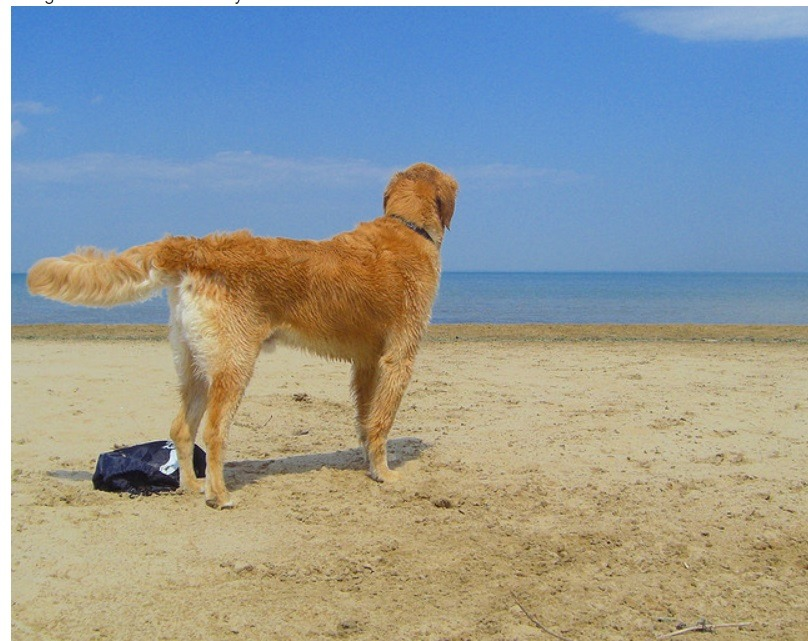

In [24]:
from PIL import Image
img = Image.open('/content/ML/MyDataSet/dog.jpg')
img

Set Image Path

In [27]:
!python3 '/content/ML/testing_caption_generator.py' -i '/content/ML/MyDataSet/dog.jpg'


2024-05-08 17:44:33.692795: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 17:44:33.692848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 17:44:33.694124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 17:44:34.691034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/ML/testing_caption_generator.py", line 59, in <module>
    tokenizer = load(open("/content/ML/tokenizer.p","rb"))
_pickle.UnpicklingError: invalid load key, 'f'.


Phase 2: Image Generation


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from PIL import Image


generator_model = load_model('/content/ML/models/model_9.h5')

tokenizer = load(open('/content/ML/tokenizer.p', 'rb'))

max_length = 32

def generate_image_from_caption(caption):
    sequence = tokenizer.texts_to_sequences([caption])[0]
    sequence = pad_sequences([sequence], maxlen=max_length)

    generated_image = generator_model.predict(sequence)

    generated_image = (generated_image + 1.0) * 127.5
    generated_image = np.clip(generated_image, 0, 255).astype(np.uint8)

    return generated_image

input_caption = "a beautiful sunset over the mountains"
generated_image = generate_image_from_caption(input_caption)

# Display the generated image
display(Image.fromarray(generated_image))

OSError: No file or directory found at /content/ML/models/model_9.h5